In [1]:
import numpy as np
import scipy.optimize as op
import datetime
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.stats import norm
%matplotlib inline

In [2]:
mars = np.genfromtxt('harp_mars.dat', usecols=np.arange(0, 9))
jupiter = np.genfromtxt('harp_jupiter.dat', usecols=np.arange(0, 8))
uranus = np.genfromtxt('harp_uranus.dat', usecols=np.arange(0, 8))

In [3]:
mars_etamb = mars[:,5]
jupiter_etamb = jupiter[:,5]
uranus_etamb = uranus[:,5]

mars_dates = mars[:,0]
jupiter_dates = jupiter[:,0]
uranus_dates = uranus[:,0]

mars = mars[mars[:,1] > 5]
mars = mars[mars[:,1] < 19]
mars = mars[mars[:,5] > 0]
jupiter = jupiter[jupiter[:,1] > 5]
jupiter = jupiter[jupiter[:,1] < 19]
jupiter = jupiter[jupiter[:,5] > 0]
uranus = uranus[uranus[:,1] > 5]
uranus = uranus[uranus[:,1] < 19]
uranus = uranus[uranus[:,5] > 0]

planets_etamb = np.concatenate((mars_etamb, jupiter_etamb, uranus_etamb), axis=0)
raw_dates = np.concatenate((mars_dates, jupiter_dates, uranus_dates), axis=0)
dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in raw_dates]

In [4]:
oldest = min(dates)
days = np.array([np.float64((date - oldest).days) + 1 for date in dates])

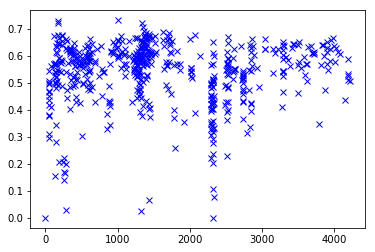

In [5]:
plt.figure(1)
plt.plot(days, planets_etamb, 'bx')
plt.show()

In [6]:
m_true = 0.0
b_true = .5

lnyerr_true = -2.3
lnV_true = -1.6

In [7]:
print(np.log(.1))
print(np.log(.2))

-2.30258509299
-1.60943791243


In [215]:
# def lnlike(theta, x, y):
#     m, b, f, sig = theta
#     model = m * x + b
#     inv_sigma2 = 1.0/((f*y)**2)
#     return -0.5*(np.sum((y+np.random.normal(0.0, sig) - model)**2*inv_sigma2))

def lnlike(theta, x, y):
    m, b, lnyerr, lnV = theta
    print(m, b, lnyerr, lnV)
    angle = np.arctan(m)
    delt = -np.sin(angle)*x + np.cos(angle)*y - b*np.cos(angle)
    sigsq = (np.exp(lnyerr)*y)**2 * np.cos(angle)**2
    return -np.sum(0.5*np.log(sigsq + np.exp(lnV))) - np.sum(0.5*(delt**2)/(sigsq + np.exp(lnV)))

#     term1 = 0
#     term2 = 0
#     for i in range(len(x)):
#         vhat = np.matrix([[-m], [1]])/(np.sqrt(1 + m**2))
#         Z = np.matrix([[x[i]], [y[i]]])
#         delt = np.matmul(vhat.T, Z) - b * np.cos(np.arctan(m))
#         S = np.matrix([[0, 0], [0, np.exp(lnyerr)**2]])
#         bsig2 = np.matmul(np.matmul(vhat.T, S), vhat)
#         term1 += -0.5 * np.log(bsig2 + np.exp(lnV))
#         term2 += -0.5 * (delt**2)/(bsig2 + np.exp(lnV))
#     return (term1 + term2)

In [216]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, lnyerr_true, lnV_true], args=(days, planets_etamb))
m_ml, b_ml, lnyerr_ml, lnV_ml = result["x"]

0.0 0.5 -2.3 -1.6
1.49011611938e-08 0.5 -2.3 -1.6
0.0 0.500000014901 -2.3 -1.6
0.0 0.5 -2.2999999851 -1.6
0.0 0.5 -2.3 -1.5999999851
0.0 0.5 -2.3 -1.6
1.00999863871 0.500614194739 -2.30004713211 -1.60153959054
1.00999863871 0.500614194739 -2.30004713211 -1.60153959054
1.00999865362 0.500614194739 -2.30004713211 -1.60153959054
1.00999863871 0.50061420964 -2.30004713211 -1.60153959054
1.00999863871 0.500614194739 -2.30004711721 -1.60153959054
1.00999863871 0.500614194739 -2.30004713211 -1.60153957564
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000002515
1.65110533174e-05 0.500000010032 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000024933 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000010032 -2.29999998587 -1.60000002515
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000001024
1.60352603418e-05 0.501286980938 -2.30033117269 -1.61071360091
1.60352603418e-05 0.501286980938 -2.30033117269 -1.6107

1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547848023
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547848023
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.2954

In [217]:
print(m_ml, b_ml, lnyerr_ml, lnV_ml)
print(np.exp(lnyerr_ml), np.exp(lnV_ml))

1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
4.13601055901e-05 0.013630048225


In [218]:
print(np.log(.1))

-2.30258509299


In [219]:
def lnprior(theta):
    m, b, lnyerr, lnV = theta
    if 0.0 < b < 1.0:
#   if -1.0 < m < 1.0 and 0.0 < b < 1.0 and -5.0 < lnyerr < 0.0 and -3.0 < lnV < 0.0:
        pri_m = norm.logpdf(m, 0.0, 1.0)
        pri_lnyerr = norm.logpdf(lnyerr, -2.5, 2.5/3.0)
        pri_lnV = norm.logpdf(lnV, -1.5, 1.5/3.0)
        return pri_m + pri_lnyerr + pri_lnV
    return -np.inf

In [220]:
def test(theta, x, y):
    return 0

In [221]:
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)
#     return lp + test(theta, x, y)

In [222]:
ndim, nwalkers = 4, 200
pos = [result["x"] + np.random.randn(ndim)*[.2, .1, .5, .3] for i in range(nwalkers)] #nwalkers x ndim entries

In [223]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(days, planets_etamb), threads=4)

0.268649802556 0.422069895288 -9.75509779576 -3.93397805858
0.0309838014409 0.508266566041 -10.4560757001 -3.95922784567
-0.430541577834 0.539418000894 -10.2160197123 -4.55988964219
-0.0261018809916 0.648819488055 -9.98979164629 -4.26817382968
0.269389429618 0.551719561532 -10.1197119627 -4.12137179308
-0.2588873572 0.662226109347 -9.68902936158 -4.36628832467
0.117172239145 0.469026066796 -10.0521742962 -4.44815507686
-0.11173093453 0.509324680578 -9.8681229812 -3.51802836697
0.0450037477936 0.487082857274 -10.0064651629 -4.37668612727
0.170103023402 0.680410519411 -10.696583125 -3.80991746265
0.0305539181731 0.311802197348 -10.8310328368 -3.96829585355
0.0253754386023 0.614218920401 -10.1061237522 -4.29101058964
-0.0324491403337 0.642193178351 -9.46719550836 -4.01215207073
-0.191032864952 0.474953706518 -9.9415357967 -4.38487047618
-0.0534635843631 0.458329748623 -9.12531956663 -4.3794456004
-0.203598523269 0.514083433794 -10.0724870877 -4.73032977243
-0.206123327691 0.617241371231 -

-0.212779012462 0.561933300172 -10.2066461825 -4.35983898984
-0.049929659463 0.46185921721 -10.5462623047 -4.51443018132
0.0914628001231 0.553195867704 -10.2669128097 -4.11860089241
-0.0297718797864 0.283348618688 -10.643770575 -4.1071999863
-0.0528925627359 0.606927740505 -10.2889362452 -4.67868566698
-0.0056873982901 0.534522692867 -9.66437887457 -4.21567214094
0.0158202159896 0.510408473988 -10.2848997563 -4.24521634683
0.00383015247542 0.544851613547 -9.63679969632 -4.93069502706
-0.221568848407 0.570595667744 -9.39609344046 -3.7943507085
-0.38408579046 0.466552158645 -9.16412195855 -3.99655870737
0.0282773879107 0.412288260652 -10.7199579404 -4.79585326716
-0.120814747184 0.65986051658 -9.23802975245 -4.10309605052
0.148568420251 0.561382745254 -10.6233089865 -4.32748502925
0.301388069898 0.441080696603 -10.3381472954 -4.29921719746
-0.414987899508 0.494977230482 -10.1891691017 -4.34089697037
-0.447570422557 0.596580436445 -10.1855034958 -4.69354530197
-0.0765083793046 0.535654907

0.018227162279 0.370801513666 -10.358498169 -4.32552494802
-0.140946893041 0.255664695772 -10.562759746 -5.69299758901
0.0792346043454 0.665958065521 -9.69040879232 -3.76331255545
-0.259781362528 0.598338860312 -8.965610386 -3.46871330228
0.152901896077 0.615069988923 -9.7436085445 -4.51726607482
0.21666906935 0.503465988731 -10.527503008 -3.76480630902
-0.0898953949354 0.446394815489 -10.5624163845 -4.00802515526
0.212439552795 0.513290952575 -10.8286727059 -4.44898469155
-0.287247737409 0.504577479365 -10.6104384468 -4.00845046349
-0.0298640013709 0.498514084987 -11.0787488061 -4.47972378415
0.134825656718 0.611891240527 -8.62467898047 -4.81136318012
-0.428770046045 0.413171557194 -10.0621274467 -4.22030847749
-0.355654747064 0.515436519422 -9.57077114775 -4.38037538232
0.133280941395 0.643269904085 -10.1710334315 -4.26415318166
0.318955317392 0.720728355549 -9.01362908643 -3.54230601871
-0.0203373986671 0.473058603751 -10.0261693838 -4.13952874047
0.0556763888395 0.410175450681 -10.

-0.0761292032573 0.624955094226 -10.9827046679 -2.86608130413
0.0172383513677 0.560811517051 -8.2034365595 -5.30933204172
-0.26371520439 0.514794826615 -9.90453414168 -4.33308143655
0.0511433538278 0.570335997685 -10.2298414656 -4.39788750631
-0.0489170656085 0.29023519111 -8.82634699493 -4.08501985632
-0.0263275720133 0.373375979594 -10.2124129942 -4.05930690114
0.247723035318 0.717989658302 -10.2562978863 -4.76058936244
-0.0605042801467 0.593892054598 -10.5657170721 -4.10322502806
0.0327582117949 0.55697708601 -9.72162667892 -4.48519490008
-0.00600680856892 0.545836570366 -10.7602628654 -4.23998178452
-0.173148785905 0.544604788013 -10.3461937536 -4.53252049512
-0.202480606842 0.54782294521 -10.3879993943 -4.60591711738
-0.0112820229291 0.734577447091 -9.9788874184 -4.80256764714
-0.0997352921481 0.429344080746 -10.2811129589 -3.61418918819
0.236992883979 0.497024784246 -10.7984074565 -3.88743069017
-0.223955887729 0.484225838523 -10.0245090432 -4.1946551998
-0.321544459791 0.5463368

0.0182628786688 0.590166863401 -9.62016570624 -4.41652121786
-0.00898380259143 0.68114006836 -10.221917277 -4.9224421487
0.126019450731 0.482560596108 -10.1661980303 -4.38458507251
-0.0463944067391 0.502634597724 -10.1422470245 -4.25013122917
0.369186281109 0.591404355063 -10.6203568852 -4.641278158
-0.0729838276151 0.554427630178 -10.4340519209 -3.87618821156
-0.191602701904 0.572530219112 -9.45259969944 -3.898358302
-0.599534178231 0.279737612687 -10.2105013428 -4.76588125576
-0.831235172611 0.673317885344 -9.75861792508 -5.21465125263
-0.0126167689555 0.597744933869 -9.6958388814 -4.57139197355
0.121052751238 0.533279478744 -10.3369995616 -4.37536037427
0.418714778333 0.53102868885 -10.8948874626 -3.96435350502
-0.315671981096 0.407525132106 -8.62762497647 -4.95095252423
-0.025989987532 0.457121631484 -9.81807037214 -4.79001765369
-0.15878743869 0.746456094673 -9.9682762357 -4.46635955206
0.702256748602 0.46589830958 -11.7704422648 -4.22429433069
-0.211216470034 0.748652937992 -10.6

0.167044461441 0.662929686156 -9.67932089772 -4.4378829617
-0.0365959410004 0.435824857548 -10.6576651016 -4.03142744939
-0.318936126176 0.48650623337 -10.2278310388 -4.31669323671
-0.19732849785 0.729694041599 -9.50680725464 -3.08970751226
0.012487571725 0.382623428839 -9.89848590231 -4.12270174416
0.0358843551513 0.575942164298 -9.35983690888 -4.07315569017
-0.0968446366003 0.771745092699 -8.83440673465 -5.09366326898
0.0695466038975 0.285466721859 -9.22490059622 -4.42504614842
0.150914572122 0.470839951963 -10.8171699793 -4.36243087756
-0.116228128747 0.511798373784 -11.0694761804 -4.78237632213
-0.052148277789 0.440120655706 -10.1334138078 -4.29579872313
-0.291003652695 0.516167529038 -10.7319608677 -4.45401626293
-0.0495236033516 0.618991832163 -10.1828378972 -4.26135749201
0.0821694898546 0.474050578317 -10.0493508377 -4.46245823453
0.0128161473946 0.499339714832 -8.45719401165 -4.0957308083
0.302688242869 0.27823509383 -10.1224592245 -5.16980319725
0.0822572376591 0.381226600192

0.156193452424 0.548939668928 -10.0188344678 -4.6180773384
0.0513965848523 0.514092157882 -9.75683786012 -4.61098768791
-0.0408892556835 0.57036592242 -10.679189387 -5.04628979945
-0.0935431685992 0.360922652384 -10.0949021137 -4.00822856418
-0.133530239974 0.54704630892 -10.190050463 -4.56970461853
-0.0309563089177 0.588823756568 -9.65851052965 -4.13940305592
0.0726833763724 0.418394449225 -9.98358697122 -3.99295297702
0.00981250708232 0.491183727252 -10.8966577567 -3.53988271679
-0.0559358993436 0.456569537155 -10.300820263 -4.07968650065
-0.16513033398 0.552412192531 -9.34474281048 -4.37679913259
-0.0887707324874 0.572778467437 -10.7586216911 -4.45602344164
-0.336341623805 0.623253550319 -8.82739067904 -4.77493174841
-0.02808355677 0.617478681191 -10.0808538103 -4.35675825354
-0.36494407679 0.561064813846 -9.41177965999 -4.35662419705
-0.0294607143737 0.623943357188 -9.39042130976 -3.79759636384
0.305436343553 0.875508159942 -10.0754607588 -4.46225318093
0.560675689575 0.84835384119

0.138281071211 0.616392194054 -11.0237138623 -3.2221199972
0.018825493797 0.700039849608 -9.22113044646 -4.94428713804
0.216814184916 0.492689769807 -9.53600409864 -4.26390729719
-0.0908953891375 0.649200139239 -10.3040783698 -4.26143340848
-0.419645383654 0.476318130453 -10.2823727258 -4.49857151916
-0.60553263787 0.601153852825 -10.3919173868 -4.94311464753
-0.20080453424 0.451656816614 -9.1560398934 -4.6769380303
0.166849336168 0.477678005506 -10.5305628122 -4.20050349034
-0.00752197275895 0.680328925855 -9.99144945648 -4.54990763749
0.500643212261 0.530422568245 -11.0343451196 -3.99629897101
0.251073626001 0.566171049476 -10.0071229354 -4.1767137796
-0.0161639041339 0.561122546703 -8.35227827288 -4.37096922592
-0.125028895969 0.848504993823 -10.0603114681 -4.90000224796
0.154548746867 0.444353798713 -10.8868225267 -4.75874276692
0.00177866716084 0.645480444955 -9.49465966258 -4.03413865725
-0.00163310723848 0.235067532124 -9.52262583151 -4.39499815544
-0.0841407450917 0.52704433908

0.0982209440722 0.494393180637 -9.90498421608 -3.88303809938
0.0286670227188 0.516555537317 -10.5085350381 -4.40160657388
-0.40302537135 0.468355472509 -10.9434582837 -4.28646434185
0.117789293486 0.48614564229 -10.0689957271 -4.49120306373
-0.503073244321 0.345613878785 -9.38010977708 -4.61839022426
-0.168815483815 0.517344606973 -10.8548847826 -4.7870302794
0.00156280377725 0.514161152472 -9.41893946584 -4.15607964101
0.0536542290987 0.831535251992 -11.317523793 -3.08477667441
-0.016288842818 0.523394641478 -10.4868998548 -4.2401688811
0.0101026655132 0.302107802389 -10.3392260665 -4.85786668495
0.0630686825836 0.618173280612 -10.0618558816 -3.90919977347
-0.0552888166901 0.520134535335 -9.35421808795 -4.26107267447
-0.100377096947 0.504529441276 -9.04985821417 -4.24529272575
-0.155857201999 0.492530926198 -10.0646578312 -4.10002794249
0.0710063593732 0.463094203567 -10.3030995507 -4.12929716059
0.202762506661 0.373709007164 -10.7814968245 -3.44120484168
-0.0166933052725 0.3253824978

0.0176240828635 0.536473495853 -11.4711217263 -2.8028894066
-0.0641006480849 0.399175892896 -10.0626697806 -3.73424284093
0.0216682513722 0.678871112697 -10.3140802185 -4.20281831843
-0.0134930160428 0.530277533429 -9.86174207237 -4.66705474044
-0.248453257471 0.527802339276 -8.42382028487 -4.38360103611
-0.0606693215857 0.4315513203 -10.2506965926 -4.02485498428
0.0196102864154 0.543174794213 -10.2805714526 -3.63082555817
-0.0146461978034 0.434379455563 -10.2079412589 -4.04390730925
0.196412252067 0.630076874483 -10.4484434289 -4.83075134558
-0.137838137457 0.506918642311 -9.42479347316 -3.89507014971
0.0145241467634 0.652025961385 -9.51849294029 -3.66154831044
0.142376995492 0.441810407916 -11.4297914941 -4.50569984175
-0.0698336293657 0.568785651076 -10.267404335 -3.95784843439
0.0561669174635 0.684432885412 -10.264671471 -4.899583807
-0.0289540685917 0.580530596589 -10.1065426506 -3.90003639426
-0.0102997648774 0.885804748136 -9.07818761974 -5.11903453447
0.0142509749154 0.52407248

0.0858761303789 0.467690443784 -10.0896674328 -4.29864825253
0.153675535294 0.540936672497 -10.074205868 -3.90347907161
-0.157839852888 0.500212444718 -11.1541930645 -4.8404066203
-0.0729381397154 0.695295652548 -10.2544772463 -4.2605316829
0.0269844655212 0.481260316519 -9.55351204754 -5.16909987958
0.0543565048417 0.524294130392 -10.1974166742 -4.33539212195
0.0897058473055 0.457425669757 -10.639669366 -4.55809860353
-0.187609971782 0.42810031451 -10.0956022759 -4.02116403424
-0.110504356608 0.668014082787 -10.308249616 -4.37333326124
-0.00467331366933 0.584241047255 -8.11561745904 -4.29107757917
0.00516202298535 0.331871925468 -9.54494854239 -4.45212054658
0.0585736717751 0.555410294998 -9.82757934162 -4.32102735761
-0.785173946221 0.330213147315 -10.3876615161 -3.67207174607
-0.0153933570437 0.634069972383 -9.05063447162 -4.59362749247
-0.0548077974855 0.475535214705 -10.2441771395 -4.29943757769
-0.0172293857641 0.353911633473 -10.8213559842 -3.31990540862
-0.00452115775645 0.5937

0.0110330648408 0.344076933152 -10.1401732554 -4.18052920391
-0.140116764119 0.458311087928 -9.43642422698 -4.23059147307
-0.000702528193486 0.511999181114 -7.50715472407 -3.58584436305
-0.0101295915422 0.482369348504 -10.3086560264 -4.39584555383
-0.0398889038256 0.460652901828 -10.1719960069 -4.0066724612
-0.0310148613284 0.509247686257 -9.69787992277 -4.34611279614
-0.0179445677449 0.0765880763818 -11.088560732 -4.42317884884
0.0920046695603 0.434349628812 -10.5130101725 -4.01847712776
0.17561193847 0.401763108047 -10.5302286507 -3.64315715844
0.0603414326412 0.39756431179 -10.9766771927 -3.75828764307
-0.14299072044 0.666468537021 -8.77162087657 -4.38004760512
0.00187318279568 0.54505956391 -9.55696249009 -5.09189804016
-0.0317087221785 0.538976252601 -10.2945703152 -4.14026099555
0.000290992378857 0.604335629939 -10.4727673814 -3.05809874899
-0.293717281749 0.542791480139 -10.3599646657 -4.53442094796
-0.0376547451554 0.44623015511 -10.6981216439 -4.72501454856
-0.00119564505317 0

0.0369174683827 0.56814489418 -10.3711691092 -4.54317692244
-0.135283284965 0.592791958072 -10.0513072419 -4.82040450536
-0.0466532432222 0.6268018592 -9.97077210673 -4.18792537838
-0.0177420773808 0.559535184667 -9.75791275921 -4.06731189928
-0.0613700767448 0.545830024107 -10.3078500344 -4.39401030029
0.176963408988 0.479265980147 -10.0155303771 -4.35169006673
0.00443123876239 0.48338544718 -10.6388762879 -4.28233000071
-0.01172291061 0.742260145951 -9.59971320711 -4.0862129906
0.0271257580714 0.965894444683 -9.12137127694 -4.91946847499
0.166512171498 0.618358047121 -9.88774289131 -3.63136251074
-0.0082303948605 0.645668650269 -10.137857414 -4.11747500251
-0.00304860410415 0.781673360392 -9.4674627112 -4.50232519922
0.0699512767355 0.518668185174 -9.70360077602 -4.13044918254
-0.000957177576956 0.581731390211 -9.64984502353 -3.97409819021
0.0106883702653 0.445627815115 -9.74475499414 -4.15546443762
-0.0260369103424 0.839209993683 -8.11497775062 -4.59128743938
0.00944183190395 0.3946

0.0269784750418 0.335704348181 -9.95392291705 -4.47841189963
0.017647087576 0.490251046397 -10.3970111172 -4.19827514026
-0.000547107510599 0.668716860908 -9.3297540279 -3.99996748162
0.0086435264931 0.741920286268 -9.78155613818 -4.06763119806
0.135082504724 0.618006394242 -10.5342257281 -4.43868816802
-0.00364226973351 0.566117795318 -10.2787120048 -4.30185864739
-0.0105840943996 0.270313517827 -10.466828066 -5.1304163504
0.0458516548092 0.528545435776 -10.0893723201 -4.27897089872
-0.245312199665 0.508914883433 -10.0125047727 -4.34668409807
0.0887285327443 0.572572902571 -9.77088938156 -4.33267183681
0.0277525605449 0.44633546549 -10.5247791242 -4.34593661308
-0.0137537524001 0.520358010331 -10.1656508552 -3.92289793034
-0.0588178264125 0.43439165277 -10.1294482441 -4.25515739406
-0.0273665092433 0.651158854422 -9.82198702831 -4.11946063462
-0.042308519087 0.47629862328 -10.8037084667 -3.93545709921
0.136715050344 0.574033858247 -9.78746913632 -4.37216023269
0.0835987957319 0.517517

0.220895519064 0.314593977189 -10.6220554419 -3.53417737068
-0.0104952924726 0.155656824765 -10.128595829 -4.54881639888
-0.0732005571432 0.597390873612 -9.32461777692 -4.35438393185
-0.0594783580257 0.506025522693 -10.2009457864 -4.20111421709
0.0609164876816 0.695031299309 -10.7253344047 -2.23267281053
-0.00422168638913 0.557065409517 -9.71934759994 -4.87156745263
-0.339546024748 0.633545953939 -10.4958729784 -4.68282896466
-0.0121092525536 0.534591627058 -10.3907436628 -4.47312888162
0.0193550062726 0.538774738304 -10.7708882612 -3.87030955296
-0.027977607495 0.7740388357 -10.9401267551 -5.60419497446
0.0259317340791 0.442665345459 -9.93053521735 -4.37042988332
0.0352259337346 0.534321287941 -10.0867600613 -4.35286161343
0.0892748588608 0.539042668717 -10.5130018486 -4.1062687838
0.0106197494263 0.472334509153 -10.2036061751 -4.58733417579
-0.00397873398556 0.491479764291 -10.7313359619 -4.57379170239
0.0399285694384 0.788348879174 -9.2156990554 -4.31369546545
0.14550419173 0.370997

0.00837719186609 0.534438650216 -9.86693256253 -4.05963136228
-0.00736261661954 0.624890910562 -9.77623907505 -4.60148594743
-0.0211259504058 0.701598060077 -9.77060256289 -4.15198164428
0.00349234157518 0.490239860069 -10.2625436521 -4.4208829846
0.0700921941324 0.51869427634 -9.705421222 -4.13086849793
-0.0446568394023 0.854681826091 -9.38257352598 -4.45911189249
-0.0332407869904 0.862141308478 -7.76868746975 -4.72074060893
-3.34118349446e-05 0.614146057401 -9.79762303985 -4.63336092068
-0.035626336518 0.55650789375 -10.512721816 -4.23817141406
0.0799969419842 0.295127966282 -9.8528197286 -4.02829684515
0.142865204347 0.624589700873 -9.43639089227 -3.75480172443
0.311891495523 0.577008996738 -10.0882003495 -4.06036205455
0.0270542180294 0.537250793277 -9.90805425797 -4.58077408548
-0.0109044655769 0.594267825203 -10.5402495169 -4.13927841961
-0.00217372681291 0.400421042842 -9.7502959149 -4.38366321693
-0.0101108789529 0.567641034021 -9.31494522094 -4.4537428861
0.0114898624001 0.962

-0.000549488540864 0.749099780058 -8.82032780524 -3.98006762184
0.00500467775056 0.378198293904 -10.1779684037 -3.89505946536
-0.0437485302729 0.40996093905 -10.1677581354 -4.1379910935
-0.00411311661474 0.487083517261 -11.0529441556 -5.17264680432
0.00522497459055 0.45824360382 -10.1431116964 -4.60903316751
-0.0336851908962 0.409460759289 -10.1573113323 -4.16585613606
0.00464221885334 0.560644543153 -10.788362216 -4.07336768538
-0.0413371400257 0.502485152101 -9.95065299281 -4.58180815673
-0.00443519250556 0.518336009481 -10.1514821462 -4.15586885171
0.148538636333 0.58743093746 -9.71642903286 -4.41588907736
0.0262674932385 0.267410940436 -10.8104572798 -4.84394924326
0.0943343674119 0.550797184507 -10.3070073649 -4.36719294834
0.0565466249949 0.571339190912 -9.57902379114 -4.31097099837
-0.00362157739425 0.492294659724 -10.1555674715 -3.88378248621
-0.0609124878178 0.61743415749 -10.25383145 -4.43861109749
-0.125804980678 0.480037945107 -10.0101185042 -4.22149604007
-0.0011865720382 

0.0153286712835 0.523952677204 -10.2188643764 -4.19925851288
-0.000531565874592 0.626657706957 -10.5868987142 -5.28014943811
-0.00215160469395 0.57967621116 -11.3995941067 -2.90340717536
0.0348765340364 0.557367056447 -11.0760304881 -3.61219544235
-0.00888270805709 0.536943625844 -10.3955955658 -4.40140564765
-0.0764825144713 0.59573266629 -9.2498882492 -4.31834933761
-0.000514488517271 0.509922638608 -10.4125886372 -4.54161153798
0.0281510185073 0.406697381641 -9.79404957219 -4.31836623132
0.0755160185549 0.522903271008 -10.5406778979 -4.17076091219
0.0569854727666 0.614659762023 -10.5003912154 -4.68126156517
-0.213790612363 0.53955171313 -10.2410206575 -4.34669765828
0.00767078145519 0.49370235572 -10.1862579227 -4.30365624165
0.00378417683939 0.789426734021 -9.34031978549 -4.26940199734
-0.065006747218 0.507198733776 -10.1871746578 -4.27865168378
0.0362124120877 0.53315191439 -10.0820508599 -4.34976031478
-0.0185033171041 0.505278303346 -9.75319648718 -5.20903008121
-0.0080182040517

0.284119592634 0.200926875483 -10.5990318278 -4.45972695273
0.0145849865608 0.316652905131 -9.10802190299 -4.2892773391
-0.0043945213883 0.770251409702 -9.69760737192 -4.41934439136
0.258461777581 0.543716155534 -10.2339500666 -3.87626736263
0.00424920734729 0.626941085541 -10.6982950753 -4.09248124939
0.00669577654139 0.624978805211 -8.92974247671 -3.56148677267
0.022697628717 0.449571633114 -9.60587805601 -4.39979378636
0.0120755309986 0.621419710097 -9.25320989876 -3.62906424857
-0.0332109910161 0.612514115212 -12.3973057042 -3.52754046764
-0.0021566541219 0.400195221036 -9.74930005655 -4.38355769221
-0.129761274296 0.728786204636 -8.13248953424 -4.80235470766
-0.0037228710747 0.483383588632 -9.92573509009 -4.26958657866
0.0382837788497 0.538012760726 -9.54779189643 -4.38972824282
-0.00214264372555 0.418537754659 -9.3684993508 -3.65943379444
-0.0195302212017 0.535798935374 -9.81755520537 -4.28602101181
-0.0405143851986 0.548978119673 -10.5642787452 -4.2557723109
0.0117832719798 0.52

0.0342760350022 0.624332751281 -9.77208878695 -4.32726976702
0.00589528261468 0.915666808649 -10.3454159313 -3.74433304945
-0.00459084031361 0.513557451423 -10.1680734517 -4.16175167427
0.000923923408064 0.441952776166 -10.2104714189 -4.5673666537
0.0836396070846 0.49599662382 -10.1430963273 -4.27919645205
0.116720433501 0.448097397407 -10.7744796731 -4.13832691592
-0.0305718450336 0.443844272275 -10.0534992828 -4.20608455388
0.0432138665628 0.574033811112 -9.87271370502 -4.33572186479
-0.0134158876216 0.66735921628 -10.6160279378 -3.56262452746
-0.0296340969242 0.530074261301 -10.1151063034 -4.23425942282
-0.127053102727 0.478995244203 -10.0094030214 -4.22047936157
0.00396388645748 0.566307503172 -10.832622894 -4.06362986255
0.0256533422556 0.310661031345 -9.36243790915 -4.05196444281
0.00781281636997 0.556566586419 -10.3753936935 -4.24424103183
-0.0493290840238 0.493763858098 -10.1256084727 -4.12863926217
-0.0154243561308 0.569596006183 -10.0014236472 -3.94178034305
0.14717343369 0.5

0.0383599136649 0.536983984433 -10.05225887 -4.37611655899
0.0182762013477 0.540127768213 -10.8705329287 -3.81015790637
0.0219364180465 0.479796390733 -9.81652794951 -4.32568398883
0.0010025546911 0.517718474276 -10.5778524451 -4.55323759388
0.0292519352016 0.522739215454 -9.96114074432 -4.38084439129
0.0067805532349 0.482511857155 -10.2403591181 -4.29517969079
-0.00931689250632 0.481563220048 -10.0945850392 -3.99354571885
0.0445548638956 0.590659534885 -10.3072011863 -4.52249923468
-0.00458840275515 0.605572865624 -10.1309180153 -4.14668273944
0.00298374755642 0.69770677122 -9.97789604944 -4.20084431501
0.0144036374581 0.595503552297 -10.1118719882 -4.4415036662
-0.0372316464435 0.49771134447 -10.2046831373 -4.2938807243
0.00226669673866 0.754644990223 -11.2747528257 -4.12479715358
0.00319544154559 0.391335929886 -9.30909014263 -4.05838090649
-0.0476908766214 0.554600679512 -10.1585844377 -4.28452193023
-0.101776173765 0.587300833639 -9.63018738981 -4.0935993334
0.195591601062 0.43801

0.00219544530948 0.332243993066 -9.14551457627 -4.35135036239
0.196732116318 0.535425144915 -10.4124018355 -4.00674655152
-0.00747341054164 0.541819060846 -9.9422071917 -4.30610943768
-0.0373557822097 0.524675714807 -10.3663105644 -4.27188910087
0.00490699013534 0.53295562762 -9.96861913399 -4.46202970884
0.00622275789298 0.663296179622 -11.2544005399 -3.59798061266
0.0027357104101 0.561185703335 -9.06410607181 -4.36790255914
0.00243404360402 0.580138546921 -11.4665526191 -3.88581076265
0.00703689339628 0.66343689177 -9.00044746088 -4.57204763845
0.0160573505226 0.770757672342 -8.62255523316 -3.92062261034
0.0083678516941 0.566652253922 -9.85022067716 -4.15185769625
-0.0192075021041 0.379314653164 -9.16716394859 -3.31743237829
-0.00317975671654 0.366371207861 -10.7129198827 -4.12362939985
0.113730731886 0.304657817511 -10.5159044566 -4.21516999467
-0.0189996708011 0.539557183046 -10.3884353364 -4.23869761575
0.00725706957872 0.282724120877 -9.60520786507 -4.26184277489
-0.0040822829272

0.0701542029278 0.663850193082 -9.42303571913 -4.15128488152
0.0664411090898 0.495341554997 -10.2388069457 -4.08523950183
-0.0111568168598 0.814296573152 -9.88929873971 -3.9879170781
-0.103148795213 0.432034593822 -9.98299807254 -4.50103806209
-0.00243751517782 0.477070746871 -10.2211549038 -3.75395822667
0.0578268905712 0.472320575112 -10.4634381596 -4.28213886055
-0.00840042466687 0.611711195618 -10.426733593 -4.16326477906
-0.0347962490443 0.529253680211 -10.0289152345 -4.27743602765
-0.0557350943839 0.569063450837 -10.083539634 -4.2603911988
-0.0472447987103 0.527201941494 -9.71826375821 -4.99926079763
0.00069938435514 0.379646287017 -9.68165096754 -3.96054170477
0.167941140015 0.535301306168 -10.7697564166 -3.7314273197
0.00426735275543 0.528148851364 -10.1508300989 -4.32930228577
0.0155158111483 0.480464198006 -9.7868083394 -3.94080253916
-0.000116783818538 0.583010458291 -10.1488336767 -4.15890007589
0.0181671979352 0.555678665257 -10.2348300602 -4.37066211612
0.012141640205 0.4

-0.00159602401284 0.595138196591 -10.2191248175 -4.2156039628
-0.00857137550807 0.480180799725 -10.0757578131 -4.00122692124
0.00212864649557 0.790568526816 -9.35774988131 -4.24701952423
-0.00492076187988 0.297538595997 -8.97282482286 -3.82157395136
0.0571766638831 0.552978793122 -10.4564678871 -4.44342625771
0.00741002596874 0.523246647228 -10.3182520378 -4.29845228224
0.00201599750307 0.570612738079 -10.6958775696 -3.83473149974
-0.0920659466311 0.404371137081 -10.5282254085 -4.42453954611
-0.0698667799669 0.615420387849 -9.74851218567 -4.30118003063
-0.0272033657317 0.588164226682 -9.98280511031 -4.23014684646
-0.00986055536215 0.576558392577 -9.86151991349 -4.3228363286
0.588748407386 0.351902158044 -14.2800032048 8.45543387239
-0.0689529554673 0.623584622367 -9.61986738166 -4.4920591298
0.00249982098322 0.660576489296 -9.84414648329 -4.59562139958
-0.0285102879224 0.558689327312 -9.77992588877 -4.34294271043
0.0234405933944 0.647355164416 -9.61455607664 -3.41585782303
0.0007534050

0.00365007113001 0.782204075555 -8.513296031 -3.61462286244
-0.00655156114332 0.559114174618 -9.82317128839 -4.27692610605
-0.0142093795461 0.278546557829 -10.8640105452 -3.95062540629
0.00287862705766 0.643572239802 -8.96539458012 -4.76382819427
0.0314402201096 0.571634164027 -9.89419977351 -4.03230763511
0.00312603069826 0.559227833849 -9.14913409636 -4.33167067513
0.0443789694988 0.438507413516 -9.96469020826 -4.27305292485
0.00623823269394 0.574052910776 -10.1054746098 -4.6087512496
-0.00592567985582 0.523217520535 -10.2731592301 -4.29897984725
0.000744627933573 0.465188374755 -10.0155987074 -4.1083236859
0.0090297906929 0.198728014144 -9.47145777407 -4.30108862683
0.0125770104497 0.783070593893 -5.64889885317 -1.47507033738
0.0052020299245 0.635823872242 -9.84021986441 -4.72433345924
-0.0190439823008 0.755249243652 -9.73992399689 -3.9840073528
0.0340396947103 0.624063477788 -9.80075346702 -4.07682398812
-0.0351745429274 0.811044297731 -9.00936490913 -4.03594358965
-0.0042719841505

0.00185260640306 0.577985734011 -10.7032028006 -4.10636301573
-0.0132996988112 0.53635584734 -9.89336709898 -4.03182946571
0.000935461622334 0.54348310162 -10.5671438198 -3.98376248518
0.000571858190372 0.337689024421 -9.45714062202 -3.91948629104
-0.00767585466234 0.58787301948 -10.3124731472 -4.37137564709
0.00591597996367 0.61957309101 -9.82642668421 -4.44527114006
0.0237095981226 0.587824717657 -9.89881596062 -4.40836598647
-3.23998068152e-05 0.563157959378 -10.1780326238 -3.88871645592
-0.0594321297991 0.560874335057 -10.0839239678 -4.16996293829
0.0218368267491 0.403501278323 -9.62362057659 -3.82778409735
0.0191173105183 0.560634583075 -10.2568953923 -4.49257253823
-0.0238672636704 0.497688192847 -10.7156395822 -4.3538434321
0.0121702609604 0.509206669678 -9.89435447754 -4.03442161845
-0.013939482761 0.666629414694 -9.17847159485 -4.86277785038
0.00349787402283 0.645438310735 -9.87355213208 -4.32208321094
0.00812812014632 0.628799923995 -10.7679892998 -3.55570365912
-0.0077197749

-0.00343912279128 0.609669152622 -9.867303833 -4.32247430293
0.019025767526 0.574974969704 -10.3360266318 -4.59583957593
-0.0167390395515 0.570010757487 -10.0270982912 -4.20358111441
-0.0432765171148 0.632891898001 -9.79502856007 -4.25166028334
-0.0277003437284 0.485828542038 -10.1661393888 -4.35180232089
-0.0113057638737 0.492451193908 -9.98465130276 -4.24904369834
-0.0391667403892 0.551532735039 -9.93158182866 -4.15814999566
1.53457625936 0.114296675639 -21.5925542837 29.035067446
0.00046419815091 0.610597076577 -10.1065092248 -4.33401211918
-0.0972721957129 0.562063904398 -11.6901511167 -3.68458367781
0.00493084682134 0.610910946585 -9.75864006396 -3.95575198231
-0.00311783793738 0.505022403776 -10.7314535669 -4.27364164156
0.000147603357033 0.467580755724 -10.6812221143 -4.81748440496
0.0369473888615 0.524057382741 -10.3297120798 -4.27078638367
0.000960603967092 0.357234208067 -10.9887636865 -4.83891093415
0.00137234549 0.550793536641 -9.78326544595 -4.62284673313
-0.0439289121261 

0.0023397600348 0.834080614835 -9.13189277123 -4.36220460632
0.00710024029853 0.57594505735 -9.95046528334 -4.07214040955
0.0262662439851 0.370411580353 -10.4950971873 -4.79323119104
0.00332044943749 0.581775309589 -10.1841128617 -4.6560205323
0.00672644917796 0.292295893764 -9.62513537684 -4.29232733928
-0.0369029510731 0.491731559662 -10.2790186917 -4.23548420396
0.0171919883703 0.472486229144 -9.9305311734 -5.78392583367
0.000429697799448 0.532118032683 -10.575763186 -4.09940595513
0.0132821785242 0.821795667917 -4.77724032979 -1.01245966492
0.0487310920671 0.671480086275 -9.60242996109 -4.11039233697
0.0145281308559 0.516436658493 -9.97684570317 -4.23123986654
0.00177872862817 0.889193607516 -8.81184861069 -4.78217439522
-0.0128800775612 0.56871891911 -9.01516393503 -3.33774666469
0.00403373538352 0.4817998956 -9.7577889843 -4.532241792
-2.2860625359e-05 0.613069324435 -9.74244096682 -4.29120359773
0.0342145592457 0.606965446359 -9.39539457887 -4.85029102279
-0.0492943184666 0.5357

0.024395082853 0.464881010047 -9.39746541823 -3.54699686785
0.0314247902173 0.468251116458 -10.3159459391 -4.39990503282
-0.000330059722858 0.509608960934 -10.5777469338 -4.37561973403
0.00138969091043 0.725613430544 -10.152231915 -3.90981644002
0.0225505312778 0.521559384104 -10.0130654261 -4.08645322901
0.00316057298591 0.682455253563 -9.58776221798 -4.61473802878
-0.00866839854431 0.754268233822 -8.29506220723 -5.87918306841
0.00892180488545 0.634393649326 -10.8261823003 -3.51023144055
-0.0065905426835 0.392944976681 -9.79264244314 -4.45933722383
0.0255459325792 0.590794690509 -10.6551224044 -4.38606573988
-0.00354218777534 0.493381490328 -9.43379761603 -4.17561464395
-0.0425446806582 0.609699162738 -10.536684599 -4.58210457141
0.000153520980659 0.486103676254 -10.2702326927 -2.86686936909
0.00104285679068 0.488323366575 -10.0123578252 -4.18896211562
-0.00114683250418 0.531569650632 -9.83457866612 -4.59040241428
-0.0266622070548 0.19666521114 -7.98878759893 -4.93751085889
0.00174874

0.000966469074946 0.340836410203 -11.3821434589 -4.1140907845
0.000879326782683 0.57306554992 -10.1192546679 -4.62768560549
0.00285767585809 0.643569742732 -9.7895286556 -4.10192586522
-0.0500152612206 0.548150225913 -10.9912345533 -4.1516327728
0.002802294607 0.478778202026 -10.0576072959 -4.01902885349
-0.037039824471 0.601780044079 -9.61110645497 -4.15607693656
-0.0132102934147 0.56887627117 -10.1672903708 -4.20325606289
0.00992546948658 0.475810144154 -10.0743288848 -4.42883968831
0.0204224794918 0.552592638269 -10.1265407491 -4.28062503575
0.0010360355963 0.337611681964 -11.084356506 -4.88092002837
-0.00145867473505 0.604534511664 -10.1744886704 -3.73040484728
0.00714642116416 0.45902764108 -10.9868251616 -4.28406814658
0.00608161951489 0.590943350063 -9.4963721231 -3.83996528137
0.00380405572981 0.536838407851 -10.0244554411 -4.37373997679
-0.0391161501513 0.563911922374 -9.43967198101 -4.5165094401
0.00278492180164 0.771684306515 -8.48098829293 -3.83573335258
-0.0139327739944 0.

0.00548905412841 0.592778627957 -9.82452012314 -4.30263018781
-0.0540951133832 0.559621444179 -10.4278070964 -4.58634817708
1.38568299204 0.429930236307 -28.5374829152 21.8112105965
0.0352460282877 0.576826735055 -9.95954923856 -4.43641550307
-0.0293033777058 0.767668821218 -9.64014325885 -4.69778135521
0.000289520780527 0.896600393592 -8.90315413757 -4.84796290487
0.0114445693515 0.423196627466 -10.0283945884 -4.20154491453
0.0119415637474 0.545860652175 -12.0141930805 -4.36290678389
0.000874206271857 0.380309800294 -9.98644158345 -4.44699861076
-0.00277712074584 0.590578749405 -10.6303220267 -4.19273153065
0.0161425351386 0.440017628723 -10.0208145232 -4.14389203136
-0.0188936258784 0.46396658154 -10.4754572011 -4.18774747636
0.00111507226793 0.615220281141 -9.87436888083 -5.25118522657
-0.00759643884827 0.598220415697 -9.46128517291 -4.24882736903
0.0159253773569 0.447526006578 -10.3406618043 -4.31759155461
-0.00812642354339 0.446047840973 -11.4669237474 -4.92176848643
-0.0016954573

0.000654638624262 0.651229008631 -10.2904001478 -4.04384458552
-0.00723557744708 0.655645948379 -8.49087795871 -5.69350943688
-0.0071147809739 0.416032416553 -9.86757048134 -4.33809581523
0.0058415959601 0.58634530587 -10.3311944625 -4.33245376204
0.00633617365843 0.639227488037 -10.7117272347 -3.54324968901
-0.0164196721318 0.517923680859 -8.81285250878 -3.90115816926
0.00073388960518 0.665773151448 -9.93885219722 -4.08731325154
0.000380921785682 0.529336662509 -9.77596987849 -2.92554003778
0.00145884179101 0.539372902819 -9.86541039079 -4.54934272095
0.00929113975835 0.637561683047 -10.5739239273 -4.55192434627
-0.00219160003639 0.355940381132 -9.07300822266 -4.60139547729
-0.00353454211511 0.565557032888 -9.83804849217 -4.29049183377
-2.31262692958e-05 0.510594397768 -10.4535711763 -4.64453377069
0.00146768981128 0.455136202042 -10.1572549025 -4.39117093892
-0.00221017318244 0.527376355279 -10.5991438627 -4.03772936708
0.00126606947807 0.174280351102 -9.91630308881 -4.9140726239
-0.

0.00475569731192 0.628730470769 -8.76892062546 -3.29750504439
0.000694285136831 0.579378592815 -9.78979269891 -4.49120414194
0.00926954100343 0.536526814977 -10.2913116914 -3.77080563939
0.0129118930703 0.472666759756 -10.0729402003 -4.53144500105
-0.0145986100278 0.580310692168 -9.61031571104 -4.35241228926
0.00139045237533 0.308310832008 -11.4148344624 -5.0706143703
-0.0236913408959 0.70772253295 -9.85312203247 -4.23163568357
0.00792763808704 0.468714663676 -11.0336278368 -4.37078610955
-0.0259945915869 0.574166258622 -10.0326264652 -4.14926704554
-8.62636152173e-05 0.52240779152 -10.2645676978 -3.89444527247
0.00112869203801 0.6267059864 -9.72215872118 -3.73246315916
0.00144172203244 0.554342320728 -9.90208640935 -4.16237835163
-0.0278798608201 0.514558983828 -10.046836538 -4.44032344218
-0.0680923422862 0.575246520624 -10.0289221 -4.75262869937
-0.00241416740447 0.373482792407 -9.79876240686 -4.30369923996
-0.00814839939799 0.594666312498 -10.0230646695 -3.80276378768
0.00028755262

-0.000133373220997 0.503402773748 -12.0901141818 -4.63188136821
0.000292229235208 0.532523991297 -10.5712033995 -4.099992976
-0.00253876612908 0.523439346401 -10.3781166631 -4.52151163959
-0.0189360964343 0.456197791862 -10.054573758 -4.11455322539
0.000600933612202 0.777041277044 -9.28275878055 -4.68701903557
0.764326482821 0.463521533306 -20.2683631226 10.1519481789
0.00397053450102 0.572523930345 -9.9435443327 -3.96394946126
-0.0101883931273 0.688826039003 -10.3640721472 -4.12451792857
0.0061548337579 0.430153122384 -10.0100938481 -4.34562854454
0.0029200975348 0.461744101773 -10.0275211345 -4.58779717971
-0.0148233940921 0.552947385797 -10.0543565237 -4.43587916609
-0.00319975178481 0.451690781556 -9.93627173476 -4.13020654786
-0.00279390327779 0.529990756633 -9.80789148147 -4.31351931786
0.00336688218546 0.501431002431 -10.7131245748 -4.43524512959
-0.00225590187285 0.75891738268 -9.75479616013 -5.57415593808
-0.0021772237623 0.30337843637 -9.52384449915 -4.21982978416
-0.00241603

-0.000272640752449 0.499071987786 -9.66614515587 -4.20331213555
8.36294613053e-05 0.40389073715 -9.80979958773 -3.53278368808
-0.0020523443492 0.51358955856 -9.69156721119 -4.75771908672
0.00152571247233 0.764141012187 -10.7247208155 -3.82550193225
-0.0102877150152 0.578172281377 -9.79810210966 -4.27961173479
-2.26068226331e-05 0.508678985083 -10.4373648037 -4.64916129834
0.00308040202368 0.567043147711 -10.4716779602 -4.43970927538
0.000583233823927 0.369716685428 -9.26610594967 -4.70085354885
0.00139819561755 0.470718716327 -10.1523735364 -4.36973438719
0.019109372706 0.647107870343 -9.30278358632 -4.3402062111
0.000816796524927 0.399514059265 -9.71925158509 -3.51045898764
0.0254854478573 0.502825729413 -10.3017116286 -4.36108752315
-0.00672186998806 0.602057556108 -10.5291947935 -4.11728655734
-2.59168889971e-05 0.4513640309 -11.6089762098 -3.0121503119
0.0033790413176 0.485634426739 -10.6004924863 -4.28664451024
0.00334571205586 0.623841668865 -10.5349102337 -4.64427970703
0.001205

-0.00230637335632 0.66592228301 -9.88590355041 -4.57052549746
0.00887032707583 0.475648418862 -10.1028512912 -4.4065730182
0.00783672551307 0.605804937485 -9.93883065951 -3.90660556176
0.00115218957721 0.345982299247 -9.74820286129 -4.31360444063
0.0162144025229 0.479375870292 -9.73338615776 -4.49475920846
-0.801632322727 0.636609252014 1.01033181288 -18.9329207311
0.00139368503064 0.671307479251 -9.84026630111 -4.73339059685
0.00700519532677 0.231866481171 -10.7211233235 -3.99894945354
-0.0134700634143 0.549366651011 -10.0579086493 -4.44746232459
0.127600172334 0.344239222904 -9.88293469886 -4.80483080481
-0.0117617136639 0.584411047348 -9.08000694283 -3.70131826931
0.00191937569289 0.607767188805 -10.4361142769 -3.94487012093
-0.0105156571554 0.515064640499 -9.88053989427 -4.15565940187
-0.00335886668291 0.597830545401 -10.527591684 -4.16007159914
0.00310103833591 0.50393099574 -10.0798170182 -4.08000995052
-0.0420063267195 0.554886110598 -10.3929848688 -4.35515731816
-0.014713667436

0.0174504310362 0.545450939035 -9.99949890629 -4.32686030864
1.44925176626 0.393382301597 -29.0786951939 22.7386437223
-0.00147685359098 0.564213919944 -11.2848115429 -4.41041472985
-0.000176812260205 0.567941197134 -10.9752298184 -3.92278322548
-0.00527191855838 0.649746068355 -9.96307605821 -4.69806311093
-0.00141192050826 0.528383609657 -9.84526192115 -4.29130517098
0.00384086597454 0.472359368014 -9.68298167614 -4.28903774398
0.0161842086786 0.445478339342 -10.0135946541 -4.15022096955
-0.000176504295852 0.782036187298 -9.85760826163 -5.52810575918
4.3487857921e-05 0.472499350239 -10.193235536 -4.98371798307
-0.000281698550438 0.520727991023 -8.63544653414 -3.9212757174
0.000376639027017 0.448404994496 -9.52962068337 -4.34233752939
0.00107476861078 0.937657595884 -12.9258129731 -1.71390876541
-0.000202494400639 0.513819180862 -10.6562298215 -4.18179623486
-0.00060718360537 0.270206942119 -9.87665972574 -5.52654234087
-0.00046339920194 0.54225934123 -9.65759700242 -3.8386711121
0.00

4.92935852115e-05 0.549099699267 -9.75714925329 -3.7487211463
-0.000597684928306 0.355859324324 -9.49400854163 -3.32067648069
-0.0149303945089 0.572534133305 -10.754401235 -4.26438673696
0.00059788480806 0.358956773679 -9.16992437583 -4.9299939074
-0.00159568701762 0.529476694992 -10.0174923641 -4.05526522844
-0.000658339287187 0.421673265299 -11.0625139244 -2.84335542064
-0.000230874939653 0.531562140638 -9.72031069187 -4.2895524324
-0.00384016623663 0.569331641652 -10.7285327702 -4.15836635289
-0.000604745821195 0.593956768235 -9.73517811674 -4.20678066156
0.00279153315018 0.714310078909 -10.0230199364 -4.8801217999
0.000918040082665 0.4886878215 -10.3835098778 -3.10391431067
0.0303712774681 0.542515191074 -9.77954026051 -4.31880483163
-0.0061243364601 0.495819147138 -10.9053941156 -3.66322435757
0.00128468066256 0.49862827554 -10.4195495183 -3.99670297984
-0.00017505252141 0.520154113435 -10.0545243992 -4.0724315822
-0.00749299759516 0.602850971377 -10.5085205916 -3.96384913326
0.00

0.0126092873049 0.465782873034 -9.80928955373 -4.51782312665
0.00956515966816 0.74664270182 -5.62020960177 -1.3200985669
-0.0164417202188 0.551876464101 -10.0694503033 -4.48492760491
0.00425582096614 0.569139876688 -9.91833170798 -4.03901037676
-0.0313778334859 0.516469700723 -10.0021336299 -4.4935309391
0.000357994635225 0.635779878864 -9.91074661403 -4.72953336495
0.00526508976879 0.6075558825 -10.3103234749 -4.31861009505
0.0980590516073 0.408718468433 -10.1858621987 -4.54463734017
0.000509012160016 0.410415246298 -9.47062651439 -4.67709317443
-0.00504431601493 0.6771135535 -10.9493659567 -4.0781857737
-0.00590041736798 0.6511065168 -9.23233201546 -4.02388464728
0.00309854615929 0.548124424067 -9.89981149517 -4.15367023928
0.00104017301288 0.564713873197 -10.014764308 -4.20421263499
-0.00301039174454 0.518972303961 -7.59688062908 -4.39173675027
0.000411133744869 0.502991537834 -11.0360736055 -4.95833177714
-0.00746200449834 0.522361482304 -10.2023669972 -4.33867919882
0.000577916128

0.0035564832782 0.415435574459 -10.4856277516 -5.49171099354
-0.000659163923327 0.18467119013 -9.19252601651 -4.17504370589
3.16001768267e-05 0.427395913372 -9.22488953163 -4.40816849513
-0.010680284827 0.905543139178 -9.09880505498 -4.64598308197
0.000495860134476 0.770107795421 -11.4904233106 -2.72711497284
0.00072918731328 0.425721933418 -9.98681779248 -4.50813778725
-0.000289128036525 0.471093870082 -10.5305765564 -4.69091271814
-0.00137010711467 0.524546913435 -8.15762906598 -3.85997086735
-0.000376194388305 0.665277921641 -9.28956383335 -3.93310593892
-0.00356952426428 0.516435255827 -10.4185656904 -3.67523056592
-0.000159892707498 0.551772583109 -9.761667826 -4.16367735736
0.00737328764045 0.321911363114 -8.49234412007 -4.96044340425
-0.00490260641578 0.533590382041 -9.95329995947 -4.17372865922
0.00695478180358 0.584159384629 -10.0652676947 -3.97089461139
0.0157538107835 0.481486413722 -10.0400801463 -4.33143829189
0.000312562519737 0.242557881428 -9.9589544717 -4.27918847058
-

0.000688398433931 0.148711709784 -9.65500892695 -5.09811490599
-0.00062596239588 0.155849066636 -9.74284378884 -2.503573694
0.0186842608843 0.485252100975 -9.79553207339 -3.83984242024
0.00302748602746 0.448514964831 -11.6892821416 -2.89069023392
0.00660127236998 0.819321350953 -11.8951919918 -3.32572698744
0.000733818709421 0.404395297592 -10.6467894239 -2.0740896912
0.00215546722442 0.530227146092 -9.88142008277 -4.21243481844
2.22709183931e-05 0.604092351823 -10.190620494 -4.37524581088
-0.0030403364072 0.530025391568 -10.0487731335 -4.04348569702
-0.00192251089233 0.541801274147 -10.32507388 -3.84309836788
0.000101220254888 0.514761397827 -10.769080758 -4.78740669436
0.000552411026047 0.546369318773 -10.4670182882 -4.17468229996
0.00778775020598 0.464651467163 -10.6037150449 -5.05875289063
0.0114238215985 0.521667205914 -10.0851288665 -4.17504924789
0.00254060646419 0.577640623549 -10.1225480702 -3.90652778552
-0.000201466196492 0.671701186531 -9.90839025673 -4.05105884044
0.000120

0.0533220015565 0.485708573189 -10.289341739 -4.44423719571
0.00482902676564 0.636409274386 -10.5528801938 -4.07692269306
-0.00115078911375 0.559212336678 -10.4862569839 -4.20444441187
0.00169020713414 0.448685503175 -11.5330747922 -5.56148696144
-0.00824590296705 0.612058155806 -8.70413379515 -4.35292873216
0.00188700045782 0.625592187045 -9.74228718503 -4.11814471162
-0.000269806272639 0.542054683099 -8.95788882778 -4.44497118111
-0.00707931314014 0.536974251 -10.2227708401 -4.26879691076
0.000415913310319 0.814072048023 -8.22750674829 -3.5952258685
0.000810696163802 0.530744264181 -9.80545399712 -4.70676966424
-0.00426555299494 0.466137896024 -10.1780117077 -4.282367491
-0.0548105170966 0.493622929723 -9.90210701157 -4.27704490515
0.000905744781845 0.388657086495 -10.0221822016 -4.50306920997
0.000805352317282 0.508460084367 -9.9844276914 -4.58804165261
-0.00166169127267 0.465313018653 -10.9496866779 -4.36725221601
0.00427141475541 0.539984571552 -13.8444443107 -1.84618424006
0.0008

5.40412541797e-05 0.55715000668 -10.1928646651 -3.29710864067
0.000287028412773 0.565234069832 -10.2591632948 -4.14529965673
0.0109081121613 0.538100726614 -9.87086922057 -4.22173883217
0.0127184195957 0.730840329382 -10.1378963925 -3.47351639688
-8.62046549775e-05 0.344035214807 -9.87444384138 -4.22803864002
0.0179926883296 0.456675007677 -10.0790442969 -4.2993020859
-0.000698873167776 0.992498964589 -11.9438858845 -3.0507579525
0.00480444176641 0.490609092632 -10.244499319 -3.47602077108
1.3260570947e-05 0.542099218343 -8.88927249219 -6.8332224903
-0.00158909456372 0.448168327276 -10.3842425833 -3.94403176088
-0.0109238077294 0.539827304475 -9.98930683387 -3.81562399797
0.00200180258035 0.534582621351 -9.97355644869 -4.13186453883
0.0241074451534 0.853171978645 -3.26880229305 -0.216567628533
-0.000802538617262 0.602007044392 -10.0325125565 -5.07433234325
-9.15218124689e-05 0.722580317236 -9.93110775976 -4.0817587638
-0.0028107461443 0.602510148631 -10.3742151375 -4.05376482376
-0.047

0.0105014325413 0.490933198123 -9.99929766406 -3.87705872912
0.00332291491861 0.617114841387 -10.9666656269 -3.76787758745
-0.00227656112346 0.615440247406 -10.2238927804 -4.22045938396
0.0103721782795 0.517108816728 -11.1632526857 -5.28652917525
0.000554887663259 0.532789333446 -10.4343633155 -4.13722639678
0.00743379388293 0.49529467763 -10.1926412738 -4.59156628767
-0.00404133523278 0.647951735953 -10.1333943023 -4.08956556077
0.0104593800249 0.546151596986 -10.0661048248 -4.17352293171
-0.000495743150328 0.595013949202 -10.231248689 -3.9161350771
1.97183976823e-05 0.540376029464 -9.63024829413 -4.3717508761
0.0066081149977 0.900562371326 -5.9169779953 -3.75726946996
-0.00326894970785 0.612837108713 -9.78291208062 -3.73706112756
0.000182819373186 0.520190647367 -9.84990973376 -3.81883970565
-0.000588428084234 0.841096224223 -11.9518720062 -3.63582365679
-0.00115000560364 0.460886757607 -14.1635692512 -3.26485116637
0.0241999117352 0.556714018665 -9.67189119332 -4.19392653061
0.00596

0.00131086063644 0.672408288933 -10.4443064823 -4.42419724019
-0.0968023314588 0.614307688321 -9.04622597381 -3.43960638565
0.000647753956606 0.419563695804 -9.6601047953 -4.85430946336
-0.0104691531101 0.903288153695 -7.73495353187 -3.63047307583
-0.161504588703 0.510352740116 -9.04247679423 -8.11204900368
-0.000272760821587 0.569859833901 -10.3647505837 -4.10949217257
-0.000114850559928 0.498509684684 -10.1531236022 -2.91562927678
0.011845847042 0.555012639591 -9.64694355894 -4.45618324976
-0.000129381604315 0.464309447153 -9.96857237881 -4.78406552723
0.00166505298735 0.564231932175 -9.72720247887 -4.97979324471
-0.000184352870503 0.439121570847 -10.7883969982 -4.44756480357
7.4272403355e-05 0.666522425042 -10.4242612353 -4.56957556283
-0.00279230468909 0.498533857914 -9.99080798839 -4.15602008995
0.000477779431081 0.58870944632 -9.9621095382 -4.59866899258
0.000424331990196 0.500554407054 -10.0976462668 -3.95689017767
-0.00231374475247 0.433697500919 -10.5769570917 -4.27265373865
0

-8.0426501159e-05 0.597601082543 -10.6210290513 -3.61528798707
0.00197546503475 0.548687189905 -9.61375322994 -4.96723358116
0.00182452889071 0.600233845811 -11.0045927599 -4.35511409746
-0.000191077528193 0.59107788446 -10.1091606974 -4.70973181733
-0.0313291987027 0.61638381866 -10.2329271969 -4.63054664661
-0.00269576779127 0.363322078179 -10.4029533528 -3.80803274501
0.000313574211364 0.710067669241 -10.053968544 -4.04451923456
-0.000180172441601 0.468530670073 -9.24243073156 -4.89877017385
0.00546732998318 0.640108162787 -10.8512500602 -4.54430899743
-0.000503664431674 0.581670644462 -10.333160343 -6.47735508083
0.0117016107189 0.535900193045 -9.94039518445 -4.21329842693
-0.00541956250439 0.0148995462506 -9.38378619124 -4.06242429939
0.0120985085634 0.541892639259 -9.89501067161 -4.57726063559
0.00512291626641 0.54580229309 -11.2031254314 -4.91824520364
0.000369832300148 0.213312841069 -9.90141863007 -2.96988051648
-0.00200439661916 0.560848299876 -10.1518192585 -4.23091036245
-0

-5.42863173149e-05 0.639468745173 -9.64257237782 -4.14823939076
-4.77450576571e-05 0.868326379174 -6.94814782986 -5.18587840231
-0.00346027218547 0.502774070678 -9.05491092005 -2.58204328263
0.00627031557464 0.457308519227 -9.75409555597 -4.17235109422
-0.00294772677312 0.662289032248 -11.1657513904 -3.44771534534
-0.000912035927988 0.678320324988 -10.6847238691 -4.63420503435
0.00130870855928 0.359747152653 -10.3308960488 -4.37731381928
-0.00039566015837 0.508211144734 -11.2684706519 -3.88280652311
0.000347816169343 0.673801163445 -9.36274130356 -4.18884174476
0.00489086656951 0.72222381789 -8.76708709995 -4.07729143358
-0.000865564745377 0.466476901677 -9.96137690411 -4.15055800204
0.00167727641374 0.538517231628 -9.77011395538 -4.16859732063
0.000739445562598 0.369627569811 -10.1901051124 -3.96082575603
0.000762260405905 0.547654606902 -10.0409217419 -4.29883986305
-0.0138040027291 0.374185996557 -13.9327469405 -6.82416144703
0.000346439823292 0.67594900703 -9.95762129143 -4.0417837

-0.00037417228411 0.516185498121 -10.843521221 -3.29746575114
-0.00259182256024 0.484481078923 -10.0323913555 -4.02066002084
-0.000201039918591 0.594538720868 -12.4484992963 -3.54963159504
-0.0746804638207 0.598071907749 -9.38494692507 -3.51424944022
0.00559224076668 0.660662451974 -7.72227864484 -2.58594457366
0.00390702540621 0.721658174659 -16.2722246889 -1.45118946083
0.0159531241843 0.541525237112 -10.216449891 -4.19304004615
0.000826352924546 0.551638182018 -10.6850378721 -3.93114082004
-0.00612981324274 0.504592463702 -9.96940101533 -4.64999078217
0.0111422575793 0.557357980391 -9.82122151802 -4.19872667143
7.15671025449e-05 0.476302476787 -9.23810558369 -3.68311958685
-0.00525226922178 0.387171494112 -10.1435602205 -3.91084783922
-0.00136242525566 0.55046994854 -9.86982516346 -4.05203104599
8.34054750075e-05 0.666260361204 -10.262073197 -4.60190781437
0.00551413840894 0.531614644324 -9.85631882385 -4.35597663717
0.000216258525897 0.593983744212 -10.0237810524 -4.43647521021
0.0

-0.000133123679071 0.559993464088 -10.2598271661 -4.10280787636
0.00305400872426 0.558365933258 -10.384278497 -4.4480514214
-0.00133860269885 0.502396283863 -9.85943159198 -3.25939985826
-0.0270584029537 0.0135904420237 -10.3688029137 -0.597220293956
0.00851009312607 0.539842625511 -10.1756330265 -4.43336917497
0.000168575036284 0.576606442116 -9.69253444266 -4.19386211892
-0.000227309177623 0.0162195766032 -9.44551374849 -3.7594464976
0.71342887061 0.296860740687 -15.4287268968 11.136867481
-0.00296335003091 0.596156442285 -10.9868795545 -4.961091299
1.46343035617e-05 0.588481339723 -9.70163475206 -3.91871813119
-0.0299488476691 0.646439244806 -10.2623985379 -4.42332547417
-0.000451390530591 0.825677953158 -13.4924848883 -2.98409010034
-0.000782341644606 0.702132478879 -9.86540185657 -4.12324819606
4.8110048355e-05 0.539573147186 -10.2027189151 -4.00330018468
0.00105841738721 0.512654813652 -9.89764676407 -4.21876685506
-0.00240955152719 0.562276601616 -10.0976111543 -4.24171476836
1.

6.84224032129e-05 0.603984973978 -9.76286555767 -4.04234327916
-0.000698012758284 0.922762388759 -12.3569196728 -3.38817513163
-0.000585268426048 0.469875778987 -11.7264159538 -3.81747108447
0.00111210783 0.547621765219 -9.9952305744 -4.21100013564
0.00606044956466 0.526456081247 -10.1962291491 -4.37646240867
0.00159851444623 0.538289897333 -9.58127654846 -4.17571706286
-3.71895463303e-05 0.790208138657 -8.65572139855 -3.73435253168
0.00385281522271 0.555785696987 -10.3422948701 -3.16335345419
0.000562262105875 0.550718103408 -10.0848189368 -4.29135605284
-0.00466355475438 0.539240030481 -10.3562579039 -4.55092214624
-0.00168503433152 0.396227341282 -10.5522539583 -4.12476135552
0.0198492535637 0.687993725838 -8.37868198737 -3.45209860559
0.000997767742696 0.824949664005 -9.21213513118 -5.03259066679
-0.00106099761752 0.568131112721 -9.97076764701 -4.3747522004
-8.18791220873e-05 0.497930957715 -9.97591451603 -4.2016800606
-3.73980718561e-05 0.513542759161 -10.4039356772 -3.82622757097

0.0280005747834 0.5420311416 -10.1423573098 -4.02942008532
0.00102981003555 0.792787540184 -4.11933547033 0.125836589426
0.000907110739386 0.472677758019 -8.89253685176 -3.41906566457
-0.000721717624111 0.433538097987 -10.1080733464 -3.99700400585
-0.078819699829 0.598530946166 -9.26490548242 -3.41262110889
0.00504247272167 0.46739466477 -10.1209207663 -4.68330788413
0.000114588211979 0.577825969033 -10.2202918814 -4.14225370173
0.524387844535 0.326227289269 -12.6161469608 5.73721812629
0.00277614852434 0.434271521168 -9.73256403112 -4.15380810495
1.59635380399e-05 0.634282486251 -10.2121542982 -4.45644916018
0.00187988194156 0.501718129741 -10.0825423958 -4.34403472611
-0.000253294534967 0.538645462372 -10.4088129035 -4.32533365284
-0.000261595276446 0.506323194851 -10.3561435933 -3.98287006311
-6.06459898915e-06 0.523916730457 -10.2986818198 -3.65947218131
0.00760701775416 0.555170081607 -9.89689090886 -3.86875229557
0.00182838426292 0.678771995589 -10.4209447832 -4.31641327434
-0.00

0.000163037814844 0.367126444257 -10.154341135 -4.20583500065
5.07681142986e-05 0.247261803657 -9.41043583666 -4.05070471717
1.32303975794 0.0925157979188 -19.9446222822 24.3906854561
-0.00072985647834 0.566814620724 -9.75890480754 -3.68148037587
0.000199819354675 0.619605929803 -9.9269142274 -4.26920995819
-0.0215449813227 0.674871030724 -10.1780034626 -4.71632165929
-0.00111789864578 0.561747090193 -10.1772481228 -4.37569988589
-0.0019455201932 0.595180569816 -10.2944227266 -4.14871379038
4.92908886957e-05 0.540896868584 -9.72317490808 -3.95073573114
-0.000304940316533 0.552504099602 -9.83246350778 -4.08803502001
-0.000298730434041 0.732786911882 -12.5149420464 -3.34713172216
0.00126992995974 0.490887500635 -11.1649451708 -5.18490577828
-0.000237908057783 0.886417181693 -9.72756585517 -4.15736531822
0.000852597898386 0.520544477296 -9.94492624132 -4.15868994294
-0.00112767562794 0.533147000457 -10.338988346 -4.03982530069
-0.00130123327174 0.512395997363 -10.2755414862 -4.1752415179


0.00342208972367 0.524896235898 -9.88356455519 -4.04643391009
-0.00138967723992 0.501244728427 -11.4422472547 -3.8262995472
-0.00012018316413 0.695466988563 -9.23599664081 -3.88791813809
-6.32378727377e-05 0.227876957796 -8.74242502854 -4.60295546892
0.0113910765587 0.599374639254 -8.95201154513 -3.53934776521
0.000356989693262 0.60692687512 -9.52479486538 -4.20751348222
-0.000200119983048 0.683029424003 -9.96080088476 -4.03188542147
-0.000222265941554 0.25194039488 -11.1226452837 -4.00516986544
0.000577474219876 0.566523031001 -10.2643923067 -4.15505630035
-0.00314476484368 0.442367326156 -9.77320490978 -4.25734915708
0.000308237619265 0.680091772996 -9.73324606665 -4.45334835291
-0.000752006499092 0.530993051587 -10.4834680766 -4.74561245779
0.0171318701649 0.697835746044 -5.19098354429 -1.25412667963
0.000242200487866 0.57463465662 -9.90369853407 -4.72629289536
0.000912642729443 0.495783960205 -10.1784831534 -3.97471334707
0.0196811361647 0.890187046806 -3.50762571021 -0.03069340775

0.000277393176396 0.558579501904 -9.85664090874 -3.8227572482
-8.87559540107e-06 0.583506960227 -10.1135368725 -4.16431086289
-8.84505759527e-05 0.40028945266 -10.4899724909 -4.75497464785
0.0391970635165 0.659148780025 -10.8868059167 -4.65080058827
0.000582095542548 0.573832044085 -10.0389391269 -4.13348871718
0.00675616062186 0.562926035963 -8.51573810951 -3.24965935361
-0.000234870240368 0.22969374001 -6.87836368995 -4.79390931413
8.01860736959e-05 0.400372831965 -9.61443995297 -3.51355318435
0.00470449950294 0.648293781818 -9.47186297373 -3.3490739558
-3.28705928257e-05 0.556489161864 -8.70511085328 -4.60956960001
-0.000908741574145 0.760159262352 -12.4769565341 -3.31500975877
0.245911853737 0.376066919059 -11.8217402904 1.24760836434
-6.03350399662e-05 0.515475767695 -9.74942844158 -4.86572483687
-0.000834893057978 0.518586509997 -9.73293277429 -3.99832609558
0.00016172414183 0.491489445543 -9.93955816752 -4.47056963539
-0.000388604763484 0.539951303745 -10.2186503387 -4.220086129

0.00130797884058 0.556756555692 -9.98827774072 -4.12541030067
-0.00190883320539 0.629267520646 -10.3986761769 -3.87681425654
6.61456084972e-05 0.489348942927 -10.3877820944 -4.55834931043
-0.00243094171739 0.581392571109 -10.187911723 -4.46417702624
-4.74054961232e-05 0.544920254024 -10.2171761261 -4.05782019331
0.000855611827835 0.553086661456 -10.1816117811 -4.23882063603
0.00127097354495 0.316721355495 -10.4794876734 -4.09444139357
0.00102172120503 0.944112312552 -10.5623368774 -3.54969258659
1.58114804652e-05 0.525175239881 -10.2035756215 -4.1788723594
-0.0027931772666 0.588959503456 -9.10402832123 -3.31139569668
9.13452454317e-05 0.5812830618 -9.33679409124 -4.31989587632
0.00106961859482 0.47809960874 -10.9078532601 -3.75321391903
0.000147417804029 0.489440704625 -9.46284400237 -3.62819150364
0.000112861561393 0.715743278841 -9.46343258451 -3.65915377756
0.00198131522809 0.463078685214 -10.2517046708 -3.84418530472
4.15053084645e-05 0.49196099616 -10.1613411326 -3.39594273178
-0.

0.0274747789555 0.960028368095 -1.11992724127 1.46051194859
-0.000459116425278 0.594159400084 -9.72571490042 -4.73969404663
-4.76523487315e-05 0.660437181426 -8.45749314056 -3.07215115571
-0.000131781123955 0.517391320609 -10.2423562635 -4.09894770765
-4.3711848249e-05 0.588942053224 -9.73786922062 -3.94282289407
-4.08949564554e-05 0.65641576877 -9.44998450478 -4.21709453902
0.000761399426054 0.512166312449 -10.128026348 -4.45861321024
0.000128168177715 0.750619488321 -4.77091607284 -0.254209189322
-0.0106643608929 0.524692257042 -14.7753337749 -8.18992497414
0.00105713291261 0.601876339526 -12.5155671624 -4.59511351199
0.00126619095619 0.437074089086 -10.7994258291 -3.94917523096
-0.0173910090165 0.152009701875 -9.35173297699 -3.22796899126
-2.31134683056e-05 0.701875815666 -10.5501437365 -3.32064798718
0.685797556942 0.483799618154 -19.3661897399 8.62296748964
-0.000318120753904 0.975190560145 -2.61722716486 0.669735478843
-0.000807341850877 0.537389593155 -9.66142521654 -3.936631542

-0.00109969965955 0.54210303382 -10.257632214 -4.34838293702
1.34030828052e-05 0.493982674284 -9.51778030427 -4.17881786071
0.00142525669103 0.609466049471 -9.58623773181 -4.24803117023
8.58002118994e-05 0.473526551029 -9.03323307313 -4.08061530906
0.00010430509013 0.491000139237 -10.0163613219 -4.26888309207
-0.000486421088218 0.781972291637 -11.9776701846 -3.38779616782
-0.000306523202272 0.63436450035 -11.1759966647 -3.96019798763
8.88023835274e-05 0.409431861775 -9.96363689941 -3.81704583972
-0.000199193132502 0.51858590774 -8.44329169777 -4.78624568612
-4.78557561562e-05 0.544686071957 -9.79787036088 -4.9583902087
0.000133706182164 0.368176373474 -9.88854751301 -4.00589503839
8.21666059322e-06 0.524295464518 -9.80976190547 -3.84583620632
6.94822127823e-05 0.447501014343 -9.70000359908 -4.10797112271
-0.000386994150412 0.681002368152 -9.99231691137 -4.15708918564
-0.000269508504659 0.638599360862 -8.6006592418 -3.58683242727
0.000259330213024 0.553551640593 -10.3104731061 -3.976276

-2.43416568398e-05 0.562255351599 -10.0525464391 -4.67878980219
0.000135846320246 0.47061384886 -9.71088846586 -3.73296494295
0.000130214906546 0.516166790211 -9.89961537763 -4.15630437833
0.000110745287167 0.554759513658 -10.2398084058 -4.08296495314
0.0012219541941 0.621347169939 -12.8370822972 -2.78869781427
-1.45141511873e-06 0.578220039461 -10.022433383 -4.01377723563
1.96130305984e-05 0.480650490871 -9.1023901276 -4.09454637795
0.000380582590492 0.573038439915 -9.9486003463 -4.09619844616
-3.10600440389e-05 0.62264416426 -9.70937718653 -3.6842180728
1.56490029972e-05 0.505802261754 -9.97938955497 -3.95431294843
-0.00531515077441 0.530277523061 -1.75826442791 -8.87653948504
9.74652993591e-05 0.477673114481 -8.94859502525 -4.10871643424
1.51476462348e-05 0.515905235589 -9.6801735973 -3.85105557796
0.000211414141869 0.476848286052 -9.81923762466 -3.85140227706
-0.000922253216268 0.529626997468 -8.55919969698 -5.32366642388
-5.66009148611e-05 0.579473551966 -10.1421620131 -4.18769841

-4.53334495323e-05 0.659366940243 -9.63833822186 -4.1398372715
1.17629265542 0.152182178087 -18.8872352689 21.1249430575
6.40616543304e-05 0.565545092034 -10.3129079598 -3.93030551236
-0.00183868939557 0.582135465492 -10.1382567731 -4.20086240658
2.38049751166e-05 0.521089682621 -9.91748813806 -4.20780244582
-0.000126170238008 0.549149036072 -9.90275319619 -3.92669940844
0.00044978421251 0.526506517454 -10.0567332379 -4.08032636927
0.000173268900489 0.510647679666 -10.5994225485 -4.20982259905
0.000358555337613 0.380083292654 -8.69854147143 -4.23793399368
9.13218899148e-05 0.553523080689 -9.38552279237 -3.49348237948
-6.20351912582e-06 0.559804623676 -10.4911170981 -4.08640109007
6.29588106142e-05 0.575048026893 -9.84604498543 -4.73726017482
0.00022273902785 0.660635252904 -10.1315075144 -3.53590950149
-9.43443883284e-06 0.556813015791 -8.06470285544 -4.52484686988
-7.98395389314e-06 0.564424838997 -9.41126759941 -3.92388366139
1.0803239933e-05 0.488975443058 -10.4749590215 -4.15103784

-0.000213418347906 0.539023136922 -10.3088277862 -3.92218679832
-1.0467526109e-05 0.572037401835 -8.89189892358 -3.57642661544
-0.787744811058 0.919178623352 -6.29816723692 -19.5875003283
-1.58810037752e-05 0.603181230553 -9.6506717217 -4.23335092763
0.000104383950938 0.525670968709 -9.97214072689 -3.92590326322
-0.000151775902495 0.610578405445 -9.88857193059 -4.26096119198
0.000280849642158 0.586353308306 -10.6447621489 -3.67656153615
0.992358738604 0.456957129577 -23.2868967098 14.3355779739
3.59038157414e-05 0.532789570181 -10.6209112468 -4.12415644464
-5.33971575124e-06 0.543960913541 -9.85319867701 -4.24704667564
0.000132092256898 0.658705452795 -9.82972613113 -4.91142386658
-0.0114285071045 0.0998168900458 -6.65632208138 -1.18485135332
-0.00022043242866 0.547591822519 -10.2169635558 -4.02149619268
0.000197169602779 0.602969488855 -9.96160247055 -4.36875275863
4.12129535947e-05 0.460657680793 -10.5078160968 -3.91807928359
7.21418305088e-06 0.540996004958 -9.53670981109 -3.7590031

-7.6304869453e-06 0.594012517842 -10.1012883628 -4.45623110373
2.76885950506e-05 0.56421851586 -9.95014856422 -4.06584637485
-0.000188859628977 0.533499935558 -9.6385814885 -3.97658331366
0.000173242709364 0.594193033442 -9.9069499872 -4.11857491609
-9.87297590525e-06 0.616605782113 -9.46810656077 -3.40275577611
-0.00020992893626 0.649083976872 -11.0324207037 -3.74803600733
0.000419830219724 0.481180485376 -8.99530582525 -3.92436818205
-0.000535006049043 0.535576157968 -9.87580284499 -3.84975645773
-0.000108899735494 0.574109455504 -9.95927895928 -4.19352942372
-0.414700443462 0.629322911263 -6.83575040049 -12.7377318474
-2.37266274492e-05 0.563403823503 -10.1063164324 -4.12156214576
-0.000211069140991 0.402025710561 -11.7815491451 -5.73619637239
-2.18270588927e-05 0.580337414911 -9.87238623309 -3.89866729984
-1.93257727221e-05 0.55865077363 -7.95300403179 -4.90707688263
1.16790122775e-05 0.487328227098 -9.94831404615 -3.98784423559
-0.000557412842995 0.579311556322 -10.5831982382 -4.7

9.02245397488e-05 0.549486480386 -9.92649844321 -4.03459706997
-6.59324027324e-06 0.561599832754 -9.31110985025 -4.05532650068
-0.000116215661377 0.665013924652 -9.50744880355 -3.92458695146
-6.22917524979e-05 0.545733238984 -9.82640649659 -3.99439266901
0.000336910366205 0.545940077662 -11.0985903277 -3.34828801802
2.69037982435e-06 0.540064034668 -10.0406331623 -4.22591054319
-0.00339130631215 0.306671698589 -2.43932076649 -8.35956674132
-0.000287941098014 0.59831325867 -9.70423880965 -4.36067032904
0.0212417565979 0.579961568844 -4.12119653852 -1.46339135813
0.000767656917391 0.562376066993 -9.98908467312 -3.95084174587
5.47438275804e-05 0.531965202484 -10.0182659141 -4.1392575551
-0.000110199493204 0.528219072005 -11.4701030404 -5.2663941482
2.09386896186e-05 0.496247052748 -9.86986274698 -4.13824570527
-0.000459944126285 0.508247396193 -9.81914895155 -3.8330297884
0.000160336516611 0.54571432346 -10.048608376 -4.04514197696
-4.99621618548e-05 0.542393613511 -10.0815283309 -4.04651

0.000280975391131 0.670670269759 -7.32103626132 -1.78579466143
5.40509726978e-06 0.528216319295 -9.60092828496 -4.02638546788
-1.52979906019e-05 0.57636586347 -9.78989344863 -4.24227142861
-0.000732728364982 0.563670325946 -10.0104764048 -4.05178717454
6.2716824275e-05 0.539233908478 -10.9721022351 -3.14812901259
1.07182229426 0.154686794534 -15.4675809099 16.0158826079
6.50030690801e-05 0.637977696826 -15.3103418577 -1.4243281612
-6.22337592342e-06 0.578419388543 -9.6390436295 -3.92817420032
-0.000288116094621 0.522413168836 -9.76304610007 -3.98195289277
0.000582197543379 0.591838958741 -10.5488854848 -3.53243436881
2.19081859799e-05 0.507228813491 -9.87475406498 -4.50515365655
4.72614782256e-05 0.537742075174 -9.52312445049 -4.14411247315
2.3015508751e-06 0.540736098527 -10.3146757767 -3.8646549374
2.75292931288e-06 0.552516275347 -9.92847416014 -4.09164828926
5.15565437003e-06 0.550122888806 -9.88189217014 -4.00657260198
-1.31657911109e-05 0.555739679357 -10.0324894561 -4.1449165918

-2.76654904354e-06 0.568113445063 -10.0255841022 -3.84774031355
5.14120665272e-05 0.518533509082 -9.61921156879 -4.18467718595
2.02462108449e-05 0.516976699019 -8.24391533604 -3.97296708061
-0.0119401814356 0.253062877047 -6.80970649662 0.650624282159
5.44806101644e-05 0.516349237713 -9.81442137099 -3.96161303317
-6.138998796e-05 0.682994608243 -11.4489508587 -3.74836790488
-0.000170628672217 0.553988496291 -9.85671246846 -4.05644100938
-1.09663469525e-05 0.531337766071 -8.90120783768 -3.91435670476
-0.000700444819177 0.548301404391 -9.98061890304 -4.16186466737
1.32536928732 0.088101809784 -20.0532731975 24.328592284
-3.52159480679e-05 0.580149491789 -10.5295300533 -4.07834775314
-2.37101656818e-06 0.549623455442 -10.057910089 -3.94125115548
3.10406242126e-06 0.528399782899 -9.95755924648 -4.17215434087
-1.02163250419e-06 0.525001942866 -10.1898671261 -4.15827035965
-2.50019978234e-05 0.551535230202 -9.80945353904 -4.05901018352
0.000169750982948 0.671823890965 -14.8274077229 -0.87979

2.2265617111e-06 0.533607325176 -10.1346304998 -4.18854074443
9.85849035025e-05 0.538451326803 -9.7278363306 -4.04467301157
2.93133411581e-05 0.566372787411 -9.87265626797 -4.10330012333
-1.92780877603e-06 0.544198370503 -9.82794602361 -4.18749035301
-0.909741825822 0.972856407307 -4.86188861991 -21.018895676
0.00107143723184 0.561322837443 -10.1068932727 -3.87656530117
3.86808671347e-05 0.551054068952 -10.3056375911 -3.96262582955
3.77563617883e-06 0.537173203748 -9.97899531832 -4.20710522818
4.88251197954e-06 0.539608491293 -9.40693336578 -4.07983475389
-0.000173546080563 0.534965849059 -9.87982180594 -3.97159606005
1.24735103745e-06 0.517259683029 -10.0835103605 -4.24143077283
-5.071951077e-05 0.588399999051 -9.8801499081 -4.28226149651
-6.39187838719e-05 0.509970978577 -10.1695917393 -4.27936449202
1.18451045611 0.0366996197835 -16.2875553633 18.5715874363
0.000405740176728 0.622421761358 -9.70306862238 -4.70008409867
-1.37566849439e-05 0.564036275306 -9.68709768924 -3.99159195644


1.37431357254e-05 0.510676812308 -8.70897904115 -4.14386720543
0.243861192166 0.471131924708 -11.3595573162 0.806628799613
-1.97321274023e-05 0.517183283436 -9.70869880577 -4.06022032898
-1.4837947166e-05 0.547015298876 -9.75152552509 -4.20194244263
-0.00609671029883 0.428245027379 -13.011511709 -5.85026263726
2.56265722226e-06 0.535910624462 -9.8778632063 -4.0268150407
-3.69430882586e-06 0.557141700986 -9.29763115434 -4.01266186034
-9.09641136757e-06 0.530293480543 -10.1110508482 -3.98912374114
-1.69876843247e-06 0.564102489256 -10.6267966203 -4.11159577643
5.35116078129e-06 0.523249202979 -9.96174202956 -4.04438402821
-3.76306088685e-05 0.564575045011 -9.73806926904 -4.18597207039
-5.25965832452e-05 0.767264790419 -10.453060599 -3.57360266665
5.44204997484e-06 0.535651148391 -9.98627340011 -4.18826779742
3.43102842314e-06 0.507840635154 -10.1738409594 -3.99752275794
2.05107866861e-05 0.502775948755 -9.21900435801 -4.12081969369
-5.34337294531e-05 0.499518198737 -10.8437413275 -4.7016

-1.41667813224e-05 0.553594881436 -10.1318629337 -3.96672540022
-1.84211340076e-05 0.588997026494 -9.31132100111 -4.07719773033
-5.11906298138e-05 0.537875669969 -10.2324608373 -4.07715821968
-3.39972669325e-07 0.541628813473 -9.84782647214 -4.08829572362
-0.809622561203 0.609103499822 0.907359402243 -19.1204466436
-1.26023623181e-05 0.579926513169 -10.1288932574 -4.12023589785
0.000302800642484 0.543675329852 -9.97623768389 -3.74140157749
-0.000189808035169 0.550683514446 -9.97174915842 -4.09985743392
-1.88866033856e-05 0.557567684414 -8.17042700642 -4.1741774485
-7.93210973259e-05 0.527124825911 -9.78529787745 -4.03663193136
-2.79170392528e-06 0.548719987964 -9.32619639704 -4.06420001565
5.39100585318e-06 0.528520826841 -10.0191246714 -4.13649043028
-2.75764252764e-05 0.565313341583 -10.2747440785 -4.27507725311
2.04441211327e-05 0.498769435789 -8.83383200258 -4.02876639644
6.23864573118e-06 0.523045505693 -9.93022546814 -4.13694745242
2.62476824249e-06 0.540376904564 -9.74904380568 

1.6414874641e-05 0.513497158712 -11.079291511 -4.07856658524
-5.09945020028e-05 0.553843663932 -9.8040711417 -4.02248791979
2.63311007344e-06 0.536333860255 -9.67652172968 -3.99095314257
2.24666746836e-05 0.512999971274 -9.83815864169 -4.14558676226
-8.12371397098e-06 0.496778497366 -10.1118304648 -3.9941195456
-1.4200946614e-06 0.52917137433 -9.79284464976 -4.364057015
1.06614007168 0.975897769203 -12.8282859279 21.8162405152
7.2168929093e-06 0.54243679049 -9.58982566959 -4.19774251933
0.000106448493593 0.536989834216 -9.99619485558 -3.99639330355
-3.90515296045e-06 0.53953194927 -10.0748136955 -4.2260719114
2.35842189802e-05 0.541662515428 -9.97872238416 -4.06858205737
2.59662570703e-06 0.539737675608 -9.66633377445 -4.06587649009
-0.0197079499431 0.0818700694441 -5.309288147 3.71343928437
-4.39372106557e-06 0.557738557232 -9.50255985403 -4.13650400954
0.00136090275708 0.656253646697 -14.4503636196 -1.5372332171
4.57251641554e-06 0.527289702846 -9.93513583928 -3.98718316538
2.3047987

1.01647469559e-05 0.548699196274 -9.90740182782 -4.17908147856
2.1400200302e-05 0.497224152334 -7.76509074279 -4.0825973843
2.72231070254e-05 0.530165365123 -9.79448382943 -4.01193337467
-0.00170917715394 0.330429086069 -2.96839631807 -7.27399938657
-0.689978291717 0.782593337399 -5.16835217913 -19.7376861371
3.59312205143e-05 0.526622198004 -9.71574937077 -4.06485391708
8.40118981081e-06 0.513239139231 -10.0249625159 -4.13990805422
-6.26338326103e-06 0.553447982809 -8.91479759357 -4.21868872593
-3.69758889183e-05 0.595789296922 -8.86825470726 -4.24383474704
1.42231308988e-06 0.525968361405 -9.85024267483 -4.11845300793
3.93120307827e-05 0.539102003923 -9.93838733813 -4.14318039597
-1.5378792053e-05 0.540709894666 -9.65786189098 -4.09032246362
-0.000166092707432 0.909729508232 -10.7751412517 -3.22869294391
-4.35793266277e-05 0.476591703605 -9.81930343782 -4.22518650248
-9.20662234323e-06 0.567894981669 -9.7737164518 -4.08341416734
-8.3255803037e-05 0.539138028147 -10.0034760206 -4.1777

6.60254539583e-05 0.552746954089 -10.1626456192 -4.04144047662
2.76345414468e-06 0.53424930088 -10.1782366782 -4.19577262327
-2.14625586597e-05 0.557101970399 -9.59892791449 -3.9088858162
1.94455331219e-05 0.521429736726 -9.67727947962 -4.39187850852
5.26620173052e-05 0.535076137895 -9.66964374783 -4.18589404407
-2.63277742333e-05 0.571623197328 -8.27510315283 -4.49206198192
-3.69336818226e-06 0.556438568633 -10.4139227584 -4.17922771671
0.00015814941658 0.535087892029 -9.87599945638 -4.10128287728
1.07961943103e-05 0.518839880069 -9.69918653623 -4.2013397573
-4.74772512301e-06 0.526592097754 -10.0465364586 -4.23160366856
-6.29369516015e-06 0.546130439885 -9.96315981275 -4.14615439906
-1.34103286809e-06 0.538932814529 -9.17231431831 -4.01813360521
-3.03092881985e-06 0.546067504511 -7.98948365356 -4.16080348986
-1.05442065784e-06 0.515063631379 -12.0840400488 -4.22599522206
5.86911810479e-06 0.548770787469 -7.91728605604 -3.8934891334
-8.12953087883e-08 0.541890693375 -9.49788518058 -4.

1.59185682394e-05 0.519688328091 -9.26978145895 -4.27035893951
1.30914891256e-05 0.534895407326 -9.76740461377 -4.23685276119
0.920125278369 0.909842175805 -12.9024078942 18.2573042262
6.05183183331e-06 0.561364991403 -10.2303347837 -4.11998715093
2.81033844978e-05 0.52008751195 -10.145331657 -4.03225125254
1.76646892185e-05 0.494313428958 -8.69489789969 -4.27836825776
7.75605573507e-06 0.518661648798 -9.19420007305 -4.2544681456
-9.25910132007e-06 0.548347084426 -9.78264735991 -4.12835749917
4.97173174235e-06 0.556487971537 -8.74592744288 -4.28834119749
2.46584818179e-06 0.536822289233 -9.40027448451 -4.1596015529
-6.75326998626e-06 0.546630589985 -9.77580077744 -3.97502392332
0.00316328616799 0.848065483292 -21.8449852556 1.83892067778
1.1529819351 0.0289707202035 -15.9507159406 21.9418145382
1.08573718193e-06 0.579332146871 -7.91152870733 -3.91214648257
1.74971491054e-05 0.536741808444 -8.03556180413 -4.23375544503
9.03280507051e-06 0.521076352199 -8.90305913786 -4.08566411641
-7.17

1.70046427321e-05 0.506630370255 -8.25777363573 -4.13960014671
1.21706730962e-05 0.519971150346 -9.71357440243 -3.9825460975
-1.61130417656e-05 0.622937479164 -9.41904855794 -3.7801898017
9.64462851455e-06 0.520142350461 -9.38884337466 -4.15201228053
1.43843487744e-05 0.510739000264 -9.71064167128 -4.18892515055
-4.41496596754e-07 0.537123323769 -8.21199726424 -4.12688430174
-9.70543894686e-06 0.556464067436 -9.42938360137 -4.0836897072
1.61117942624e-05 0.508777535887 -9.74809272609 -4.02948940134
8.65294625298e-06 0.528376946611 -9.93493944943 -4.15921384996
5.04679780229e-06 0.539560461533 -10.0975168454 -4.08738642444
0.380049137556 0.350557470054 -11.170154202 4.49551207213
1.60567438244e-05 0.511592717516 -7.56039281513 -4.09040497079
-6.06218647131e-06 0.563704285879 -9.17733991448 -4.389163207
3.49894741738e-07 0.525079481475 -9.64411494261 -4.32650771892
-1.10376446909e-06 0.542078179682 -8.249137741 -4.27268066411
-3.03215909413e-05 0.527783953873 -10.0161279956 -4.3563052313

-5.73447280559e-06 0.555671647633 -7.80741304435 -4.09380718747
-2.4287591617e-06 0.54552272391 -9.38042001882 -4.29912084905
0.124697093973 0.484517914115 -10.7717662239 -1.79100780983
-9.60031952451e-06 0.567763043604 -8.71168635725 -3.91828407628
8.65184553155e-06 0.524387469721 -9.34422277723 -4.1130739101
-2.27377694355e-06 0.52882551722 -9.65497383575 -4.41901011547
1.451057248e-05 0.534286410472 -5.92844539847 -4.07936099265
0.682643904524 0.295095597838 -13.4859422382 8.70018775375
0.00183947168791 0.969348456904 -18.1275528979 1.21726003605
-4.1353174658e-06 0.535532484536 -9.4933763998 -4.17785150625
8.17559011279e-07 0.527116268455 -9.36465293811 -4.1163289123
9.13609358331e-06 0.534057112867 -9.2391022519 -4.11213192186
-9.6853832775e-06 0.549912727376 -9.42363579973 -4.2120655508
-7.36500873525e-06 0.570818655597 -10.1447126051 -4.17839928179
-5.55458456982e-06 0.544256662639 -8.93402596368 -4.16812803881
0.000154084324601 0.544718539385 -10.3298769624 -3.88047762003
7.848

2.24401978539e-05 0.508164347077 -9.19427692594 -4.45489513778
2.08479155514e-05 0.526109141798 -9.73451042325 -4.07547285654
-2.95836709685e-06 0.540612678241 -9.95878563916 -4.11512448299
9.48018495556e-06 0.497988263758 -8.6421711676 -4.20017109348
4.78098086654e-06 0.542016632428 -9.98438820907 -4.15328988347
0.000167590530629 0.721260972616 -15.2715551968 -0.718661546712
-2.11520844528e-05 0.570931810264 -11.082390707 -4.0616803182
6.1196910257e-06 0.564987088279 -9.26418463218 -4.11091388128
-4.92515981895e-05 0.546294232711 -9.47121021311 -4.17698680495
0.912760843216 0.908302966168 -13.0546721576 18.1692269931
3.20429639829e-07 0.557256410154 -8.84792753175 -4.05291682913
0.31374155783 0.393042478192 -11.1112266839 1.80268380507
9.87578930152e-08 0.538470470582 -9.73448275426 -4.08494110693
-1.57302946764e-05 0.560753283208 -8.28840181425 -4.20087994678
-0.0890973943576 0.550789394075 -8.03364733836 -5.86069340481
-7.38014155163e-06 0.541913108538 -7.49005917497 -4.11608148506


1.42921814383e-05 0.511289140939 -9.75431122111 -4.08649275691
8.0579069122e-06 0.539233095831 -10.1292130252 -4.16679791574
6.80281530471e-06 0.515999267716 -9.30299686713 -4.05518410717
7.96304263675e-06 0.517685719443 -9.56385680355 -4.12193053014
-9.55624604062e-07 0.538137772456 -9.76153398127 -4.14990687454
5.09016945776e-06 0.536285790977 -9.45130531989 -4.00751106599
-3.43375089439e-06 0.580518887144 -9.34030577622 -3.95378179609
-9.68441536445e-06 0.556349633644 -9.4142133134 -4.08322221798
-0.63383206129 0.748331439317 -6.66251855993 -16.0983950659
4.28639816557e-06 0.520075090893 -7.15689456698 -4.02389346119
-2.66932212868e-05 0.56696881805 -8.6297479543 -4.44786905541
1.52843862423e-06 0.532182985132 -9.5404590831 -4.18598801744
1.34506643304e-05 0.521025002386 -7.73041507053 -4.09809426222
2.04331485221e-05 0.503153858304 -9.27000995895 -4.09389200002
8.7122869657e-06 0.528286003443 -9.77339733717 -4.17975956444
1.60171570787e-05 0.543729402074 -9.44811368234 -4.068297863

-1.88668455579e-06 0.522318532034 -8.59057589063 -4.06286819657
2.00599595056e-05 0.499009481207 -8.78345508909 -4.09507937909
-1.71547125973e-05 0.533851687227 -9.91664217852 -4.13099674128
-2.29698681562e-05 0.607771845801 -10.5064563735 -4.10028532338
-1.51492064586e-06 0.550246123912 -9.15945155842 -4.04487547683
-7.78911052622e-06 0.545794395822 -9.48020392276 -4.15668579929
2.45088228137e-05 0.544765633751 -9.20430031933 -4.0747641087
-1.15513012499e-05 0.528094981644 -9.6371571708 -4.09139537542
0.872300125066 0.225612056207 -14.3851762883 12.2745905456
-1.40247705849e-05 0.579293262984 -4.58240018589 -3.97750435884
2.9680163774e-05 0.555073585929 -9.11101374513 -3.87472722087
2.07646326573e-05 0.517453808156 -8.80818486237 -4.22274965247
-6.81229685043e-06 0.539309413927 -10.0912209816 -4.07243215157
5.13876667992e-06 0.531009685305 -9.275397158 -4.2028543112
-6.84853509349e-06 0.539293445204 -8.27374959602 -4.13700529748
1.38618041469e-05 0.52342807216 -11.4492156358 -3.974329

-5.34476462243e-06 0.55660036999 -10.4903959013 -4.20099700135
1.89124893718e-05 0.528348400548 -9.80176848817 -4.0634632547
7.69009956774e-06 0.544828022024 -8.64826892675 -4.10691040042
0.414124652408 0.70729233532 -10.567557284 5.89342646276
3.71099223755e-06 0.552110299078 -8.7205404004 -4.32316434198
1.37392284852e-05 0.50808858495 -9.08976229835 -4.28235809042
-0.0215044479567 0.0419504722911 -4.6583649607 4.41360740904
-1.00194363785e-05 0.548723341655 -9.77264087691 -4.14188765173
-1.60231195021e-06 0.542620769633 -9.76397466248 -4.06273311865
3.75530075966e-06 0.535718695204 -9.1395160527 -4.1834701175
0.942037641973 0.11755510471 -14.7413451736 17.200187119
-9.51047317646e-06 0.556428514119 -9.51599507518 -3.74906385688
-2.44890362935e-05 0.539529523853 -9.58479234392 -4.16466398752
-1.29461398326e-07 0.556540285269 -8.67631779809 -4.02721688295
1.17581253319e-06 0.541057458735 -9.43122183595 -4.12619981928
-2.13768651044e-05 0.567579759851 -7.72266373502 -4.21562832444
-0.00

1.89743970849e-05 0.505047076948 -9.80319164694 -4.33230152271
-4.7654842601e-06 0.552197312848 -10.195579515 -4.07539811624
-7.35315741422e-06 0.544627451973 -6.09068069022 -4.02454636597
-2.73428596233e-06 0.553348655259 -9.61022112215 -4.09457610757
2.65103367969e-05 0.487199563318 -7.63438487509 -3.90651053326
-6.4551651337e-07 0.537573886099 -9.74381395087 -4.14256079672
0.0698215985619 0.494212160977 -9.95043122167 -2.80953056117
0.000126187969881 0.542469549968 -9.68045663661 -4.05566168682
6.07243965013e-06 0.512773947467 -8.81333608484 -4.21173981998
1.01797366001e-05 0.529256600027 -9.10122418788 -4.14271996784
0.00198077576435 0.739636462068 -17.0459738958 -0.466489388648
3.9711265555e-06 0.533316492335 -9.68915738055 -4.17313003977
-1.9114344451e-06 0.539032903401 -9.37943643835 -4.11535068236
1.79628054762e-06 0.551963919884 -9.36517523148 -4.0916323852
-1.56198721571e-06 0.536728931216 -9.56844176889 -4.28955636907
8.7953317975e-06 0.524346956695 -8.34179439969 -4.1037267

1.73201600697e-05 0.535308261991 -9.1823399302 -4.18518950025
2.59790771051e-05 0.544015903213 -9.17473438301 -4.09347163688
-1.02375816163e-05 0.539218966112 -9.53900911418 -4.16284639619
-1.42308810486e-05 0.580053977398 -4.50129010872 -3.97529635986
-2.83502471544e-05 0.518960121348 -10.1344911786 -4.1640933635
-1.94367584426e-05 0.535340475128 -9.80616613631 -4.09402699622
-4.47162811964e-06 0.556161287818 -8.61456929965 -4.00922751038
3.10516943585e-05 0.493340495092 -8.74863717412 -3.92082475549
0.594860388063 0.333114755414 -12.5916337985 7.04461296831
-2.01750105038e-05 0.561396641994 -9.85428353423 -4.10106187909
7.56218148813e-06 0.530666052932 -8.7335899719 -4.12020778953
7.87174818504e-05 0.526938116662 -10.5178691384 -4.07679488406
-8.40327181773e-06 0.541432101769 -8.10327117458 -4.14408517427
-9.91976355738e-07 0.537507936662 -9.29401520596 -4.1254255517
3.65329375461e-06 0.535335442828 -9.64907679092 -4.03166225127
-7.2859975435e-06 0.541848341462 -7.24198512735 -4.5087

-1.54570938783e-05 0.55726959615 -10.0753300989 -4.13827029963
6.93246089515e-06 0.521125802248 -8.89621825756 -4.26164889053
-0.0221300439979 0.0255928668912 -4.70726366848 4.68494201397
-5.84400061836e-06 0.587318764021 -7.98850267707 -3.9559230718
1.80998300464e-05 0.536817361097 -7.94095884271 -4.18554491309
-1.56801773937e-06 0.54268255537 -8.53295408492 -4.1667103077
-4.5586985287e-06 0.526201052411 -5.34376677806 -3.95956484339
-3.92280328686e-07 0.542887272195 -9.51755465305 -4.04368394901
0.531063862525 0.305401138033 -12.2288150742 7.88479919873
-6.22377300886e-06 0.543440626125 -9.84731945994 -3.8514890524
-1.07071800089e-05 0.532001376472 -9.17169152563 -4.08850622795
1.13235697235e-05 0.51922525789 -7.37981691191 -4.00492336554
3.45277089477e-06 0.541849805732 -9.27085028043 -4.09047122846
6.57138543334e-06 0.530362309951 -8.96740066575 -4.17517244138
-6.45378206609e-06 0.54255828247 -8.96820330071 -4.19566633527
2.67081874316e-05 0.504900449388 -9.39274877951 -4.124510591

1.46501948358e-05 0.522062353885 -7.64709756774 -4.09481430421
9.79431729699e-06 0.519545511121 -8.50579828153 -3.97999293612
2.21786766246e-05 0.483668097855 -8.12719585294 -4.04020676935
1.85379224107e-06 0.532991621706 -10.3742026563 -4.21290357704
-8.80506715135e-06 0.552266647305 -8.1293219081 -4.32200131343
5.37954079989e-06 0.527314242099 -8.88875110093 -4.17006489937
-3.85002241271e-06 0.556291630023 -9.95118653504 -4.12705195625
6.12502029826e-06 0.515190552721 -8.86403462428 -4.20279019491
7.67262810316e-05 0.533459593665 -9.65088014068 -4.02881376573
-0.000919162720971 0.345585486024 -4.91022570361 -7.04385155176
2.06618662633e-08 0.519880476693 -8.30860586032 -4.17391155045
-0.00164019791479 0.140631204928 -1.18029416402 -8.83869989919
-7.71594889875e-06 0.553654406612 -8.02949215431 -4.14876976166
2.49232602997e-06 0.535127105762 -9.94697263483 -4.24761298877
7.38598381647e-06 0.534139006084 -9.53709234641 -4.25409486488
2.17744131483e-06 0.532362875066 -8.95917984419 -4.1

0.00399119654269 0.792099877643 -16.9822722659 0.666618206618
-0.000100914361762 0.437466889951 -5.53914020167 -6.2884962585
3.57398707504e-05 0.551020131867 -9.70639883316 -3.98083250212
9.10503230246e-06 0.526974809056 -8.75657737581 -4.11424870475
-1.67987620754e-05 0.575485731296 -8.96586505691 -4.30888877055
-1.07059726445e-05 0.539335290538 -7.32158917021 -4.13938445805
6.01632949963e-06 0.526380355703 -9.45265531512 -4.17464932993
-2.06278397216e-05 0.594800348449 -3.28306653978 -3.90023289109
1.48374543086e-05 0.513469214847 -8.43101518566 -4.07894516917
3.23375268256e-06 0.534563235882 -9.74879526504 -4.10597547898
-6.80445997975e-08 0.530158397841 -8.98653568936 -4.07704153775
9.37383732607e-05 0.543205566784 -9.97142971299 -4.00552411835
9.09977752222e-07 0.534168753568 -8.9691334259 -4.13736738252
-7.86458508908e-06 0.543800915794 -7.90391838004 -4.41530701483
2.46712514432e-06 0.537086706126 -8.54924314002 -4.29058548726
-2.02504891087e-05 0.559228568031 -8.79756115803 -4.

0.00358985807172 0.888591458959 -23.2554101536 2.65933200589
-2.1907416758e-06 0.545416228713 -7.9991739981 -4.04652551336
5.84375904059e-06 0.554221134825 -8.40684219064 -4.29694876137
1.32488580809e-06 0.555509906955 -8.19134791947 -4.0913242209
-2.2475137442e-06 0.53332912852 -9.61435618522 -3.90451875582
0.950465423107 0.110877758737 -14.9247445949 17.4226697252
-1.04513803192e-06 0.524171529607 -6.04774016045 -3.98672831841
5.17676871149e-06 0.543097872791 -8.83161992522 -4.1576427756
-1.26555554783e-05 0.530976251157 -9.19404399586 -4.09391394113
1.03107260154e-05 0.520774989117 -6.67391567633 -3.96311373441
-9.55568494752e-06 0.551837723435 -8.66285793071 -4.24408914019
0.456340111363 0.500388426243 -15.7937800026 4.40312591204
3.1666550272e-06 0.541551288734 -9.30386953882 -4.09410778455
-1.63512394298e-05 0.571772338227 -6.68826418775 -4.16108123321
8.09974017056e-06 0.535179858981 -9.12393539888 -4.13588259209
7.04841235404e-06 0.531216085124 -8.55969981998 -4.19506720916
-9.

-1.51772423132e-05 0.566632625241 -9.99668002356 -4.03614840196
-4.96458208567e-06 0.539614437149 -10.7349529877 -4.14647911428
-8.30982708386e-06 0.561346329524 -9.0135013267 -4.25184977931
1.46395304312e-05 0.50730396034 -8.45171075957 -4.14549622248
1.45032098098e-05 0.520555724079 -7.34756131942 -4.10859210228
2.66768915538e-06 0.515604771919 -8.9484561845 -4.16131064064
5.99593196339e-05 0.534248656478 -9.81962639245 -4.07501369849
5.76783272094e-06 0.528310627285 -9.13208442964 -4.20619466235
-1.48832546245e-06 0.542078582273 -9.18495140238 -4.16123208831
-5.67009779814e-06 0.531478332265 -7.41730074762 -4.07390404344
-7.06455309012e-06 0.554255733467 -7.89049785015 -4.11258864364
-9.7081303886e-06 0.557891670543 -6.49061379627 -4.5236126016
3.648976892e-06 0.527254946752 -9.32875833877 -4.23326927434
4.3817532396e-06 0.534366462762 -9.03771455338 -4.10968816739
4.29938873707e-06 0.542648164417 -9.57114781199 -4.21558342496
-1.17887032298e-06 0.546745340566 -9.82726150407 -4.1252

0.975153817955 0.190054536382 -14.9548236721 14.2098577442
2.78373300477e-06 0.539625819082 -9.17951422594 -4.1398342054
-3.03791990512e-05 0.618265008021 -1.0658561493 -3.75916913079
-3.17432981332e-06 0.539272097608 -9.51857257171 -4.17442760937
-1.0382034442e-05 0.539840178545 -7.11674369441 -4.12422457143
1.81930288527e-05 0.504638199182 -8.18750281247 -4.08327038415
-6.51604548669e-07 0.539230010322 -9.61977858137 -4.11805576624
-2.69338242583e-07 0.530592604081 -8.98985730283 -4.08314957811
4.92715915273e-05 0.535013059081 -9.78195405047 -4.0849495317
7.41669003486e-06 0.518834603267 -8.54368416913 -4.15514237237
-2.24787052071e-05 0.569259974568 -8.43531600892 -4.51247002371
1.81846219773e-05 0.515239869597 -9.1417650031 -4.19097184457
2.2021057529e-05 0.51229660769 -9.65624633872 -4.2329513983
5.08731803443e-07 0.552892756253 -7.1587147034 -4.5347808996
-1.07013664545e-05 0.551541154648 -9.10805083528 -4.35486871943
-0.217627843816 0.663253774584 -8.46677712953 -9.02682843954
8

-1.35596958343e-05 0.534102299812 -9.25907799002 -4.18020869028
3.50564124305e-07 0.54484075893 -8.48164693026 -4.11299898238
-1.15711250854e-05 0.529652657031 -9.39090746695 -4.0792289939
2.59136143643e-06 0.543367813614 -8.86892514327 -4.20307565054
-2.72504334378e-05 0.576700148903 -7.4480040963 -4.39237042443
1.46004523752e-05 0.521290741781 -6.52028198 -3.88034457325
3.55674462423e-06 0.524306850748 -7.23982626554 -4.00869998651
4.5758517687e-06 0.529719259629 -8.37297488039 -4.07148074661
-3.04115009561e-05 0.600807602641 -4.74037863511 -4.06154116505
1.57233813279e-06 0.550789417545 -9.66480289269 -4.08154572944
1.66246965515e-06 0.533321305629 -8.52512284227 -4.15317594188
1.07542292199e-06 0.531083073733 -8.98600746293 -4.13134404328
1.1574418714e-05 0.531700899908 -9.1318436751 -4.17277502338
-1.48634359064e-05 0.587443588422 -11.0806720752 -4.45772816692
9.72748899993e-06 0.529055303968 -9.29533707772 -4.08189666352
4.83961283656e-06 0.531426394878 -7.74863409064 -4.11549272

0.157427939351 0.588807232201 -8.3143269789 -0.280389506166
4.01068845512e-05 0.535685190288 -9.49021651642 -4.09458209303
1.05883753299e-05 0.501039265815 -8.46685213267 -4.22903017054
2.21923903123e-06 0.525869621238 -9.26962439346 -4.25553891851
-4.26248126135e-06 0.547250365359 -7.75860919117 -4.38115419345
9.09797683023e-06 0.530339241774 -7.04233466406 -3.95631514282
5.60798271468e-07 0.536698908525 -8.97380469769 -4.2044554795
-6.72325405469e-06 0.553692105604 -7.92312537189 -4.11377510496
4.80090695028e-06 0.532259130946 -9.07723032163 -4.08782495844
0.838227412422 0.185985714233 -14.2911597418 11.9480061161
-0.00380856052225 0.315569876132 -0.74678407057 -8.68089977268
0.0181127027965 0.858263041284 -2.65200364336 -0.0717919301159
-5.2684902862e-06 0.563295232923 -8.58549492428 -4.25379417576
1.74244541721e-05 0.503535519636 -11.3529294916 -4.28558959328
1.00331032301e-05 0.523264152808 -9.23670785208 -4.26349676181
-2.95392988797e-06 0.526441168003 -10.3866520938 -4.205511375

-9.34177516707e-07 0.533673456534 -7.76208867936 -4.19101733829
-8.31357115552e-06 0.559685795445 -9.06048073608 -4.28227879557
1.31165364739e-05 0.539716025801 -9.20089641736 -4.09061724035
-5.32238356354e-06 0.548246813903 -9.17547179272 -4.129805446
-6.25354781799e-07 0.539726459218 -9.10702473874 -4.06662395867
-1.68248161595e-05 0.530005437346 -9.30109743669 -4.27076584119
5.17456953865e-05 0.535549547282 -9.77935430547 -4.07970735354
2.68085819946e-06 0.523827132007 -8.77271739093 -4.27013344623
-2.25114050806e-08 0.534630324136 -9.40223868614 -4.2103250165
-9.46097670591e-06 0.54227217797 -7.96831695988 -4.4304429688
-1.73075809847e-07 0.543662745567 -8.06726999103 -4.38844990157
1.17221882427e-05 0.520691026328 -9.26122332366 -4.16215191577
-1.38599988947e-06 0.542998197667 -9.07328508656 -4.24665281665
8.36453202939e-06 0.524123563967 -9.45565801162 -4.20799343499
1.18217929389e-05 0.528318760653 -10.3624329526 -4.13142956517
-5.36618402944e-06 0.547687534524 -9.14941376933 -4

4.42679377923e-06 0.528014005336 -9.13857573423 -4.10718729825
-1.05490900069e-05 0.53228831768 -9.1099457121 -4.09483433536
1.15794160151e-05 0.518161014571 -6.38213959339 -3.94662668989
-1.1886600804e-06 0.5463112996 -8.62032951814 -4.11953841575
-0.00385893940407 0.439744769997 -8.89667051936 -2.16516145622
-1.20331814539e-06 0.523190900652 -5.68599471773 -3.96103137232
4.52220022144e-06 0.545871518449 -9.42195494006 -4.0445387743
-2.54696402706e-05 0.589519316444 -5.42929745758 -4.14411348006
4.02120391181e-07 0.526254999764 -8.10213213443 -4.15306021424
0.360106543734 0.380798155231 -11.4435637866 2.79329116943
4.08249735873e-06 0.529221806626 -8.67770242823 -4.08993510234
1.79683929473e-06 0.534867286348 -6.10524358089 -4.06894843581
-2.96904648894e-05 0.594157259739 -6.96201367925 -4.29179890717
-1.09444133544e-05 0.569990186503 -8.42990553978 -4.05168551731
1.48082788248e-05 0.528533800788 -9.12590628894 -4.19930618685
0.00522046448431 0.611865609122 -5.24302136449 -3.206413306

1.00669961055e-05 0.502419945092 -8.45594260491 -4.22236759717
8.73918433541e-06 0.52410186681 -9.4516332751 -4.15828714357
-5.84637372877e-07 0.541760628827 -7.82380618235 -4.21936399322
6.66289292749e-07 0.537258657067 -9.14385246226 -4.19564637267
-8.6056547655e-06 0.559078905768 -7.5771666356 -4.12300477852
-0.0498255204276 0.491425983676 -18.3072688514 -11.5242640086
6.11327334176e-06 0.528386162662 -9.33632045922 -4.19111348136
2.09555551582e-07 0.532571473559 -10.0495689802 -4.13150016847
3.64636103424e-06 0.536998779859 -8.90193087846 -4.10327608434
-0.0579270338244 0.461463798634 -16.7005714971 -12.4781496766
2.16482823358e-06 0.538527191017 -8.65098925574 -4.0580035353
-1.3911920196e-06 0.550186491216 -7.6175381764 -4.15188250407
1.15954649871e-05 0.514701483313 -9.84371562045 -4.15393024945
6.66998341794e-06 0.525987159149 -8.95398127903 -4.1036017884
-1.66320248613e-05 0.589240099615 -3.82931981173 -3.86272065325
1.68093517409 0.437910279243 -35.171145994 27.0706394407
7.64

2.53198172988e-06 0.532684948544 -8.84513108857 -4.15826119674
1.37381958648e-05 0.526512131137 -8.94644861771 -4.07636913467
-1.18472087759e-06 0.516804136608 -7.62089304281 -4.2401254831
7.12995150524e-05 0.538902910243 -11.2120587447 -4.13311125255
-1.48345969455e-06 0.540395840714 -11.0260395965 -4.09981582281
2.2052891311e-06 0.524427542677 -8.48781947012 -4.24961467441
-2.02156808239e-07 0.537704452356 -8.05487250701 -4.38369786824
-0.100597916291 0.563744711125 -8.67590970504 -6.4444421557
1.22258544393e-06 0.536628032966 -9.06073120469 -4.19309855098
1.09128887926e-05 0.518810496937 -8.80799524384 -4.1678586692
-7.31332047827e-06 0.555210771406 -9.65562253362 -4.22540570759
8.32550954054e-06 0.550466303712 -6.82377742181 -4.63483642623
6.24147179853e-06 0.5299808599 -9.50371522386 -4.17186356539
-4.00165899357e-06 0.561562648048 -10.1124746722 -4.13577807334
-2.26755064622e-05 0.573983586985 -9.84338283877 -4.18172402459
2.10994635333e-06 0.530821529238 -7.68015645217 -4.141439

0.0127797364298 0.755596135138 -4.64664498848 -1.27237382789
5.34718136916e-06 0.530445584709 -9.2086264432 -4.11295333625
0.497333365274 0.318045984685 -12.2219448634 7.16714963234
1.4275341528e-05 0.515167591141 -5.34790382831 -3.83600367427
-1.37810520544e-05 0.558628470324 -8.30305333839 -4.15871951373
7.98880281833e-06 0.54060140765 -12.202471693 -3.7722744649
5.92376367527e-06 0.525525600537 -7.93266357741 -4.05655603538
-1.93914756636e-05 0.579861795462 -5.69104609532 -4.10276489178
-4.22223060627e-06 0.54102032041 -8.19275479485 -4.16675677752
-2.6944806892e-05 0.588272281315 -5.13968615073 -4.11092716337
-0.697726223401 0.578356477602 1.04185230787 -17.2423840195
-3.02450941171e-06 0.55215415362 -8.76234310332 -4.16186605519
1.37313271832e-05 0.525427203845 -9.50970155524 -4.14652387686
-0.979931609187 0.657512136715 6.38580740285 -22.2503968087
2.46906900675e-06 0.521539059406 -7.86958587493 -4.10829666406
2.10286798115e-06 0.517223031078 -4.17230602245 -4.66798332778
3.04381

9.11496720507e-06 0.517863815702 -7.94267380834 -4.18995121556
1.6593165957e-05 0.536782546357 -9.0563546738 -4.15627535119
5.06749378838e-06 0.544255370703 -8.29161299577 -4.15951909239
-8.07576822225e-06 0.558039354048 -7.59965211151 -4.12535640158
6.18428059432e-07 0.537398121237 -9.0286880226 -4.10684652308
6.85045803528e-06 0.53357895447 -7.37747563164 -4.07074199674
1.60637096327e-06 0.537796090901 -10.4239953935 -4.23672034626
9.68254593373e-07 0.530198278031 -8.77808145715 -4.24384536236
-2.33546951646e-06 0.543239304354 -8.31360175854 -4.08305525598
6.74254411785e-06 0.524045512351 -9.66069993165 -4.20061894111
-0.0752494024688 0.456791395701 -22.7107864423 -15.2216435828
-3.22998328415e-06 0.550143375205 -9.23032488543 -4.33080356837
-0.00106403608041 0.30797288834 -1.60078630754 -7.25124830126
1.18541896086e-05 0.516683326388 -10.8171149799 -4.23991509403
0.656653070439 0.309649816333 -17.1006471935 11.2289674718
2.0024265354e-06 0.546956329 -9.47687806583 -4.00705494436
1.0

-8.4349913307e-07 0.539303364451 -8.02567926336 -4.40130115244
-5.19928764574e-06 0.546990914168 -9.04637049349 -4.12980129065
2.15617012166e-06 0.537869589109 -8.85410119133 -4.12363826836
1.07940782847e-06 0.542844708976 -8.16369661304 -4.18348322883
-1.04896307007e-06 0.542374450388 -7.47861698969 -4.54160984587
1.15323560334e-05 0.517435938121 -8.44041608248 -4.2047257154
0.0140813516773 0.556262436764 -6.18220060208 -2.12572356196
-1.27909523324e-05 0.560198470779 -9.90218767001 -4.04996961177
-2.31909841266e-06 0.54917066089 -8.64288652355 -4.19533961677
1.57588285737e-06 0.536602811739 -9.63850452837 -4.14789478954
2.42370037366e-05 0.501138807623 -7.03780362685 -3.87116180327
7.72470400748e-06 0.526561789659 -9.47268977987 -4.15066976958
7.77398824703e-06 0.523356514422 -8.1455583486 -4.04843947585
-1.56760512604e-05 0.576929054794 -10.8698144089 -4.04662806604
-4.79859574678e-06 0.554455612103 -5.90175548688 -4.37737800427
3.19601866232e-06 0.523631070439 -7.72903042664 -4.136

0.990813866213 0.0906658771041 -15.8498798195 18.3469795689
-2.05889025858e-05 0.582448961713 -5.67193904753 -4.02582906717
-4.29009256386e-05 0.620988621032 -3.43194243621 -4.13296182184
-6.85931231109e-06 0.545286392855 -8.52598049608 -4.1986684404
-9.25367356804e-06 0.549301972964 -7.93379362809 -4.12351296301
2.43650395833e-06 0.50929935849 -5.45308487801 -3.94171520356
-3.93932855464e-06 0.551584268656 -8.43709751415 -4.16013282831
-1.87396137755e-06 0.538343443332 -3.30680669073 -3.9662636173
8.758068216e-06 0.522070432641 -7.78969316653 -4.015371031
1.06699131944e-05 0.526798753742 -9.2667261657 -4.15493920233
-7.99969317159e-06 0.554700720057 -8.15508771656 -4.08745701073
1.82604818822e-05 0.533300356055 -11.534056758 -4.19499923065
2.73698013765e-06 0.528054007982 -6.97941308818 -4.32769933569
0.008115334066 0.666888441925 -5.81937602692 -2.33935575828
-6.12617347202e-06 0.508335652066 -8.23447580399 -4.63593719978
-5.23150589918e-06 0.541209105627 -8.49567356219 -4.1624441412

-6.96900264594e-06 0.552889903343 -7.96459306307 -4.196154341
-7.13235100702e-06 0.553438199904 -10.0297005434 -4.12711032764
2.6174242858e-06 0.53125009021 -8.1811868441 -4.3148662798
6.00216854426e-06 0.535804091415 -8.78335244655 -4.12218755448
2.72292023119e-06 0.525533599513 -8.85740799489 -4.26309361851
1.34126515405e-06 0.537787408855 -8.92910647392 -4.0485520161
-3.94625220326e-07 0.534785320003 -8.39897697999 -4.18793472037
7.05739092657e-06 0.527023349571 -9.30300285491 -4.19419094116
1.58624558201e-06 0.533447506494 -8.04863008752 -4.06840604309
1.95417441075 0.383504766362 -37.794242558 32.2654895012
-0.00185728205975 0.0673488643791 -0.698278309905 -9.63125671645
-1.82244452991e-06 0.547989196854 -8.59683202004 -4.27064032492
-0.0131835919201 0.108131063095 -11.2965521639 2.79782616431
1.28562331454e-05 0.545391770624 -10.6235193911 -3.89685440537
3.26800409629e-08 0.533249621562 -8.09992240591 -4.18828250747
-1.03459473038e-05 0.565012731001 -5.8775150307 -4.12173632432
-

2.91999059332e-06 0.542555107597 -7.93286516894 -4.20053513156
8.35896549886e-06 0.540174668097 -6.61837184721 -4.55771156619
1.29332853692e-05 0.512268439308 -8.48756157157 -4.22223081924
2.27884059286e-06 0.538165689353 -8.92401473353 -4.12301624232
-2.07754110894e-06 0.540901303731 -10.4821466756 -4.14577016435
-2.03804287748e-06 0.547485989539 -8.65540335718 -4.19397587848
-1.45517866151e-06 0.539662506969 -9.40535178257 -4.22781944571
-1.82637512339e-05 0.573513584942 -11.1249925953 -4.02331347621
2.19348923748e-06 0.525847479857 -7.20925999113 -4.16387054107
2.89462735123e-05 0.491220184788 -6.73220225235 -4.05267181288
1.82515193719e-05 0.51703148993 -10.2835924072 -4.05729604966
-0.00281533828926 0.386885515908 -2.65156520724 -7.55032125158
-3.09533929745e-06 0.5462947905 -7.43697276183 -4.09049368571
3.31175185106e-06 0.49781313961 -6.63983151594 -4.0072043234
4.00267268435e-06 0.521317482376 -5.4901560727 -4.27479735519
-1.68768929523e-05 0.570029337255 -5.96224509926 -4.4887

-7.81487480216e-05 0.477242716969 -5.37440324891 -5.73396762374
1.69442058063e-05 0.488781633791 -6.1213537932 -3.80503970142
3.69610647851e-06 0.53959710281 -7.97411127788 -4.22056455555
-2.92081184813e-06 0.54938634723 -8.51685303557 -4.15405324732
3.23362677481e-06 0.526764375177 -6.80964034362 -4.34945995304
9.67512502921e-06 0.530495029742 -8.15433423294 -4.11499480572
2.00385301402e-06 0.539040960648 -5.98725998832 -3.92836921245
1.51081903681e-06 0.534759290533 -4.99116511709 -4.00571590262
3.28610175679e-06 0.526182422138 -9.24112371215 -4.13226672633
1.16069003035e-05 0.512443013662 -10.2831002683 -4.44887786808
3.51949116933e-06 0.538141533576 -8.03858254643 -4.19051354067
1.19215677605e-05 0.498949406735 -7.45702533861 -4.23978108266
6.30929064152e-06 0.523847729589 -9.32124025165 -4.21239928424
0.0110472663256 0.808782452789 -3.1446283388 -0.624576623912
-7.13837867219e-06 0.542862048256 -8.60889166995 -4.15933288235
-9.45940985484e-06 0.555071402229 -7.31795520792 -4.26776

-5.00992953049e-06 0.549753411618 -7.88190589552 -4.08251754628
0.486375409542 0.322406384716 -11.5855681969 5.16014210714
3.99317204739e-06 0.526749402325 -9.71511103856 -4.22716809563
-2.83953866157e-06 0.560441128119 -7.02833395491 -4.18371955839
2.02441307075e-06 0.547013660296 -9.48537991055 -4.00617474488
0.929764515818 0.46097299081 -22.2375446489 13.1660265257
9.38724341802e-06 0.522494690168 -9.37369040595 -4.14684249294
5.75003858739e-06 0.533782249556 -8.91860895137 -4.54155622649
-9.43281267695e-06 0.548674460201 -6.53557828806 -4.2499787272
3.56299909219e-06 0.529290261681 -7.68254979505 -4.23753681558
-0.000107275012854 0.53099734034 -7.94505941741 -4.29754504873
-2.54575979894e-05 0.598114592429 -5.28830381235 -4.14310002897
-1.53161583237e-06 0.549602239614 -9.91524117787 -4.00801806251
-3.69082040694e-06 0.529667398383 -7.68972985572 -4.25163306363
1.00139456686e-06 0.536141535378 -8.28970888565 -4.07101910874
8.48157396191e-06 0.526907485018 -11.6388052166 -4.25617722

0.484671384447 0.350944930661 -11.6821100762 4.92964571936
-1.5587916337e-05 0.567908968417 -10.7217905095 -4.0476182801
-2.25139500536e-06 0.518228546315 -5.70822406876 -4.25333655039
3.67367458708e-06 0.54135197216 -11.3271120327 -4.07604081125
-2.79252624266e-06 0.545315824549 -7.53857046215 -4.09311675994
8.18644076393e-06 0.52875717853 -9.48888268139 -4.12432539692
-5.63976770463e-06 0.552822339521 -7.14567102241 -4.26065959576
-9.05410609697e-06 0.571639517957 -10.9809070773 -4.48022348648
-2.84785194283e-06 0.547626574409 -5.61697618039 -4.29954383314
6.28991615736e-06 0.525203672254 -10.0388601576 -4.33282725434
1.18388592344e-05 0.518044397672 -4.53656492213 -4.26545129044
4.48546996899e-06 0.534654128117 -8.11360840703 -4.08282389157
-0.000130085415618 0.529782384985 -8.39087764029 -4.55472010742
-2.61851514568e-05 0.54009018131 -4.40370117192 -4.35356803916
2.24970501445e-05 0.466273134135 -4.8885058497 -4.22402832609
1.8576588651e-06 0.526380867388 -7.88031797665 -4.0618307

-3.18348144085e-06 0.551343489873 -7.31901142271 -4.0315817854
2.87487965078e-06 0.534851311462 -7.6448134935 -4.25196829725
1.91306745548e-06 0.519410616777 -8.73139688793 -4.30875311624
4.76790037337e-06 0.530733195064 -6.83048836895 -4.34443877679
7.25843143557e-07 0.546100789822 -4.90710323288 -3.80744453028
-6.11183991501e-06 0.543600912089 -7.95889751262 -4.18130152825
5.48654112507e-07 0.537197868519 -8.06410961958 -4.19768371704
0.00249336944985 0.897546992746 -17.947492376 1.51740238939
5.08341805799e-06 0.522969207892 -9.47339505496 -4.11969993135
2.50638868314e-06 0.511000565559 -9.70515528585 -4.49528170951
-3.18174022822e-06 0.552736367172 -8.50831329356 -4.18557169658
-1.90425943666e-05 0.580359890732 -8.1989292883 -4.32395672794
0.017433993753 0.964453319672 0.322515240855 1.46426944822
9.15350072052e-06 0.517002951251 -9.17845469711 -4.25529694121
9.38018017622e-06 0.53295646256 -8.30094011529 -4.18609172871
-7.68733535006e-06 0.528645735941 -8.64553176522 -4.2134590441

-3.24526657214e-06 0.555581205498 -10.3003880819 -3.87747995694
0.88388391233 0.464972936048 -21.6659538719 12.3272206248
-0.623696193267 0.797333994307 -1.95868805032 -15.947933879
6.50285259805e-06 0.524281202897 -9.04072433968 -4.15989882513
-1.32440939099e-05 0.558872614353 -5.23078160642 -4.26670845568
5.89254713858e-06 0.533025223411 -7.6837894333 -4.21070993946
4.5278466867e-06 0.529081150437 -8.2696640437 -4.31253107394
-1.13989344257e-05 0.559916189454 -6.82883953503 -4.13660444118
-8.69679050928e-06 0.56729654206 -5.39577061645 -4.06976598476
-0.000240747912702 0.4732031807 -6.357858852 -4.95435705106
-3.39508071237e-07 0.544497202403 -9.36675763705 -4.06970181899
4.91955079803e-06 0.525742294354 -8.06662608195 -3.90009529157
-9.55407976643e-07 0.54203519706 -8.77679129225 -4.15383267494
-3.33185805677e-06 0.540324930609 -8.78441017154 -4.39724206902
4.77449786944e-06 0.529814036964 -7.99365561409 -4.22897617536
-0.0120551170689 0.153561234367 -11.1950099809 2.20506293173
-3.

-0.0041590861481 0.52933034904 -9.70817987777 -4.77702960723
4.99943031814e-06 0.515255698764 -8.17677971327 -3.9085463666
7.06650954278e-06 0.536645694958 -8.94382700527 -4.13064894344
-3.8161547212e-06 0.544117168114 -10.8169017816 -4.32066279355
-1.83168879381e-06 0.523197644974 -6.18463955614 -4.22917801506
-6.54963052048e-06 0.553301096649 -5.29988769273 -4.46635797575
0.00151750054907 0.693911112853 -12.0469233431 -1.39751177796
3.19471467499e-06 0.533287179663 -10.3072117319 -4.31368283795
-9.76191774902e-06 0.560759297806 -7.23933175339 -4.09029347827
-4.97481190576e-06 0.543007436681 -7.31291980333 -4.27229800509
-5.21212393792e-06 0.550115737178 -8.98085590686 -4.27411998927
8.66956219245e-07 0.533612253437 -3.87067814261 -4.4929439851
2.06799891866e-06 0.525201658145 -8.97096120784 -4.24990452252
9.63334222477e-06 0.520083629764 -4.83119879557 -4.19853458527
-6.00561665727e-06 0.539327963151 -7.12078967958 -4.24237254436
5.50889956904e-07 0.519243821469 -7.78292756117 -4.333

-6.01696226163e-06 0.53281339118 -10.3383431474 -4.22631685255
1.043767494e-05 0.530799642558 -8.04573046167 -4.10327459194
-6.021835788e-06 0.545942508851 -5.65543932069 -4.0544613095
-4.11585817798e-06 0.557635785071 -8.42599154212 -4.17412456639
4.16840552552e-06 0.505213304269 -8.7035058705 -4.32467464276
-1.1624998276e-05 0.53318296102 -9.92601547843 -4.1767318371
1.3331566988e-06 0.52971403006 -8.63168426892 -4.30669479419
-8.52394799768e-06 0.558128982255 -7.27054724287 -4.23938938953
5.65653204119e-06 0.522866681453 -8.39773013455 -4.2861895147
1.54154523163e-05 0.515018707491 -10.4262950083 -4.21715948119
2.10135844519e-06 0.527741045958 -6.97831762938 -4.21376152356
-4.4329103392e-06 0.538654162781 -7.2629080779 -4.31501114105
-7.72231133163e-06 0.543143019352 -7.40177351995 -4.23612704298
9.93737973171e-06 0.533443522491 -8.33209595507 -4.19529584836
1.9256469098e-05 0.510421841309 -3.82091014662 -4.04399862297
-2.83103815159e-06 0.550102917777 -7.30446119379 -4.28270813285


2.78609654863e-08 0.53882004115 -9.20370834741 -4.05044569947
-1.52368133606e-05 0.563327332956 -4.99212912789 -4.27043075043
-1.28342190752e-07 0.545768051623 -9.07882407108 -4.15704563843
0.00609720941215 0.668585607167 -8.53393439676 -6.71467545951
-1.80769422027e-05 0.568481061334 -5.54536040668 -4.11994196603
4.69833754875e-06 0.52346674419 -6.93307054464 -4.19384188462
8.11676605411e-06 0.518440737699 -6.77523529343 -4.14439253799
6.87878548578e-06 0.530668716228 -7.34518307102 -3.81399458381
-1.61052377681e-06 0.519509914755 -7.5890257324 -4.44632281297
-6.95988423284e-07 0.52805358808 -9.01359627585 -4.15280324903
8.29535049671e-06 0.50393722377 -6.44381206352 -4.3652847877
1.37874596551e-06 0.527477051886 -9.15528769195 -4.12227229416
8.49392268173e-06 0.512994955467 -8.46833861857 -4.29044207308
1.41071335498e-05 0.514946178484 -6.69470716509 -4.06022555152
3.08802338801e-06 0.51897282357 -8.05894289764 -4.4640718979
1.99434100526e-06 0.541882505955 -7.96040948814 -4.23324575

0.320087071992 0.401366258783 -10.9552120219 3.03170454111
-0.0173636940486 0.530232998716 -10.5946057922 -6.70315435732
-2.0232620289e-06 0.540618329035 -8.94011611047 -4.19478652289
-0.00757778227557 0.363845276163 -4.55870749955 -1.30618736227
-1.12170738514e-06 0.528240306025 -8.72876461874 -4.27663766941
7.15449014473e-06 0.529770323884 -12.3604563484 -4.03467251897
-2.44861078041e-05 0.569265389404 -8.52145704375 -4.2072918147
1.619975576e-05 0.512792218978 -5.21968846763 -4.23917071435
-1.15629582767e-06 0.542715096073 -7.7408977747 -4.07899532749
2.79040337899e-06 0.524343365671 -10.7762667874 -4.1395043918
-3.95281005822e-06 0.543655789204 -7.15627963986 -4.13062663721
-0.000199296632612 0.334584228994 -0.776622406917 -8.5488202273
1.62175220297e-06 0.563267529351 -8.16646923427 -3.89693483009
-1.4542916219e-05 0.561693477899 -7.02614797153 -4.20632474415
-1.17588802237e-06 0.535494397844 -7.29446337843 -4.17405705791
-1.95792806578e-06 0.543392188255 -8.5383285791 -4.12196612

2.82164705344e-05 0.515271743775 -11.9973040961 -4.11306150931
-8.26404041889e-06 0.554146436666 -6.79547783351 -4.29891387991
2.07564365879e-06 0.527917573835 -7.00348009698 -4.21224383936
1.78482397636e-05 0.511502845811 -4.00233105822 -4.05941641559
-3.16253255165e-06 0.534760228743 -7.99613048551 -4.19543015827
-1.2096637208e-05 0.543260291779 -7.83302505637 -4.24251798152
-4.28276802502e-06 0.554529144622 -6.42800328352 -4.17865922442
-3.75174103123e-06 0.538430521959 -7.4934432091 -4.25882920718
-1.73502745601e-06 0.537919472993 -7.5309531835 -4.08687695065
-3.06362219692e-06 0.544949426749 -7.5101965715 -4.20473564382
1.0084058356e-05 0.550622188591 -7.6386359567 -4.1513216547
3.19155494237e-06 0.522694231116 -7.59093014287 -4.21847104569
-4.1039237245e-06 0.543327801886 -8.12686149131 -4.10763674968
-1.52583275379e-05 0.566220493386 -4.77176120711 -4.18061631962
-2.83033081281e-06 0.542441597473 -7.0393590592 -4.1288579672
3.92182057486e-07 0.54504311844 -6.13969795996 -4.26780

3.85586825395e-07 0.534150364675 -6.80526416434 -4.08381864405
1.4719022586e-05 0.514382992787 -6.25434666024 -4.06009321061
1.44818012771e-05 0.512308532724 -10.2532045674 -4.45694343547
3.82933999675e-06 0.528058202066 -6.38831075581 -4.26222186576
7.3768516039e-06 0.523966197735 -6.10593640444 -3.83805999727
-1.78422546143e-07 0.531835685367 -7.86736260505 -4.24779431437
-0.00376609511082 0.175328330207 8.2558758058 -11.4689126839
4.29934525208e-06 0.516003442863 -5.73427453073 -4.19751364767
9.12087606655e-07 0.530548054011 -7.24182702587 -4.22690242748
-1.21429455057e-06 0.533950441849 -7.63449317426 -4.09372787321
-1.75334639796e-06 0.533108014948 -8.39405352524 -4.18596547029
0.0934013178767 0.637285094641 7.91427304353 9.83467270229
1.82014117503e-07 0.550766242823 -7.45546429499 -4.13752181579
5.49580465553e-06 0.52442569711 -7.3346103119 -4.2353990547
-8.02884447569e-06 0.555910758804 -4.69519369428 -4.02609385442
-9.91747451994e-06 0.562117755454 -4.85898507931 -4.2808937990

2.31973889019e-06 0.534390503235 -8.82244038249 -3.95318927035
-1.45085184025e-05 0.559356178655 -7.961275986 -4.17464779038
1.47821674195e-05 0.504987156313 -9.51135502853 -4.243579968
0.00187492620552 0.648828787938 -12.186429312 -1.92473768628
-5.5585941616e-06 0.552676781004 -7.4201134866 -4.18003483216
-8.39653631023e-06 0.562908824055 -7.16031740823 -4.04467925661
3.89653027343e-06 0.530040108986 -8.51378926333 -4.21897600058
4.74472737678e-06 0.524265835107 -8.0392707999 -4.15144202828
-3.71682345917e-06 0.557517512225 -5.59774758825 -4.14445746879
9.52125402729e-06 0.52199979639 -8.53679647631 -4.07839924061
0.000593232008398 0.73458886242 -11.9249938787 -1.71071557199
-0.000445916305332 0.0859194708208 5.05359407463 -13.9672653878
-9.08379638828e-06 0.549758911754 -5.25901892651 -4.21352223952
3.30390502691e-06 0.53277049245 -7.97168999157 -4.21149207264
5.76307300325e-06 0.528139734514 -5.54388803225 -4.19492880287
0.00896754901904 0.760552329002 -3.76585108846 -1.24415167802

0.30196696119 0.409667904117 -9.87758057664 1.6547168578
-3.16363687718e-06 0.535225892634 -7.97127010784 -4.19304580854
-7.20368148815e-06 0.549197907537 -6.67878789969 -4.15899654088
3.42416095105e-06 0.539810598111 -6.42504390961 -4.24220911151
-6.52174751389e-06 0.54609031469 -8.17899239203 -4.07494418739
-4.41539206595e-06 0.556167853333 -6.27557168777 -4.17016838318
-3.63988047419e-06 0.544232713844 -6.66108795311 -4.08020092471
-1.13858951133e-05 0.558084420093 -5.63026910441 -4.17936958884
9.0486904976e-07 0.541484304306 -6.36226517124 -4.2548925153
6.07891679067e-06 0.52044154305 -7.44412129214 -4.23254010197
-8.05874202311e-06 0.544360327244 -6.64781404071 -4.15233418209
-7.51587737822e-06 0.505011154714 -2.67159306253 -4.10674547279
1.2130282134e-05 0.513304060401 -2.80269353939 -4.40487859721
-0.332781660392 0.549282704635 -2.19896150977 -10.3708748476
1.01243522674e-05 0.52414019524 -7.43969499081 -4.19238408412
-4.76991076385e-06 0.530782223429 -7.3849311137 -4.2868080546

-4.31065003366e-06 0.543789086995 -6.55111316382 -4.16176006686
0.0790347319407 0.624737342862 6.15209067561 7.66612406183
-2.93365746584e-06 0.558788706608 -6.964921455 -4.12321658077
-5.39246055277e-06 0.547800869026 -6.27399032171 -4.06860687103
5.3242452261e-06 0.525067674716 -7.49967597932 -4.23546703527
-1.30555979572e-05 0.574276172768 -3.15605792615 -4.2797131701
-1.3162429509e-05 0.552551732112 -3.45850780656 -4.2134582648
-1.896923412e-06 0.543826795713 -8.45400822662 -4.15335776816
6.51596001856e-06 0.50691482755 -5.86182592651 -4.27422140268
-1.18431288845e-05 0.555987061039 -7.65752517173 -4.2362752065
4.89342008516e-06 0.540718680642 -8.23632962294 -4.33429842441
-2.64232487615e-06 0.525706931999 -6.22967305304 -4.43184484418
6.2209865837e-05 0.623479046133 -8.32885511953 -2.48816267575
0.983528716493 0.945994910424 -13.5618232097 19.8616888138
-1.60020543457e-06 0.541343430627 -8.27001328245 -4.14471629174
-1.26507717368e-05 0.565015536812 -7.01528216792 -4.10560253253
2

-1.99143245728e-05 0.585875254628 -8.64554665181 -4.27155596596
1.04001616266e-06 0.56027803999 -4.83268020948 -4.16770706432
0.0202832851899 0.558380380734 -3.83557884823 -1.13669070767
-5.07044380852e-06 0.552037709167 -7.95858950709 -4.21045536979
3.44030348801e-06 0.537986558122 -8.06132212666 -4.12113551506
-2.13417985792e-05 0.573308303999 -2.90504687911 -4.16600490939
-0.959089348934 0.864427528885 -2.17881198497 -22.3443632647
-9.94498376996e-06 0.53400055414 -8.13947136092 -4.25924202913
-0.000121019394379 0.409292434283 -3.90142795917 -6.85883129329
2.09738082922e-06 0.525308601439 -8.38401919799 -4.21648589629
6.05906200157e-06 0.528715449988 -7.76707856162 -4.06783411221
1.28047372447e-05 0.519537667538 -7.54637280454 -3.98204867373
-9.43751393529e-06 0.553554245037 -8.1351844106 -4.14949482511
1.10875225478e-05 0.515894819657 -4.9123223223 -4.27655007763
8.36617763843e-06 0.522570176378 -6.95848859194 -4.17193352336
-1.165482991e-05 0.564702299015 -8.57788881949 -4.1404687

-1.30289668493e-05 0.581326839659 -5.9566432532 -4.14047755644
-3.55374758749e-06 0.527170596954 -4.50565934425 -4.13797340802
0.154290389334 0.51367167243 -7.53249620617 -1.43912580415
-5.90489295433e-06 0.550026456531 -6.68342790512 -4.1974726024
2.40812002909e-06 0.523773827186 -9.29967150113 -4.20028528217
-1.47899230086e-05 0.572044557054 -6.89932631354 -4.34528297032
0.105378631237 0.487293470404 -8.23174193374 -2.24799882471
-7.82456918236e-06 0.544857303156 -6.68713827071 -4.15653985625
-6.29192217197e-06 0.558885813815 -5.66236548953 -4.2771508796
5.24378829062e-06 0.536067890606 -5.4894555453 -4.19704419759
6.4073496894e-06 0.533613741086 -7.4505533678 -4.19312495861
1.34385739382e-05 0.516137603914 -6.3391609369 -4.17844033508
-1.89829440187e-05 0.559718189126 -6.24131306589 -4.03423875529
0.00105745210433 0.859853983992 -15.6435854618 0.195574435292
-3.47923651882e-07 0.541867628528 -6.75688318387 -4.05890056524
-5.09920562181e-06 0.542345839915 -5.82314881943 -4.3592438935

-4.94869541402e-06 0.495386001521 -5.4071031718 -4.40069244233
-8.98549623614e-06 0.547581288113 -4.66392814088 -4.23637459019
-5.64781869175e-06 0.548927541828 -5.6843365549 -4.25029018648
2.67737900841e-06 0.54645423928 -7.94460814142 -4.33879210884
-7.07206302681e-07 0.540801494919 -7.56197590171 -4.16517981977
-5.93907049652e-06 0.534946021811 -6.26848635332 -4.40929272195
-1.35947676517e-05 0.556834372776 -6.80394327861 -4.19427598627
7.69060583596e-06 0.527853825778 -6.98876233708 -4.2946089219
-0.31863530081 0.569745762069 -2.35619346868 -10.140146788
-0.00780356137812 0.376267158492 -5.42768501645 -6.36974479017
-5.00960870148e-06 0.546249609563 -6.73883597482 -4.00994195765
-2.94334589387e-06 0.532190334247 -6.72541733843 -4.50970467286
-6.02800509816e-06 0.544444905286 -9.02006137821 -4.11248795601
-2.31794382241e-05 0.583841361169 -6.79573474898 -4.00581830729
-8.42027677078e-06 0.555754187113 -7.35398414785 -4.15385349109
-1.21728349673e-05 0.564123822385 -3.11086780904 -3.

4.90995501455e-06 0.528030124757 -8.49128654752 -4.22750391091
-7.4040381759e-06 0.547878327869 -6.70500532927 -4.13947066879
8.3915658292e-06 0.525594571236 -7.62602701085 -4.04572868441
1.72170519001e-05 0.502371558981 -3.30496983523 -4.32100260712
7.90482115841e-06 0.525933960292 -7.62812107479 -4.05978210392
-1.07512195867e-05 0.557404506357 -6.25015953536 -4.30215905258
-1.21109046212e-06 0.537900465155 -7.69571759318 -4.15094106784
8.44660569423e-06 0.530308143296 -8.03774657843 -4.22457851256
-5.45612826435e-06 0.543560788733 -7.21775445125 -4.18373163802
-3.35981379834e-06 0.556557115971 -6.49773221601 -4.2761358337
9.53967729146e-06 0.519926098579 -6.55939208446 -4.17391487079
-1.44617661062e-05 0.549900740945 -3.40569275051 -4.28739995311
6.91034821897e-06 0.550256222909 -10.5466076411 -4.01651828891
-7.47484730906e-06 0.544426547538 -6.01838945909 -4.02547571532
-5.57386044663e-06 0.555873791787 -5.00336126989 -4.07908973288
7.62369469626e-06 0.516236096698 -4.73075630064 -4

-9.96232154126e-06 0.562436247615 -6.98203155777 -4.28553667202
-9.82264717419e-06 0.559844513967 -7.42149364375 -4.09421155251
-2.77842761839e-06 0.530792877621 -5.60516414084 -4.18443525901
2.19354472685e-05 0.509604529636 -7.86521095511 -4.00773199249
-8.12222841233e-06 0.565781812627 -4.95358058966 -4.29242437115
-7.56900334798e-06 0.548073007083 -7.41464769911 -4.21087281408
-3.64692836012e-06 0.53579813191 -6.02157335312 -4.1751617832
-6.99152608412e-06 0.541633143157 -7.91884157585 -4.23235319081
-2.085924961e-06 0.536344269356 -5.53641359592 -4.37393276837
1.66446281959e-05 0.518349964437 -4.61357879208 -4.25603426587
-2.92671659116e-05 0.585737085142 -3.65573130958 -4.27540799004
3.7276583033e-06 0.529360612003 -6.8909983313 -4.14277831098
1.72831876316e-06 0.537859003691 -6.97607099402 -4.05912234455
1.70073759771e-05 0.498240015649 -4.74247272954 -4.1350880104
0.858029394966 0.232966315207 -14.1306191306 12.0001162241
3.39974248732e-06 0.534790780086 -6.87517018597 -4.356683

-3.26098413704e-06 0.544885779578 -5.87216256707 -4.30714665945
-8.43291880372e-06 0.558636653047 -7.12837171859 -4.13885648217
3.5486106702e-06 0.551998996154 -7.69745494027 -4.29324569006
0.868815667191 0.892163980892 -13.3664509197 17.0510084273
1.22410855493e-05 0.524471754931 -6.29088612768 -4.35186857322
0.00245538157284 0.785616221225 -18.0196558312 0.481661476989
-2.07973630376e-06 0.543459345607 -7.35793582207 -4.17335668759
5.34350677946e-06 0.528070105466 -4.85840518508 -4.33515293457
-2.85458945495e-06 0.532961121811 -6.75935445525 -4.51798706415
-7.65057671968e-06 0.547260760431 -4.8901673679 -4.04026213688
-8.26032297668e-06 0.551732136927 -9.42719839652 -4.11766451345
-2.22260381047e-06 0.543853366752 -7.43965129929 -4.15334822337
0.614488254899 0.261956660793 -11.8049688261 9.76504230989
7.82112479993e-06 0.521405578733 -4.83294981079 -4.20410969539
-3.28327266513e-06 0.542651002229 -6.9081056121 -4.21158226812
-2.07171709958e-07 0.531946978108 -5.41241005616 -4.0640645

-7.50351613688e-06 0.546516767307 -6.63653699229 -4.12359237057
-5.99132383534e-06 0.543260135714 -8.03944115528 -4.17744053754
-4.48969298863e-07 0.543211371463 -6.70100449899 -4.28465472713
7.09121539469e-06 0.521206285024 -6.96165007337 -4.18510300781
-3.89976067185e-06 0.541188894642 -6.69776580002 -4.16829069004
-5.17770392611e-06 0.552003282917 -5.60280961296 -4.11932575823
1.94130381253e-06 0.539539331867 -7.52077705506 -4.15842249734
-8.82981748584e-06 0.543716229717 -4.42650173318 -4.23994428981
1.40748565116e-05 0.512989646939 -9.99579960268 -4.02585800079
9.58276173431e-06 0.510514880425 -4.10591739501 -4.2836734128
1.39746600321e-05 0.522112805424 -5.35076590617 -4.18252245504
0.000425355062523 0.570026373616 -7.4228264116 -3.76073962303
-1.74391543715e-05 0.570367785266 -6.76049931891 -4.33746680334
-6.99775789541e-06 0.541616440058 -5.73987142589 -4.22518241173
0.000379619270888 0.665221427718 -8.42316869766 -2.55510594379
-1.66807840987e-05 0.562669350371 -5.81836214941 

-1.39377065535e-05 0.570306083624 -3.31980829118 -3.68745250992
-0.0125193658904 0.339285349218 -9.40028261653 -7.52471631396
-7.39793590597e-06 0.526005648684 -9.36765320046 -4.31557085673
2.01292694382e-06 0.5464928217 -7.5523947287 -4.10494892261
0.00149668106646 0.616547850228 -4.28194202158 -5.09905221533
-2.87112276696e-06 0.542182580564 -6.04738063169 -4.18212656613
3.41260990237e-05 0.494232584369 -6.26780661903 -4.07248248839
-9.0452201811e-06 0.54277146359 -3.29115878825 -4.05141598076
1.2867522593e-05 0.517489220736 -6.04636804193 -4.2512069579
-6.15375877658e-06 0.545038895865 -6.95121929828 -4.17519375726
-1.67111842422e-06 0.542631203969 -6.21087901584 -3.9497781386
-1.04565030908e-05 0.554886515448 -5.1575523282 -4.24132748135
-4.44898485435e-06 0.539011910485 -5.33165287926 -4.42695200813
0.526913872098 0.35588556798 -11.2743300421 5.72141519343
1.41463481427e-05 0.504752157692 -5.0354535334 -4.15772431332
6.7007579769e-06 0.527936331986 -7.57324765182 -4.14645158405
1.

2.24119043064e-06 0.54319137546 -8.36767323459 -4.28267348059
-1.40053384109e-05 0.552752550682 -7.0444049508 -4.16101030878
-6.72644751325e-06 0.549887482032 -6.53808432397 -4.25515963791
-2.08969413202e-06 0.543436250638 -7.3527905669 -4.17354235257
-6.76516890556e-06 0.552259694487 -4.94184489316 -4.39594187556
6.045405944e-06 0.526552299724 -4.89578519805 -4.33905181548
-1.38549101195e-05 0.562135994601 -9.93168533111 -4.09085378967
0.0031013461968 0.839744319814 -20.7517345097 1.71036955436
2.28715490665e-06 0.53474112689 -4.6384839912 -4.19118630443
-1.36268972693e-06 0.546080722774 -7.93392821493 -4.13003308189
9.29013854395e-06 0.528455422538 -6.16642248774 -4.35477673943
-2.31951439431e-06 0.537775754465 -5.64432131683 -4.09379715792
-2.10024444259e-07 0.533278031233 -5.77139269069 -4.10863647136
-3.58012280463e-06 0.555571907656 -5.8396504572 -4.15966622232
-3.53554657931e-06 0.541656565458 -6.77154388538 -4.19980595884
-2.75846474124e-06 0.534051421948 -4.82776618222 -4.1403

6.3261783466e-06 0.518800217926 -8.60182173439 -4.20349244307
1.16506236669e-05 0.521242177435 -7.8865806222 -3.99529832055
-4.33181801186e-06 0.537968277424 -6.2811937673 -4.15816386726
-1.28256228282e-05 0.561159771612 -6.09208964666 -4.3200862798
1.3366419406e-05 0.511497513122 -6.64667780628 -4.17628920467
6.72942990475e-07 0.539090117314 -6.60702819956 -4.25847668271
-1.17511186659e-05 0.564270019867 -4.49271293181 -4.07853559583
-0.363270374435 0.672964234144 -3.44666370414 -11.0221970777
-4.08587077619e-06 0.542045307947 -4.59737518459 -4.33598959459
0.000280496635118 0.571638128857 -5.90018532508 -3.68690503712
-1.12790114264e-05 0.551546793435 -5.60571230569 -4.12058245247
1.46873148291e-05 0.52074319085 -5.45075097673 -4.17987056975
-0.0086331512749 0.339292264807 -6.38905324517 -0.707805006328
1.85081934611e-06 0.53061082045 -4.13072172911 -4.32070745741
6.58390893145e-06 0.526530243533 -6.37752377044 -4.32666867657
-2.28996404521e-06 0.540196986987 -5.94156263043 -4.2784342

0.00476117001529 0.696963297566 -0.674626358517 -6.53791605946
-1.03657641594e-05 0.546567151312 -6.70729263865 -4.12510759552
-3.76898076143e-07 0.541681799525 -6.80153627713 -4.06322712747
-5.73261090159e-06 0.549751779823 -5.94333403424 -4.21211917312
-1.17859385748e-05 0.569020155097 -7.54098829242 -4.37646744479
8.69122033819e-06 0.513382747529 -5.24550059469 -4.22751934052
1.47093510419e-05 0.503624487609 -4.90714599386 -4.1588180206
0.500706799667 0.360644066603 -11.0170112319 5.15948210829
-1.55125202485e-06 0.534616371744 -5.00803683832 -4.36677451288
3.80568781207e-06 0.534402830679 -6.83710519738 -4.36178112535
0.00131061318973 0.93556861042 -17.6914443697 1.23046489185
4.39174326752e-06 0.528236570385 -6.94383135459 -4.13696934538
3.80792236819e-06 0.528936125148 -7.52998320862 -4.19015273174
-1.86416468457e-07 0.542352391865 -7.86501233505 -4.16847651688
9.08301920961e-07 0.534084747477 -8.1002668092 -4.17970640646
-1.36289338836e-05 0.569639256865 -6.45922908091 -4.093284

-3.93045270733e-06 0.543582534554 -5.55894631764 -4.16682699302
5.1535643357e-06 0.538792846444 -3.50505330816 -4.21750161031
5.22123959824e-06 0.521892741868 -8.13096731942 -4.26036197952
4.6927652778e-06 0.529240288875 -4.82155447861 -4.51312977647
5.13808206109e-06 0.526706157107 -6.32497562879 -4.19322672161
6.84186875952e-06 0.520711023068 -7.18955667972 -4.27264122527
-2.41968102421e-06 0.540478635073 -4.94272331665 -4.04594839203
9.18688994575e-06 0.527528084866 -7.21563664166 -4.21199835489
-3.08213904202e-06 0.551861478482 -6.76592546422 -4.23199187882
-8.11359760219e-06 0.544216325116 -7.07589728015 -4.20239363715
5.50127508366e-06 0.524394313903 -5.572423944 -4.36506371089
-2.0695463666e-06 0.548516765943 -5.58652668862 -4.21126369784
-3.61898849703e-06 0.52786518205 -4.15502871925 -4.31719428048
-1.67152387435e-05 0.527814590572 -3.59096560813 -4.3012577248
1.9524014313e-06 0.530551030991 -6.03721792422 -4.30655973187
-6.08591585824e-06 0.54728281705 -6.39990621235 -4.23614

4.47452455651e-07 0.53490408338 -6.33511159642 -4.21459957385
0.561730628654 0.304129506325 -11.4086038787 6.58116865384
-2.16337147145e-05 0.577662299329 -6.70194420576 -3.88726903797
0.974747251417 0.468288227486 -23.3295171505 14.0030948457
-1.29864531835e-05 0.565122252886 -5.96937724504 -4.13902065135
-1.34165952144e-05 0.567109432175 -4.15380932636 -4.23356965962
-1.26376242476e-05 0.578550873199 -8.43678452215 -4.12007494632
-5.20131733973e-06 0.546399740606 -7.39208441716 -4.14564681088
-9.2346703517e-06 0.55034724171 -5.89365173253 -4.12231406499
-5.22620131389e-06 0.551352778007 -6.02010151791 -4.21679465559
7.44803204652e-07 0.539902386273 -6.79327767374 -4.27025162692
8.91509330478e-07 0.530357157478 -7.24243142651 -4.19060773673
-1.69094149989e-06 0.539630812483 -5.83172176956 -4.11144728551
6.2240634023e-07 0.532170871788 -8.76450488025 -4.17728170682
1.12636382956e-06 0.5301067666 -8.27761558259 -4.19536700611
-2.35982329348e-06 0.538207172198 -5.8890051409 -4.2110949221

-7.65250092172e-06 0.540065822659 -5.93103254425 -4.27177632059
2.32969212813e-05 0.491442172859 -5.03629554172 -4.44722141636
-1.34217644463e-05 0.570205673225 -6.90421389824 -4.35591537349
-5.50322036708e-06 0.533874651972 -6.21822711556 -4.23672141616
-1.13382742505e-05 0.548264143416 -3.47998070656 -4.50195584962
-5.90483866609e-06 0.546212191766 -5.49425677124 -4.43584351467
-3.37539011598e-06 0.542134528558 -6.39350592395 -4.27096047433
9.22798123132e-06 0.519213614979 -6.79064768481 -4.14992185029
2.3563610589e-07 0.534670727783 -4.55432198137 -4.22513763781
1.54494877573e-06 0.54355565856 -6.51692424247 -4.17852538935
0.233538477636 0.623979129889 -5.7944169358 1.45071608872
2.11198972117e-06 0.546953837623 -5.43083060822 -4.22652718129
-3.34613991182e-06 0.53841557112 -4.7447163082 -4.29568617328
1.43204980697e-06 0.536670288534 -4.46183256991 -4.36834348597
-4.54193936697e-06 0.541053368621 -5.81326613274 -4.33998607692
6.76833810178e-06 0.528335178662 -3.47366479847 -4.27414

-5.09891362318e-06 0.547178911344 -5.4716038283 -4.0824071095
-2.92014610436e-06 0.552849171488 -5.66521696201 -4.21734541555
-1.47772016523e-06 0.537753329402 -4.8220904673 -4.3960330743
-2.50420544758e-06 0.539767341793 -6.3218967842 -4.24956045692
-2.90338383037e-07 0.543066106811 -4.79520817637 -4.15222084847
-3.18352465632e-06 0.548634776703 -10.2913931231 -4.2360986912
1.15848517505e-05 0.510688572227 -9.08153869229 -4.30674670098
2.92990518106e-06 0.528602854009 -6.55129674809 -4.315863447
1.34111956201e-06 0.535283293795 -6.36281733065 -4.16531576967
-1.03666045031e-05 0.579222537445 -8.27547717548 -4.21195881465
-6.08362738901e-06 0.543337512417 -6.08732772089 -4.26561506067
-1.40488039787e-05 0.541198163273 -4.19808722616 -4.22846883018
-4.12440486299e-06 0.528136150155 -4.05137109883 -4.31700660139
-3.58339565213e-06 0.544226922137 -6.18792792093 -4.17348572638
-5.63366288644e-06 0.548489062798 -6.38720560237 -4.23834733119
2.08051934849e-05 0.51467541109 -4.04008732783 -4.2

4.88586126127e-06 0.52972451765 -5.83985092038 -4.23822249252
-0.881328391991 0.856214809751 1.65499570643 -20.8550681132
9.64125883956e-06 0.526701009633 -5.76523266587 -4.23007251975
-5.85314934451e-06 0.546070537895 -5.72531634713 -4.2091578373
-2.01505415428e-06 0.536435650694 -5.83864340177 -4.14711121758
-4.83915550697e-07 0.548996305077 -4.90611453165 -4.21763632031
-0.227738017881 0.64245821564 -1.17634337676 -8.55130782388
5.72139775388e-06 0.538622587704 -5.70760760185 -4.14002718562
3.96336621199e-06 0.519098521401 -6.55814039636 -4.55527611049
-7.70435414671e-06 0.55188696861 -4.57468054224 -4.24914039888
-0.000281792340657 0.245160449075 1.63327374926 -10.4001138687
7.30383110084e-06 0.526940834145 -5.85246388306 -4.23201102492
7.35950552859e-05 0.484841593661 -2.55959465344 -4.68365732862
-1.60198345931e-05 0.549721948959 -4.10296005019 -4.07525421428
2.15187135082e-05 0.514342315795 -4.43131038991 -4.1259553877
-2.07998384657e-06 0.54152903327 -4.78266587976 -4.271397949

7.24181359773e-05 0.643240576277 -8.6443969016 -2.25377037551
-1.89232030962e-05 0.526737418995 -5.88546460933 -4.60942453978
-7.08359674866e-06 0.548741462947 -3.3423393463 -4.1951171323
-5.60568953738e-06 0.543092674653 -5.44446931223 -4.2499318553
6.62258147117e-06 0.540327179643 -6.95283925229 -4.18904623564
6.11356671904e-06 0.534492872705 -6.10282118823 -4.18736356309
-9.37124999641e-06 0.541632601792 -5.42080194116 -4.16917078376
6.20997461072e-06 0.519263033077 -4.57644501231 -4.12983460549
2.5606894124e-06 0.542673412864 -5.35607829699 -4.15571068692
6.20375171161e-06 0.526807126736 -4.1957407663 -4.3751659528
1.14353109524e-05 0.515439080859 -5.07720951797 -4.24616187103
-5.42669304592e-06 0.534434004745 -4.51320218827 -4.38711401497
-1.64816472102e-05 0.566163790238 -6.04918451849 -4.31262304842
1.12749412921e-05 0.520364071097 -6.13243989562 -4.17767158342
-0.00016126545911 0.634541595569 -8.20816176514 -3.27911127602
-1.04760409712e-05 0.557084957471 -4.35299033898 -4.2101

2.87587536593e-06 0.531154074389 -4.85889274504 -4.19011930915
3.94598583981e-07 0.531906199469 -5.45731211264 -4.26862989126
1.20150521279e-05 0.531549225709 -9.7436845786 -4.36866972436
-0.00249384387784 0.305945268172 7.64323508854 -8.70796782134
-8.81401256672e-07 0.541313493907 -5.54436614227 -4.26857352325
0.137918669602 0.689515082496 14.4589683575 16.6146207419
2.29311126571e-05 0.51163722399 -6.28947311615 -4.23786999102
4.19519417228e-06 0.538241482787 -3.91667938651 -4.21089592872
-1.72792366467e-06 0.54085974164 -4.72028505915 -4.32864148648
-5.48944755185e-06 0.546765041262 -4.6704092914 -4.28381215474
1.18343776066e-05 0.513451362644 -6.33180662394 -4.37366802367
-9.94465657128e-07 0.526013814015 -4.800355402 -4.33003105375
-5.33793439077e-06 0.541663403541 -6.16033703233 -4.27415836533
-3.08599241933e-06 0.549110684503 -6.35329025204 -4.16493357107
-2.87898988955e-06 0.542601738416 -6.37817146305 -4.24946938057
-7.97893895281e-06 0.552547447245 -4.05092654358 -4.37933661

1.34698473068e-05 0.514544870556 -4.52702090752 -4.32362202298
-1.18303001674e-05 0.551507986108 -5.16830293511 -4.17973320558
6.65525669487e-06 0.547767807785 -4.37946990273 -4.22748579552
1.59429081034e-05 0.520447478995 -6.14947413733 -4.13651642029
0.00949687623494 0.755467691348 -6.46844457087 -7.93823916489
1.81888256786e-06 0.530205199809 -5.72007524429 -4.31241101222
-1.43443730654e-05 0.565948112397 -3.03149263832 -4.25144650146
1.32474127539e-05 0.527088361121 -5.90178108296 -4.08765558963
1.19467885147e-05 0.519779967423 -5.59228341571 -4.22006046315
-1.40929521902e-05 0.558450960311 -3.02879846315 -4.3276437922
-1.44823958545e-06 0.536889371061 -5.08238477675 -4.21282081975
-0.000303132649587 0.214818578558 1.71691123043 -10.9212786364
-4.75348696719e-06 0.54761859513 -4.89846055519 -4.3511709402
-2.27847419813e-05 0.556806355064 -3.07160429019 -4.04496551947
3.7131559583e-06 0.530717670595 -5.81724971356 -4.17026791449
-0.00240887272083 0.178802377503 6.73533111165 -9.7111

-6.35991335157e-06 0.54182582887 -5.58856859223 -4.30207854494
8.41030132568e-07 0.551095259829 -4.65739495753 -4.33534244209
-2.91376717204e-06 0.534197558089 -4.6216261432 -4.31716000975
2.7400163056e-07 0.539063980283 -5.61159190673 -4.21801920156
-9.61935628388e-05 0.425124073342 -2.57275045487 -6.37952031451
4.06225621588e-06 0.530329316013 -6.03463291687 -4.23782908496
1.62284761898e-06 0.530561028333 -3.89810095474 -4.33558202166
5.48126589284e-07 0.544405210268 -5.33222165141 -4.16206632883
-1.67322283826e-06 0.538393113972 -4.20295545077 -4.24083520496
-8.32339838268e-06 0.556482611021 -7.2476184559 -4.14288975072
-1.29704733112e-05 0.561452400149 -6.44658143208 -4.31649180759
1.69323260513e-05 0.470110193139 -4.62873791967 -4.07094790674
-5.66035155776e-06 0.538173889373 -5.28207119195 -4.21713029607
-7.07829062366e-06 0.550395157265 -4.46283796539 -4.2318478706
-3.47535161908e-06 0.552409070379 -5.43557583637 -4.19722650626
-1.92154712201e-06 0.544192777486 -4.816349909 -4.2

2.23552711639e-06 0.535812249078 -4.16188766142 -4.22369817292
5.75713797236e-06 0.534264302837 -5.50079388468 -4.20420281024
1.34909655015e-05 0.520938773527 -5.75355476516 -4.23650861485
3.33547305465e-06 0.539115828465 -4.17827325419 -4.21704826558
0.1145919445 0.664218960669 11.194026362 13.0756223913
4.94863834609e-06 0.528537866017 -6.80265300146 -4.38562195895
-8.22638142655e-06 0.544428078666 -3.24196196255 -4.42078353008
2.20235507882e-06 0.538542775287 -6.0699485797 -4.19790058641
2.59531425429e-06 0.521556335479 -4.02074210468 -4.3143714569
-4.72218792237e-06 0.547570399588 -4.94027084996 -4.25203761535
-4.0654462888e-06 0.545481341845 -6.37839629173 -4.23872306648
7.53353200305e-08 0.53622574113 -6.14417321871 -4.26610162622
-7.03298214162e-05 0.476071481445 -3.0694333347 -5.77311214332
-2.91052599288e-06 0.546450618621 -6.76623186082 -4.1704370495
-3.01808668961e-06 0.543257444288 -5.40794445678 -4.29701509643
-3.31759473628e-06 0.536052510396 -5.09826543523 -4.1525631062


-1.53183599552e-05 0.574288809606 -4.53504989616 -4.20926763164
-0.000159205470353 0.364651104455 -1.43292102686 -7.75202415938
2.90581916349e-06 0.52956797499 -5.63626201524 -4.28754159566
6.41249648152e-06 0.527928285609 -2.68292471865 -4.07402802233
-7.73107627857e-06 0.549174756669 -6.05873790547 -4.11406295124
-1.55190954466e-05 0.564968020488 -4.64329873764 -4.23824700253
-7.3386136945e-06 0.540242147251 -4.19012598533 -4.20675765136
7.49286275753e-07 0.530987210642 -4.43189774746 -4.23509699998
-5.86077108888e-06 0.556478819826 -3.01516073313 -4.28154899733
5.06904180058e-06 0.536347485268 -5.66453064365 -4.19210886453
3.38013219742e-06 0.527507567992 -4.39298240021 -4.2877592975
-2.08802660408e-06 0.539970135949 -5.96466715443 -4.27762619245
1.11250760591e-05 0.523838202402 -4.88855196382 -4.15427034763
1.04427358356e-05 0.520841292144 -5.92398518667 -4.2266112468
-0.0507680034641 0.500748582621 -10.1837591308 -11.6465019593
9.73251307128e-06 0.521332717339 -5.13506461251 -4.27

9.8516249688e-07 0.532501073637 -4.58433911241 -4.18751106224
-6.82786013342e-06 0.540337461532 -4.06776659656 -4.38287561529
1.13778177867e-05 0.502323118578 -4.04694724378 -4.21776215437
-8.20236183845e-07 0.546899150041 -7.19273386945 -4.16825973688
1.06054019268e-05 0.508284109591 -1.5051808493 -4.46415256016
4.58187152869e-06 0.528059943843 -5.43882572589 -4.23409754807
-4.54710669799e-05 0.557678745432 -6.68289208478 -3.93688300653
-4.72206230745e-07 0.549297341192 -5.44892658798 -4.15066804696
0.00411624655246 0.780135678074 -17.7069773208 0.760707974273
3.16304979036e-06 0.503670430028 -4.55002312462 -4.08638308052
-7.78655560974e-06 0.555899343327 -6.63033905647 -4.15935793238
4.6896256357e-06 0.533900615875 -5.72210661663 -4.16191339915
-3.8975557227e-06 0.550745102666 -5.30757853746 -4.19740382659
-2.965469906e-06 0.558907347203 -6.44641825124 -4.17606587113
7.22908594941e-06 0.521137756719 -4.3599192981 -4.16247414715
2.95581441496e-06 0.526029525439 -6.99672171932 -4.19154

-3.29632795882e-06 0.527348104811 -4.36937636424 -4.28567112271
3.32328728253e-06 0.524743365268 -3.83734014904 -4.09580042837
1.23299088206e-05 0.521714525552 -4.22023473408 -4.12406155951
2.77255221768e-06 0.523416795842 -5.60710436507 -4.19476526363
2.40971875764e-06 0.529703258311 -4.61145486482 -4.2580528865
-8.33880028062e-08 0.535612705963 -5.89720343162 -4.22655900943
5.1937658446e-06 0.525870193124 -5.90165228668 -4.22859828619
4.11747384528e-06 0.529545951879 -4.90148549185 -4.24570662099
-7.4183114472e-06 0.548055787922 -4.87811504173 -4.10944387704
1.32816573397e-06 0.541166472247 -4.93667506572 -4.22167017029
0.0383922061591 0.580988652373 0.343976347617 1.56703942567
4.72934183636e-06 0.532873016641 -5.05445027962 -4.29572532819
6.11556595297e-06 0.534403603027 -4.65611965899 -4.21880337537
-1.85606121718e-06 0.535405999133 -3.35859448383 -4.31388232211
6.96612122227e-06 0.52610839546 -6.64410469942 -4.29736697209
5.48658205903e-07 0.536070487948 -4.47564081462 -4.3178854

-2.50108429304e-06 0.541985776031 -3.5813877744 -4.28810849331
0.0178547912896 0.933978822971 -2.94777872644 -11.4970843236
7.32902505654e-07 0.533377032005 -5.75779170208 -4.23632235407
2.43489623257e-05 0.506242940533 -5.53910616919 -4.2143323341
1.66920028901e-05 0.512881801045 -3.85660402428 -4.34480699136
3.68352078744e-06 0.539995779206 -5.24942759492 -4.18897085585
1.39467081698e-05 0.520151800431 -5.49256758431 -4.23746013554
-0.00745016584978 0.37896357205 -4.56199688277 -1.25052476666
2.76275933567e-06 0.528997870718 -4.67200577468 -4.20718070265
-0.108377079065 0.577714809248 -3.85672078361 -6.60040514218
-1.59177848632e-05 0.56890999119 -3.59277558899 -4.33929516248
-3.03969425075e-06 0.537514773485 -3.82556763967 -4.30741069603
-0.000266208779178 0.255172534631 0.630989451579 -10.0902944825
1.88829165005e-06 0.538247508329 -5.72564711658 -4.07447728238
3.98149396836e-06 0.530846887149 -5.86702253782 -4.37363364714
2.92019795873e-06 0.532835634911 -4.95807863198 -4.19563710

3.03191261223e-06 0.533743979533 -5.59742142629 -4.25495782233
-4.42001944276e-06 0.546606530476 -6.15822176037 -4.24364698575
-5.18170669436e-06 0.549282128239 -5.87729313057 -4.28735904289
-3.92979103525e-06 0.541746623375 -6.10319408048 -4.19914069382
1.58005346961e-05 0.508834006511 -4.13959763688 -4.23212856511
7.01349022822e-06 0.534674119157 -4.36242917858 -4.07188858259
1.80042608187e-06 0.530900481316 -4.8094741394 -4.2009513747
-2.7718946038e-06 0.557102125639 -6.10870846914 -4.3107202794
5.64114431359e-06 0.5268821397 -4.33322298737 -4.10836733583
3.83561017461e-07 0.547236061585 -5.33576424788 -4.15519054687
1.39122649209e-05 0.520611119656 -4.91121839659 -4.10828225317
-1.14428085776e-06 0.535164107749 -5.47976985113 -4.25841941318
-2.90796978779e-06 0.541281042314 -3.85900408451 -4.17872943031
-1.1034955122e-05 0.547928905503 -4.42126315483 -4.35133683182
-3.75950396759e-06 0.540971384417 -6.63653583399 -4.33323362936
9.30550956611e-06 0.517657552191 -4.55285566605 -4.107

0.290922682201 0.412742517508 -7.68428559367 1.59092597063
-1.28175634115e-05 0.567952630651 -3.92161178591 -4.07164453189
1.85463793489e-06 0.533741674672 -4.74770480092 -4.23714438279
0.00735436730811 0.980140929182 -26.3978197127 4.64112012022
-3.04650837013e-06 0.540797179633 -4.10828691407 -4.20828109128
1.91622133426e-06 0.530233364371 -4.86030705445 -4.27716856223
-9.42522947608e-06 0.565062148634 -4.69736517676 -4.34766164021
1.15342256302e-06 0.540713091264 -5.41311196659 -4.29238770116
-6.47491922785e-07 0.539737627329 -4.29009059653 -4.19103673063
-1.98576543192e-06 0.541583209563 -4.50862431161 -4.25146085975
2.56342342105e-06 0.540280755602 -3.94762000507 -4.29241379997
7.2986355287e-07 0.549428467829 -3.7986065791 -4.16304793678
3.52690089475e-06 0.531238975167 -4.31595472412 -4.21044515095
1.43767725838 0.0277247786776 -20.1568422296 22.9779458336
3.75281191121e-06 0.538813021938 -5.21921390248 -4.16935558122
2.08906497802e-06 0.535798931839 -5.26744227161 -4.21369553946

3.11899767975e-06 0.52876131054 -5.67815207954 -4.30521118059
7.08400648045e-07 0.531372270801 -4.79304444663 -4.2713605098
1.79725906353e-07 0.532891618089 -4.1263153658 -4.2830564318
0.478015195361 0.735445427814 -8.88262765869 7.45354715877
1.6250570116e-06 0.535769411142 -4.87606484167 -4.20508498441
0.749500493004 0.200867488121 -13.3971533959 12.8361233766
-5.87212640891e-07 0.535299249217 -3.95719514924 -4.2046515152
5.97742383682e-07 0.530069557701 -3.93174379141 -4.17359877636
7.12792861039e-06 0.524397091309 -5.12660732897 -4.19971421993
-4.7168835697e-07 0.546933742036 -6.10361784933 -3.99362846563
-5.75499588126e-06 0.545143972527 -5.15648271865 -4.30034034819
-0.0605716161851 0.570673544136 -2.89679413747 -5.35963817163
1.96906580967e-06 0.53400798206 -3.64135945271 -4.10915246626
2.74515853787e-06 0.524880569023 -4.31242595725 -4.2020711172
-4.28301317347e-06 0.542705754741 -3.48656615121 -4.31873029604
-0.0184193508578 0.526701246627 -4.59411632706 -4.49132355152
6.23358

1.37482339249e-05 0.519852654288 -5.58954472486 -4.25194340282
-5.17451729679e-06 0.537224433144 -4.45323298397 -4.26933051548
-7.17792204485e-06 0.556868125464 -3.96879273153 -4.18134861803
-5.8147186199e-06 0.546148591056 -3.50252431942 -4.24545130723
-2.98456022941e-06 0.534825223428 -4.31971487722 -4.31030421737
-9.29687184007e-07 0.536701087507 -4.22762278137 -4.20386272453
-4.62298296613e-06 0.5489054374 -4.20782369477 -4.2004199089
-0.0268687779153 0.518477198234 -6.82127435403 -8.25345789587
2.34836419726e-06 0.536178486352 -5.01108093072 -4.09601722162
-3.80888267404e-06 0.542742778785 -3.58590861467 -4.27085413434
1.14095732318e-05 0.524669305083 -3.72998526892 -4.14437792464
7.64163170106e-06 0.53549273006 -4.02754590837 -4.28996022497
-3.76201633314e-06 0.543692645209 -4.05815222025 -4.1585880765
1.45152200203e-05 0.516047072129 -4.44306107009 -4.33371285994
-0.00139452289554 0.395715138476 3.01408495986 -6.88606707387
-0.000606810569498 0.510148568141 -2.10720152091 -4.871

-6.04334211872e-07 0.532448218467 -4.24942596881 -4.21202380775
-7.64768608452e-07 0.542432025103 -5.14281605615 -4.30476973655
1.03969016974e-05 0.526222096451 -5.61402472882 -4.23859303194
-6.04833201883e-06 0.554527763275 -4.46047946027 -4.24479990775
-1.52518662576e-06 0.538421596746 -4.13329111755 -4.18920588198
3.86270086511e-06 0.53617094778 -4.23997304368 -4.28130524065
1.03651101751e-05 0.520942715359 -3.67094502092 -4.16924557208
3.47964321224e-06 0.534615742963 -4.91772511956 -4.14805531921
4.03193425949e-06 0.534691843785 -5.119087947 -4.18337610674
5.3992879899e-06 0.530751956849 -4.37706660728 -4.23854933789
3.07032177382e-06 0.541908031451 -3.87467821499 -4.17421230427
1.89985364962e-06 0.534332710789 -3.72621263868 -4.12365996004
-1.36747319851e-06 0.543722699642 -4.43430149393 -4.28616103309
-3.75643777801e-06 0.548298631343 -5.75914589234 -4.3592250856
1.18962080139e-07 0.532938459319 -4.46118315837 -4.2477741308
-1.40269766939e-06 0.525898915358 -3.70388953551 -4.484

3.60113063168e-07 0.539470994286 -4.31870928134 -4.34889200659
3.65381117871e-06 0.533983147834 -4.60610691608 -4.22271107404
8.61382436601e-06 0.535322943717 -2.95942463063 -4.27943518527
1.78234475552e-06 0.533920187635 -3.67938808741 -4.28225181466
0.946911823899 0.924281647486 -14.1725545652 18.9507900034
6.81537533411e-06 0.515668704685 -4.48483512986 -4.20484542048
3.4538973895e-06 0.525128215491 -3.91200208367 -4.20583440518
1.12752973909e-06 0.532059412866 -5.00572962662 -4.32019381452
1.05849681157e-05 0.511352338984 -4.62715345069 -4.11438745305
4.97705931121e-07 0.537092404626 -4.2154629595 -4.23448158187
-3.15914227017e-06 0.537042817805 -5.52692289421 -4.21926586257
-1.23269797864e-05 0.564448495938 -3.77951780499 -4.27813896141
-8.06294419496e-06 0.546703183661 -4.47760906078 -4.25321264858
-5.93797315168e-06 0.55076149444 -4.36702955413 -4.26401522233
3.54843189172e-06 0.515159754506 -3.38825718611 -4.31958522525
-1.06117416847e-06 0.547541475881 -3.81233250662 -4.207513

-1.36557880745e-06 0.54184079672 -4.69730664165 -4.19478865672
-6.50596010809e-07 0.54749932131 -3.61363810086 -4.29985649893
3.29725593862e-06 0.526250049942 -3.93059241315 -4.10922113813
-1.07297542778e-05 0.549841605305 -6.59086905112 -4.28742940303
-1.10815066518e-05 0.561629940521 -3.78143662047 -4.20810842714
-2.61806727507e-06 0.543286392149 -3.55589251327 -4.24448294087
-4.87643220542e-06 0.543160289022 -4.67711996605 -4.1640711827
-1.7941829819e-06 0.535306047995 -3.98001396485 -4.24076125921
1.30263900481e-06 0.538248324544 -4.63851744938 -4.07731036629
-2.08598675627e-07 0.535266657395 -4.0885396456 -4.2597487181
2.1987136411e-06 0.534284206118 -2.14977081235 -4.18313764677
-1.4292734654e-06 0.540462906915 -4.16361009409 -4.27390654417
1.94480950764e-05 0.506957519155 -5.67077840008 -4.16940835242
1.01734149942e-05 0.519904617755 -4.61430476372 -4.23587460589
3.75320065587e-06 0.531016319144 -4.21368495262 -4.22411025392
1.75784212587e-05 0.502317076574 -3.16316962243 -4.297

-2.41491519188e-06 0.542286396133 -4.40630599163 -4.27429526364
1.39381751614e-06 0.517317470402 -3.41272794469 -4.32681481123
-4.4757670389e-06 0.542988777642 -4.38996661685 -4.34170564449
0.00011959800026 0.662992773222 -7.45395002106 -1.40206674421
0.0045023907538 0.808600844834 -17.9643739573 1.26319436512
-3.20138182673e-06 0.535027626641 -2.95528120184 -4.08581458351
-1.45666669291e-06 0.542725253681 -4.37460551079 -4.27695895178
-9.70447985401e-07 0.539994321009 -4.11501662352 -4.29131819543
-4.52251811498e-06 0.546201768126 -4.30421327864 -4.23204476845
-6.25739186491e-06 0.543295818438 -4.12656039246 -4.25954693062
2.45091327608e-06 0.533042359565 -4.44116724415 -4.07816147093
3.78379347844e-06 0.532741361745 -5.07844795176 -4.20892347691
0.753874647965 0.270505800433 -12.6157829751 10.0051395254
-4.63347342281e-07 0.546286844653 -3.82357589928 -4.18904462404
-2.87679680155e-06 0.543495167555 -4.29381279901 -4.18463611413
1.84559886155e-06 0.529927870954 -5.23161515565 -4.2114

-5.55573900556e-05 0.474092727781 -2.78040976559 -5.52490394545
0.964512387781 0.931468187358 -14.0881078044 19.411241606
2.17517305351e-06 0.528553342584 -4.11961661059 -4.27186673765
5.97167493624e-06 0.531546814593 -4.70946536684 -4.11292391142
2.76757936072e-06 0.527988621591 -4.95995116772 -4.23115700976
6.77477271647e-06 0.510903704224 -3.32168375272 -4.2987473985
1.98298542877e-06 0.526536355996 -2.50306635228 -4.20575807072
3.31184204095e-06 0.530646384468 -5.13570439171 -4.34668084266
0.000888405710638 0.580387997829 -18.1140823337 3.28926929963
-1.43836960317e-05 0.553598936613 -4.11918529876 -4.23510369268
-0.0169627760123 0.139552788921 -4.40219360956 2.60183099878
-2.41401031227e-06 0.543840144465 -3.92180121667 -4.20177829818
-2.90261216106e-06 0.546488450175 -4.29051148533 -4.26309569468
0.588971265946 0.268794477614 -11.0998692425 9.17842251877
6.14970782097e-06 0.518726317763 -4.28621390356 -4.149032764
0.0964801457472 0.519925651073 -6.15202543342 -2.4669822788
2.6933

-1.25207667891e-06 0.543163064875 -4.77149491911 -4.16761335617
-2.4911536996e-06 0.532461735671 -3.87857447031 -4.22735114399
-1.15266410991e-06 0.547435446116 -3.69127942691 -4.30046475173
-5.74068080979e-06 0.553404454617 -4.06442413069 -4.23676558278
6.56567709647e-06 0.51736110472 -4.01285200824 -4.07974504291
-3.95895167109e-06 0.545089283021 -4.73349026494 -4.21914028197
8.46857863807e-07 0.534107253837 -3.94685142809 -4.23672602381
-6.10267336879e-06 0.543292303774 -4.95193089591 -4.14208134386
-1.78873832153e-06 0.539550006623 -3.90475794735 -4.21261420326
-3.48170671927e-07 0.539101778969 -3.89331527912 -4.32400230484
-3.24858678045e-06 0.542248725633 -3.99309093276 -4.22732781482
-1.74083612066e-06 0.548709808781 -5.10439120267 -4.02346579286
0.304518283199 0.65647740739 -7.43616101791 3.22634744659
5.38482120405e-06 0.530191358246 -4.95991768945 -4.22079291548
2.1186536273e-06 0.537128742894 -4.58280888181 -4.27008769149
-1.16903074182e-06 0.540553436848 -4.22860102617 -4.2

1.13278967944e-06 0.526521073447 -4.76902871149 -4.18468687263
9.07466445501e-06 0.514884211684 -3.87953958765 -4.31601444487
-9.79733011163e-06 0.550395341116 -4.87511579273 -4.19506273952
6.67625049707e-06 0.517815807663 -4.81927054862 -4.22939671643
-6.37092810421e-06 0.543760060527 -4.2578455247 -4.26017522232
-1.2690009112e-06 0.53870340945 -4.23797888535 -4.24988198381
-5.0662946118e-06 0.547993495582 -4.20777846319 -4.33715762286
4.36496892015e-06 0.515625848287 -3.81015286343 -4.23291434449
1.6084066218 0.198169514081 -18.0681091033 21.441371623
3.60856123081e-06 0.529445728056 -3.73030624733 -4.12335419564
-3.06248080594e-07 0.540934040926 -4.03857800054 -4.26557520615
-4.9167688263e-07 0.537637894286 -5.09912843526 -4.27029246669
-5.81269273612e-06 0.549960120522 -4.10221125175 -4.16712807083
2.66478651303e-06 0.532868120661 -4.10806725876 -4.26216493168
8.64221631806e-06 0.523034289309 -3.96528031203 -4.21601414667
4.75007050365e-06 0.531116032042 -5.18256398788 -4.089174657

8.74694799716e-07 0.531234069314 -4.53263589586 -4.22976015521
1.0485801637e-06 0.537164225907 -3.34200109279 -4.39176159827
2.92910464002e-06 0.524538445562 -3.83756077076 -4.19016326026
2.84744310386e-06 0.519382604729 -3.6587022663 -4.34200155683
-1.79477700873e-06 0.545560499464 -4.32528672947 -4.25062057969
0.000890827367184 0.587202755459 -18.1564656045 3.2934335497
5.07056585758e-06 0.513866873478 -3.11840458453 -4.37319366038
-3.44846466655e-06 0.547529829752 -4.3763336932 -4.26475041108
8.54748679291e-06 0.529967802371 -3.2903738656 -4.23837794915
0.760042674295 0.195765155935 -13.4630093174 13.0761932079
1.22453874195e-05 0.502327048328 -4.5527291008 -4.09843593289
6.77413554064e-06 0.52554347876 -4.03679041467 -4.28943211727
8.51954741018e-06 0.523121064582 -5.61421290935 -4.34886419825
-9.83823136018e-06 0.556899380083 -3.67968099705 -4.25678091847
-4.15886492155e-06 0.554295363401 -2.83450853682 -4.12599874579
-1.92726436077e-05 0.566115500749 -5.12720158657 -4.26817291243

7.78210224039e-06 0.519734209207 -4.22393224653 -4.20702415793
-3.6926303004e-06 0.548643373096 -3.96470359392 -4.2499583663
-7.18470574514e-06 0.530475533676 -4.08049094401 -4.16788396914
-2.07354765758e-06 0.541372735504 -3.99366658012 -4.31181836567
-3.94045210584e-06 0.546411075748 -4.77582633182 -4.22026258802
0.000192739319379 0.551443596685 -5.66239288152 -3.7607326544
-4.76134370227e-06 0.543586308261 -4.61403043545 -4.16544197883
-2.89098784798e-05 0.601311150875 -4.76837284309 -4.10934544928
1.46890896226e-05 0.505436399319 -6.31701870754 -4.21001277328
-5.56812619326e-06 0.545686096661 -3.83701320806 -4.21284846762
-4.70828718273e-06 0.541246246656 -3.3804723834 -4.29595427129
-0.00500936808575 0.245943491016 11.0988899463 -10.2163465723
-6.07226778444e-07 0.541602203262 -4.64820630731 -4.08348307088
-1.32214780412e-05 0.553789292902 -3.60445455346 -4.18210618376
3.62012315208e-06 0.53335934869 -4.35780737575 -4.26503410036
2.03045224703e-06 0.538134362529 -4.27461689905 -4.

6.80575206265e-06 0.518872931038 -4.6441185347 -4.2270050684
6.18234371447e-06 0.540086211432 -4.08726220962 -4.08715607077
0.00694050192063 0.956052850478 -25.1388695625 4.14681427435
1.18562490167e-05 0.486826171483 -4.27055424064 -4.22797967813
-4.39360051276e-06 0.547659363241 -4.66974136423 -4.26992253721
-1.3870883458e-06 0.546216483545 -4.43817581179 -4.27950222999
-4.16577366763e-06 0.548996877677 -4.55090359928 -4.24304835341
-4.81352908891e-06 0.543094374918 -3.72198733945 -4.29366019088
7.58888249335e-06 0.518720926537 -3.08795843317 -4.00030024639
5.04372837284e-06 0.519142769264 -3.50165643075 -4.39615080628
1.31369006293e-06 0.527777989114 -4.63734173763 -4.20558144349
-4.41971015897e-06 0.543107204958 -4.25839013652 -4.1666632779
-9.12694798978e-06 0.546104646946 -3.76544150936 -4.18447171555
-3.02540961115e-06 0.555550472397 -3.5218734708 -4.1477079438
3.66995907026e-06 0.532124863772 -5.0466575708 -4.13500749436
-0.000827041538054 0.510830294136 -3.99720031176 -4.85586

8.96263151746e-06 0.522178431707 -3.84012352434 -4.29291156362
-1.61325434474e-07 0.540130325875 -4.39553631371 -4.32084444882
0.225732362833 0.514504470452 -9.01429825033 -0.0223813340232
0.425813561071 0.716826847108 -8.50069513631 6.18982900753
1.97251098016e-06 0.541601462248 -3.81158142639 -4.2403124654
1.26122196511e-06 0.527981171131 -3.98018909395 -4.28879371979
5.43987603507e-06 0.513268517354 -3.7431337501 -4.10757165546
9.70042170829e-06 0.521608375886 -5.65752208636 -4.33528601862
4.20873928561e-06 0.518304991298 -3.41328197484 -4.32119263516
-3.04412193536e-06 0.546540208335 -3.93755074833 -4.20823744661
0.000684422349079 0.576860993249 -14.8092499307 1.62218830299
-0.0124887107243 0.244291697451 -4.06422467582 0.804302330965
-1.16974293568e-05 0.553233089989 -4.8038426011 -4.25117225452
-2.60604814193e-06 0.55006021342 -4.22381418602 -4.32847224842
-0.0109997054096 0.19441419882 -1.18608908107 -13.0052772044
-8.21400361219e-05 0.438434295533 -2.52643214582 -6.16827204461


-2.22660402612e-06 0.529876216575 -3.78300160587 -4.22493578748
5.28742781454e-07 0.544237829055 -3.59346318633 -4.29415373398
4.06820851104e-07 0.542049824589 -4.89765481892 -4.14374522069
-3.22985193835e-06 0.544565287339 -4.26229629205 -4.16815993445
6.73359717333e-06 0.523549636037 -4.26415053268 -4.14189684211
-5.10552133915e-06 0.534679239795 -4.15940104196 -4.17337590725
-3.5240948201e-06 0.540963035444 -4.12553722981 -4.21687353741
-5.38949750547e-06 0.552969129962 -3.28514782628 -4.28781439585
3.91713302843e-06 0.531118301379 -3.90573409049 -4.29507742212
1.57616638113e-06 0.533459058277 -3.5046977764 -4.15648870612
-8.22762145573e-07 0.539301904308 -4.19508382895 -4.28098699813
-0.0015171979663 0.50823911377 -4.60521620482 -3.56043414504
3.50407969786e-06 0.532105699866 -5.07936885859 -4.23234231362
1.05116197992e-05 0.525762323199 -5.06430855753 -4.15051684916
3.25463458535e-06 0.532519632533 -5.09591032623 -4.01150742797
1.57676944763e-05 0.504882554254 -3.51138531738 -4.19

-1.57717371834e-06 0.540502943051 -4.79347494721 -4.43199161843
5.93532418808e-06 0.511006054555 -3.51801939597 -4.23699880789
-5.3123707829e-06 0.555131914037 -4.24399969959 -4.2973716222
1.47320392238e-06 0.532720583237 -4.25669057703 -4.31137049487
-1.29868897239e-05 0.564093657402 -4.14019891187 -4.23151088082
3.06332139548e-06 0.548059350641 -4.91124125689 -4.27600217586
0.00524283174457 0.852112371287 -19.9891824787 2.08703560441
4.76957866722e-07 0.537828283862 -3.82080554357 -4.17660052529
6.41721469493e-07 0.532135845841 -3.51848498975 -4.34152771295
-5.47734954765e-06 0.549161730424 -4.34674610173 -4.18058513997
8.15135866311e-07 0.526772446343 -4.7608476577 -4.17446426597
-4.56102198084e-06 0.542272644094 -3.78511429636 -4.2921075898
-1.965991067e-06 0.536180345327 -4.1467830494 -4.23905941147
-1.8506592124e-06 0.548669500676 -4.02570223715 -4.17570856449
1.7186906254e-06 0.53654968479 -4.60605615734 -4.1336423998
3.82309408125e-06 0.522920698469 -4.14028322413 -4.111759345


-1.09771250312e-06 0.540995193748 -4.96731530185 -4.26565768829
1.49937795196e-05 0.514490519363 -3.91586026542 -4.21263631638
1.88127227445e-06 0.532329333639 -3.67536418529 -4.32937231967
-1.58808447365e-06 0.537635450757 -4.30601649534 -4.26651894437
6.11141955014e-06 0.5267515612 -5.01935277153 -4.28903380449
7.58674654813e-07 0.53930523699 -4.2401525586 -4.33010182047
1.12089559509e-06 0.529835141883 -4.20194148038 -4.28751915471
1.05932347924e-06 0.534042726015 -4.33671869908 -4.24273706807
0.000388778761363 0.560993660215 -10.3355099576 -0.956782139236
4.59085509999e-06 0.51901752079 -3.43734843365 -4.30638710551
-4.61439878438e-06 0.538761206885 -3.6907007911 -4.20741497359
-6.98379186841e-06 0.54572275319 -4.49681333422 -4.23888861456
7.39419901221e-06 0.514784248062 -4.67189826342 -4.06468425219
5.28819082305e-06 0.520747317522 -4.15760164643 -4.29389219293
-3.19130334741e-06 0.546846470778 -4.00978656931 -4.27423502031
-9.55637201713e-06 0.56260587242 -3.71398024114 -4.42138

5.5886179329e-06 0.525780388155 -4.48289279241 -4.13098179698
5.76095166242e-06 0.527239159812 -4.26639840706 -4.21190233874
6.71419197294e-06 0.521913204356 -3.99664759861 -4.30458844301
-6.80782598472e-06 0.558319734616 -3.89779265421 -4.23471895053
-2.45010882894e-06 0.53260125689 -3.88774456164 -4.22809720614
-4.76132968494e-06 0.543586337593 -4.61403082986 -4.16544228042
3.16679475127e-06 0.532192371062 -3.39284169717 -4.13060076786
-5.19316244598e-06 0.55400282174 -3.32753906977 -4.31233856898
-4.02267599547e-06 0.548431880003 -4.60466242748 -4.14642636571
-6.74307285719e-06 0.542651153125 -3.16269596778 -4.20444601987
0.00311250374554 0.603812862073 -4.05584354459 -3.15104547568
2.56721793005e-06 0.537573649819 -5.3322040702 -4.26575164811
-8.9580681605e-07 0.538480875088 -5.03462097264 -4.08653720932
-7.45895856558e-06 0.55260186324 -4.31324123654 -4.23037051726
2.91213620525e-06 0.530387262548 -5.00045686474 -4.28761247131
-2.37486201314e-06 0.539666410727 -3.73537806585 -4.31

4.18182678965e-06 0.51788776514 -5.31089761286 -4.28338399029
-1.71323780993e-05 0.56562748411 -3.27155641102 -4.3231818762
3.88092358437e-06 0.532751617874 -4.21518416689 -4.23557370586
-0.33988938379 0.535657970669 2.89004260692 -10.5943513241
-4.13145391656e-06 0.550112541971 -4.48735571475 -4.24995397984
-4.47528424298e-06 0.540516120343 -4.6914068636 -4.2254390153
3.72978952017e-07 0.539294747244 -3.52641235253 -4.1642421322
-0.667458817629 0.827968654725 2.64378606531 -17.838929388
-0.30780580272 0.549760194587 1.16958800663 -9.95795620435
-6.76067227345e-06 0.552786899597 -4.20064034625 -4.15753380962
1.30348977315e-06 0.526404167511 -3.13635303459 -4.47399983332
-5.84633550127e-06 0.543554816212 -5.27053092065 -4.32754306665
-4.66086330742e-06 0.538618265378 -3.9363849516 -4.25706309392
4.12118191041e-06 0.530096038634 -4.98127948036 -4.0213255366
-1.17501725808e-06 0.547182018884 -4.46626921697 -4.16056060257
1.09576787614 0.147070752547 -16.1450218077 16.4950603982
3.03494368

1.94034130464e-05 0.509469831707 -3.9918243752 -4.2194146969
1.2264348107e-06 0.530363109184 -4.19084580003 -4.29220785709
9.96266665301e-06 0.522714038383 -3.42157248969 -4.38747643432
2.17403706534e-06 0.53424086319 -4.91351964765 -4.24878154465
0.994677300338 0.947224099236 -14.7353659987 20.1075853064
4.2093795467e-06 0.529129745633 -4.88839694718 -4.29700638085
6.39037195374e-07 0.538141951548 -4.05594162808 -4.28059515421
4.50336402817e-06 0.519400949891 -3.48439224506 -4.30803466562
0.000365285211967 0.559408283267 -9.98303878297 -1.15339707264
3.69728491823e-06 0.525925552858 -4.47510115427 -4.20735141966
-9.70546840683e-06 0.552967838109 -4.02067708266 -4.40451993827
-2.35556818969e-06 0.544745194771 -4.06807158293 -4.31562617991
-7.99971336599e-06 0.546731848862 -4.64223720208 -4.2656938166
-0.0188771832539 0.100907126416 -4.4508390388 3.37703473394
-1.64495393375e-06 0.535701253305 -4.1701203527 -4.25394248905
3.80518435746e-06 0.532888750383 -4.28176498473 -4.23224331974
-9

8.89702633819e-06 0.526729052171 -4.19073575104 -4.24894267142
6.39999484227e-06 0.520144000829 -4.67783051362 -4.09641608577
-1.60980478208e-05 0.536044755306 -3.66468365774 -4.18000946418
8.93982608066e-06 0.517530187858 -4.02858880887 -4.32895495177
2.24301799256e-06 0.537939358614 -4.58465855802 -4.18415453524
0.345518627739 0.381143416936 -8.43509442933 4.69695327139
-4.16354819464e-06 0.547570027967 -4.22570374228 -4.09376655431
4.56027568816e-06 0.530342977364 -3.26326243316 -4.09016716014
-1.55886659469e-06 0.538192321048 -4.31562896855 -4.21746232378
-2.49808664417e-06 0.540735438579 -3.8694969775 -4.20514091653
-4.59757364382e-06 0.543186869896 -4.60792127162 -4.16784449852
0.098287554447 0.577575269138 -6.26234078313 -1.85857574834
1.82625426265e-05 0.515928076312 -5.11685206922 -4.097183257
-3.14011618189e-06 0.539689468285 -4.5622156547 -4.27601228319
-5.22407983866e-07 0.535164407103 -3.84217902641 -4.28102215407
-2.25926918559e-06 0.542207930934 -5.20071480692 -4.0506734

-1.72652835469e-05 0.580304869006 -4.55239143061 -4.33416787028
5.16078993717e-06 0.513907893933 -3.77971470075 -4.21046086765
4.60695005282e-06 0.531040939301 -4.17061851837 -4.24771531249
-5.8455876658e-06 0.547326909805 -4.06966902464 -4.27904188194
-8.03717361803e-07 0.54256721941 -4.13467427238 -4.26499525186
-8.38225584303e-07 0.534025986302 -4.03197630944 -4.21237838684
-5.3373471434e-06 0.551502792963 -4.1137247923 -4.12751422366
9.15307599221e-09 0.53842560334 -3.64650581121 -4.18868472024
-3.80981434901e-06 0.54335575248 -4.37982209896 -4.48047822756
7.1027660265e-07 0.531325201504 -3.43621605667 -4.35199590485
4.45439634648e-06 0.530017535934 -4.36929859279 -4.15174073111
1.87725526548e-06 0.521311315712 -5.00440296736 -4.17901892473
-4.58509056811e-06 0.539159696809 -3.92769958712 -4.25101368128
-1.08403058537e-06 0.547203535496 -3.99064999547 -4.19128073641
-2.71029952616e-06 0.544750309395 -5.00983768992 -4.274028841
6.50036181045e-06 0.517395489967 -4.68032146177 -4.1117

0.00118248624398 0.545205362195 -4.32936745798 -3.30420511887
2.29424717016e-06 0.534053115671 -3.94856240316 -4.26636993346
0.394445279148 0.365937381807 -8.38982659909 3.58607416303
1.46642102696e-05 0.513473058704 -6.0975448315 -4.37651543702
1.873337245e-06 0.535897362686 -4.34609051277 -4.33587076689
-1.20382411293e-06 0.538201223213 -4.18926466947 -4.26890868699
-8.35052340094e-07 0.533632092861 -4.46032156127 -4.25122262592
-1.69243263137e-05 0.564278239045 -4.8666269926 -4.25539021741
-4.49341889783e-06 0.539917131806 -3.76194557967 -4.21497981653
9.28944462939e-06 0.506000791538 -3.22102595815 -4.43350835048
-2.02754163047e-06 0.531639995852 -3.72072285432 -4.36057636896
-3.01199212259e-06 0.554072481259 -4.21150043131 -4.42107301236
4.79000540464e-06 0.521036045208 -4.22708645843 -4.27435027256
1.1085042266 0.0158274932256 -18.4085518184 24.5267588669
-1.58086253097e-06 0.545751354912 -4.2924023533 -4.20789062974
1.8319796184e-06 0.534281835266 -3.98516911821 -4.25860755595
0

1.39671841526e-05 0.503876076662 -4.22608070828 -4.33410500956
1.50270292446e-06 0.534744716515 -4.029960098 -4.26522202372
9.29710162487e-07 0.531246809623 -3.94646198342 -4.22477070539
-3.65787115011e-06 0.54000971237 -3.30737315539 -3.98402798951
-4.26052891256e-06 0.545956148018 -3.7997506528 -4.21377869311
-6.1535467131e-06 0.556303615383 -3.85104555777 -4.28955828816
-5.95956417712e-06 0.555118294738 -4.5337901314 -4.12535895419
0.00674880795649 0.695743505752 -2.755636416 -1.98271248213
-3.38323305939e-06 0.539281412109 -4.44311924695 -4.22289114412
2.87364190337e-07 0.536608176632 -3.9912198052 -4.24949388894
5.41875408194e-06 0.526680302431 -5.18137926079 -4.27734203364
-1.00289599988e-06 0.540482521313 -3.6556717566 -4.16804321442
-3.56499023034e-06 0.539844515551 -5.15670642786 -3.9234894368
-1.09723720405e-05 0.552993329157 -2.96929970583 -4.16467069165
-0.00305012491198 0.476440476674 -4.65453797098 -3.11447554157
7.41493963646e-06 0.525350798393 -4.1699380319 -4.277190576

-1.26894295234e-06 0.540786980062 -3.89532324948 -4.19092785119
2.73581280763e-06 0.521661661186 -3.94443070158 -4.219279662
-3.84886036895e-06 0.543702695856 -4.3851128793 -4.45322381793
6.17084672937e-06 0.520371363483 -4.83497159456 -4.20581831901
-1.19881796951e-05 0.554565591007 -4.21074194912 -4.27635825855
-1.93914585404e-06 0.541619635107 -5.12962420648 -4.26271745523
7.14959134016e-08 0.538271958031 -3.66251172375 -4.1918794932
-3.09221963061e-06 0.540916584701 -4.10279408159 -4.26966685425
-4.42567016148e-06 0.553155533862 -3.9410304464 -4.04993646581
2.28984185337e-06 0.532642251342 -4.14643993547 -4.18708986433
-2.17628691989e-07 0.52907160195 -2.26438059584 -4.42558655042
-5.08404759757e-06 0.540931858846 -4.63598136907 -4.11442610819
1.09455598367e-05 0.523497032475 -3.46601651905 -4.25487662452
-3.93876006185e-06 0.556072997679 -4.15723013875 -4.14975600593
4.58805164911e-06 0.539477762949 -4.02399684336 -4.18253143119
1.03303491388e-07 0.531620607691 -4.26772835334 -4.1

1.08945494552 0.989627060214 -15.7421331045 22.4591305155
-2.40042184256e-07 0.533241002953 -4.52119969679 -4.24224178849
0.000559443244243 0.570758838193 -12.8076023224 0.502949620833
-1.63855637635e-06 0.540393925293 -3.95825493815 -4.25965553201
0.00188739124882 0.757558299531 1.15714748777 -9.42898689126
8.62064289194e-06 0.525532379092 -4.36615608753 -4.30011758012
4.1903731489e-06 0.524189597398 -4.44078508941 -4.21586252401
0.00161188428768 0.75735765032 0.0693870427949 -8.56994309419
3.1299741288e-07 0.545275593979 -3.88192442362 -4.26244410692
-9.65203803259e-07 0.539194344516 -5.15180987098 -4.12240695292
-1.65556390567e-07 0.544998658455 -4.40002685504 -4.21484073287
-1.11193485199e-05 0.575682756852 -3.49313513887 -4.45951575043
1.01067785226e-05 0.526841194434 -4.25297837386 -4.2745448688
3.27785613855e-06 0.525222105048 -4.28233533888 -4.26274549052
9.72179352023e-06 0.520418206626 -3.73667282988 -4.27160429096
4.90292057904e-06 0.521911266021 -3.74837209877 -4.1301757215

-3.0657635287e-06 0.541043328218 -4.44733445791 -4.20734216717
1.02538667236e-05 0.511010679205 -4.24990214441 -4.32512087702
1.12551479389e-05 0.517621793711 -5.12744724615 -4.32021675683
-7.03564678918e-06 0.546688565795 -2.97143097391 -4.08391032208
-1.50373403892e-06 0.537295603202 -4.19648069805 -4.22501295739
0.0193801598653 0.517712248114 -5.09956864926 -3.6558281272
-6.13540487203e-06 0.555172269233 -4.33209694774 -4.0798726429
-5.22261158942e-06 0.54192451451 -4.50785547084 -4.3244390284
-1.26110201315e-06 0.54077831068 -3.7280018757 -4.17647058787
9.73167775249e-07 0.535467738507 -3.89094853688 -4.2425174548
-6.81177025173e-07 0.537613489187 -3.58437959531 -4.31754195421
-5.2173552226e-07 0.532505717671 -5.72564931508 -3.99781614107
-1.14032400306e-06 0.540771679555 -3.77484907109 -4.24150286716
6.6340991962e-06 0.525618685409 -5.3572758081 -4.33952289077
-2.11065243912e-05 0.564849832827 -3.64717722448 -4.20102942393
7.6261319694e-06 0.525548057307 -3.88203566646 -4.40596580

1.12524740405e-06 0.536052547509 -3.45254124568 -4.16001677451
-5.44930878523e-06 0.545632555037 -4.31478485299 -4.24009511635
7.40579855906e-06 0.513878767834 -5.3032044538 -4.28928281855
1.85602096928e-06 0.530465606367 -3.50333523128 -4.33206834814
1.29030936452e-06 0.532647142552 -4.30192482613 -4.25115697732
-5.26721979983e-06 0.551147393238 -4.10259691995 -4.11167573482
4.34218945339e-06 0.529951212336 -4.1661723714 -4.21649565725
-3.82836207963e-07 0.544760559259 -4.54915310896 -4.32279585391
-1.89003570315e-06 0.543121429066 -3.93460411178 -4.2106514607
-3.93468431455e-06 0.542181793933 -4.1281399316 -4.26687924506
-0.107008701035 0.550779712852 -3.1651022166 -6.26871021708
0.539145269315 0.514422265889 -11.6839895752 10.4596741283
1.26255693836e-06 0.531796400421 -4.43269531615 -4.19585054463
-6.54295071166e-06 0.544421862543 -3.49522794651 -4.37227096083
2.00279349474e-07 0.535892935272 -4.2896856781 -4.16564164349
-5.62581445109e-06 0.551219881149 -5.14820698899 -4.223053184

-2.73171420622e-06 0.541620841283 -4.2634263335 -4.29709281418
0.000590197716699 0.578700599846 -13.3335338284 0.823143279162
1.08856900515 0.983149584749 -15.4003869417 22.4596784592
-1.27927391564e-06 0.527857489727 -4.16345111474 -4.28421414838
-1.70738615785e-05 0.555287837672 -2.73516477734 -4.10216494489
6.26815128606e-06 0.517030950872 -4.61832193886 -4.13274021478
1.15712505702e-06 0.520009829579 -3.27163436 -4.3119370576
1.50366244449e-05 0.518208200979 -5.02875601898 -4.30451035869
0.351304340718 0.398652354668 -8.17436266282 2.66849956046
4.29584018217e-07 0.545336135281 -3.86877881597 -4.2619089595
0.977278777081 0.0739515493772 -16.5492380424 21.0970592925
-4.22263594126e-06 0.544255713743 -5.56859320277 -4.0805425671
5.81656813079e-06 0.531066561618 -3.89561714545 -4.26632265186
8.36227321106e-06 0.522732057077 -3.71106683215 -4.24841969378
0.000938134384752 0.672675745295 -2.38640674566 -6.73739486281
6.69881674341e-06 0.534133196012 -4.45421407939 -4.11693759383
5.07140

1.60393867272e-06 0.538134763565 -4.14253400129 -4.23047488559
-1.04203979837e-05 0.568943615284 -4.94401366876 -4.14855818016
-2.05010303688e-06 0.536735025795 -4.26622514334 -4.23322210615
4.11027235415e-06 0.526619875314 -4.01713485871 -4.26783831967
-1.43698804735e-06 0.541283372847 -3.70040707523 -4.17485366031
1.39900567846e-05 0.512851224838 -5.59328673896 -4.38836946241
-8.47233100766e-07 0.539693227636 -3.69061939092 -4.29388100632
-9.10839278261e-06 0.549998248164 -4.03684769098 -4.35790384058
-2.54557789826e-06 0.537660803455 -3.41603879912 -4.15176717533
-1.40928694993e-06 0.53645194068 -3.97221636491 -4.1889404294
4.52529156735e-06 0.530734613666 -3.9191195285 -4.21577410121
4.90236063632e-06 0.522051936656 -5.38595801442 -4.00862297187
1.18523744857e-05 0.521142213256 -5.30123630639 -4.11699261654
-1.98281595056e-06 0.542383528351 -3.72429868838 -4.25716950419
0.00378416477405 0.617046691282 -2.78924206252 -3.00551986815
3.64769020129e-06 0.531157870367 -4.85845749798 -4.

-1.82645783239e-06 0.539173339498 -3.70949100185 -4.22795207476
-2.29674113652e-06 0.534990383301 -3.93070858955 -4.2286408162
-4.25752693529e-07 0.538580221052 -3.68867437461 -4.17942313603
1.023435592e-05 0.51030966622 -2.81527818984 -4.40290172231
-2.77383089955e-06 0.548981512272 -4.08598357406 -4.11449711524
5.5444044059e-07 0.538550570147 -4.73130567725 -4.25180185635
-6.45657643011e-07 0.543484194167 -4.19858093094 -4.23426152456
3.52842377342e-06 0.530841994853 -3.94069673392 -4.16569983054
0.244250527056 0.520827591715 -9.62171962289 0.316008320388
9.65721604715e-07 0.527619349028 -4.64254258783 -4.26069928602
-5.48905189304e-07 0.536106489247 -4.43852680035 -4.20875537717
-6.84202065051e-06 0.547194645002 -3.69540950775 -4.31815785637
-3.38837708926e-06 0.538940356802 -3.89299929219 -4.29970553959
0.880727454771 0.223843739777 -13.8609157863 12.4286874276
2.06705418506e-06 0.533167428682 -3.8183360261 -4.11270531121
-5.40428592258e-06 0.55009693619 -5.40455397156 -4.252938755

1.0035956991 0.951939220053 -15.0564942889 20.3554127367
-2.77558970848e-07 0.544152253998 -3.10622431717 -4.3071786034
0.000167662976316 0.549196044285 -6.72540017988 -2.84706668586
1.9452793784e-05 0.515219903414 -4.43082512105 -4.23341262719
-1.19207168801e-05 0.542592222815 -3.00101694166 -4.20742460312
5.0180545133e-07 0.538933960157 -4.70858608052 -4.06556436821
-6.85238417059e-07 0.53529271398 -4.00034027521 -4.24169103711
4.74344571509e-06 0.522719379322 -4.45604135335 -4.21285460766
-1.20801035882e-05 0.579807764018 -3.4350143939 -4.58790901769
2.54594340824e-06 0.528166374072 -4.35214470449 -4.25742772763
4.79759263097e-07 0.545351235093 -3.86922004177 -4.26185235735
4.83809381056e-06 0.521648104852 -3.53549408101 -4.30487175169
6.44701116035e-06 0.532405468812 -4.07226796868 -4.26237746944
1.05827389461e-05 0.518528417648 -3.71348228209 -4.26508940513
-0.0141778704396 0.205201518024 -4.49750325656 1.4968708762
4.79096945563e-07 0.539818269659 -3.90703540921 -4.27064291009
4.

7.33302225114e-06 0.521953015665 -4.51634979652 -4.12932282503
-1.12632796066e-07 0.547010828188 -4.33532647998 -4.20322421066
-5.96274758536e-06 0.533454134062 -2.9710484533 -4.23000692287
-2.24563173869e-06 0.545025957956 -4.24662343178 -4.17408078771
-9.98987878078e-07 0.534449904871 -4.0829592091 -4.19511044147
-0.000186478884782 0.520876963652 -3.59918132121 -4.68471008427
5.74081774512e-06 0.523149818413 -4.05557074903 -4.2728912611
1.40231704872e-06 0.531943495699 -3.56893799664 -4.19755730546
8.00330364848e-08 0.534520658396 -5.5348697211 -4.11667643385
-2.01737142701e-06 0.541415764492 -3.65267970232 -4.17054208603
1.59807073995e-05 0.506802784191 -5.54308665202 -4.32765286488
3.18339496404e-06 0.53419831472 -5.14017218328 -4.30195146914
3.11059062048e-07 0.537243004466 -3.77233314695 -4.29063262117
-6.9199044969e-06 0.549978983844 -5.27710123854 -4.32616307088
6.57768428696e-06 0.529311306124 -4.15165333162 -4.22348567422
5.41628181305e-06 0.52988393842 -3.77102903286 -4.2170

-7.10196795521e-06 0.544807014024 -4.51127777711 -4.29742595942
1.65251836956e-05 0.494511427836 -5.78650384587 -4.11443909412
-2.16609936669e-06 0.542354363418 -5.65229495012 -4.29223143003
6.60040057852e-06 0.531484414548 -3.77687378093 -4.22904997598
5.11025626755e-06 0.514967848053 -3.18877890444 -4.31387575708
-4.02745538584e-06 0.548520585687 -4.41539210296 -4.24192368642
3.26148086667e-06 0.53030376759 -3.3903254813 -4.25587006328
-4.49740334042e-07 0.538596320644 -3.66688438041 -4.17837396128
-5.74103942576e-06 0.556843033006 -3.72664199113 -4.04002132152
1.69949346869e-06 0.529844665384 -4.41785400861 -4.28971131092
2.26306153647e-06 0.533960845267 -3.86063775915 -4.18234742035
1.76095622161e-06 0.530170130728 -3.43846586153 -4.33450372685
-4.37003108856e-06 0.545249520063 -3.79278884207 -4.30876424485
-4.00444347818e-06 0.556950489785 -3.48241944763 -4.24292345268
0.494140269612 0.357400651793 -9.62591426821 5.11719198117
-1.41161041679e-08 0.534513138205 -4.82759818619 -4.19

-1.84361526133e-07 0.543703807673 -4.12130606768 -4.22476682143
-1.54374461926e-05 0.562723269317 -3.6566714461 -4.35436167807
-6.13102632748e-07 0.529420256907 -4.16463209158 -4.29430279904
3.77838543855e-05 0.555700337679 -4.73303209102 -3.5028656201
8.3262974123e-06 0.522353308692 -4.42930965239 -4.1508384481
-7.66617365505e-06 0.540690748471 -3.42828485508 -4.15820013045
6.48472610755e-06 0.515877666603 -3.59527809753 -4.29478385922
0.000259776250697 0.550064989288 -8.55032032934 -2.11087003769
8.40546732642e-06 0.526787280632 -4.53873649029 -4.24399782707
-4.58319800031e-06 0.546442416492 -3.75916843419 -4.29325558387
0.797292223984 0.158673133748 -14.4256012834 16.466744148
-9.18732223133e-07 0.541839735196 -4.63317185125 -4.13619447316
5.22819613968e-06 0.520243809255 -4.61243024147 -4.19890819267
6.45209246524e-06 0.526102340933 -4.47212959382 -4.27032746067
8.8285747474e-08 0.548572182478 -3.79370185289 -4.24101938458
-2.33501059228e-06 0.537231611872 -4.40318282438 -4.2944442

-6.47508944426e-06 0.529811156356 -3.23417520058 -4.25332819794
5.82503506635e-06 0.526163974742 -3.84769097423 -4.270845717
-2.34446548336e-06 0.538434155489 -4.15793216087 -4.2343843025
0.25860010747 0.412981274684 -7.53861656126 2.455654504
1.115584206e-05 0.517818679381 -5.1306717969 -4.32073540591
-6.35820161758e-07 0.534096482913 -4.02391823867 -4.20028966808
-0.285153294067 0.667029634217 0.443072432446 -11.572380537
-2.33240860807e-06 0.543763594107 -4.30678576401 -4.19381432059
-6.84961723076e-06 0.547129607707 -5.62949812177 -4.35099925979
-1.05988361476e-06 0.53929622789 -3.69426946351 -4.18256327725
0.0129441139681 0.829656996505 -4.57585438451 -9.40718065312
1.99040895151e-06 0.532926591579 -5.19663589584 -4.17305239002
-3.92589105206e-06 0.553930355303 -3.6546498571 -4.12451583652
-8.83688817218e-07 0.534276069162 -4.28652806843 -4.31858161664
6.01626606315e-06 0.532603638832 -4.11753135806 -4.1314662227
4.12775109778e-06 0.531928577625 -4.73093257091 -4.27276771428
-5.71

-4.62341237357e-06 0.555728849497 -4.76631693981 -4.20907125956
2.6294929482e-06 0.532198212643 -3.46076573957 -4.2085159239
5.44441902765e-06 0.528521101133 -3.03373263305 -4.35040867098
6.75288725814e-06 0.526408657686 -4.66817894 -4.19455887904
-3.6886895172e-06 0.545146084152 -4.84359391581 -4.27081801946
1.45159077111e-06 0.531752301027 -4.68924038373 -4.28729556618
3.90644200485e-06 0.535723594232 -5.84584658568 -4.24620241719
1.10650912923e-07 0.531254241931 -3.24107201656 -4.3833582679
-2.6406419378e-06 0.543340900887 -3.8083293979 -4.31518463002
-0.00405213350314 0.406783942066 -2.47130486991 -7.46489992321
-4.72517791817e-06 0.553561276878 -4.32335667498 -4.06891976739
-9.36124120013e-08 0.543151610876 -4.07605874591 -4.2181984995
1.48512456919 0.00838861789449 -20.3338087795 23.8396208038
1.11065893754e-05 0.520516918234 -3.71421927148 -4.06276575901
4.20297404525e-06 0.5284291521 -4.28061540742 -4.22558129003
2.04869349789e-06 0.533092145855 -3.87103668062 -4.14525374286
3.

9.75173480386e-06 0.524320689847 -1.55608902386 -4.53222515176
-1.30709663191e-05 0.558588585827 -3.67390251982 -4.31610790397
9.41516256364e-06 0.525695948392 -4.60271913823 -4.24824380551
1.03722764392e-05 0.494534671124 -4.83598336305 -4.29192317216
-9.01865015042e-06 0.544899577538 -3.6007661492 -4.17484225288
8.70935090596e-08 0.544675214474 -4.44287146497 -4.17419340402
-6.11951130969e-07 0.52647479137 -4.27897834246 -4.35139441851
-2.41197491769e-06 0.542238773351 -3.7148202091 -4.27197614032
2.67206304829e-06 0.527959419871 -4.62101961455 -4.25062360559
0.000132039223496 0.55046337431 -5.96732827005 -3.05661333611
5.27743367503e-07 0.543011995714 -3.58204192616 -4.31801198865
3.94281943052e-06 0.527314714088 -4.65575078264 -4.23384283361
6.15782107168e-06 0.522016000418 -3.9168407981 -4.29799087349
6.82617288645e-06 0.514768904634 -3.55632581793 -4.29462557705
9.13178969349e-06 0.514113363424 -3.23319278977 -4.14242242468
2.34582630507e-06 0.544117188565 -3.72419623824 -4.24455

-0.00142918455847 0.350287850243 3.46422627036 -7.51255388551
-4.63674594311e-06 0.524893718891 -3.197222111 -4.18677969184
-4.7037389562e-06 0.547537775729 -4.50875070003 -4.19109648455
2.55788097209e-06 0.531342080859 -4.43109265424 -4.24936838832
-4.07230731531e-07 0.534160890298 -3.87054047124 -4.21755436952
-6.81375010882e-05 0.511771159042 -2.5236716919 -4.96269873662
-5.99928478612e-06 0.54027329684 -2.72360398533 -4.20926775533
1.63361560762e-05 0.500104626379 -6.13473331452 -4.35458999919
-3.35869954669e-06 0.544035869985 -3.47440303491 -4.19191392641
1.50785688846e-06 0.53190903309 -5.03896832045 -4.18808861127
-6.53192245818e-07 0.53502500069 -4.25948785927 -4.31314823498
-1.13849282493e-05 0.564681953193 -5.88995092469 -4.33218273791
4.22874087168e-06 0.531768871486 -4.75480356249 -4.27401674001
4.63002855362e-06 0.533185272213 -4.86269441354 -4.23901598999
5.75462828448e-06 0.527979786213 -3.75069911167 -4.17774159386
1.68963817544e-05 0.501077412225 -6.3197565499 -4.25536

7.96553282896e-06 0.524314787252 -4.46581759671 -4.2068745636
2.11014422848e-06 0.527328810526 -3.68661933293 -4.19231418227
-4.37210583221e-06 0.533630791569 -5.06426713232 -4.3101379179
2.54175342097e-06 0.526083764239 -4.45820416072 -4.24793882706
1.229078832e-06 0.531623542172 -2.2693626448 -4.28196827789
-8.66373603359e-07 0.539303256305 -4.79310345556 -4.25578405279
-7.05286943825e-07 0.532838013875 -3.45084553923 -4.34200122026
0.981467275208 0.187802730142 -15.0214988566 14.3293554762
0.147261040363 0.528903167614 -6.98201513122 -1.15441379113
1.7098065353e-07 0.53757477895 -4.93739306399 -4.26406022048
-2.23059306252e-06 0.548607568646 -4.04171918498 -4.20306938822
5.18056892696e-06 0.528989263332 -3.86444227338 -4.10956547248
5.81147534742e-06 0.528322790374 -4.14311886199 -4.22257112726
9.85489949229e-06 0.520935289787 -4.42924117814 -4.23017709518
1.67544512715e-06 0.536295230263 -3.64760126437 -4.30572395206
2.44846937887e-06 0.528284435151 -3.96808741005 -4.33785445788
-5

-6.78526769396e-06 0.549639328908 -3.74564806422 -4.25660965618
3.43973089486e-06 0.53321983605 -4.11864091595 -4.28350594108
1.85792938364e-05 0.516878946283 -4.94782160823 -4.27435517216
0.000162862690735 0.55163873974 -5.8487443469 -2.81620570873
-1.92473320351e-05 0.560710441864 -3.77777836999 -4.18034854212
6.55686437111e-06 0.519754349754 -3.73504461054 -4.31497392454
0.518837685733 0.291923282504 -11.0109382718 9.21320799145
-5.63866563232e-07 0.544419296469 -4.63825793501 -4.19316873285
-3.08012923113e-06 0.543508436025 -3.71239665858 -4.2735898597
1.70308271175e-06 0.529559376906 -5.7573402917 -4.21664112879
4.14882682425e-06 0.528826072423 -4.83940769991 -4.24347415415
3.39306440275e-06 0.535317357058 -3.4466185333 -4.42561032651
2.89569549278e-06 0.528227133035 -3.66206025869 -4.17126653358
1.17548870248e-05 0.528733956531 -2.95132413804 -4.28566703527
7.58695820246e-06 0.516914436049 -3.70761724889 -4.28123563206
2.64022371257e-06 0.542809831028 -3.72540748198 -4.2496423385

-1.77718986477e-06 0.548347672506 -4.10982102731 -4.23702229029
2.32631190167e-06 0.530791732711 -4.48108378932 -4.22554530799
-4.57565461479e-06 0.555877866547 -2.79521894477 -4.0971743291
1.43707055348e-07 0.533007984008 -5.08082209504 -4.18151381777
-0.00229973088677 0.384093980882 3.49490003979 -7.06850426243
5.47100202445e-06 0.53052082367 -4.75067752928 -4.27069936975
-2.41936252133e-06 0.536656216408 -4.42855037283 -4.35686927544
7.75622345352e-06 0.524195464503 -4.69404410324 -4.24387845677
2.50887475675e-06 0.52438537808 -3.2119649134 -4.19891572944
1.98055545762e-05 0.502168275207 -5.09713529482 -4.18417323328
-6.24322617976e-06 0.550407923248 -4.94670241937 -4.2566700717
1.37083942965e-05 0.520099677114 -5.75105990935 -4.22502408535
8.27066689061e-06 0.523152153358 -3.74715298313 -4.21317243509
0.00881176307922 0.785038016173 -6.44774478753 2.71327966512
3.33924580306e-06 0.535179677645 -4.1827098758 -4.0768801355
-5.16405315222e-06 0.557639966464 -3.48286231399 -4.065979992

-5.42689788527e-06 0.546515832364 -3.65406178377 -4.10194910428
-4.96167629145e-06 0.563837261597 -4.1090998968 -4.48385707143
4.85158861357e-06 0.529279749632 -3.89587509927 -4.27012052021
-2.22905421456e-06 0.548703477608 -4.16040051192 -4.24283244427
2.6426111757e-07 0.52546086239 -5.01135088621 -4.33031256297
-1.32549032274e-07 0.532384267139 -3.42605632613 -4.33314319452
-3.51874536817e-06 0.548999482157 -4.34279504364 -4.10585425023
2.13372211016e-06 0.532020075408 -3.6689484681 -4.01767765391
-4.63172699315e-06 0.554816496337 -3.98264916821 -4.1896644457
-2.57269704594e-06 0.546571350934 -3.77816358234 -4.27076665158
0.740830319697 0.273390299241 -12.4392589687 9.752767866
0.000123656706796 0.628416141787 -6.5412270759 -1.82851164366
7.85354100056e-06 0.524627582565 -4.04466815246 -4.19048681622
1.4799306447e-06 0.533493749046 -4.31721493631 -4.28950627107
3.01860344878e-06 0.532035132148 -3.49926310095 -4.28528972159
-1.46348853384e-05 0.57125175044 -5.46968250171 -4.3396699182

9.22723236876e-05 0.550340837156 -5.24106339662 -3.39261546947
-1.69182348436e-05 0.560178005423 -3.54808840725 -4.23504835716
-2.00486569887e-06 0.532276432441 -4.21574287557 -4.28676174073
2.37778053741e-06 0.529879671585 -5.56300063219 -4.22915785854
4.46576273001e-06 0.528516674183 -4.92857115221 -4.23910618227
-1.3973576224e-05 0.560932147117 -3.48801112063 -4.13288401563
-1.0889852562e-05 0.555369984654 -2.76413775604 -4.27622973577
2.73828800538e-06 0.541536658812 -3.84870962604 -4.23838015692
1.12186072065e-05 0.52237367475 -2.92711932442 -4.47980330756
4.44032222759e-06 0.523453914024 -3.77048119599 -4.21014280785
1.03857116966e-06 0.518209166201 -3.75971323891 -4.35567931148
-0.0147325530584 0.195828692666 -4.29693846551 1.69573731922
1.21697229433e-05 0.530155445677 -2.95982863199 -4.35396105052
-1.93964216162e-06 0.548566475741 -2.73381162631 -4.26065508145
2.59221042773e-06 0.526275993213 -3.66789473235 -4.14775749711
1.32919806476e-07 0.545126561191 -3.86577153239 -4.0451

-3.30696130312e-06 0.545310066788 -4.39097893977 -4.18929065276
1.61574545872e-06 0.533896927086 -4.83655913159 -4.24893974653
4.85005119366e-06 0.533865593419 -5.2078212261 -4.22807387826
1.23452313674e-05 0.522678199893 -5.63140358595 -4.31935595895
1.29477112734e-06 0.536650605105 -3.81366018154 -4.27175352011
-2.77367716744e-06 0.536728308886 -3.45821003226 -4.25518551729
-7.25953995798e-06 0.552449648566 -4.99112614319 -4.26308249865
4.17263986789e-06 0.529471755049 -4.00023334232 -4.17348444973
-2.16783657769e-06 0.53878667565 -4.8446170719 -4.39672407251
1.22184768778e-06 0.529548373028 -4.41450968939 -4.18864854867
-1.47153283829e-06 0.548166891119 -3.72931140631 -4.19469035547
8.83067660211e-06 0.530420812845 -3.39238050997 -4.27200880344
-1.20773792775e-05 0.55364313255 -3.39822042872 -4.11246219483
7.39665582672e-06 0.526170490657 -3.71944922472 -4.1836494684
5.42697654606e-06 0.530663426944 -4.7448267883 -4.27054200719
4.87857078923e-06 0.523289541864 -4.51450952026 -4.1653

6.87258059796e-08 0.530747081922 -4.47168471237 -4.24655735798
1.26450916019e-06 0.523148677542 -3.4177264998 -4.17990036241
4.57501493394e-06 0.52947350568 -3.66432936274 -4.27961847239
3.11694860878e-06 0.532669028161 -4.47128681104 -4.24846050421
-3.61386125403e-06 0.558297408922 -4.25712118897 -4.08650394056
5.74762724311e-06 0.527491602721 -4.14245234823 -4.20243357149
-1.37576817044e-07 0.540607548892 -4.67332046968 -4.30571768062
-7.7444838946e-07 0.53485817764 -3.62497706991 -4.29598437602
3.21761686591e-06 0.533779676929 -3.39534206937 -4.05840322338
-6.40378338777e-07 0.545163936763 -4.03822850013 -4.22331321076
3.65561489987e-06 0.53089003513 -3.42332651011 -4.28055243204
1.62338668438e-05 0.513971567144 -4.44506545392 -4.19663555308
2.28779841136e-06 0.537233358029 -3.63333017517 -4.25161367036
6.01997617504e-07 0.532924479883 -4.31178190691 -4.2533331626
-7.91991076022e-06 0.55317487132 -5.12400664157 -4.30014644958
2.82854002593e-06 0.523861768194 -3.76619230169 -4.273236

-1.12362624086e-06 0.531708396773 -4.20906422119 -4.26460639033
-8.012501091e-07 0.539369561775 -4.00139737742 -4.2613355912
2.38968009291e-05 0.50731049347 -4.44002725416 -4.31701606123
-3.57767086576e-07 0.532749113912 -4.46437589942 -4.24743834605
-6.02288143704e-06 0.552575443706 -4.33489385692 -4.22481605493
4.7768217537e-05 0.537703821308 -4.61309175562 -3.833423786
3.71459068202e-06 0.525336068135 -3.7966356518 -4.28427699301
4.85458417579e-06 0.524340075024 -5.49563954446 -4.17923078835
1.45347388686e-05 0.498614157009 -3.02819776622 -4.21936549869
-0.019358963642 0.087702115666 -4.53870755865 3.56544068425
3.84921810764e-06 0.530098176753 -4.71179594447 -4.24545389399
1.18009472403e-06 0.542345887568 -3.80039619136 -4.23173978657
1.01463900428 0.0548953412412 -17.3747645569 22.0958277532
5.2604773617e-06 0.530371509862 -4.21745268523 -4.34356436942
1.25670773459e-06 0.524769751242 -3.55806963146 -4.14058917632
4.35966062395e-06 0.531742909025 -3.32315590711 -4.33704498021
-1.7

-8.45226423252e-06 0.553077104877 -4.49021725974 -4.10442719435
6.77451623357e-06 0.52505385672 -3.81185175954 -4.32600549218
4.46160336361e-06 0.533239878819 -5.06337499626 -4.2247953174
8.73484942009e-06 0.520952505393 -5.74179347488 -4.22104557695
6.77056689956e-06 0.527872728857 -4.0259577354 -4.19891366213
-1.04857997018e-05 0.547087055023 -5.3058649345 -4.30234373063
2.51790043897e-06 0.529227843973 -3.87600481624 -4.11403585087
6.23535521684e-07 0.535426625773 -4.17885186817 -4.20593386558
-7.34569242898e-07 0.535350584174 -4.22861484565 -4.3103201244
-5.60658262633e-06 0.546458006526 -4.67217009131 -4.14678413262
-1.70810353771e-06 0.548591325833 -3.71779650278 -4.1894923613
7.39846385466e-06 0.528597631014 -2.79800508579 -4.29225931407
-2.13722798891e-06 0.535036033042 -3.88743997327 -4.21759112864
6.09032087884e-06 0.527926011798 -3.71102139677 -4.18706022737
5.49847321602e-06 0.526244059937 -3.42862907901 -4.28219670619
6.32866368448e-06 0.53136747535 -3.78952734429 -4.25533

-3.05332356041e-06 0.541095576645 -3.58949085914 -4.25702854057
3.71516708876e-06 0.544498265586 -4.86238054467 -4.37034347267
-1.40345138885e-06 0.535160830073 -3.563628638 -4.33519587528
3.86299370491e-06 0.527530326482 -4.25748391236 -4.31456399151
1.69390050698e-06 0.534505492976 -3.13364691191 -4.1023912408
-2.69357834973e-06 0.547158143312 -3.69834174251 -4.25676721878
-1.73137280867e-06 0.54840780992 -3.96678183447 -4.20373319929
7.26269392446e-06 0.523292386184 -4.14902242513 -4.19546938689
2.08476245929e-05 0.503078839843 -4.55499364349 -4.16571923273
9.16327709327e-07 0.536154505737 -4.60345551081 -4.30949958646
1.3655768454e-05 0.513089689659 -2.82342370274 -4.29159726151
-4.65044675952e-06 0.547817919473 -4.83739425869 -4.28203291703
2.40909808336e-06 0.536894946757 -3.74006266063 -4.2511830506
7.14893452484e-06 0.515676771487 -3.66896745583 -4.41728496357
-1.1778525208e-06 0.53242896905 -3.60831602412 -4.35106810419
1.31608269135e-06 0.528554875071 -4.88482962946 -4.339825

-6.96519319036e-06 0.549321505825 -3.68024773937 -4.25443409259
-2.33641442501e-06 0.5402471359 -4.64911613409 -4.16771049421
1.98063681313e-07 0.542864405932 -4.11435212386 -4.23398518424
7.18881230414e-06 0.518487970386 -3.46941951774 -4.26403329926
2.04668720331e-06 0.539941140372 -4.13392812866 -4.22990586644
-1.58088584989e-05 0.568150206808 -3.62285084679 -4.18291880446
0.464372527831 0.316442421251 -9.94729617725 7.82568273939
5.67579733633e-06 0.526090825304 -4.8543309896 -4.2514263485
-2.20435161397e-06 0.542996595661 -4.0384629255 -4.26266594605
1.99735425194e-05 0.510693381801 -4.5065743642 -4.42624002105
3.00126602331e-06 0.533476024769 -3.87909814455 -4.30525454956
7.18479209665e-06 0.521899038478 -3.8228109149 -4.33958478619
8.23143333019e-07 0.526107803106 -3.60508128455 -4.13912428294
4.08643250259e-06 0.53748949774 -3.65901451623 -4.04143903178
1.42924469753e-05 0.509913222948 -3.7776103992 -4.04716217703
-1.71707277787e-06 0.534964159065 -3.63774664044 -4.18693100015


5.17708100681e-06 0.535799604846 -4.20887587115 -4.17252507192
1.01693982225e-05 0.524885586235 -5.94096685938 -4.19236818877
-2.1706208785e-06 0.543639131964 -4.90500584169 -4.20416974865
0.30014032411 0.402186865388 -8.2032914705 3.62119205367
-1.09317904612e-05 0.549220537644 -3.2450400806 -4.33435652133
-1.17097363236e-06 0.542781205603 -4.21959256001 -4.09667198156
-4.94017810883e-06 0.542969300738 -3.57605982913 -4.16015156399
4.97513424747e-06 0.528911928886 -3.73536541775 -4.25284077022
-9.89485199352e-06 0.568561558554 -3.96150883154 -4.14919526401
3.77008626729e-06 0.537109760239 -4.7225871058 -4.27399324346
4.06796710662e-06 0.53172701887 -3.66869046408 -4.29171537461
-9.37975920182e-07 0.532496985217 -4.55679680482 -4.33569791897
-3.20603138228e-06 0.529796510147 -3.10138471186 -4.07106758796
5.20416666475e-06 0.522079157143 -4.58498030948 -4.16003369053
5.91908944642e-06 0.523555594731 -5.18579407688 -4.2511302353
8.9156277506e-06 0.52345433501 -3.63790617414 -4.1762487820

6.48338346865e-07 0.533825091752 -2.80678213905 -4.02112519075
1.26422411232e-07 0.541485189776 -4.37101325101 -4.3143503255
-1.08530176311e-06 0.535319184089 -3.57015895643 -4.32829839769
-4.94325220065e-06 0.551186984267 -3.69350573577 -4.25531585664
-5.97438160243e-07 0.542157114599 -4.06889772408 -4.20479286336
1.13849373382 0.131562910261 -16.827711575 17.299095875
6.95296378777e-06 0.521988439608 -4.15170333572 -4.19129388441
1.92207488755e-05 0.5093180115 -4.26474994066 -4.18465949308
1.17047082604e-06 0.533414988957 -4.25377816264 -4.29127691801
3.79502285551e-06 0.530553569693 -3.41356049868 -4.2827153527
4.47312544049e-06 0.537145613177 -3.58147924154 -4.30159303742
-9.39601203892e-06 0.558711344089 -4.68096789822 -4.29590776362
2.01012988938e-07 0.528134558217 -3.72501196792 -4.30716163994
6.03416215188e-07 0.538656207494 -4.15081267641 -4.34734631506
-1.89601131855e-06 0.534665640355 -3.54753691396 -4.37393604407
-3.57119359481e-07 0.530683452858 -5.34785561928 -4.364309692

4.7273879513e-05 0.542546136937 -3.93279110301 -3.83171883978
-0.0197307587165 0.080190559613 -4.48490254678 3.72079662583
1.27855483829e-06 0.542714023317 -4.61444181983 -4.38580242679
-7.18504737848e-06 0.552565723209 -4.56169646311 -4.14806980349
9.73623314108e-06 0.497948181748 -3.69800697292 -4.19090235817
5.48463594428e-07 0.534942250837 -4.78278509386 -4.18465047034
0.586336515503 0.258200569896 -11.6839160112 10.9737333852
5.97899756692e-06 0.524418136493 -5.02814127995 -4.24090215466
1.73513336273e-06 0.54111882125 -3.96843179894 -4.20271738634
2.95903535705e-06 0.533571156848 -3.87865704345 -4.30534559835
6.44298894906e-06 0.530633585055 -4.32711880511 -4.3471484128
1.62236548914e-06 0.539874892338 -4.07770957276 -4.09474717597
4.70384317339e-07 0.529139772827 -3.66471776648 -4.22195417746
1.4541193539e-05 0.501510644412 -3.88402624532 -4.42802803951
2.07755399107e-06 0.537426235058 -3.38642158308 -4.16378985974
-8.68859710542e-07 0.535810814599 -4.01900137707 -4.23475877709


-2.22274280425e-06 0.545191446392 -5.44522182256 -4.17332849961
-8.2061735425e-06 0.54413224245 -3.25724574808 -4.11979670989
9.70372053296e-06 0.530818376284 -5.39661936295 -4.23946546109
-1.2949145116e-06 0.531821360816 -4.68680188361 -4.35802705527
-1.14295347682e-05 0.554729173511 -4.85340915963 -4.1060717399
-1.80242047209e-06 0.548996697009 -3.72170415123 -4.18914707676
6.18544510374e-06 0.527611913176 -3.29293882178 -4.2149135517
-1.72954198035e-06 0.532947307808 -4.14073212872 -4.23149293685
5.00402658201e-06 0.528517020001 -3.67814979612 -4.2523829138
4.43502351638e-06 0.535575032624 -4.54694199545 -4.27466825433
5.22173378858e-06 0.524479295029 -3.65029329001 -4.24959908776
0.789409117568 0.195472788305 -13.2861872621 11.5727462927
1.06094950884e-05 0.540016514357 -3.51662868268 -4.2454116381
6.1054387292e-06 0.52328823123 -5.25491546002 -4.2530450337
6.00287948809e-06 0.516775065256 -3.53161238906 -4.19293447433
4.49768227549e-06 0.52541038079 -4.22491949568 -4.20268602474
2

0.672373199506 0.295353911045 -11.5400662918 8.52280761248
-0.00179195337956 0.485611899705 -3.04257380482 -5.68694714344
-1.85073678652e-06 0.544706247454 -4.22237137185 -4.18195401372
1.04349721757e-05 0.513218373394 -4.05253501644 -4.14167643778
-4.15225722239e-06 0.54017270818 -3.69679180078 -4.33638002469
1.94081067514e-06 0.535818354969 -3.93966300084 -4.17829221683
6.63266282383e-06 0.538019107544 -3.87114745949 -4.33548946763
-2.39909066009e-07 0.55281855265 -3.74307110806 -4.08188609351
3.41432676558e-06 0.534027366108 -4.14256955768 -4.29416854153
1.94020058206e-05 0.509359950272 -4.33043618326 -4.24844322186
2.21241916403e-07 0.533493852378 -4.14343766716 -4.32603461181
-9.16448833517e-06 0.556588342329 -4.93353578543 -4.24689087693
-7.39737415711e-07 0.52217532853 -2.96904455919 -4.33476719401
-2.90643976642e-06 0.537166259298 -3.55101960327 -4.36192241307
-0.0552357634877 0.478347273623 -11.2681449092 -12.749539219
-3.15884688427e-07 0.530173506957 -4.92873168042 -4.343714

-1.4025341195e-06 0.550275384014 -4.36291881093 -4.26444401314
1.19344482349e-05 0.513778289941 -5.75335828385 -4.20794331585
1.19027706293e-06 0.535963118593 -4.49777800122 -4.21442646511
-0.0179933960169 0.121606381307 -4.39328671707 3.00454563326
2.62281624887e-06 0.539758546211 -3.60443543356 -4.19158426974
-7.75981459238e-06 0.549608054085 -3.89393576983 -4.27172812075
5.35330307741e-06 0.534185409715 -4.52904212897 -4.35235377299
7.46039590722e-06 0.516909001906 -3.6689302429 -4.13072834887
1.44484205042e-07 0.529049344067 -2.78729464185 -4.3390678977
2.64275627764e-06 0.535213326181 -3.82630540519 -4.38384058675
7.94647375331e-07 0.540986662594 -3.92081130528 -4.14247229993
-8.39408735152e-06 0.543209588537 -4.62505348546 -4.18782697195
0.480480747889 0.315206757786 -10.1901452536 8.23733111664
5.38063210895e-06 0.521864432935 -3.62274254004 -4.37051416911
-1.4545674128e-06 0.536035183985 -3.42659562196 -4.22638537106
2.96641565735e-06 0.534703202566 -3.96519324066 -4.2435273597

-1.22653131128e-06 0.539223101357 -3.68046135945 -4.2962632584
0.00694605845385 0.708130224053 -5.10423613327 -6.99075086388
-9.95462868061e-06 0.556976031013 -4.78414462232 -4.14263488886
1.38817111947e-06 0.54295658275 -3.87900105476 -4.18959168135
-1.92799564445e-05 0.557017346218 -2.64736807316 -4.05415737862
5.52068050059e-06 0.525301268643 -3.09806058722 -4.2518492695
8.72281848985e-06 0.540803501258 -5.09814923937 -4.25329168337
-3.43271700227e-06 0.536182882222 -4.89560995804 -4.32651415275
-3.61358585728e-06 0.538137229191 -3.91394646043 -4.19904118169
0.00794975680089 0.733065607039 -1.8535000517 -1.66147345077
-8.54287515869e-07 0.534319697958 -4.76708148733 -4.23900095126
0.966852115289 0.119335044668 -15.3957674731 15.1244837818
-0.515724397109 0.309450756686 1.98911252567 -16.7838326354
0.303962862735 0.61852640803 -10.1388042835 9.57094686663
8.09051526158e-06 0.515041390436 -3.93907678826 -4.08679827848
5.13984876573e-06 0.530383258505 -3.99875910204 -4.19102282446
2.39

-2.75754011593e-06 0.550337612288 -4.40487704579 -4.38696904738
8.59002379002e-07 0.524964022652 -4.1467255537 -4.29486701634
8.01185186427e-06 0.513170938866 -3.72133384178 -4.2815104806
3.22926436584e-06 0.527339354592 -3.52097837383 -4.35069099981
-1.53903476868e-06 0.54374581746 -4.31916160838 -4.19923408736
8.34472327412e-07 0.54343364163 -3.7967667058 -4.2202468383
4.44724810303e-06 0.537785401402 -4.18731155215 -4.33114744558
1.99719950299e-05 0.508413289548 -4.29312049349 -4.25003406039
3.41557425408e-06 0.533280011629 -4.64683890224 -4.20641868011
6.09507965733e-06 0.52029399145 -4.26522803574 -4.35861697669
2.41175195116e-06 0.538593334969 -4.28741737356 -4.30408420788
5.54708399153e-07 0.539370013205 -4.27057658615 -4.21192150617
3.62139886479e-07 0.528480285571 -4.0025716699 -4.24778479806
-3.81197132396e-06 0.532809102816 -3.04233576239 -4.46965890168
-2.04219707437e-06 0.548306479214 -4.57685049961 -4.47211774397
-5.68139910443e-06 0.535849049143 -5.05948570146 -4.3487179

2.77960583121e-07 0.531484274057 -3.38735692653 -4.32191670964
1.65308880318e-06 0.537981616429 -4.15941565787 -4.25960787244
2.83238937597e-06 0.540833953358 -4.61956573527 -4.26453391561
6.88318748763e-07 0.536582813641 -3.40843069125 -4.31452546152
8.57652860025e-07 0.539465230386 -5.51659692117 -4.29767666981
8.54829064648e-06 0.536316659571 -4.10333236065 -4.23549062054
-4.5415479984e-07 0.548039751297 -3.99017799339 -4.2870405501
-2.28189917749e-07 0.540510011399 -4.12957519966 -4.23839704324
-5.14231376808e-07 0.538806965861 -3.89780400842 -4.23459412616
-4.28940425872e-06 0.53923138661 -3.83756830742 -4.19012950545
1.1998996751e-05 0.518887320106 -4.15813294132 -4.28228101608
1.8174103277e-06 0.528539603954 -3.78968039781 -4.21919632956
8.82348811509e-08 0.539210454743 -4.37274313224 -4.3688827433
2.12012760274e-06 0.537379794497 -3.72799237829 -4.29095506796
0.0781179031922 0.624030034219 5.9255253578 7.53223152997
4.18166157343e-06 0.526305181435 -3.88924114977 -4.35613179949

-4.45256409117e-06 0.549143650288 -3.99067109902 -4.24185898919
3.92149628803e-06 0.531576430136 -3.99376977146 -4.12474409151
7.60065039878e-06 0.534893034116 -3.81954403356 -4.23812625329
0.000640050651531 0.629061447645 -8.20245925943 -2.76142558485
-9.66792383197e-07 0.540531567367 -2.9905651734 -4.15645159083
-3.21536566056e-06 0.54065986693 -3.9842139978 -4.21667906042
-0.000849290914921 0.427339532055 0.318615163434 -6.03720887078
6.12454950962e-06 0.529451974055 -5.50007362924 -4.39228416008
3.79105236265e-06 0.528318992932 -3.52875102696 -4.34460046086
9.16508110282e-06 0.52073693233 -4.56788387291 -4.27565423996
1.42416373716e-06 0.538135815186 -4.2520296019 -4.32843122768
5.08990765858e-06 0.529570509511 -4.15952821488 -4.27491319263
2.75870291191e-06 0.531244516554 -3.48992643142 -4.24912647769
-2.03507254595e-06 0.543795563294 -3.99720235996 -4.26581746102
8.21713195181e-06 0.534740741005 -3.21293470821 -4.26614549869
-1.06728692946e-05 0.558525730981 -5.56302900019 -4.367

-1.29411510857e-06 0.545757488903 -4.9998036461 -4.25197897981
5.16251725286e-06 0.533865221366 -4.35488091645 -4.24598243053
-1.12107642372e-06 0.536647108919 -4.49309708907 -4.27185403556
1.44588787129e-06 0.538606675563 -4.59541234376 -4.26845435913
-2.13098644483e-06 0.549001871437 -4.1175653865 -4.24803068297
-4.19674804691e-06 0.543020215203 -4.06437337671 -4.3350849887
-1.34152232246e-05 0.552604827335 -3.38507408537 -4.35365421666
5.6859543694e-06 0.53408520439 -3.22384218304 -4.23169998955
8.00977691005e-06 0.51366074576 -3.23133839407 -4.1173451552
8.16481965754e-06 0.524576893139 -4.4786159357 -4.32863321181
1.73801973707e-06 0.533841425972 -4.03919465453 -4.31505105309
-9.55433450935e-07 0.53935392393 -3.80192403623 -4.26614265438
-0.77665823546 0.626360346493 9.14253512444 -19.65405115
-1.28659579559e-06 0.546551841434 -5.27261888427 -4.29670911518
0.00250806463701 0.601827231003 -4.50584893692 -2.36838867964
2.70136962798e-06 0.532598221946 -3.71246221418 -4.25781095866
3

-3.0322009519e-07 0.537699655923 -3.90691344584 -4.18473701445
-1.15916482671e-05 0.520935650118 -3.14076470325 -4.49384000143
-1.52753723006e-05 0.571892050832 -4.23004463481 -4.19177647478
-3.66474493354e-06 0.540700290304 -3.64360294313 -4.18501712038
-2.28864186601e-07 0.540772312188 -3.99013690348 -4.31452991903
0.00608273806263 0.904826197877 -22.4265774188 3.1029450382
4.80288787856e-06 0.527518786364 -3.3533464709 -4.30757288488
7.86986356224e-06 0.514746738249 -4.99761185862 -4.31709569926
-3.13877740214e-06 0.538197506197 -3.95482251783 -4.34259830464
-1.78061528639e-06 0.547007448645 -4.31595762814 -4.18925148689
8.57102656311e-07 0.552484869444 -3.78360202866 -4.22016252688
4.88979492232e-06 0.532644259727 -4.2471003208 -4.24383493454
6.1616649328e-06 0.535041410559 -4.31545967295 -4.17953389229
0.83496892275 0.239088137225 -13.2573410686 11.5504129112
-2.49898928847e-06 0.546207871052 -3.83917169673 -4.17444390376
5.03633936835e-06 0.53609842672 -5.81276092715 -4.270447224

5.0507777339e-07 0.531306380952 -4.42958186558 -4.24411340839
3.33267770698e-05 0.490682793353 -5.06155819343 -4.20505337006
0.608555093196 0.786583009248 -10.4225466526 10.6611724667
-5.6746524961e-06 0.549724394296 -4.08888772257 -4.20555853621
-1.96224373453e-06 0.536493091903 -3.34074566767 -4.195725207
6.55401316935e-07 0.522646819825 -2.03483755408 -4.29854667432
1.12636039627e-05 0.532232677068 -3.39579641005 -4.04663058754
-5.17752242222e-07 0.54277582011 -3.98921975482 -4.17938439727
3.29196517397e-06 0.541845794129 -3.87049875441 -4.21991053809
-4.24780354684e-06 0.547559786264 -3.72842816268 -4.26878898403
0.726710839739 0.192302031091 -13.5154437092 14.6155019996
2.87918655032e-06 0.53243670845 -4.0368186823 -4.19682783976
4.96777138059e-06 0.537370365538 -3.76789262111 -4.16396531662
2.14581675786e-05 0.510904485467 -4.70862589222 -4.30042069129
8.36599983469e-06 0.524654934695 -3.39510024435 -4.32473496894
1.35052428272e-06 0.539004603673 -3.54738246218 -4.23492100268
2.6

0.420122055755 0.380001859976 -8.76817701871 3.67218654191
5.36815100693e-06 0.526076945312 -3.63039498621 -4.3852041625
-3.86814324577e-06 0.560217621171 -3.06648315185 -4.332343804
2.20089383868e-06 0.536170572498 -4.91840781865 -4.3000113455
-1.83094232052e-06 0.536621149866 -3.88819379303 -4.20053809635
-3.98748055406e-06 0.53743401221 -3.36098902571 -4.17756111746
2.44553846091e-06 0.525043090531 -3.84884376164 -4.20489501057
-1.09725729603e-06 0.536625411954 -3.26504435473 -4.2861290654
-8.88355793661e-06 0.551536126739 -4.15640633991 -4.25004751254
-9.60312091364e-06 0.557205371128 -4.6063981847 -4.23618203292
-4.30068242258e-06 0.544615080889 -4.1238348909 -4.24144922937
4.69069704235e-06 0.53209405744 -3.27066532816 -4.18515706544
9.79627899446e-07 0.536073429773 -4.19295211732 -4.20602670213
4.17724793787e-06 0.538069335041 -4.4198624911 -4.32012087576
-2.21692236978e-06 0.537563358653 -4.50550699112 -4.2305690962
-1.14000013397e-06 0.55040264911 -4.51356570954 -4.14685293604

2.77930440282e-06 0.526223739179 -4.44280290518 -4.20059211936
-1.34808159733e-06 0.538148760323 -3.97300053259 -4.31737012816
5.32602165874e-06 0.51988096889 -4.49730142816 -4.27163274769
-4.46785586241e-06 0.548682436247 -3.99412804008 -4.23827108755
-2.48538156191e-06 0.539027032248 -4.65558739453 -4.31911029873
5.3215608638e-06 0.523666185738 -4.59313384219 -4.23678096485
-6.96315256543e-06 0.535478653541 -3.62530545876 -4.19830205507
5.26455299925e-06 0.525971006345 -3.43979384344 -4.28826823764
9.91798867522e-06 0.520869796723 -4.48364923912 -4.36318323675
-3.28997024987e-07 0.562738065843 -3.81905284371 -4.20295372372
-1.2385359708e-06 0.547099902896 -4.12419463886 -4.20670614589
-2.98750481097e-06 0.540731043864 -3.76255606393 -4.17451936394
3.88996305755e-06 0.537276137945 -5.5643469103 -4.26583326849
3.29158699026e-06 0.534866180197 -5.16175011809 -4.17155652559
-6.27117147378e-07 0.544541905611 -3.99622389947 -4.15485433023
5.24747183791e-07 0.539842664635 -4.25142383351 -4.

-2.5074369643e-06 0.54010899709 -3.60210006226 -4.16931609764
6.11779502494e-05 0.539416293881 -4.3170723032 -4.42997085977
0.0571575639462 0.543619281436 -5.06341607098 -3.10303211938
1.88027278531e-06 0.540659380472 -3.87254558665 -4.23220507658
1.03977659726e-06 0.531786623784 -3.74974309685 -4.29068946907
0.472342190689 0.731187106909 -9.04012973622 7.35552467449
4.6953765768e-06 0.53061767872 -3.60496676771 -4.18207888466
-0.0198365280346 0.0789325756637 -4.31256404932 3.75724564412
0.0222970205928 0.528470999099 -3.7081414059 -3.68728888743
-4.10774369738e-08 0.542639440237 -3.52653181506 -4.23293248075
0.423791919311 0.331587356223 -9.53631550655 6.77827308139
1.30051407697e-06 0.53907857978 -4.00611400788 -4.16901948068
-0.518614475808 0.740065924468 1.72269606099 -14.6654143481
1.73573586617e-06 0.533051199717 -3.60650935672 -4.3951768051
3.43542621444e-06 0.534006694911 -3.88147923302 -4.18865978622
-2.86637573404e-06 0.54620743423 -3.63808861776 -4.21406062367
1.21944376308e

-4.29394237896e-07 0.53683804322 -3.56644623587 -4.19904465005
3.16333410333e-06 0.537443766976 -5.07476175567 -4.30362831517
-3.72657765453e-06 0.537798547526 -3.98967694934 -4.20136888492
-4.00617378675e-08 0.549959681445 -3.54794595141 -4.31746863932
-1.1438387099e-05 0.558307846791 -4.49837557776 -4.2683549169
-5.56477570084e-06 0.545689323364 -4.06996461686 -4.23050436147
-2.83496857617e-06 0.53661539975 -3.83420303161 -4.258747961
2.5619364217e-06 0.524128233879 -3.95563867512 -4.2556397473
-1.24630377941e-05 0.563761035684 -4.59602382457 -4.23290915442
3.79832992642e-06 0.531933168252 -4.02722697355 -4.1943527138
6.32092752902e-06 0.526385568545 -3.48943461572 -4.18407163827
-1.00151522559e-05 0.555370752837 -4.58942746701 -4.21289722936
-8.84057945176e-07 0.538449997043 -4.10245946281 -4.22673085729
-4.65312097932e-06 0.537502439945 -3.97346363245 -4.22814166581
1.02123252629e-05 0.535977827902 -4.61015302757 -4.35734582573
1.09888613345e-06 0.536548356147 -3.28954129345 -4.212

3.31553657636e-06 0.529379157941 -4.06711144402 -4.22949475022
-5.49472842311e-06 0.543865129585 -3.79385205721 -4.16529125417
-6.9476705988e-07 0.558026601867 -3.31665751131 -4.2061444584
-1.56623424704e-06 0.537440694354 -3.78337547481 -4.35559591678
-6.20661357344e-06 0.551927075643 -5.44709945337 -4.31356671676
7.60633150463e-06 0.526234898438 -4.34722624614 -4.3558913995
5.17729548236e-06 0.527744818834 -3.66676290781 -4.26817245988
-4.95449158092e-06 0.559181592728 -3.78250228221 -4.16709552754
0.593613119831 0.321136201884 -10.5977639769 6.99276758483
-7.10538120751e-07 0.54984552191 -3.79495430909 -4.19643995512
1.30432837276e-09 0.542470180763 -3.99559505888 -4.17852110189
0.391371815935 0.36596885194 -9.11832781889 3.5575426102
3.13339485166e-06 0.53485513268 -5.13513627348 -4.17360322613
6.83498777346e-06 0.520245381977 -4.36645776793 -4.29858880271
5.08782282645e-06 0.531730304722 -4.3663483466 -4.26444995528
-8.58698329084e-06 0.56143806681 -3.93638179247 -4.25267017567
2.

2.91710795924e-06 0.535996539801 -3.9601518974 -4.24827956948
0.247795105435 0.478205314221 -8.37625038519 0.591305165686
4.2506911059e-06 0.542440943937 -3.63217930693 -4.18154142092
2.76985897095e-06 0.526155765464 -3.64200827615 -4.29990254073
-5.42855414297e-06 0.551964410979 -3.46104181845 -4.20208094836
1.04096262406e-05 0.531979940216 -3.34321205448 -4.09217378099
7.04727801093e-06 0.525070486641 -3.83133101012 -4.21049934166
2.68819165615e-06 0.53352012385 -3.85626955892 -4.19403679811
1.01699266768 0.0558715939902 -16.9520895438 22.1875448706
3.43471532142e-06 0.529628557152 -3.51957199171 -4.39316708314
5.40169289186e-07 0.541843838704 -3.64738742485 -4.23073001136
3.49227082406e-05 0.568631655819 -4.41447513309 -3.45663256026
-0.00110148094942 0.384129735983 -6.49025008833 -1.26319320357
2.17016851574e-06 0.527977903508 -4.10706244064 -4.27786744398
-1.01357016143e-06 0.545364938838 -3.60827902994 -4.18337595703
1.50419164571e-06 0.524584497773 -4.11620371315 -4.43149840925


-2.50322064394e-06 0.540082868488 -4.14252640601 -4.23937694684
-2.74043471688e-06 0.545897663453 -3.783117712 -4.1523937375
-1.54190642612e-06 0.537062236316 -3.64690224688 -4.20567257919
-0.00210989821795 0.4107910355 2.76222500486 -6.77660780137
9.27209327012e-07 0.534828677106 -4.31726152361 -4.24961945257
-3.79496750712e-06 0.541770028715 -3.96687233202 -4.26060923805
5.81004988026e-06 0.52997416563 -4.40986537824 -4.30146549892
2.0933036015e-06 0.545128329753 -4.75761498993 -4.17153462893
3.49016192521e-06 0.531592711012 -4.17103368886 -4.18921718219
8.11253997229e-07 0.535163295758 -3.76592883084 -4.25416525393
-5.7129452214e-06 0.545686706838 -3.49436669796 -4.26219413918
-3.80621010331e-06 0.53787046794 -4.14162937115 -4.24869870799
9.58523800505e-06 0.518484638559 -4.54248363723 -4.17494953277
0.00141842843469 0.547646333583 -3.57404891587 -3.99332882006
-9.5431507894e-06 0.555532510085 -4.86707268678 -4.17882050995
4.62654229178e-06 0.530554791088 -4.67665245178 -4.311759214

1.77004071656e-06 0.531377201028 -4.00552670346 -4.25399460479
-4.70215360848e-06 0.541780821946 -3.93467657807 -4.25707434577
6.87986851081e-06 0.527530398611 -3.5641735958 -4.30624515395
-1.68832905389e-05 0.558509120408 -4.11073310051 -4.38507008609
0.0001032099907 0.644014216305 -6.82870615984 -1.86985372769
-4.10589748589e-06 0.544693310389 -3.89362318022 -4.3059194332
3.80313449732e-06 0.535772343504 -3.83606727766 -4.17238103209
0.0161264868803 0.947863799688 -1.51248303201 3.15398326394
-6.10386704843e-06 0.54683605454 -3.28721323572 -4.30962592715
-9.96003302937e-06 0.537083216378 -3.72201348672 -4.27147221093
1.40902414353e-06 0.519378178994 -3.99191403456 -4.15971080405
2.14711870082e-07 0.540355608487 -3.74238418391 -4.27374749817
-1.80243788617e-06 0.534190633246 -3.59599218494 -4.14307731138
-1.04870262426e-05 0.554804356758 -3.70429228021 -4.19198206797
4.46818189308e-06 0.534292040368 -4.11232989525 -4.26794382418
2.98586172324e-06 0.540115191492 -3.59586685215 -4.30428

-5.25262316906e-06 0.546934862245 -2.94728873989 -4.36141340929
4.79095948843e-06 0.533309548004 -3.80540157061 -4.24307679278
-1.56937682828e-06 0.543252816079 -3.81531135447 -4.13933841183
1.68768873366e-06 0.542654968903 -3.50759341088 -4.34666599129
-4.38161670857e-06 0.558457980249 -3.90389796288 -4.04250737192
1.28027016781e-05 0.529331936491 -3.84476778035 -4.31425617275
-4.11171023315e-06 0.541719646925 -3.89323514259 -4.34170277491
1.1342890194e-06 0.538690724096 -3.42808866718 -4.29341771177
0.949418209273 0.276027967523 -17.3344249009 14.1167015439
1.12741021323e-05 0.513287899661 -4.35504473309 -4.16700597418
9.2637393808e-06 0.519356050815 -4.1061468038 -4.31130640048
8.15273500301e-06 0.523653805607 -3.95331428149 -4.38471632006
-6.74299495904e-07 0.54219825844 -3.71190682286 -4.19176492801
4.39374570377e-06 0.537575001764 -4.37125577492 -4.19783991522
9.40554298151e-07 0.532906926703 -3.54568477824 -4.30456575561
5.7071883358e-06 0.528373590418 -3.75431331092 -4.23301272

-7.19295479859e-07 0.54219318068 -3.63758413782 -4.22787533657
2.95731909136e-06 0.534223795573 -4.2116243306 -4.28189665008
3.40759416493e-06 0.530439821356 -4.44742831202 -4.1811172917
-1.69005360883e-06 0.539756495985 -4.92149170464 -4.2835224176
3.43235991704e-06 0.531522344905 -4.13995564771 -4.17163672042
-2.74724674236e-06 0.533738333358 -4.53541982989 -4.22061806135
-1.93182729305e-05 0.557654923855 -3.18599168664 -4.19499649564
8.99089652881e-07 0.534959428641 -3.21534653307 -4.21755830705
4.96164764143e-06 0.529276178366 -4.14769981517 -4.22369827048
-2.18818659074e-06 0.544556777481 -3.75235241762 -4.20643122268
1.30345095729e-06 0.534350803473 -3.80287688011 -4.25868241839
-2.61245635534e-06 0.544311835025 -5.06982236173 -4.35575781116
-1.38758970607e-06 0.546555255962 -3.36388547239 -4.12765863694
-3.53265406737e-06 0.550015854143 -3.69507070132 -4.01758455787
8.17010204765e-06 0.530481105928 -4.73239189665 -4.36766017019
1.44811374221e-06 0.543282904698 -4.5787322784 -4.2

6.53892269623e-06 0.527514788604 -3.68934514958 -4.21554847483
4.58024997282e-06 0.53022224722 -3.5102729636 -4.18971557237
-7.68754203001e-06 0.54838284166 -5.7588173468 -4.24826417019
-0.0045726690835 0.272952427158 10.2312604952 -9.8081886415
1.28906905742e-05 0.544507268908 -3.87102068749 -4.22474903568
2.96144152353e-06 0.534250403835 -4.91285519019 -4.2786797918
-1.30851598127e-06 0.533261072265 -3.42172306011 -4.24075930126
-2.95733935606e-06 0.550504761998 -3.51376599483 -4.1844543999
2.2011598339e-06 0.537327353059 -3.87919979173 -4.23355338865
7.67936509072e-06 0.53105434899 -3.78411988357 -4.33441788262
6.53885307742e-07 0.539934057241 -5.1347059489 -4.19266959306
5.34376813355e-06 0.531802985167 -2.73267768747 -4.3313524894
3.6832582528e-06 0.530212311313 -4.12680816134 -4.18171523778
2.89349127939e-06 0.532024922833 -4.49405060212 -4.22621193434
2.04073267192e-06 0.530819753675 -3.81085558739 -4.2494821236
0.00125316850272 0.7062830584 -10.8187203006 -1.3781670074
6.296759

-2.10365470694e-06 0.545223880433 -3.79730341211 -4.23589021743
2.34640873484e-06 0.536557869245 -3.92356217995 -4.24759155248
8.01814607125e-06 0.523545903989 -3.69660691893 -4.33049264194
5.35365141009e-06 0.5367764578 -4.19872267377 -4.24048572564
2.51139512913e-06 0.535403572519 -4.06795318861 -4.30616334916
0.0148158626761 0.915354761868 -1.80454527449 2.54834008593
-1.091803673e-06 0.541388595684 -3.83995378796 -4.31452485686
-2.56895046092e-06 0.536682745671 -3.66278731516 -4.30418617412
-1.36863241897e-06 0.527596820183 -2.3080220951 -4.13470119016
1.58754225597e-06 0.533098884853 -4.87309587425 -4.28532598224
-2.80808833355e-06 0.562960944622 -4.48945805399 -4.19035888315
-2.86814292063e-08 0.529612954201 -3.71085410328 -4.30559884664
4.72357789231e-06 0.531152151356 -3.56837840172 -4.26851695445
-8.21088377036e-06 0.554066951617 -4.41928221905 -4.31842933049
1.8382800226e-06 0.534386022525 -4.04766223459 -4.26677739787
-8.13935591409e-07 0.536035758438 -3.5749380246 -4.196913

-8.10312663199e-06 0.539357304785 -4.30056701367 -4.32710142218
-0.00572838334644 0.399208245608 -5.77173572285 -6.88587996398
-9.9142549496e-08 0.539024106121 -3.33099291446 -4.30077435454
8.11070014793e-07 0.530056415117 -3.43751455702 -4.3036245475
-0.0021531552328 0.250517758353 -8.87705549809 1.57387602219
0.00588049207219 0.516311434337 -4.06164272586 -4.05343591796
-2.38806286634e-06 0.544051585465 -4.53775057752 -4.27523909455
1.46805529178e-05 0.516762921068 -5.73039387891 -4.35948294795
1.52974099713e-06 0.540254020751 -4.17269356489 -4.27872354001
-5.34015418019e-07 0.532519466329 -4.08800003554 -4.55273068844
5.7489411984e-06 0.525859238361 -5.63103210223 -4.32073635162
-3.71830434293e-07 0.542635990814 -3.38325991885 -4.12371192725
-1.42883238254e-06 0.542397476179 -3.69909569212 -4.14556540869
5.76845594259e-06 0.537398798853 -3.6755702901 -4.11603205265
1.08150051985e-05 0.538926254989 -4.28063994369 -4.1398691713
2.87083546447e-06 0.528640657435 -4.01165962501 -4.170842

3.9981954939e-06 0.530110410517 -3.86165329039 -4.1944119504
4.22640015165e-06 0.526827106409 -3.51061415038 -4.26728802665
-3.94147796545e-06 0.552143086433 -3.63569332884 -4.16499130185
-5.02833511028e-06 0.533652861031 -3.1593813004 -4.21744510466
7.58958303967e-06 0.530476686959 -3.78190276813 -4.32893961559
-5.57145378075e-06 0.542381227877 -5.86309310395 -4.23090108963
-6.41855008257e-07 0.523103297996 -3.62728996621 -4.13888384138
-1.07463235966e-06 0.537854322436 -5.42788689318 -4.17757094255
8.56072331972e-07 0.538395820232 -3.6878612997 -4.25667290262
4.99234425577e-06 0.537255518365 -4.09903635583 -4.20455738375
5.07240024896e-06 0.520481304053 -3.77583247155 -4.18582469357
-4.08808680469e-06 0.536828421822 -5.50744331833 -4.19849297606
-5.92852397378e-07 0.54174057114 -4.46291888734 -4.236464121
4.99628517995e-06 0.524634821052 -4.38381312909 -4.11632287028
-0.000255275931383 0.247829707512 0.988554711968 -10.3110372822
8.61353698065e-06 0.529672163642 -4.57266465504 -4.272

-6.24295400217e-06 0.543577394904 -3.49417918419 -4.35220170796
1.35557075523e-05 0.505542261312 -3.97140030685 -4.172154487
-5.24189310466e-06 0.542229792441 -4.2169763939 -4.36039401068
6.07456622147e-07 0.535524118604 -3.26479958375 -4.0967707547
-3.40217461594e-06 0.553566033205 -3.42966634419 -4.24676720249
-7.77315157861e-06 0.549468073177 -4.05000330524 -4.28292841359
-4.45846233936e-06 0.533049521633 -4.11371734769 -4.27097348036
1.56288114926e-07 0.526172585711 -2.71837066998 -4.04492709252
-1.28030392272e-06 0.540999090356 -4.50248521789 -4.20336063895
4.7397675538e-06 0.529964291005 -2.9531695802 -4.27076095262
-1.40786717315e-06 0.542990052178 -4.43970012006 -4.3810958437
3.82875625637e-07 0.536133379045 -4.45713994182 -4.25014101647
-4.3039790277e-06 0.541087177651 -5.27357793898 -4.2150945318
-4.24143799738e-06 0.553024352121 -3.94131409479 -4.32485529428
-2.23157532528e-06 0.540535290621 -3.67109564489 -4.15052993033
-1.16696198462e-05 0.5513705818 -4.16008682546 -4.2536

-2.03044963996e-06 0.539373836254 -4.83402654329 -4.26842124938
1.03932365172e-06 0.538179439089 -3.37220779355 -4.29520785785
-2.38912807575e-07 0.51885028022 -3.31592682561 -4.30254948879
-8.59994271904e-06 0.53961749205 -4.4039830176 -4.05372129137
4.73663242507e-06 0.530537478625 -3.64646259156 -4.21038573381
1.05171624627e-05 0.523685667232 -4.41303891293 -4.25742968213
6.61360439833e-06 0.526738554326 -3.72634446474 -4.21781772409
2.46425858273e-06 0.529817819245 -4.47356250849 -4.19035769247
-1.02484828348e-05 0.55144714206 -4.38899754023 -4.42542976033
6.82397780049e-06 0.525181747375 -4.18902342308 -4.23160624974
5.17729104089e-06 0.532713537966 -5.05872202912 -4.34923478907
-8.47777608221e-06 0.549101154851 -4.44019026189 -4.19318411627
-1.55419011324e-06 0.540924526986 -4.42057517155 -4.15109322212
-8.9760447727e-06 0.560931610785 -3.95632294343 -4.32096224014
-3.46640869389e-06 0.536416570246 -3.71817605402 -4.27018662056
7.35927240257e-06 0.52467382902 -3.71835919015 -4.32

9.86780125813e-06 0.516512636827 -3.75473853581 -4.27902664019
4.39542491229e-06 0.530428733356 -4.14205032094 -4.2173670151
-2.3388864154e-08 0.53048356902 -3.75822437626 -4.21595048473
0.968986914501 0.118597973774 -15.4241204261 15.1605930858
4.5511240338e-06 0.528258165271 -5.24221165519 -4.32417126746
0.0079998200782 0.773970376724 -6.90037153566 4.18334574459
1.06336579054e-06 0.53917054814 -4.1237504594 -4.29837421925
1.81383393192e-06 0.535874656253 -4.30010877676 -4.23885370292
2.23702618093e-06 0.518797890719 -3.80944132436 -4.1856159248
1.81601095357e-05 0.521382596064 -3.35471858886 -3.94080618807
-1.07585196396e-05 0.546538371943 -4.54251727208 -4.31603017116
5.97992664454e-06 0.529421839341 -3.12480574911 -4.27704315596
2.14888732193e-06 0.533945630543 -4.5590425269 -4.09612682408
1.46290637539e-05 0.527431904007 -4.65006564998 -4.31078766447
-0.000376157829631 0.423845977821 -4.64934122644 -2.22148099875
1.07454434293e-05 0.517939077359 -4.45387044457 -4.21069111404
2.52

-1.25001656821e-05 0.553271307885 -3.51729421473 -4.41272644549
-5.48748310565e-06 0.542652782453 -4.21545222093 -4.36368437743
2.54963164312e-06 0.533288072909 -3.89883165821 -4.2702594604
-1.03868645321e-06 0.542552296773 -4.26777157811 -4.22192387267
3.34630508796e-06 0.535640341223 -2.66865077055 -4.01446101483
-5.76871517645e-06 0.560030948155 -2.71739113465 -4.27592443444
8.23401246452e-08 0.528872723459 -2.64467868064 -4.09247503984
0.00674334863589 0.532992829988 -4.44608689526 -4.00954858365
-6.94766047162e-07 0.5324034811 -4.07608774679 -4.27699930345
-1.11920942828e-06 0.536368551703 -3.66285658575 -4.28584923045
2.43242430568e-05 0.500674585075 -4.91734562445 -4.0332558184
3.88930954063e-06 0.533070272597 -3.59301606398 -4.25237898837
4.87821175842e-06 0.519192245747 -3.97341759103 -4.48403502595
9.42929756232e-06 0.516798203365 -3.1189408682 -4.17383085781
2.35868242863e-07 0.523049702982 -3.69248861301 -4.31347640856
4.13257816713e-06 0.531285434054 -4.15351920231 -4.2660

8.1721637169e-07 0.541474322119 -3.55946003342 -4.24625087165
0.364631402119 0.39618069983 -7.4680852888 2.60488903757
1.85745638646e-05 0.497946579031 -3.80323441787 -4.25480270517
4.26577118487e-06 0.528574455288 -3.69317190594 -4.2155706431
-9.70331844929e-06 0.559299240653 -4.02611731458 -4.22150024926
2.47563161729e-06 0.519935321335 -3.88790697301 -4.29884997182
1.3908330647e-05 0.530074696731 -3.63680923803 -4.55253864907
2.14834344493e-06 0.538124416073 -3.78110475711 -4.14359580933
-4.34232043517e-06 0.546036262195 -3.97756263498 -4.22281421869
-0.240050578751 0.630499861405 -1.79139115674 -8.81695248922
5.20083751697e-06 0.52213354314 -3.99825861594 -4.2608606029
0.998683970357 0.10851140091 -15.7971545503 15.7486398345
7.01238801518e-06 0.531382106813 -4.21985912165 -4.10378169957
-1.91085488212e-06 0.540028764986 -4.44294035953 -4.20035719246
6.05496518819e-06 0.531569182803 -4.59587837774 -4.27697381343
3.26308812823e-06 0.526959707137 -5.23862387252 -4.24603772091
6.39395

-7.12379287873e-07 0.524867094358 -3.22661631547 -4.2499302491
2.53296030946e-06 0.541476971951 -3.71656415595 -4.17662765238
-1.30119229777e-06 0.536668405497 -3.73789480092 -4.21483692618
4.25818796169e-06 0.530123992998 -3.96975478644 -4.2393919804
-4.21386217638e-06 0.521179960775 -5.60704150195 -4.2159719387
3.83456824138e-06 0.531657817223 -3.31760980416 -4.34718168634
-0.933371103483 0.787089105045 7.94936734143 -22.4617505859
-1.29211217744e-06 0.533171193349 -4.26264622345 -4.20302966471
1.40768345656e-06 0.531297636775 -5.02306442688 -4.08383770095
5.30076898002e-07 0.532984286309 -4.19227012096 -4.27969632244
-1.08385135907e-05 0.546730701582 -3.44495163894 -4.34500008454
7.98584235008e-07 0.538778118133 -3.94305487997 -4.17434615461
4.7784379702e-07 0.527792883653 -4.06753972643 -4.15232977297
-9.71963207655e-06 0.547380420685 -3.55288962221 -4.42250050917
1.36371452946e-06 0.529398603733 -4.11927537202 -4.28209643168
3.01087355728e-07 0.543108147319 -3.30867622993 -4.22304

6.98050147142e-07 0.538706605849 -4.05480529794 -4.20718235522
8.05071583195e-07 0.535303616605 -4.44143455367 -4.22218452846
-0.00152120742021 0.0827670450735 -4.76714612843 3.94669373121
2.54790607431e-06 0.534691975915 -3.62063391938 -4.30536922213
1.19553763177e-06 0.537752176092 -3.10259329798 -4.29543862282
3.40617767919e-08 0.532816966766 -4.21529296047 -4.23162654901
1.00114195579e-06 0.540192175605 -4.28259792592 -4.2112844567
-2.75265244825e-06 0.524646807556 -3.98321661841 -4.32377499241
2.83294197457e-07 0.53489948838 -4.41342592467 -4.23704894888
-6.80949472882e-06 0.539290208381 -4.03890101568 -4.0846783792
2.08311370577e-05 0.50259073785 -4.56376165317 -4.02776718687
5.31796669824e-06 0.525263727857 -3.88784696141 -4.20650865526
-1.89744380351e-06 0.541424027235 -3.41612004957 -4.24498823648
2.81981861207e-06 0.526381877423 -4.5211957233 -4.39973325234
5.59287273979e-06 0.531605906528 -3.7696473775 -4.22205932493
-6.71204262863e-06 0.545578193613 -3.99799079282 -4.243714

4.62972126092e-06 0.525967702841 -3.59475100518 -4.24690904237
-7.53521472615e-06 0.542892061983 -3.39175419396 -4.39157951462
6.32888598699e-06 0.536600301162 -4.08719474895 -4.36203457571
-3.57933489025e-06 0.54832692468 -4.4161052121 -4.30798361119
8.16244862788e-06 0.531119194503 -3.65630623292 -4.22473547393
-7.0272306629e-06 0.538902840923 -4.11904496031 -4.26106783986
-0.689000914237 0.783133888005 4.21722180792 -17.1502647267
-8.09687020685e-06 0.556904729426 -4.10204738174 -4.24776387023
2.27866453453e-05 0.491859076996 -3.7716542192 -4.3790488647
-7.0769301351e-06 0.557092800346 -3.47106093068 -4.21144438267
0.0050920826657 0.686620662846 -6.07214585676 1.10454981241
0.000628001993555 0.707051187661 -3.43357569437 -7.6809633623
-2.26658426746e-06 0.539736877715 -4.11845502706 -4.20142982695
2.73365988062e-06 0.53803299311 -3.6996830875 -4.10953732923
6.64074878219e-06 0.530797505012 -4.57805906045 -4.31530727238
2.38647489191e-06 0.530912263371 -3.98647973871 -4.18204497032
1

2.81553804853e-06 0.529519807902 -3.33606807792 -4.22074333179
0.751790337754 0.25604156342 -11.9590648458 9.93848392432
-0.00489469615676 0.394914589099 -1.82965103608 -9.33103701672
-2.50299226827e-08 0.539799543815 -4.59467521423 -4.3802686277
-7.9804084846e-07 0.521194821851 -5.22904611148 -4.27452280679
-1.23452779518e-06 0.533006430532 -4.2439881533 -4.20113764224
1.24213937233e-05 0.519984373201 -4.07500773576 -4.34254806382
2.86232066316e-06 0.534562735511 -4.25155129392 -4.15486060303
3.87110187096e-07 0.534912965163 -4.04390582541 -4.29765286287
5.4688444758e-07 0.538934980493 -4.20298358343 -4.2038979034
-2.16683663652e-06 0.538292834081 -3.84320022843 -4.31849980137
-5.00756276349e-06 0.554349365209 -3.69528346988 -4.05327038413
1.65794865051e-06 0.528489457381 -4.10440523728 -4.20977030301
-1.44353367263e-06 0.539096597945 -3.92438086905 -4.28610321044
3.37422564577e-06 0.527778919125 -3.44774280793 -4.31201659338
1.44297019052e-06 0.532183765419 -4.06262573583 -4.27774780

2.74071503648e-06 0.537941423132 -3.47229743228 -4.25653306977
-0.000612774487155 0.353013749402 -4.40264062832 -0.932164047218
8.74930326984e-07 0.528904077321 -3.87267040737 -4.22851120451
1.23537955508e-05 0.518276102977 -4.39281197535 -4.0741227927
2.14647221475e-07 0.537992177834 -4.13196295035 -4.14770106736
0.466140060549 0.314256054873 -10.1962397568 7.87975934343
-1.15450941094e-06 0.526628449053 -4.43654058125 -4.12934583101
2.86565544304e-06 0.535413268719 -3.49352915003 -4.31331238705
-2.32145951308e-06 0.533409651848 -4.3940317234 -4.24877801753
-9.34588137326e-06 0.545268495003 -4.67703910608 -4.24659744523
1.47858358908e-06 0.53357514177 -4.21822320569 -4.27472582641
2.18201299884e-06 0.526010505069 -4.64291142944 -4.44221494509
-1.14754858863e-06 0.536728667543 -3.82208393634 -4.26767358294
6.42058945653e-07 0.532241864573 -4.06654481249 -4.22339812766
-1.65871280938e-06 0.535979593478 -4.07939876738 -4.19393663804
6.4585482868e-06 0.531335020728 -4.12305642487 -4.23917

6.33454920151e-06 0.53734555157 -4.98335683161 -4.37839510809
4.26795761176e-06 0.528560626615 -3.54773442917 -4.25373165714
2.39687585837e-06 0.531684608805 -3.75909966108 -4.25475947162
1.1134706249e-05 0.536687008054 -3.04528113916 -4.25746964873
-6.89686915017e-06 0.53864879047 -4.11964455526 -4.25714569232
-0.415104566586 0.702696885185 0.527721132504 -12.0279437907
-1.42279625163e-05 0.571020132208 -4.50901025473 -4.27156917346
-6.66579196479e-06 0.552819502173 -3.74664537261 -4.22394830685
1.3844404403e-05 0.506754371696 -3.53526386508 -4.35261786794
7.18852938888e-06 0.52910168595 -4.54154489491 -4.31848821987
2.24435369715e-06 0.539176208518 -3.82649263401 -4.18923734576
6.96968990617e-06 0.532082375618 -4.05267348377 -4.16531502407
1.35877632195 0.164354414862 -23.368467323 22.0399922233
1.84716879703e-06 0.525618651351 -3.61482500331 -4.27646791306
8.61953478093e-06 0.53004673009 -3.36368003381 -4.15492027572
5.9495756911e-06 0.516717281319 -4.3012890608 -4.25159737882
9.627

7.73415843091e-06 0.526427899263 -3.91237352406 -4.29139633841
-3.27526035055e-06 0.528390069145 -4.28541121842 -4.2003212631
1.41288856948e-08 0.534770813531 -4.13942546993 -4.32158591833
3.09568387826e-06 0.534407827377 -4.29907094124 -4.1532031799
-1.06552996803e-06 0.539880288494 -4.04618308072 -4.2376270947
8.64765405161e-07 0.542784127035 -2.92824667043 -4.09806030596
-4.20941611087e-06 0.539739138824 -3.73721383379 -4.30725657985
1.20585966601e-06 0.531811640029 -3.89155320136 -4.24858154534
-1.56076995846e-06 0.543647274174 -3.81264436263 -4.22982352221
2.99114781553e-07 0.535249697676 -3.86234593998 -4.27301225462
-6.2072893302e-06 0.546900890984 -4.39691755374 -4.22259235777
6.30002486605e-07 0.525947318652 -3.83616691959 -4.31505596257
5.6175199326e-06 0.52534830234 -3.07242478604 -4.36407605077
-1.46103910566e-06 0.542768298038 -4.57217405108 -4.22802205839
9.61724017604e-07 0.525566354451 -3.70265853132 -4.14466424036
1.50901556434e-06 0.539404331384 -4.49183682646 -4.4350

1.71311287409e-05 0.50940547467 -4.59489637727 -4.10115890741
3.78837810658e-06 0.529974138132 -4.8911692411 -4.29414006151
8.43533007441e-06 0.526823568411 -4.44940116331 -4.18191593816
-7.79040148176e-07 0.530177873966 -4.332069362 -4.20239510962
-7.5688296703e-07 0.53891606755 -3.42459635184 -4.18646022637
-1.88098703687e-06 0.536963867743 -4.05755909504 -4.19742880998
-1.90321513231e-06 0.537958824725 -4.48062547093 -4.23868869003
-0.00602803340025 0.347467493606 -2.00598122033 -10.5582519927
7.86941988115e-06 0.540288791562 -3.73029451095 -4.18362568884
3.6168007013e-06 0.525847263065 -4.50561402654 -4.42671983126
9.36570098638e-06 0.519392546848 -4.16216635817 -4.20255809349
3.57680727958e-06 0.532411003785 -4.25073842949 -4.26710166745
1.07707711041e-05 0.521629198027 -3.89653351641 -4.21229990737
6.2863734001e-07 0.537665621567 -4.57743581162 -4.2772515921
-2.99345523593e-06 0.523491294213 -4.09588174267 -4.05768916374
3.45388483664e-07 0.54048953678 -4.92335402152 -4.365250173

1.21602736878e-06 0.534641973751 -3.98063189514 -4.3045796296
-2.62705466095e-06 0.543137957009 -3.83448146843 -4.22952302869
-1.3161582289e-06 0.544714091297 -4.3054980879 -4.30973404217
0.0124621684887 0.908760162946 -8.38409773745 8.88207663577
3.95226890665e-06 0.533497480054 -4.43000702219 -4.27884255157
-0.00321139325172 0.346524203626 6.03500182736 -8.05036805465
8.41769241171e-06 0.530581474939 -4.15881716223 -4.13797817179
-5.39662277076e-06 0.549107259643 -4.10227210819 -4.24622046304
-8.26347756038e-06 0.557138392919 -3.72253833406 -4.21533897772
6.7808472161e-06 0.512867145223 -4.30175381951 -4.26366655645
8.08316565388e-06 0.529077752184 -3.44464509247 -4.16119595328
1.49495472047e-06 0.523864419867 -3.72715255149 -4.284667318
7.86910598074e-06 0.530372631416 -5.68962751688 -4.39744310532
1.63353538716 0.0847933369225 -27.3634430021 27.3474592505
0.00149678908777 0.343626658055 -7.25109783271 -0.272000978224
1.79708910789e-06 0.529487690568 -4.05431812723 -4.22226998949
3.

-1.42082433075e-06 0.544602531059 -4.23258334526 -4.27391998163
-7.37420865978e-07 0.540848352069 -4.86236896438 -4.04642782175
-1.17894188621e-06 0.541294585096 -3.63728474667 -4.25971500146
0.0479070996404 0.556713665745 -4.31076318404 -2.99962891915
2.77960688891e-06 0.53002065595 -3.91632806323 -4.23625300548
1.43072352482e-06 0.538127010406 -4.08901149209 -4.27326993234
0.0440078571401 0.514468661579 -4.44874042258 -3.12886694404
3.78729306378e-06 0.527038134761 -3.41801002565 -4.31927162971
-6.90162933382e-06 0.547780906197 -4.46200825677 -4.21561608303
1.34835128788e-06 0.531366694382 -3.8638072897 -4.2633634205
1.71516883842e-07 0.548377724784 -3.34957451566 -4.22173894042
-7.83152888197e-07 0.535169910324 -3.80631341063 -4.29587928857
8.86301128627e-07 0.528413729686 -3.38216945375 -4.20944309133
1.7980175468e-06 0.538736515583 -4.3626552425 -4.32274594754
-2.47493178119e-06 0.545571555745 -4.70237528682 -4.22138643644
4.26877875403e-06 0.536093963628 -3.60304470935 -4.2537338

5.33982500809e-06 0.528735661786 -5.04057489121 -4.26917383684
5.53735838723e-07 0.529038773697 -4.0118218315 -4.2106163075
9.72562526738e-06 0.524792064156 -4.59264722539 -4.16010980426
6.99382189568e-06 0.523936687128 -3.91366774367 -4.23898309363
-1.74942542549e-06 0.54179859127 -5.26662034572 -4.42912441231
-2.32300197411e-06 0.542351017759 -3.33896095125 -4.23684311394
-5.0413083466e-06 0.537936759291 -3.98150003229 -4.15111888773
-2.87894099579e-06 0.532067696115 -4.11491411051 -4.24698071318
-6.9440578109e-05 0.447266944371 -2.98474688857 -6.07455947022
1.29803271394e-05 0.511869532601 -4.3199528858 -4.1716269211
-1.69187516048e-06 0.548711299289 -3.75705784191 -4.32178989782
4.71130958986e-06 0.537161125427 -3.72144805042 -4.19634078975
7.06097294582e-06 0.526954014486 -3.59285367362 -4.3078966325
-8.01193168231e-06 0.549016925665 -4.32746344092 -4.217591837
1.06983235078e-05 0.521810145015 -3.78700998578 -4.22099163178
1.55841151016e-06 0.537986989166 -4.69169500207 -4.2939893

1.03394884243e-05 0.534834336045 -4.72462065932 -4.30863354892
1.85183121685e-06 0.535219404634 -4.07223807986 -4.26884155966
0.0108327971093 0.861997865804 -7.89558467689 7.18427991666
6.21339571874e-06 0.518185409342 -3.11859964706 -4.24700430472
1.09791151815e-05 0.534856706771 -3.91796459425 -4.12007640213
8.09541107531e-06 0.528568881944 -3.4451425515 -4.19669816513
-5.16673029559e-06 0.549670780924 -3.71676696877 -4.23372012131
2.17174475625e-06 0.540347965628 -3.73084704454 -4.18605673981
0.957281848227 0.274024793787 -17.4429923332 14.268269971
-4.03640412349e-06 0.539603646872 -3.06757747924 -4.12338219781
0.00255382534597 0.207744257151 -9.68399257067 2.59205331102
5.83239757384e-06 0.518611486286 -4.32783703491 -4.23448427766
-0.315151133845 0.403135901269 -2.26779750322 -12.090176255
1.59927053712e-06 0.533914484478 -3.05095695213 -4.27290181953
5.19947360957e-06 0.526822709317 -3.82680492395 -4.24763532168
3.19578186188e-07 0.533675089034 -5.03669904492 -4.23221656868
3.68

-5.28112049482e-07 0.54822492581 -3.61940180674 -4.27562456346
0.001781408222 0.642785632421 -9.2435711399 -2.11116400017
8.47730232427e-06 0.518088272383 -3.65782973674 -4.23842458085
-1.22489202151e-06 0.543058917248 -3.73847564455 -4.23593088367
-1.7185188635e-07 0.541143856474 -4.07715557539 -4.11150546506
1.22017797319e-06 0.534128063705 -3.83292795081 -4.28436014709
-1.17146637021e-06 0.543120432823 -4.69892371309 -4.24484968628
3.7374057603e-06 0.52708528552 -3.35520789838 -4.31480212402
0.00337951354979 0.735649050436 -14.2123934671 -0.167163298552
-8.55242765917e-06 0.551113782098 -4.4632637524 -4.22075301884
-3.6154593164e-06 0.545853695331 -4.06869939969 -4.26027432375
2.26046073047e-06 0.517812975532 -2.81339908543 -4.14182128549
-1.10935225227e-07 0.534046320463 -3.82944563691 -4.31047824181
4.79897146013e-07 0.53636888738 -3.40880254151 -4.1248146898
-6.42214989053e-07 0.544049631666 -4.69539254815 -4.37548654551
-4.3286322302e-06 0.544626629384 -4.37266192845 -4.25338898

6.10273734677e-06 0.529771648159 -4.3044959052 -4.20386316918
5.62529492554e-06 0.533697535615 -6.02901648272 -4.21919902232
5.64719225601e-06 0.52568782808 -4.11300618573 -4.37230256903
-0.000940375851849 0.501471008543 -4.70846780926 -5.23220623289
1.4186501641e-06 0.537559490534 -3.37851705951 -4.25192680698
-5.24532300318e-07 0.53271725988 -3.88293299643 -4.16641637438
2.7597756614e-06 0.533219722056 -3.76816402439 -4.24383906217
9.66527700223e-06 0.522913061183 -3.41454566646 -4.32036014601
-3.69292192037e-06 0.539524111486 -4.00767364529 -4.18114720235
6.28405713845e-06 0.527043106956 -4.38221793972 -4.23677852402
3.39647744016e-06 0.5276090083 -4.94420485608 -4.35086640881
0.000374688850377 0.489349673653 -4.58684972604 -3.21107558802
-5.78310072627e-06 0.544564183719 -4.04811846557 -4.25149149087
-4.4183257865e-06 0.541001378411 -3.97875225563 -4.21644630509
-3.73922095035e-07 0.544639802078 -3.73942691341 -4.29847314968
2.63418720285e-08 0.535942184877 -3.73161701001 -4.311878

4.75416983082e-06 0.523836276543 -4.35187145694 -4.22731732407
0.005714101042 0.711775893146 -6.15654026783 1.84408802778
-1.1582665929e-06 0.543921465168 -3.74878973839 -4.23498806425
6.83598378454e-06 0.530589086491 -5.63214695752 -4.40608672082
1.02925500266 0.0928422858137 -16.1353497703 16.3737510022
2.11347098548e-06 0.5343439971 -4.11076760705 -4.23694922281
-1.51337623029e-06 0.539070774225 -3.62011744455 -4.18334364362
1.26545925242e-06 0.532510452131 -4.85666794236 -4.22500946554
1.1407289331e-07 0.53938960623 -3.44599371105 -4.13447294574
3.82036135028e-06 0.533469342296 -4.37198495459 -4.26998823562
1.0854313088 0.172992685565 -19.67349432 15.6269735286
-9.91650775979e-06 0.550590213436 -4.63398298298 -4.16446789731
6.25821313982e-06 0.524820919062 -5.09188858107 -4.31056300096
6.25996721611e-06 0.533911998 -4.029405295 -4.18210979691
-4.39906735618e-06 0.540915630649 -3.88833599804 -4.30944930913
-2.57347925622e-06 0.55921014382 -4.65820507601 -4.21875602055
5.76840183586e

-4.44171441912e-06 0.550430827678 -3.86536392632 -4.35073184822
7.80474888649e-06 0.52406269775 -3.78673388506 -4.3003989997
7.61380040237e-08 0.535194947103 -4.01180006491 -4.29510586058
0.000358508465046 0.632661598094 -3.72598385576 -6.14013210323
-1.25123915928e-06 0.546856381106 -3.46425185985 -4.22803966057
4.3744733774e-06 0.519650229174 -3.51390827391 -4.32032830028
-2.85214969095e-06 0.553260847601 -4.32301833475 -4.58981112057
-6.60677336913e-06 0.548248835034 -4.9792995156 -4.22037949931
-8.48760770672e-06 0.551008909659 -4.4689622033 -4.21897405557
-2.74723953126e-06 0.538160431522 -4.81887475645 -4.37970708957
5.04787291588e-06 0.529449040036 -3.98732185057 -4.23600861496
0.00428401125321 0.538985610022 -3.29574472957 -3.66089813578
0.0011006021625 0.703342983578 -10.0249556159 -1.70681570514
7.88842565928e-06 0.536046654447 -4.39242481885 -4.44236151039
-2.40358436196e-06 0.542833513052 -4.60740843928 -4.20723751968
3.33239107234e-07 0.535862298145 -3.64325184809 -4.17631

1.14628808375e-05 0.51500536683 -4.40261949941 -4.16936837342
3.61053513889e-06 0.531439063572 -3.97474610545 -4.28748082195
7.58422916873e-06 0.527962710798 -3.59799357948 -4.25241913004
-6.65868793026e-07 0.533447494792 -3.92591212449 -4.17064331588
3.87991482273e-06 0.532853840557 -4.82541997905 -4.27610356909
2.9487268502e-06 0.533015269634 -4.00528239698 -4.26608415081
4.10206837429e-06 0.529905385371 -4.00374235063 -4.27170741438
9.27462454597e-06 0.526308812936 -4.63279595991 -4.27366421613
-4.23245770023e-06 0.540628160726 -4.04255030454 -4.17634921513
4.86322907447e-06 0.54932150992 -3.79115234173 -4.28495591663
-3.22483872331e-06 0.53894635815 -3.94463425904 -4.24068527704
0.000452599445866 0.562077865376 -4.08908603198 -3.75754262833
4.27482273431e-06 0.523400579433 -5.21672127403 -4.3934761314
-6.54047749252e-06 0.542639257577 -3.90677649827 -4.32454126596
1.97410198088e-06 0.539072963104 -4.00348552994 -4.26229607221
-5.21544408716e-06 0.54971386097 -5.75937244318 -4.04449

0.00588373681941 0.685439631033 -3.19722439665 -1.54025490928
0.762923501325 0.205843056423 -12.9807544524 11.041223003
1.13741833411e-05 0.509811014178 -4.56757110081 -4.30632011145
0.0127431137049 0.914687567686 -8.52704312231 9.23731530025
2.65420925616e-06 0.5394133177 -4.63755213926 -4.32263117871
-1.67851356202e-05 0.562389244553 -3.59525317349 -4.23492822424
0.00138502345442 0.733466192148 -11.7023411047 -1.0611123268
5.76568345883e-07 0.530489554739 -5.21576463872 -4.21376269439
-6.22307280464e-06 0.535068518301 -3.91779267799 -4.07115034637
5.54898473767e-06 0.535316261151 -4.0581133963 -4.19957448183
-0.00366326456718 0.312265988879 6.99858439847 -8.66395290943
1.59353774373 0.0908881425585 -26.4351222112 26.5730563737
-1.00394570455e-06 0.538386235788 -3.59370831367 -4.1714512494
-1.06077199153e-05 0.555081269249 -4.4724466537 -4.16771060435
1.35499954443e-05 0.521264035631 -3.43393118292 -4.16991337418
6.50632743061e-06 0.525371725551 -3.89439025965 -4.24782158148
3.1896941

-1.77964799066e-06 0.539480445627 -3.74413319015 -4.2873610464
3.67849199598e-07 0.543250786259 -4.08936059523 -4.12041368559
1.21007377774e-05 0.514044087334 -3.48972498501 -4.42535549644
-1.2168701843e-06 0.537200025401 -4.03402433198 -4.28428757326
2.52328477525e-06 0.529865789816 -4.16516641441 -4.21561021048
-0.0120147672273 0.19940586396 -4.97696858006 -9.90197615977
-2.76922692545e-07 0.543115677164 -3.75142790781 -4.27379290181
-1.27417793423e-05 0.552431899496 -4.59777286943 -4.15642655367
3.29017814123e-06 0.538815013926 -4.32388673705 -4.42315561319
-3.93591485954e-06 0.541945030872 -3.76637914357 -4.32385377748
-2.27623462242e-06 0.541656184989 -4.39710001323 -4.21636135698
-9.9297397993e-07 0.535331669717 -4.73815841434 -4.36941081725
1.0757212783e-05 0.531750142987 -4.12290636258 -4.55907771867
7.47965340818e-06 0.513374970492 -3.57022123774 -4.19814790701
-7.87484361698e-08 0.540163070495 -3.85494505323 -4.23602498191
8.28928856616e-06 0.531448660712 -3.3969746028 -4.208

-7.30804117609e-07 0.535555386112 -4.61412618668 -4.26629378395
4.49324548743e-07 0.52970437449 -4.06474484555 -4.26933263906
2.32975988024e-06 0.537863679709 -3.78569722715 -4.28158634262
4.58717438827e-06 0.524335043514 -3.90699848386 -4.2941246259
1.56730176488e-06 0.534427967463 -4.07866476685 -4.28484767749
-3.10365741587e-06 0.546695763884 -3.27944541262 -4.30598451798
2.07508575213e-05 0.504989550652 -3.99965368315 -4.09161588595
3.31042816784e-06 0.531506680312 -3.97630103434 -4.29683133581
3.33106452614e-06 0.527845308852 -4.92370211458 -4.34870479036
-2.08553980005e-06 0.534145739578 -3.92585317498 -4.11351949114
-9.45297242103e-07 0.548677637137 -3.90623330073 -4.1967128697
-7.17136161679e-06 0.546461515538 -4.22460261643 -4.15011782051
-6.00696306566e-07 0.546923218452 -3.76665096247 -4.31892541671
-3.17278871719e-06 0.54220013088 -4.2408963727 -4.25569968264
0.00126938330054 0.375546345584 -6.64774974739 -0.854061471037
6.81875915981e-06 0.530619355873 -4.59982324338 -4.27

5.41988374726e-06 0.536521929693 -4.8358442502 -4.35241287713
-1.71910422002e-06 0.543924453481 -4.29144005141 -4.30506338043
8.50001537702e-07 0.530904866851 -3.99062495722 -4.2268592196
6.23943290654e-06 0.517942701889 -4.40433654434 -4.23266625387
-1.77557215819e-06 0.54625887055 -3.67365865008 -4.23454410498
-3.65282443774e-07 0.539180565165 -3.93765441752 -4.21331540943
0.00754669770877 0.761435193541 -6.8470531193 3.72974327545
1.09371596592e-05 0.532711324224 -5.10863024257 -4.36818298814
1.02505970158 0.0542359066075 -17.0907687472 17.1870795015
4.89612645731e-06 0.536280250008 -4.2388022783 -4.21217312878
-0.0173177216392 0.533218949069 -3.54559958007 -4.52332015947
-4.98974597985e-07 0.533671082254 -5.45797144141 -4.22347532843
-8.77960023084e-07 0.540441970878 -3.72492764198 -4.2060005069
2.71380986329e-06 0.534261969255 -3.98459362266 -4.23063432911
0.683725740545 0.350773825926 -13.7427660439 8.9789231841
1.04109165779e-05 0.531418894005 -4.07051885148 -4.13588582346
1.566

-9.60381339456e-07 0.534297942647 -4.0722356991 -4.20047038635
-2.40523014821e-06 0.537676631414 -4.60917714131 -4.24114783989
1.26624792218e-05 0.519063482997 -4.5179478542 -4.19891142173
2.28070637441e-06 0.549042439781 -3.44611414805 -4.24014186839
-8.07941237055e-07 0.544096944107 -4.18060497681 -4.09580027947
5.10651827995e-07 0.528447090218 -3.21620007567 -4.39215211857
-9.68170691878e-07 0.536818372561 -4.04246326832 -4.27421420429
3.20402126527e-06 0.528660298251 -3.68259473781 -4.29750707362
2.31167708925e-06 0.529316422748 -3.8873569543 -4.18979083468
-4.35992405589e-08 0.544640993038 -3.6417983415 -4.29687326723
0.0092384044522 0.515162729357 -3.58342365266 -4.15435313606
-1.36874498787e-05 0.559944342103 -5.06433711478 -4.23445585998
7.9991285308e-06 0.525250828116 -4.29783592929 -4.25389454416
-8.65436489336e-06 0.547798619792 -5.38620531427 -4.19452653526
1.97154052288e-06 0.532416825149 -4.08128258944 -4.33539974197
-5.65481547751e-06 0.544465475989 -3.88895812392 -4.363

4.01918534972e-08 0.534682221845 -3.92285230071 -4.26418671171
-5.23896111151e-06 0.542070047158 -4.28613068061 -4.47596592695
5.33391162535e-06 0.526085697657 -4.2007317766 -4.25005180874
1.45457620449e-05 0.513694114146 -4.62513154172 -4.16465761944
-5.06944262092e-06 0.534899563138 -3.97680794839 -4.23269861688
3.4799364091e-06 0.52060699967 -3.03443310417 -4.19800703883
-9.63788242799e-07 0.541982735748 -3.37389055091 -4.30762642284
1.94975822498e-06 0.533139002253 -4.17632148398 -4.30465838587
-4.54368459198e-06 0.557166544355 -4.05158181428 -4.19620959419
-2.48489020171e-06 0.532976926311 -3.9231135669 -4.09035229472
5.63058857364e-07 0.534191947229 -4.48672196178 -4.23579048212
-1.10840469221e-06 0.539758956298 -3.87514676961 -4.24069607584
1.81256887958e-06 0.541578064744 -3.23919492667 -4.30053693557
1.77926921298e-05 0.512341302342 -4.78775874121 -4.2720643879
1.34489190945e-06 0.52717228141 -3.75114500802 -4.30329664053
2.6130492956e-06 0.535549498088 -4.62073286115 -4.33163

6.12020433755e-06 0.53283550432 -3.25881127814 -4.37225357644
1.12179905751e-06 0.541459112376 -3.70596985399 -4.2467547378
1.00437316134e-05 0.532620245809 -4.91662806265 -4.32149327026
-0.0143253294613 0.176059036318 -6.09448982506 -10.758307793
6.83824667626e-07 0.535107665786 -3.75059287304 -4.18602029376
0.665406635491 0.222724337307 -12.2776407853 9.67119215407
8.58367407052e-07 0.534188751857 -3.90276228887 -4.25650010608
9.04498011354e-07 0.543797713624 -4.2593592011 -4.23982853528
2.7523584744e-06 0.52612989205 -4.16109629736 -4.25834035754
0.00809728402037 0.778882422934 -7.03521065831 4.30420775391
9.19193543014e-06 0.528609349082 -3.616994772 -4.28382227542
9.41986724431e-07 0.549370641684 -3.46456135156 -4.3408284775
2.26653221435e-06 0.531861307846 -4.56861366754 -4.27818739185
3.65655053995e-06 0.52999414404 -3.29351376522 -4.1780601362
6.96251973544e-06 0.537844544068 -4.10243391665 -4.19369229429
0.79809521535 0.317391913037 -15.3080478844 11.1763058313
1.11260575003e-

1.09598283444 0.125623301372 -15.4514531952 16.3836140865
8.08971059615e-06 0.526306115165 -4.32177349845 -4.22474198711
0.212322018418 0.434128243252 -6.73836546533 0.140096701436
2.92498427518e-06 0.549902377381 -3.36364383797 -4.22631101472
6.05306812133e-06 0.527629195244 -3.79981580189 -4.28532225702
-1.35996651419e-06 0.537426139122 -4.62155556147 -4.25374704444
-9.37320077211e-07 0.536835565071 -2.96737888092 -4.33440287886
4.15657873713e-06 0.520205763049 -4.07999899201 -4.34557614715
-2.835357595e-06 0.539283872597 -4.6435917672 -4.32735556485
-3.15544919974e-06 0.557293817536 -3.289399978 -4.38521956302
-1.75247135479e-06 0.543495957852 -4.11475029915 -4.15531400159
-2.53559777322e-06 0.538897672636 -4.18672149569 -4.22061476416
1.03509076595e-05 0.508444574841 -3.17708410282 -4.37331904467
1.64119920496e-06 0.530328325785 -3.92529232711 -4.21706440679
-7.24153854228e-06 0.549811971706 -4.4349573252 -4.21423522624
-0.00456114203968 0.27161831596 10.209028553 -9.88834676166
9.

-0.000716830252083 0.323248733483 -4.52861977267 -0.361767144927
-0.00215280456484 0.809910214547 1.52719655836 -9.92633517893
7.85531840599e-06 0.530666771853 -4.04132029004 -4.19215436845
6.16605374383e-07 0.543172550513 -2.84442876365 -4.28671565952
0.906460951952 0.106065468104 -15.839409555 19.2775101313
-9.3750327129e-06 0.546795351612 -4.37609783714 -4.32720059473
4.27324481779e-06 0.52719087129 -4.19047807022 -4.24685456082
-1.94391199264e-06 0.537999731862 -4.13901900141 -4.29508330369
-3.19292792249e-06 0.561461187801 -2.94373951555 -4.27132633785
-2.38199851684e-06 0.529935197932 -4.18909904493 -4.24526289768
1.30301100012e-05 0.517254743927 -4.47861519301 -4.16742987317
-8.27432438934e-07 0.52711074183 -3.74476121672 -4.04718519222
0.197613353799 0.501586380423 -6.45572499474 0.0984526612625
2.56013063343e-06 0.531852499986 -4.35242891157 -4.31478937083
2.03800879733e-06 0.536039659425 -3.5319602857 -4.25051453283
-1.82639689964e-06 0.531105743009 -3.91874324363 -4.32663383

2.00154604758e-07 0.536504075242 -3.80628885984 -4.17309617835
7.28608723212e-06 0.516076495117 -2.69920608365 -4.25911783915
7.49379105765e-06 0.531487441833 -4.69988768201 -4.37391011631
2.06519307365e-07 0.543585820376 -3.57093076296 -4.245174678
-0.351684549744 0.671847598057 -0.199422983723 -10.8229372714
9.98520309934e-06 0.529842245051 -3.32409377693 -4.20703064332
1.43853886014e-06 0.529664460906 -3.87213342994 -4.22558220137
1.59533946881 0.120985938766 -23.4998618531 30.5577760932
2.57489485382e-06 0.533446455296 -3.76334732622 -4.2724136864
1.88556639745e-06 0.544601378655 -4.56476444429 -4.20881475889
0.139568065375 0.587287762749 -5.07271106112 -0.804988161775
9.52806196926e-06 0.528220499849 -3.59770902904 -4.28453147131
1.31926093296e-06 0.550276248088 -3.4241717434 -4.37411278835
0.953213032935 0.275013908291 -17.3905858003 14.1904762403
1.42697163052e-06 0.531998625031 -3.65475633335 -4.181743601
-3.63839680889e-07 0.536470428181 -4.04883107527 -4.28279620259
1.3672999

6.86730549618e-06 0.523718516366 -3.26458107327 -4.34704168661
7.0125191689e-06 0.521732893057 -3.49194772073 -4.20629123006
-3.22783028789e-06 0.540515822072 -3.75407102379 -4.30178580076
-5.75439436143e-06 0.546297018401 -5.11898020031 -4.24511692358
0.00115086012491 0.388416502833 -6.4902074102 -1.14732346867
5.30309126487e-06 0.52868694655 -4.0428007012 -4.20675837188
6.97323463068e-06 0.542754772844 -3.25430421871 -4.24559963602
-5.39278092403e-07 0.5262642174 -4.06140158531 -4.40417463424
-1.02263456806e-06 0.543019447455 -3.985757038 -4.19111318053
-4.33902240714e-07 0.536435026577 -4.39906848384 -4.2833816951
1.62318183997e-06 0.535238105615 -4.00439212683 -4.25733684778
-7.39515351955e-06 0.550167647241 -4.42406283101 -4.2131925967
4.44942653429e-06 0.521392638793 -4.56585359422 -4.17994649932
-3.28395731577e-07 0.545544042364 -3.61807284727 -4.29692656851
4.29535942577e-06 0.523914332994 -3.52544631596 -4.28115758425
3.81441185725e-06 0.522957206611 -3.61931508168 -4.26948443

4.68141661919e-06 0.533088405416 -4.0062156099 -4.17381734005
-0.000977213272292 0.245689690032 -4.55887455011 1.04990959303
2.99823414363e-06 0.528662786342 -3.53110195045 -4.32029417848
0.375935974558 0.356155852727 -8.77043595551 5.50749364293
1.0016729567e-05 0.521930824107 -3.20594882085 -4.2048216004
4.06276652478e-06 0.533488893986 -3.9457333283 -4.29815762023
1.3215839813e-05 0.51172481174 -4.23795044055 -4.12349841021
-3.7251970354e-08 0.534917162496 -3.9386536645 -4.26578891104
-3.28181841885e-07 0.535147137386 -4.09738280977 -4.2952092631
5.03965628874e-06 0.527937180413 -5.00291594772 -4.26542111676
8.82151861478e-07 0.539527041762 -3.5275800397 -4.28395524213
3.97554495289e-06 0.525888822542 -4.19643847505 -4.28072378324
-1.4547214353e-06 0.534779592402 -4.06799943626 -4.15876730465
-3.50028842613e-06 0.533523794501 -4.00759757014 -4.34359273091
-7.94331260469e-06 0.565045837336 -3.88713373386 -4.18846536828
7.2426783181e-07 0.530961162677 -4.53389077631 -4.33341225336
1.9

4.00087965628e-06 0.533826362146 -4.28660884757 -4.29628376478
6.09293742157e-06 0.522959320235 -2.99045170866 -4.44962589812
3.2240789105e-06 0.537598407425 -4.75213248227 -4.30107279102
4.42795088707e-06 0.535369746302 -3.37416975026 -4.26590463184
-4.52125048772e-07 0.536120721887 -3.67599388558 -4.29770332497
3.80965682965e-06 0.525500943677 -3.77865799519 -4.25440082519
-3.08229904202e-06 0.55530570809 -3.45998935506 -4.27300236706
-1.37533311145e-05 0.563212305935 -4.60716608694 -4.05629670683
0.00737694272937 0.750982185085 -6.67035138681 3.55947409405
1.53049450032 0.152661459948 -22.4439576001 29.0890537143
-0.00485439026515 0.430419842336 -4.24793595477 -6.4144060693
2.34561517498e-06 0.526868233462 -2.9273121539 -4.14926250964
1.44742587717e-08 0.533736102152 -3.69717298687 -4.21954444002
1.18259291491 0.210587967684 -20.6728412825 18.6333457457
5.98321606817e-06 0.525794947255 -3.72293733041 -4.28469629374
-3.32368959421e-06 0.523986310945 -3.92957033155 -4.29857153999
4.77

-3.09437487482e-05 0.538360924047 -3.96301322447 -4.41530362935
7.73839766059e-06 0.524771825963 -3.71920785887 -4.2955538048
6.66145827628e-06 0.532917827532 -3.15974528315 -4.22697134439
6.12233980503e-06 0.519339693313 -2.84006327499 -4.43319476938
-6.34464440492e-06 0.54253109823 -3.70748006722 -4.43385587233
-1.7447639121e-06 0.539488750552 -4.41867283224 -4.24821347928
0.444668796257 0.414570943567 -10.1776810473 4.37145043304
1.00752816456e-05 0.526394467914 -4.3813610413 -4.21227254169
3.88177656168e-06 0.545431245077 -3.37927114084 -4.24852407495
1.43603592764e-06 0.535504005119 -4.00060490785 -4.26067920763
-7.69616898578e-06 0.560032210924 -3.14409777919 -4.42127104779
-2.12212290338e-06 0.531078241814 -4.09085386038 -4.3249518678
1.89042564947e-06 0.535267803753 -4.38454536839 -4.29478821852
-4.91184824124e-06 0.541106884246 -4.46670228941 -4.14558615808
2.29694768833e-07 0.531545619035 -3.74490807207 -4.19168318329
-4.08691052303e-06 0.542554670426 -4.20916320352 -4.213536

-0.00151283968863 0.729410584282 -0.801490408791 -8.41462883196
-1.75101378381e-06 0.540167893784 -6.34236317499 -4.27664654966
-9.88291740827e-07 0.538607729106 -3.81670949714 -4.27630925989
-6.88299664171e-06 0.532161786063 -4.83698679429 -4.31460949431
0.000650119638163 0.446898572118 -6.18766397707 -2.52984189663
5.55920848764e-06 0.523796866496 -3.45692511214 -4.33209246654
-8.10546573183e-07 0.537826681701 -3.39516337197 -4.24346410714
6.11292563091e-06 0.51956520126 -4.38158842409 -4.22448891429
-5.62433963759e-07 0.546076355619 -4.06542380768 -4.06352849769
1.22116742379e-05 0.510831774191 -4.07292490109 -4.11323770719
-7.11824407049e-08 0.536692646452 -4.15154049267 -4.27974439473
-5.93436154273e-07 0.534252703455 -4.1639345605 -4.28857266657
6.47582319037e-07 0.536657583068 -3.60571320384 -4.25078185055
1.25844028692e-06 0.535520677592 -4.02865825728 -4.27676571049
-1.90826804066e-06 0.534260349978 -4.0020322508 -4.31808452027
6.31322583303e-06 0.530587754658 -4.43027374746 -

-1.54434481526e-05 0.562916688154 -3.05527357038 -4.31258623192
-4.45256251595e-06 0.542685879183 -4.12995689366 -4.18539114237
8.49401908949e-08 0.53557085578 -3.59151170966 -4.35550806475
1.03256289488e-07 0.53316032638 -3.58880247023 -4.21086956177
-3.86823259752e-06 0.541882401591 -3.35089997959 -4.21804965736
3.01744297055e-06 0.53296301812 -5.05071548316 -4.32935637209
3.53002266827e-06 0.532106131766 -4.18949088192 -4.38715842561
-4.41777436126e-06 0.541745230414 -2.80195413076 -4.23001478895
-3.23531919015e-06 0.545664298755 -3.30459811737 -4.22015042273
-2.16308648813e-06 0.547791135188 -3.72563067519 -4.27700022165
-1.36078054772e-06 0.529978208152 -3.82385463339 -4.29112025309
3.95436487328e-06 0.52425593489 -3.79451338976 -4.25418439428
1.4256581944 0.166663556379 -21.3174955232 26.7438484053
5.58287585227e-06 0.516137303433 -4.51926762895 -4.42579925043
2.97394799447e-06 0.53738609055 -5.16037212012 -4.31266119368
0.0115885808451 0.882394675575 -8.2144110592 7.99628710768


6.66603356107e-06 0.534872580524 -3.22910827017 -4.24486060521
1.17158494837e-05 0.511065642961 -3.68268895766 -4.35443880827
2.70016083691e-06 0.53437234841 -4.26555394056 -4.28380869295
-1.24902027791e-06 0.539164336517 -4.29252847238 -4.33113547914
7.21072903208e-07 0.5333567163 -3.77550544413 -4.19917420672
1.00496662106e-05 0.526427990528 -4.38063421646 -4.21242733161
8.3500405796e-06 0.536809813191 -3.47155833915 -4.25766965104
0.000414253331409 0.560463971922 -5.25798480544 -3.76060729944
-2.84753900094e-06 0.531646904265 -4.06091627835 -4.34960283221
-1.05051657265e-07 0.541637605889 -4.10182287739 -4.19749829137
-4.05547102505e-06 0.538570897942 -4.66296965892 -4.42247352906
-7.7566742648e-07 0.540229116558 -3.12299981581 -4.32315065164
5.74467022962e-07 0.529418046959 -3.62832457888 -4.34066235972
3.10229367498e-06 0.524698033138 -4.38521544999 -4.20319159801
1.2684531798e-06 0.531433172212 -3.94248379904 -4.20856020968
-3.72112112356e-06 0.542562622941 -4.18524937214 -4.2394

0.48440938573 0.306611073161 -10.5311021967 8.31751882215
4.98036272542e-07 0.540887944539 -3.56251589725 -4.10964024226
6.92880006609e-06 0.520286390677 -3.25350967748 -4.36170046676
-4.28374911666e-06 0.534905742543 -2.80829326451 -4.24769651072
-1.26458587358e-06 0.529297613309 -4.23226905687 -4.27905789061
-1.53890494842e-07 0.532168977331 -4.03114129305 -4.23590581732
-4.41214544536e-06 0.549447741215 -4.45272611469 -4.29083038397
7.77557924274e-06 0.519070622197 -3.9525561067 -4.21479199349
9.43111702978e-06 0.514766015508 -4.46232575813 -4.29747964831
-9.38217687921e-07 0.533537536467 -4.00522115408 -4.26955193314
-3.40893573271e-06 0.535290958827 -4.0572386396 -4.29266308677
9.58362889113e-07 0.546118278375 -3.21276228449 -4.37201769604
3.44923668467e-06 0.533045451505 -3.91439162854 -4.20869835787
-1.02985200547e-06 0.54228613821 -4.0545584273 -4.27442233959
2.18683546711e-06 0.535343875276 -3.47879287411 -4.24165118814
8.58162126452e-06 0.529503947816 -4.3913329894 -4.3712789

-6.84038168447e-06 0.550047146525 -3.29710514799 -4.26008986057
5.65309673803e-06 0.530423066387 -3.50918329712 -4.24305498013
4.54965710813e-06 0.527807627136 -4.23607619931 -4.25187810216
3.76285839029e-06 0.52945649935 -3.83693494625 -4.27576284086
-4.07229344303e-06 0.547555204924 -3.60312551558 -4.27022892667
5.05403380342e-07 0.533837250842 -3.70352828259 -4.3191113616
4.06074601385e-06 0.521598133364 -3.78227308343 -4.29606536884
-1.16712696316e-05 0.567510519543 -2.57513054264 -4.41405017644
-2.69806182316e-06 0.540180933698 -3.76615129313 -4.21086881555
-4.99047869012e-07 0.544580073813 -4.08557141443 -4.24531030767
0.00642952760594 0.727796300189 -6.09283707855 2.53650688353
3.69661091962e-06 0.532484564132 -3.17003582833 -4.18315818925
2.78399830212e-06 0.532911165625 -3.67300209524 -4.27685883831
0.524424864022 0.399647419757 -10.234929993 7.18939595513
-0.0740977315496 0.456935519906 -12.1171197769 -15.4402258436
3.27012136701e-06 0.52991990557 -4.52039878161 -4.2584159200

0.69728376916 0.278362998547 -11.419750876 8.87624034919
-3.3858493539e-06 0.539628235846 -3.8115822882 -4.29883486546
1.26589916e-06 0.529649871373 -3.47716939062 -4.16862965277
5.208574689e-06 0.531309616082 -4.12449014601 -4.35105035405
4.73835943423e-06 0.531349637398 -4.26132890557 -4.2482842834
4.94531686942e-06 0.527019692648 -3.55138693319 -4.30648954383
1.36747767916e-05 0.535731316049 -3.38545687814 -4.22740093032
-2.76714750935e-06 0.541351044026 -4.52666122358 -4.24309947293
7.71137205596e-06 0.532617960326 -3.41533644828 -4.35803677105
2.12784671257e-06 0.538152396646 -4.11123626659 -4.26541693623
-3.36481102601e-06 0.540971420857 -4.67810848502 -4.28801379876
-9.32012856856e-07 0.531703629027 -3.43301163743 -4.29717610602
-6.38530466831e-06 0.548286412884 -4.4658885699 -4.21678895248
1.83450740181e-06 0.524062372393 -4.25095897737 -4.19013527616
-0.0073437847945 0.351641674553 -4.54405962786 -7.68966922772
5.11319432173e-06 0.530685624791 -3.8706192811 -4.25826514133
-3.6

-0.748755251855 0.725154578655 5.17611429264 -20.5455722213
8.18470378582e-06 0.516648681972 -3.02206954362 -4.39579123504
6.56563885888e-07 0.540550744405 -3.59543056417 -4.122018017
-4.83235335048e-06 0.536884713846 -2.58968456191 -4.23479695388
9.85647105156e-06 0.536677937268 -4.71223869928 -4.1075467971
-2.29627563127e-06 0.528058202222 -4.87122722446 -4.31433381867
-6.78468766093e-06 0.55150462041 -5.00413734854 -4.41075241048
0.322460847863 0.452009483783 -7.94616578808 2.76671424988
1.11349785885e-05 0.502197032139 -4.27529418749 -4.30750612361
1.0717988326e-06 0.53419695695 -4.73911757386 -4.27921459316
2.06759877349e-06 0.52458734561 -4.0265192821 -4.23751889032
0.329890710415 0.45478380352 -8.08308347416 2.92453512154
-7.97762751788e-06 0.55977647619 -3.16578992818 -4.45006769732
6.39165624308e-06 0.536308672144 -3.54086991071 -4.10039107535
-1.57278337862e-06 0.537527677881 -4.08867424987 -4.25482066115
4.65563947786e-06 0.527362914539 -4.0626838679 -4.25635788273
3.9448063

1.52744022683e-06 0.535027967531 -3.70448148947 -4.21641543047
3.05121382567e-06 0.524009275444 -3.8272970658 -4.29071102575
-0.0031458016961 0.344459050521 6.26375335669 -8.16288604862
3.13235095476e-06 0.528648315975 -3.71152604566 -4.24292836503
-3.53516672839e-06 0.543118411355 -4.71940369222 -4.35012721646
0.0141153733199 0.963468361112 -9.3083351624 10.6943973699
-1.831488946e-06 0.539881522698 -3.80431497163 -4.21357357995
-3.82304474957e-06 0.548894895783 -3.45154894212 -4.36003786638
6.74506434796e-06 0.519486356165 -3.78327068408 -4.39028085279
5.767741112e-07 0.529357817884 -3.5507124009 -4.23397678643
0.717340595663 0.351957594727 -12.7358425057 11.3788282402
5.04282925263e-06 0.527011714437 -3.6637412742 -4.27115343021
0.701104939975 0.341665354638 -13.7303419566 9.29832852358
9.95954318972e-06 0.512879269535 -3.30343459684 -4.27186166562
4.80417259733e-06 0.532129522597 -4.6858592545 -4.23816819252
8.84899981878e-06 0.519575768481 -3.98211278921 -4.21612464448
-8.46299536

-2.17144779645e-06 0.54365854177 -3.34192085347 -4.32734845237
4.97729376606e-06 0.527033921247 -3.54853584176 -4.30620966635
-2.94250063872e-06 0.545076565448 -3.69278091617 -4.23901967553
5.74517688603e-07 0.534162487181 -3.86998797549 -4.22895165019
-6.86481129168e-06 0.546576157614 -3.77372670848 -4.28677745555
3.35715754029e-06 0.534914869926 -4.25678697171 -4.24142971743
3.5415692264e-06 0.534590720752 -3.58116353411 -4.24037603
4.50278469862e-06 0.548323056536 -4.63885793335 -4.28918539874
6.72980368746e-06 0.51448876671 -3.04963881745 -4.32929229125
-3.29799153232e-06 0.541396693086 -4.50259145305 -4.27344669663
3.19629841413e-06 0.534976356734 -3.70514100682 -4.27363713973
2.22586270392e-06 0.516119611083 -4.23006559585 -4.22795094461
3.33475841048e-06 0.518766516286 -3.71708059179 -4.38112797122
1.49683687746e-06 0.539461666763 -3.38616931485 -4.29298472043
-2.85602039038e-06 0.539926787449 -4.24635705059 -4.21330083068
-1.76723866644e-07 0.532085202666 -3.60696133938 -4.2559

-4.6224620992e-07 0.533764573412 -3.9371947225 -4.22058783055
-1.0022639663e-06 0.533111407466 -4.11815872962 -4.28605534349
-1.7773254669e-06 0.544549781631 -4.51767884968 -4.31511899272
-4.85188738675e-06 0.539447424812 -3.28191901906 -4.24406505535
4.24425243428e-06 0.530378426611 -4.72378780865 -4.30141874484
7.2093759276e-06 0.52290338379 -4.67956714155 -4.21990627582
-1.34723224106e-06 0.543509820411 -3.93207678138 -4.25309791977
1.02082062667e-05 0.532442888699 -4.19070136799 -4.1418461103
-1.79902911877e-06 0.547676324717 -4.16523425011 -4.3548772211
1.49418654838e-06 0.532193871112 -3.55484726881 -4.25180298958
5.16067738925e-06 0.55218394843 -3.3990176938 -4.36750532739
2.10726213929e-06 0.53357495947 -3.77884634401 -4.19920794754
-7.61599623856e-06 0.539887368989 -5.05431980092 -4.33327679334
3.67394858179e-06 0.535705590646 -4.44661755528 -4.33428673223
-1.38199793863e-06 0.535767917595 -4.10332631627 -4.24241132128
2.61643040066e-06 0.537133561588 -2.55459970116 -4.2689971

7.0259269644e-06 0.524620431735 -4.48366868775 -4.23870764728
6.90889049472e-06 0.523927262579 -3.44546014968 -4.26713606563
3.29781660164e-06 0.529802236281 -3.35868447199 -4.39373772067
3.82906463748e-06 0.523387366821 -3.74822885962 -4.2665058257
-4.31838084213e-06 0.549718627133 -3.33938916076 -4.37686488451
-7.51715827239e-06 0.537044095107 -3.42865853945 -4.2564089627
-1.98465574457e-06 0.5407211904 -3.89265735189 -4.2121949503
0.935960349687 0.297082561637 -15.4613752103 16.1475337412
0.00744465457665 0.759403894529 -6.67095277067 3.61570555782
-1.95151625607e-06 0.554916355319 -4.95290445797 -4.3103191307
5.08924725736e-06 0.526820871518 -3.66371991348 -4.27319455842
6.01148111442e-06 0.523107228711 -3.57912309141 -4.25017171186
5.14563205497e-06 0.530923540068 -5.02999600982 -4.23638485651
-9.22242821654e-07 0.535409570954 -2.72031685117 -4.26864307224
6.49325362889e-06 0.541567904661 -4.11095604301 -4.18612393945
-1.23673802855e-05 0.547192418295 -3.56768460227 -4.37370275939

-1.20997723355e-05 0.556516786857 -2.59426888527 -4.30896484845
3.92580184397e-07 0.533912408483 -3.93836295254 -4.21972219576
7.32998197177e-06 0.524445080334 -3.53488906719 -4.26155023881
-1.82186468865e-06 0.5384754894 -4.06707059926 -4.19612404955
4.51060534748e-06 0.532394254209 -4.48931870826 -4.23894079505
-0.0023151083182 0.831750794837 1.96736560904 -10.4522382811
-3.9843255489e-07 0.540169909655 -3.64192959713 -4.23097039167
0.00247054079539 0.68232057445 -11.1482575346 -1.29232846499
4.25102452536e-06 0.55031105834 -4.24879249473 -4.2383636046
-7.575741905e-06 0.552747272281 -4.3236929084 -4.25135351496
-1.22108137207e-06 0.546743094088 -3.8252206144 -4.28000162951
3.84548050404e-06 0.524362142876 -3.860657821 -4.38478399732
-7.04075972438e-07 0.531091599131 -4.07926044206 -4.22630885033
-1.68275302098e-05 0.569714419255 -4.52965367849 -4.25241618155
2.64038811123e-07 0.537375522852 -3.47096153674 -4.23562681722
-4.12583297635e-06 0.550007652392 -4.66463959478 -4.29694444037

1.17693961806e-05 0.505055427345 -4.27559103 -4.06601031135
-3.61498552248e-06 0.547912012224 -4.8914777616 -4.351302228
-1.06434896475e-06 0.537213157462 -3.75531938113 -4.23728800115
5.02392162661e-06 0.528088637039 -4.76562471738 -4.32167114488
6.56461725637e-06 0.536582076798 -4.33253702963 -4.14874004632
9.67972303683e-06 0.515874218357 -3.50180871792 -4.18466176544
4.23174845128e-06 0.533858348222 -4.18691663419 -4.23613218577
5.71455624397e-07 0.546939594464 -3.21844994903 -4.33443145516
-6.85835824961e-07 0.530171886031 -3.99111643462 -4.21471384737
3.60519222149e-06 0.525484338966 -4.73216921808 -4.20872945155
3.68669667243e-06 0.546633735211 -5.05212837421 -4.50181133549
4.35731736191e-06 0.532750928442 -3.36564543298 -4.24883587126
-5.3228664044e-06 0.536794424797 -3.94270888015 -4.27627948333
8.0427702962e-06 0.519711840914 -4.95606677406 -4.26039854189
-5.63036598413e-06 0.53525846796 -4.42608121634 -4.28197259526
-1.31318867575e-05 0.552928824385 -3.71014306213 -4.4667635

-3.58432459511e-06 0.541512894346 -4.19588986709 -4.27961459197
3.22089105096e-06 0.527427168387 -3.65666326743 -4.23550006589
-3.13672460971e-06 0.545693872222 -3.93230274041 -4.3006058818
4.54973361098e-07 0.53886595982 -3.64526300402 -4.35557100153
-7.92825128489e-07 0.551902482432 -4.84100581308 -4.31885979818
-1.34564534335e-06 0.529572996741 -3.7004979395 -4.26878756913
2.10804127027e-06 0.534980579829 -3.53265392218 -4.29702215496
0.0106111924344 0.851383275967 -7.79239941664 6.94821040499
1.24115171459 0.222097374055 -19.0292258696 22.8651708668
2.28613012479e-07 0.544560915218 -2.93820295273 -4.25606160007
-3.05371138756e-06 0.538497890468 -3.93847769819 -4.13217358282
-1.27912615306e-05 0.550058320495 -3.44211688067 -4.36936472096
9.56400999732e-06 0.513562429608 -3.56594901385 -4.27274281057
2.39711441903e-06 0.531523165232 -4.32805876258 -4.26999572891
1.48546464279e-05 0.512668627999 -3.82879116382 -4.31716906997
-1.00966072055e-06 0.547914120166 -3.50583657117 -4.18208070

-3.23117723817e-08 0.538755592609 -3.8808425134 -4.23838499696
2.8927020259e-06 0.53447839292 -4.32404732192 -4.318375069
4.35787747357e-06 0.530298844417 -3.62167678501 -4.28806999159
-5.67401661725e-08 0.528480857786 -4.25213777906 -4.16379250941
-1.42800270503e-05 0.552603560944 -3.84076849717 -4.2918568478
2.77682181636e-06 0.529894864954 -4.45734987582 -4.25891009682
1.82075251943e-06 0.538191614044 -3.50813000123 -4.22144151754
-5.41229148062e-07 0.54453750392 -3.86818053821 -4.23629585574
2.93444009461e-06 0.541984007765 -3.96639469327 -4.22396899871
2.0390703435e-06 0.523288493309 -3.9777047408 -4.25386856442
-1.05896210095e-05 0.557797658901 -4.56566265 -4.2519893849
1.38567297042e-06 0.539388433874 -3.85832794338 -4.25961461943
-1.42475375341e-05 0.557821287305 -5.01049595119 -4.15793664244
-1.33433795773e-07 0.531156690985 -3.75333940273 -4.20049128055
7.47057615172e-07 0.539639802674 -3.4275492274 -4.27693644093
-4.40339902535e-06 0.535663230236 -3.63600675905 -4.5392327321

1.60268190955e-06 0.541742302437 -3.54358154776 -4.4020762156
-9.85007802196e-07 0.542508898633 -3.66768305253 -4.19961551062
-8.09379510807e-06 0.543649369347 -3.95553587151 -4.2695126361
7.08392307863e-08 0.530948485398 -3.49193559165 -4.13475977962
-0.0014844518366 0.0920298378064 -4.9151089245 3.77316215306
2.12673667147e-07 0.541210050711 -4.52319776967 -4.29262713486
3.81459582872e-06 0.529069045717 -3.99796933396 -4.22795122832
-6.16767212446e-06 0.537695674057 -4.18096041376 -4.29823373329
8.26727154529e-06 0.524313576379 -4.69308678808 -4.30976001772
0.664922686435 0.221423380875 -12.7039923199 13.0134208898
1.28941233449e-06 0.542675204371 -4.23448821253 -4.27750141136
2.14154467378e-06 0.548584269495 -2.77602422763 -4.39181433184
8.96748965148e-06 0.527542416641 -3.27603219591 -4.27351491951
-8.96609327282e-06 0.544728610226 -5.91887364867 -4.3527473675
-2.21631586965e-06 0.529759412149 -3.86030200694 -4.22093925488
4.35987034092e-06 0.532757848086 -3.36744964781 -4.24883785

1.07879943376e-05 0.503104046601 -3.37160223446 -4.2725679437
-2.48592277885e-06 0.53173771165 -3.4628702504 -4.23693088446
1.8586709148e-06 0.539623817816 -4.61109553999 -4.33248439584
6.50315881173e-06 0.52002413531 -3.75459531224 -4.42361867507
1.07129341936e-06 0.543027629858 -4.14279196561 -4.22415767149
2.50520300342e-06 0.534774808739 -3.52912601125 -4.3086709716
5.40742176177e-06 0.525047657915 -3.98137790058 -4.20893031306
0.0371967945159 0.532032155532 -5.13745264328 -3.33782090502
4.1968607714e-07 0.535183922631 -3.96358000133 -4.16072418688
-0.903287738896 0.883685562512 6.18728799098 -21.2140094851
0.728494823312 0.347953111888 -12.9184030157 11.6141831095
1.71707493226e-06 0.539345697014 -3.4806275374 -4.28753255219
9.70400845925e-06 0.52129629772 -3.95510778003 -4.30521444386
0.00603819140999 0.717995739761 -6.16455518687 2.10211272545
6.47039185123e-06 0.521752798791 -3.56299168662 -4.24599775976
-4.31190935673e-06 0.538096059631 -4.04903273615 -4.32670023621
8.35080005

0.651703741328 0.292638759743 -10.7214876124 8.02032372068
-7.17391546613e-06 0.548830751736 -3.51943138527 -4.19449991253
4.1492445568e-06 0.533574236363 -4.48917643115 -4.42011234096
2.38068858423e-06 0.527343441953 -4.34004679075 -4.17259579796
5.21074099829e-06 0.528040618272 -3.78078121459 -4.26884454964
7.28751348481e-06 0.520416405412 -4.95712957864 -4.30995348949
-1.20618846436e-05 0.548990441531 -3.46717061694 -4.28620115348
3.78996399707e-06 0.537246144108 -3.47774539184 -4.21905175349
-1.63599684901e-06 0.542230881855 -3.33643943008 -4.19320637761
4.93294441474e-06 0.536285694273 -3.79653573027 -4.19728484333
-2.10716590778e-05 0.582409427732 -4.74799553946 -4.31615181639
7.18662502271e-06 0.510289982439 -3.9961179935 -4.24897647119
3.55833012157e-06 0.523121824453 -4.00603081958 -4.4008267739
-2.49300426228e-06 0.531977124058 -4.2924623074 -4.21745020114
-7.09066451996e-06 0.537708805241 -4.34163470955 -4.20364893677
2.12505577627e-06 0.539019313703 -3.6861584383 -4.2839306

4.11360115648e-07 0.526669405399 -5.20560231186 -4.30226650772
4.50194568231e-06 0.535822427573 -3.63049338641 -4.40009860471
0.75866534697 0.176530332111 -13.9889365303 15.4406624002
6.48057115037e-06 0.528682009364 -3.43642059409 -4.3671232421
7.93717124832e-08 0.530053221131 -3.28799199288 -4.18476375318
-1.10382910791e-06 0.542895830975 -3.68470103504 -4.1913259709
-7.6627459126e-07 0.546281117359 -4.67662045723 -4.37311972133
-6.51619249741e-06 0.537664923659 -3.84290745763 -4.26793048151
9.80912662069e-06 0.522534031585 -4.90860757171 -4.24277311279
2.9693905576e-06 0.531882435358 -3.9048309115 -4.22603468457
-3.63233506124e-06 0.527335113972 -3.86434051745 -4.19746696551
4.21731639388e-06 0.538128954559 -3.35591397639 -4.32253750278
4.38171175958e-06 0.534741759338 -3.74240530047 -4.23422953325
-6.68130274556e-06 0.537289190161 -4.23332071971 -4.26989484374
2.84460017176e-06 0.530690731881 -4.91861619612 -4.23844929516
1.59398638067e-06 0.539990521707 -3.96717898512 -4.291144611

-0.00398048307549 0.309506217013 7.42210054865 -8.90264531136
-5.01714508509e-06 0.540814138493 -3.45048370559 -4.26326992999
-5.27641530846e-06 0.548889565927 -3.65052795395 -4.29413911224
6.88545066253e-06 0.515255286286 -3.55912216623 -4.30589471431
1.07331707774e-05 0.51271131012 -4.14608943005 -4.18583242422
2.0939591498e-06 0.535480071789 -3.49889535504 -4.31680416035
3.55870439649e-06 0.533021574201 -3.26323373177 -4.4527684524
-5.00207088732e-06 0.556567523042 -3.37812325092 -4.31129720997
1.46220909056 0.168016681213 -22.0458830376 27.6361161695
-2.30419714284e-06 0.540582442143 -3.64157299325 -4.23993663056
1.37046434239e-06 0.531915012081 -3.60546810832 -4.14751551898
3.05105354226e-06 0.52657699884 -3.68168492409 -4.25549961294
-3.03986062377e-06 0.556395032762 -4.66865569584 -4.36888719178
-0.609730141074 0.259512400328 2.57789256486 -19.2838132268
0.0130437146106 0.917420042137 -8.58555403347 9.47775861142
5.43413593065e-06 0.540329027005 -4.41254118319 -4.29247964812
2.9

-3.72767781157e-06 0.550347268294 -3.85348302837 -4.31800422905
8.73903198588e-06 0.520102612964 -3.67450815321 -4.27772229962
0.0351764794324 0.539525848204 -3.93919405558 -3.46802310061
-9.02296219935e-06 0.553706242438 -3.65911049529 -4.29900328765
1.20810132499e-05 0.517152520138 -2.61920518384 -4.28036066653
1.87649829514e-05 0.49658354447 -2.63484284845 -4.32332274796
-5.95596371544e-08 0.535239162972 -3.75466252413 -4.24976334525
8.97249420691e-07 0.530242665092 -4.38059385742 -4.18121475529
3.79939894248e-06 0.526761456575 -4.74251810627 -4.26884724627
2.88320909911e-06 0.539687167742 -4.03866980765 -4.21268056813
-5.34102291144e-06 0.549353827991 -2.54524907263 -4.16530996906
-9.32715961745e-06 0.555587223081 -4.47897297338 -4.25529283411
1.38190549152e-06 0.542522472601 -3.8793980254 -4.224156472
-0.561754906751 0.258937556487 1.99646343266 -18.0170734013
-2.79996605385e-06 0.550382095528 -3.22728731264 -4.34850145926
3.13787159848e-06 0.522900975206 -3.94095733571 -4.4076132

-9.76884560157e-07 0.534800071077 -4.02424053029 -4.26491241583
-3.934800972e-06 0.545409010656 -4.09993111956 -4.25314770626
2.10512528348e-05 0.498753054872 -4.48573023809 -4.23896634765
2.51579987407e-06 0.531196837648 -4.51264030222 -4.24240224117
-8.10537375619e-06 0.558699231072 -3.72261468473 -4.19664957204
2.6154507929e-06 0.537470495897 -3.554489254 -4.33734822413
-1.67741775612e-06 0.545631939035 -4.01379331134 -4.218302462
-4.12454068035e-06 0.541462216152 -3.04319332925 -4.20318725802
7.73072407927e-06 0.525658544699 -3.18201092412 -4.31791897781
9.00380912557e-07 0.535106753315 -4.26321713283 -4.18629995716
1.71151018773e-05 0.512593242796 -4.2852230991 -4.30198016516
-2.30475889183e-06 0.546837319935 -4.47898015426 -4.29065196666
-4.79071208361e-06 0.544420736608 -3.59071697155 -4.25924452381
2.88824270322e-06 0.531952880126 -4.19154095858 -4.16148194768
1.33539244239e-06 0.532406231757 -3.77875746451 -4.23092849801
-1.28201934335e-06 0.531742562133 -3.54783273488 -4.3954

7.20207101232e-07 0.535210099709 -3.15217269974 -4.32472978678
7.35975065604e-08 0.540146722033 -3.7232148846 -4.23999154715
2.63635804814e-07 0.556217139284 -1.97639273003 -4.06020581339
2.00164062769e-06 0.534186528567 -3.73068633259 -4.29414148608
-8.13142363902e-07 0.537788762782 -3.69080162046 -4.10320845804
-0.205631756383 0.599971373365 -1.79602656159 -8.66275895645
3.61158263708e-07 0.542219850585 -3.96798486796 -4.28506052788
1.15195063058e-06 0.54723011728 -4.28386377221 -4.20658633478
-4.87175882472e-07 0.543407475244 -4.89108022081 -4.28702301106
1.95259735009e-06 0.536463188404 -3.748096308 -4.27590757301
5.61267749554e-06 0.527693441469 -4.72819866738 -4.147196623
-3.90702864941e-06 0.538342619358 -5.31472857399 -4.03331047481
7.30975880429e-06 0.515724324067 -3.67040871884 -4.19003655096
1.62976519136e-06 0.534411198429 -4.30616626556 -4.32315703819
3.60139236117e-06 0.531026516683 -4.77609272355 -4.14816645981
2.00564853861e-06 0.544749328642 -4.48030451559 -4.231205296

-0.000428656314254 0.535017049587 -4.1761920819 -4.51873184239
-3.90251194935e-06 0.547025306335 -3.98468563316 -4.42785768299
1.65509135247e-06 0.549091495535 -4.28135638972 -4.22076737237
7.53649494115e-06 0.519014283266 -5.22489563491 -4.05060377331
-0.000319947102839 0.188966181281 2.01155120787 -11.6628815271
-5.85085114875e-07 0.51978629097 -3.09602609731 -4.22841007945
1.46164800627e-05 0.503106914999 -2.78628839825 -4.18783016736
1.57090426361e-06 0.528716442321 -3.80445337575 -4.20536747783
-1.39037711705e-05 0.572797174262 -2.53532506708 -4.32141496715
4.21380446312e-06 0.534786331785 -4.3983243569 -4.24573579882
-5.76374406748e-06 0.554217085447 -4.25936086723 -4.41412085095
7.91976697628e-06 0.531296262496 -3.96417226911 -4.33006625123
5.89371655161e-07 0.534002868994 -4.06614236519 -4.16832136416
9.331293774e-06 0.525042103258 -4.28842261011 -4.1904705796
1.2049848783e-05 0.510576066983 -4.30899877365 -4.20157465148
1.32719835717e-07 0.54405483025 -4.09852885044 -4.1547096

1.11742399665e-05 0.523730625415 -3.63708061941 -4.38250657357
0.190593855695 0.843114282949 -24.1410588844 6.87610482296
2.64845583243e-05 0.572409997926 -4.18289502664 -3.58520133434
1.07120591475e-05 0.519759384285 -4.16788552327 -4.25445844564
5.00403227714e-06 0.525608658292 -3.50198476844 -4.17727597643
-5.06790322918e-07 0.535532807326 -4.94550877278 -4.03786286146
-1.65040727869e-06 0.545799747643 -3.83284270822 -4.21482389689
3.2721094819e-06 0.532803780441 -4.01073357905 -4.24867233694
-7.63731686485e-06 0.547700842341 -3.3236802405 -4.20752553207
9.46786696698e-06 0.519422257421 -3.860507519 -4.23630584636
-1.37481716535e-05 0.554800573941 -3.13477626258 -4.3074570168
2.09360727654e-05 0.494148463165 -3.33336068707 -4.21285604451
5.32422822139e-06 0.531939560333 -4.23949496895 -4.26373156351
4.44828615313e-06 0.530092865283 -3.30542814076 -4.31590839829
-1.78558885526e-06 0.543609485724 -4.42275752871 -4.30006773259
-3.7554662859e-06 0.54431245086 -3.97324930082 -4.351452572

2.92925980699e-06 0.529775107159 -3.38271853598 -4.29687831358
1.00005303569e-05 0.521687815584 -5.10149195752 -4.18541843831
8.03091457131e-06 0.53047438286 -3.73030813061 -4.26529008862
1.41255257536e-06 0.523684091223 -5.35317344903 -4.24346464762
-1.14418071658e-06 0.53123110865 -3.94319005897 -4.24256321974
2.66264143283e-06 0.540048671784 -3.72176683221 -4.23072124763
-3.7453920393e-06 0.532054704681 -3.19293118312 -4.32516121347
-0.000509431779885 0.513166827145 -3.82206171521 -4.80523135587
0.00212410531993 0.834521591096 -15.3500309353 0.662153952677
-2.70554382287e-06 0.539499978996 -4.6524840169 -4.31556881749
2.82520576896e-06 0.530389393773 -3.90969188033 -4.25642930979
-0.00118369791739 0.707486016137 -1.40132030134 -7.46673798271
-4.62637271598e-07 0.534305758041 -4.14604216833 -4.27037907622
7.3140240656e-06 0.527971665522 -3.64488409192 -4.29917438113
-9.63184799951e-07 0.54706472662 -3.74304126229 -4.24724345674
1.60485524614e-05 0.507829767991 -5.31414261664 -4.28041

-9.08508790198e-07 0.536115393044 -5.39121069513 -4.33102824996
1.6900490725 0.075303064602 -28.1358634079 28.3986505694
1.07527317863e-06 0.531668724409 -3.69903554761 -4.3251139387
0.000397595711842 0.597473064712 -6.47217644888 -3.3647274716
2.66959306168e-07 0.540800249518 -3.74685096602 -4.23900685979
3.36630326938e-06 0.531845687804 -3.30080091477 -4.28160792642
-8.20595456237e-07 0.539176535011 -3.82646915114 -4.30154801685
-1.87686275166e-06 0.54208464508 -3.88867759601 -4.33437461243
3.41511624609e-06 0.515810369791 -3.60991952667 -4.25635430947
5.08424238977e-06 0.532550394746 -3.31745852699 -4.27471825861
2.89140696118e-07 0.534882364845 -3.3891474729 -4.26195170498
3.67246886579e-06 0.532642339068 -4.83979773778 -4.30207058397
-5.15767849127e-06 0.544943032252 -3.73147467771 -4.1889949039
0.161053820527 0.188967104245 -10.1813829788 5.13222429328
1.77086687221e-05 0.493390540071 -3.50549109147 -4.16243804971
-0.396186788513 0.703549652352 0.84450746157 -14.6053971706
8.6572

-1.15512671205e-05 0.557730372591 -3.77892955943 -4.24114231157
-4.23027166355e-06 0.53933438097 -3.81141875939 -4.23067790487
6.23985134161e-06 0.518848822238 -3.91725838968 -4.09710284437
-1.21999577589e-06 0.53800545844 -3.58980670146 -4.20233880343
0.000462012644481 0.621474932804 -6.622434091 -3.17836395007
-1.20641164857e-05 0.552735053111 -3.11944124727 -4.28293208755
2.7213441629e-06 0.537041321499 -4.0653049994 -4.22734406737
2.28549939549e-07 0.539440996711 -4.49746275012 -4.25900534198
3.96650440962e-06 0.540441157204 -4.20306050107 -4.31596807991
5.04828252989e-06 0.526941909775 -3.7985864523 -4.21099628945
4.41803704525e-06 0.534531344436 -3.77725579491 -4.21630498
-1.392131952e-05 0.565937057969 -4.19230730736 -4.25423588041
8.94384714255e-06 0.530502540012 -3.42396995037 -4.20026213625
-2.687256455e-08 0.539190054894 -3.75402408266 -4.21633550599
5.95443394576e-06 0.537733058903 -3.91471215892 -4.25287213496
-8.6471616227e-06 0.536308829635 -4.66081618303 -4.19240122509


1.25243975596e-05 0.519510428676 -4.07795326866 -4.46055255644
6.16458796309e-06 0.519983787721 -3.28499392971 -4.32840186957
1.81283484346e-06 0.529098654043 -5.16245763552 -4.17837781986
6.20779874848e-06 0.522854893962 -4.65081534306 -4.30408136626
3.8200044088e-06 0.526789283158 -3.7653537293 -4.23572708701
2.06664018846e-05 0.516621788187 -3.36407151281 -4.25896347323
2.87951324254e-06 0.539763872053 -3.51723027057 -4.21288388679
1.84109793419e-06 0.534412513787 -4.36009256893 -4.27018594246
2.68759643025e-06 0.523789499674 -4.07811378993 -4.21864875883
5.84742541852e-07 0.53441953924 -3.47592607284 -4.29988851649
9.02918466072e-07 0.535018689889 -4.0808137193 -4.24144617202
9.53897697355e-06 0.525731455233 -4.06677102107 -4.23523888317
3.52720111618e-06 0.538672218918 -3.78471030635 -4.33378705888
1.01485374615e-05 0.524102702272 -4.90210496142 -4.32523827074
-1.53713956406e-06 0.539283691717 -4.01864002612 -4.30136878313
2.75202911587e-06 0.536618750056 -5.01285530348 -4.2067386

3.02303633057e-07 0.538519198233 -3.99209263559 -4.31014471995
4.46536892891e-06 0.53654077583 -3.63628904788 -4.23769825652
-0.204565114284 0.61505747193 -1.90423753365 -8.11952046277
1.62351476983e-06 0.537095208568 -3.8379908427 -4.2436371605
4.73373510595e-06 0.533161826036 -3.57225894587 -4.26450162732
1.21381384513e-05 0.527292390301 -4.52279521742 -3.91614014695
3.75952860462e-06 0.53715955239 -4.22162928114 -4.20758949394
-1.61279150038e-06 0.537162324571 -5.41517207693 -4.34878823834
-0.000429258705527 0.405870739246 -4.07740389605 -1.96066744053
3.43976342645e-06 0.525608732455 -4.59787323212 -4.24762312092
-8.28345621858e-07 0.537303538979 -3.74554764157 -4.2180828033
-1.96422420333e-06 0.539050299373 -3.83078229395 -4.31605920385
1.75380623489e-06 0.545199084193 -3.84847440614 -4.22061000532
9.53281149455e-07 0.55736298997 -2.97435125221 -4.17497473725
3.34993529644e-06 0.534015371253 -4.27369869298 -4.15722032255
2.56790427192e-06 0.535205009439 -3.63808568974 -4.239871427

-5.1839135016e-06 0.540637220176 -3.67405991166 -4.21769844641
9.14688809522e-06 0.519510434806 -3.94375270638 -4.22893744616
-2.95444251655e-05 0.582836587586 -4.10074935121 -4.1900870483
5.04982204335e-06 0.525345602672 -3.94368820131 -4.22881686871
-6.59273693977e-06 0.555175700634 -4.18110989577 -4.24747923488
-1.57277407183e-06 0.540510761854 -3.53769048074 -4.1992545833
2.80021758267e-06 0.53685067329 -4.04297555547 -4.22542748434
6.5104166358e-06 0.544366282364 -4.35751135827 -4.30334657816
2.72380376976e-06 0.536892510728 -4.77594569999 -4.18013524793
0.0193798398959 0.534192204759 -3.53839180169 -3.78389302578
4.77962322159e-06 0.523888309595 -3.61250864169 -4.17514750134
9.5386468261e-06 0.530235139834 -3.42362698844 -4.19713476466
-4.14078638442e-06 0.55195104235 -2.96713956013 -4.32654007264
6.72426887713e-07 0.545417944892 -4.1449060821 -4.21709357872
6.87795264429e-06 0.540031549838 -4.09377626236 -4.26407080987
-7.11126409886e-06 0.550268187895 -4.64990823186 -4.18126684

3.14696404983e-06 0.531578463374 -5.59748648514 -4.30704338941
7.73593350551e-06 0.527460917177 -3.55939120382 -4.29898919336
2.01947331194e-06 0.531462950436 -3.54550136028 -4.27529376163
-4.19587261476e-07 0.533364048153 -6.19686698182 -4.17501771023
-1.80412246596e-07 0.530927853234 -3.98386408104 -4.22485191329
8.11611794925e-06 0.521797293364 -4.52685310319 -4.54506452226
1.01960552409e-06 0.542913661541 -4.44934631377 -4.25250944432
3.94920189144e-08 0.550807317797 -3.09840287896 -4.18286015674
-4.64272960897e-06 0.550446301029 -4.33604362151 -4.30098437638
8.82274538357e-06 0.524432434141 -3.43805027417 -4.22181934151
1.0472589971e-05 0.523032991625 -4.02889196766 -4.21704899337
8.48558474358e-07 0.537634923689 -4.05939686095 -4.21389667487
4.15036160713e-06 0.533810293648 -4.23319498743 -4.23300147888
-9.38075502331e-07 0.544833294758 -4.02971523852 -4.28356798987
1.18995727114e-05 0.516102908455 -4.5362488276 -4.21531556999
-0.558763932116 0.676285094585 3.70872888074 -16.5128

4.54941810369e-06 0.534948407357 -3.81294272742 -4.27052651747
6.45466295785e-06 0.535733795023 -3.49008967057 -4.26754783063
-4.77291193165e-06 0.54315702152 -4.23222037116 -4.09083877366
-1.32969188219e-06 0.540585067027 -5.12786171132 -4.31079270163
0.298828977906 0.396710353204 -7.60761585747 3.46811916487
2.40556718855e-08 0.539501295255 -4.0404344881 -4.24649446381
-5.61034822014e-06 0.545229624068 -3.65324848656 -4.28731900715
-9.88056758395e-06 0.554372337849 -2.91564852662 -4.29439948103
0.00335367840826 0.0695281676627 -11.2652316072 4.76686585204
1.27843810827e-05 0.520372321532 -4.4115645748 -4.11709620255
2.64377599302e-06 0.538836303204 -3.86269832867 -4.13396724407
-1.69157057534e-06 0.546480043187 -4.25925734465 -4.25027991386
4.05750104115e-06 0.527526688054 -3.59562117201 -4.29930050284
7.48628439494e-06 0.522284109394 -4.77830358743 -4.22739466628
2.45077399763e-06 0.530716990964 -3.88450640362 -4.2581837601
-3.80391026485e-07 0.53502971256 -3.67613010212 -4.24583501

-5.02740737049e-07 0.537886126837 -4.11675040181 -4.48590114963
-0.806993751658 0.824534059098 4.48045975558 -19.9081377233
-1.66615828431e-06 0.547580837473 -3.90621788167 -4.27435039399
8.30322889543e-06 0.524588104317 -3.66146858371 -4.28855970328
1.60576719411e-06 0.539275832212 -3.97394450761 -4.29996582152
5.84487503077e-06 0.524238750443 -4.07394097222 -4.05864019423
3.42659899025e-06 0.528591745911 -3.24922347141 -4.21488130089
7.93954267243e-06 0.523919775601 -4.10958537665 -4.36033858173
3.20749578889e-07 0.53682435098 -4.67160681614 -4.25552221337
6.08775576636e-06 0.531033112265 -4.73383321699 -4.23983725786
-0.00263750225735 0.367469375829 4.73941388517 -7.37775917631
1.24921070512e-06 0.538030292304 -3.90022171584 -4.24352543571
-7.95818109815e-08 0.537896528899 -3.68053134793 -4.29650017551
-1.82994825758e-06 0.541403957403 -3.71316672807 -4.13885391804
1.25570241038e-05 0.529073334584 -3.96875059529 -4.17700704414
5.35725992137e-06 0.536638841663 -5.18915459447 -4.37479

-1.55835633381e-06 0.538725154611 -3.96611573845 -4.3005601926
1.38664600616e-05 0.516526867823 -4.16904915384 -4.30683263964
3.76908716723e-06 0.526180652484 -4.93164865058 -4.24556577063
-2.99873699731e-06 0.545547245487 -3.15944551994 -4.14857057972
8.22739440797e-07 0.531159048154 -3.94418720355 -4.22094221489
1.03544084547e-05 0.524192069706 -4.55934869812 -4.39780410336
7.22083794382e-06 0.52223958702 -4.24542542093 -4.27187759395
1.04408530401e-05 0.51723069525 -2.49862321341 -4.22774232135
-6.20200657969e-06 0.546577899516 -4.71187335813 -4.34748228272
6.20479613997e-06 0.533881872859 -2.82366449256 -4.3406841742
0.00287800782642 0.948756709103 -19.4700039992 2.4017337569
5.98392550414e-06 0.535065527773 -3.16397482031 -4.27769201662
6.29518775296e-06 0.529566669531 -3.86379288648 -4.19867644198
-0.000908627978503 0.696465781432 -2.26807260857 -6.728837663
1.25522849028e-05 0.518301307332 -3.78876776899 -4.22875531179
9.02205167819e-06 0.498838988975 -4.54413945091 -4.097680302

6.03032765356e-06 0.533784952764 -5.23907019437 -4.42031828613
0.513624825002 0.394714493461 -11.2821205277 5.69508139802
3.58702297009e-06 0.537151827671 -3.93790850219 -4.28935368071
-7.62758880721e-06 0.549724081948 -3.50469739681 -4.40116000869
-3.37414564291e-06 0.546836377061 -4.30082133617 -4.20457919796
4.19864578462e-07 0.548480880828 -3.29183168353 -4.24508957027
-1.41265070488e-06 0.537963405302 -3.94782013955 -4.28845875981
1.87061479775e-05 0.511190331255 -4.26322854717 -4.08039950772
-1.19827497732e-06 0.54376349071 -5.34053718244 -4.39860487889
-8.80435179737e-06 0.563417520641 -4.35249752996 -4.14449752713
0.00209501618735 0.242427515322 -8.43933558963 1.39025714616
-6.04047205705e-06 0.548325517099 -3.53886026975 -4.29470541684
5.70501005749e-07 0.53525599293 -3.51530584297 -4.25510115693
-5.08370191992e-06 0.544505043454 -3.61019465669 -4.29456250419
4.95661887785e-06 0.527115519295 -4.64185969006 -4.24034560689
3.04039089051e-06 0.537374992058 -3.85981024579 -4.13118

-2.39938800486e-06 0.547891639327 -4.39294845396 -4.27490170365
1.29875639063e-05 0.51332859245 -2.81595289027 -4.41155632171
4.25781774726e-06 0.526544229197 -4.940372586 -4.19526845889
5.22921354039e-06 0.526332565858 -3.77185614938 -4.26374593666
6.26276650511e-06 0.526734876404 -4.08083463008 -4.26767850821
-1.26709087937e-06 0.533422764472 -4.03352131857 -4.14682192585
-6.45261482904e-07 0.540122002066 -4.03465777722 -4.19665932235
-1.20685203315e-06 0.540597189833 -4.385238931 -4.27648370277
-0.00188205674224 0.514067457383 -4.15182953243 -5.0356630106
1.25962881247e-06 0.530685983523 -3.48407775438 -4.27630354674
3.80444762135e-06 0.536804699569 -3.10545040664 -4.24053393335
-2.74605680657e-06 0.550306622249 -4.31518451606 -4.36207677161
1.85974446051e-06 0.527764440007 -5.74045805406 -4.4389301787
-0.00169510691825 0.432499064282 1.43571751673 -6.34634187341
4.86355003866e-06 0.540498575944 -4.85655995983 -4.10016626679
1.54765174042e-06 0.539829763804 -3.96547695607 -4.2492845

-0.000342297097248 0.48790775258 -1.58820301525 -4.90299105517
1.20709322439e-06 0.542357424888 -3.50249470936 -4.30966187658
1.96257417636e-06 0.536304568377 -3.79181713772 -4.20960980571
-8.97255480399e-07 0.541027069032 -3.88712971661 -4.14860843308
-5.82532213237e-06 0.558648979982 -3.53808333149 -4.24524094503
0.0375632107543 0.577423022426 0.9562756996 1.41400549725
1.07694015979e-05 0.524550031037 -3.73361129014 -4.23470512855
1.17327771117e-05 0.514798721641 -4.45557174663 -4.14529661524
-4.31810759521e-06 0.551905731372 -4.35402014338 -4.30402549183
-1.24168556381e-06 0.55261255871 -3.43447210373 -4.2943653572
7.40962669773e-06 0.525470149882 -4.46090387542 -4.25305387359
-2.85493783555e-06 0.542973476577 -4.42593582068 -4.22586732795
8.4546695754e-08 0.535600835021 -4.2278552831 -4.24624976402
0.000525893364124 0.680598819614 -3.98171235179 -7.075804163
4.43473921431e-06 0.526803665367 -3.58401249816 -4.13528381605
-0.0635768333515 0.460803897301 -11.6576714315 -13.7341254189

4.17838678428e-06 0.540482528058 -3.49295455826 -4.32199451011
9.00221116081e-06 0.520841999022 -3.11385857861 -4.18157194021
-0.42960298698 0.648507963077 -0.323341553482 -12.5628584408
3.27193109954e-06 0.530881981929 -3.61190452145 -4.16544618982
-3.46678245362e-07 0.535626897873 -5.09925423231 -4.22663463518
4.92684911893e-06 0.524589360912 -3.97037962347 -4.20436203893
4.08422988873e-06 0.536555977355 -4.60995389722 -4.24438261172
0.00288158263345 0.949365356449 -19.5440659533 2.40717738402
-3.22038339973e-06 0.544201094568 -4.88140148819 -4.36905448803
8.30187385201e-06 0.523646806801 -4.54729724666 -4.26409948005
-1.81869633254e-06 0.541082407579 -4.24116276791 -4.28154727441
-4.7557081684e-06 0.545159586067 -4.66471838244 -4.25173653918
3.29814400603e-06 0.526359555455 -3.63448606658 -4.23764146471
0.00118512556162 0.369574410931 -6.77314492134 -1.07431201908
1.88074947666e-06 0.541873971229 -3.9323595673 -4.23300054165
5.41622107566e-06 0.529390388048 -4.40064811079 -4.2531847

6.3439175493e-06 0.516834943386 -3.23183867298 -4.2972742086
-0.000889429618748 0.471432057268 -2.32724447417 -5.27049579006
6.50958567431e-06 0.530063688947 -3.86238958706 -4.32580898836
-3.3705810903e-06 0.525849415607 -4.18486722704 -4.24569028648
1.08096889931e-05 0.519673076437 -4.9140665306 -4.14296189112
-9.46970560167e-06 0.551139226387 -5.02733507126 -4.34076140531
1.44048003621e-06 0.531779097262 -3.7513015808 -4.16508832835
0.00173983221323 0.293807448365 -7.62705152526 0.448543102191
4.29798841488e-06 0.529927285349 -3.65879165775 -4.27711429862
0.0174378877263 0.561223516396 -1.82352343623 -1.59372330242
3.16600061602e-07 0.539431421498 -3.91906270164 -4.30959850371
-5.79820945158e-06 0.556281474392 -3.90304739692 -4.18362437005
3.78584718384e-06 0.534322859166 -3.63043749746 -4.28155956524
3.7094964025e-06 0.530551666819 -3.69641842175 -4.22215697363
0.00302441116023 0.720296804112 -13.8186334618 -0.655987616867
8.68252204539e-06 0.537161402634 -5.22942218805 -4.141057143

2.41096973906e-06 0.536095123283 -3.83196023356 -4.24423603776
4.73535230021e-06 0.53154070711 -4.40565129435 -4.28240305548
8.28983170658e-06 0.528811470969 -3.79616025178 -4.25197674919
0.0513535853223 0.498041476148 -4.88958590677 -2.85890428567
-4.71422950121e-06 0.543943620535 -3.48587175294 -4.13928920722
1.06594496287e-05 0.523172632021 -4.21786475814 -4.32179975691
-9.70656081417e-07 0.547044531444 -3.79541786683 -4.23584639444
2.06180058499e-06 0.538302727827 -3.54008785456 -4.31191241291
-4.01415138685e-06 0.55296728308 -4.52145218823 -4.33642179754
5.62878530902e-06 0.52323663789 -4.46120391327 -4.25674376211
-5.39545073324e-06 0.547919593132 -4.75182986821 -4.22991544335
6.58069286682e-06 0.524444711777 -3.65644475454 -4.14499118093
0.00159410137464 0.763787371253 -12.6126527582 -0.573130107629
4.11529119936e-06 0.529504977077 -3.94872978854 -4.15561269436
-9.82963498936e-08 0.532686657254 -3.72686201264 -4.19121013227
3.46572875843e-06 0.535557062665 -3.78195066116 -4.2084

4.87331985512e-06 0.531966452303 -4.42602055887 -4.16248069769
0.0117107858611 0.839429218399 -2.21482559061 1.1113118436
6.85185498374e-06 0.523541538789 -3.67060824158 -4.27708102953
4.16182651411e-06 0.536233397894 -3.91053293313 -4.30072310876
3.91114632373e-06 0.532781681551 -4.5787025733 -4.29092641173
-2.46817414197e-07 0.532321099916 -5.83181444636 -4.26656828915
-1.87792993772e-06 0.541245039932 -4.64287095858 -4.24036661153
7.53989671712e-06 0.525379076762 -3.88906530213 -4.21066053798
3.03909247866e-06 0.531057750241 -3.56693271986 -4.13526906974
4.62504705583e-07 0.542959010314 -4.04862999991 -4.21740849852
3.65682668313e-06 0.532855724018 -4.36158700651 -4.23401653844
1.58608421582e-06 0.535340994521 -4.3070935976 -4.3989829809
9.43168645934e-06 0.516631653457 -4.48674917049 -4.27053995759
4.20363181993e-06 0.529880908139 -4.12400004296 -4.19436715743
-7.67559754414e-06 0.542800578919 -4.90403907591 -4.35817574408
-1.68339351653e-05 0.559050923364 -6.1200511107 -4.15667326

5.21786511807e-06 0.52104918731 -3.58792054638 -4.26377863142
-3.47620577492e-06 0.541640064652 -3.78880197697 -4.20142998082
-5.02111810133e-06 0.548911316316 -5.35444942371 -4.35548870259
0.0280608551697 0.561692524817 -1.03047309966 0.0160742419301
7.20567486026e-06 0.531703348927 -3.8128357889 -4.29583554597
1.16672643657e-05 0.519412783133 -3.5587253794 -4.15690110302
6.92898291262e-06 0.525520387052 -3.29538736478 -4.26953103618
1.94465409947e-06 0.522410056259 -3.54911005994 -4.31862693056
-2.62687695951e-06 0.549262750011 -4.41360106684 -4.27740156836
-0.674541133595 0.872369730269 5.10107206895 -21.9281297117
2.16442027484e-06 0.529294705436 -3.62604054418 -4.17398001157
1.47205153702e-06 0.55220010216 -3.44617460588 -4.39208865913
-0.00018711154449 0.526185741469 -3.47074235447 -4.45306279327
-8.62896016891e-06 0.564105987194 -3.81959351167 -4.17886652136
8.12558233669e-06 0.526462405362 -3.79597437448 -4.20832977879
-3.35539197644e-07 0.537114791503 -4.81116819171 -4.3455901

3.6795783905e-06 0.53366277058 -3.23194902711 -4.24199419762
-2.67154203795e-06 0.533936570277 -3.37043787027 -4.32874304814
-8.77141190064e-06 0.548452274549 -2.76927587238 -4.01927568786
1.38175084647e-06 0.535760046735 -3.49350206146 -4.17148425303
7.78817385076e-06 0.534094424118 -4.03162362472 -4.2639685832
3.4667459296e-07 0.543080483501 -4.34687358043 -4.29132760655
8.81211884409e-06 0.530794888224 -5.15835373954 -4.32816160927
5.93338334133e-08 0.542699737257 -3.86523106817 -4.26503223321
9.32515892945e-06 0.532521788857 -3.04214566384 -4.2620837005
-6.12354874248e-07 0.549011441625 -2.90681017236 -4.38018995501
1.00465484618e-05 0.523717111492 -4.10924244504 -4.30792049182
4.60438922922e-06 0.525262071464 -4.41506805109 -4.27660949454
-4.3531753951e-06 0.540461015745 -4.99220698563 -4.23416430692
6.22520850113e-06 0.518273446985 -3.77189416505 -4.10179830368
1.37450053244e-05 0.517141314327 -4.0509277249 -4.19707052419
3.34376861597e-06 0.53079948839 -3.9377261489 -4.171390480

7.06333427522e-06 0.523609956533 -3.70917272798 -4.12375286602
1.22521785852e-05 0.524410678325 -3.88787551658 -4.12803114164
2.29586319498e-06 0.531061884556 -3.76316071646 -4.22239460248
-0.000359373021997 0.132381778202 3.35278820824 -12.7536221568
-1.49343682251e-06 0.542066567921 -3.69758307052 -4.2422642455
3.30217379312e-06 0.530831219832 -3.83743723008 -4.18556930177
-6.26632235023e-07 0.536631065419 -3.84655587651 -4.31659890856
-2.2903989047e-06 0.527016277529 -3.18570415185 -4.06331371974
-3.19372197597e-06 0.541133275934 -3.95629002285 -4.324858055
0.00122758546616 0.564414145156 -3.47865042791 -3.6756319955
1.93636443575e-06 0.534354043155 -3.75579505183 -4.21360958911
3.20494857469e-06 0.5296533472 -5.07570259617 -4.26863321375
-2.50890894458e-07 0.527851462643 -3.24627382747 -4.21147527423
7.54937691918e-06 0.536461331576 -4.29291199885 -4.16034403448
-4.62743984864e-07 0.537055236736 -3.89722862816 -4.17875635862
2.7301482987e-06 0.539499881119 -3.70275101741 -4.2392190

-9.68644985188e-06 0.540762575457 -3.30234151343 -4.27793147598
2.38332485698e-06 0.530405749591 -3.99476009466 -4.17600838041
9.42690976549e-06 0.514122513529 -4.40543570525 -4.26259250127
-1.79592464183e-06 0.549566981792 -4.3499950058 -4.22098993034
-5.10679422244e-06 0.533353712459 -3.0594842027 -4.23957489241
6.02855519173e-06 0.528522210785 -4.08419893051 -4.29734758112
4.42846985646e-06 0.535457794867 -3.94512083978 -4.19492172798
-2.77418906788e-07 0.535612283206 -4.66609186113 -4.29980298716
-3.14608543383e-06 0.544050631494 -3.35382553174 -4.25633343726
3.07176360621e-06 0.531999942207 -3.9395275172 -4.48306223138
1.28283135184e-06 0.537799965203 -2.54874646004 -4.42737572467
1.30200572493e-06 0.531277948013 -4.85596881979 -4.39356275396
4.41933898279e-06 0.5306758927 -4.37490933753 -4.22280327977
-9.33561550856e-06 0.545673790168 -4.83047188614 -4.25464200044
-2.77796892406e-05 0.578589231105 -3.66127833425 -4.1021173888
1.72910156418e-06 0.539372559086 -4.10633828109 -4.297

8.63239893668e-07 0.531105667255 -3.99525772217 -4.3150269114
2.01396504075e-05 0.513297247165 -3.38933164694 -4.15753510202
1.73446912273e-06 0.537262165905 -3.77468066152 -4.2480810542
-4.43175126988e-06 0.54066229761 -5.55749672252 -4.53052786865
0.115995530078 0.666723097126 10.5770620407 13.2391561324
2.26380218818e-06 0.530045521342 -4.62122673949 -4.30409780698
7.24503386868e-06 0.535107871218 -4.67009599179 -4.17257005776
1.57784595388e-06 0.537586337289 -4.23092415164 -4.25236439716
-6.92224095308e-06 0.567221242941 -3.09964484007 -4.16918109359
-5.87215362243e-06 0.552144073062 -4.22391057842 -4.22536848215
2.84199794805e-06 0.531659637815 -4.09765986932 -4.29809123442
1.78791253514e-05 0.508820602537 -4.45904011166 -4.37912408884
2.13467963139e-06 0.543494371471 -4.37993465094 -4.31459581554
1.56539471484e-06 0.535351286623 -5.04630861598 -4.13799134615
2.73020644814e-07 0.538387735472 -4.97621353879 -4.28323566435
1.19782566064e-06 0.535723120483 -4.65198769247 -4.258161646

5.33956323668e-07 0.541127908937 -3.38023276384 -4.29694974453
-9.5186258311e-06 0.547305575283 -5.61857645768 -4.22515718755
-6.48761412561e-07 0.536721321724 -3.83419954613 -4.31591843306
1.26070291316e-06 0.534801072797 -4.04661092879 -4.23390997732
4.02188509446e-06 0.52374141646 -3.85530772258 -4.27946238162
-5.83593262188e-06 0.550529648589 -3.31355662572 -4.13853668118
-0.627938912846 0.253936634814 3.23268193088 -19.407773589
8.46951736e-06 0.533662963643 -3.62656139555 -4.19141379539
-0.000179260520745 0.329982756062 -0.630672633328 -8.52973321755
-7.20422221314e-06 0.551700649159 -3.62869190296 -4.29477913333
-0.00420946965883 0.28053504492 9.23859015226 -9.37637736091
-2.45309161363e-07 0.541476441919 -4.18414617998 -4.23559661504
-2.15208856339e-06 0.528152030051 -2.44780105141 -4.077513249
-8.21096812353e-06 0.541944859265 -3.4000452806 -4.29460731961
1.577245461e-06 0.538119871395 -3.78183685873 -4.19906216164
-2.35908994458e-06 0.544931620649 -3.88849320947 -4.2907238660

1.12509510711e-06 0.524444612174 -3.41072052666 -4.23170472873
-3.42405553375e-06 0.5382797858 -4.7542641162 -4.17188850389
-9.51992334242e-06 0.531582713214 -2.48649999561 -4.33610479728
6.85805240381e-06 0.523457631183 -4.25285088917 -4.24327892789
5.35900080544e-06 0.528910550993 -3.94737863288 -4.24070283746
-4.96423069412e-06 0.540109583061 -4.60866559402 -4.49611650128
7.74946435641e-05 0.617753350952 -5.26774764824 -2.46534192794
2.30775502726e-06 0.533023277771 -3.9771141592 -4.20162791544
-2.03119502238e-05 0.571435364017 -3.23887004252 -4.12912280336
-1.7659209507e-06 0.540833498353 -3.6600377808 -4.24397946182
7.84394281812e-06 0.528630830642 -3.76038991096 -4.29577829655
3.09432928976e-06 0.533688773423 -4.22073559899 -4.23997136549
5.14009835214e-06 0.523154680855 -4.41356496954 -4.25570977262
-4.67959284852e-06 0.543044754049 -4.24951317912 -4.27465034231
1.91038017079e-06 0.532407239658 -3.74650374207 -4.19969024585
2.48419206799e-06 0.532745568498 -3.65300764776 -4.2552

-2.33897779279e-06 0.543896875329 -3.83130242261 -4.30189098425
-9.53776474309e-06 0.546466875773 -5.02692420149 -4.52210625953
3.20578826792e-07 0.546247954154 -3.8611939128 -4.26394670571
0.0783435300448 0.623839719958 5.95785776163 7.56653206525
8.0878065682e-06 0.53581677497 -4.95943869356 -4.17886098605
4.60574642124e-06 0.531815762924 -4.22111070684 -4.29773846811
-3.94145829355e-07 0.539353201089 -5.05982424281 -4.2889183509
-6.65278986796e-07 0.540470600249 -3.78761038128 -4.26972723684
-4.52660938458e-06 0.558419500309 -4.51152445121 -4.19005806922
6.58177742672e-09 0.542378160631 -4.03922747702 -4.22194189534
1.27544759623e-06 0.537543784943 -4.69854938856 -4.13418402232
-1.542088325e-06 0.531563706809 -2.66560372205 -4.37734532786
3.18451797136e-06 0.532776707633 -4.24097025761 -4.27965940864
0.433901345373 0.705245109397 -8.38770984986 6.37205512534
5.29408959628e-06 0.523175044141 -3.65658260903 -4.21710348451
3.06805190744e-06 0.541614728435 -4.38293218466 -4.303049304
2.

-5.34202307786e-06 0.558384934647 -2.89961996171 -4.28693088898
0.270860167014 0.401185016274 -7.5524743487 2.74137155409
-6.99161087606e-06 0.538628970171 -5.39255071892 -4.2226650061
2.69942127284e-06 0.530924387872 -4.08033913863 -4.16556206479
5.85772335925e-07 0.537441779548 -4.02845574266 -4.22803161845
8.82753627138e-07 0.534121584757 -3.68641757744 -4.19189988086
1.18951901426e-07 0.533957432875 -3.78641434132 -4.30689073013
-9.28377837831e-07 0.541876847255 -3.70897286838 -4.24056381602
-0.000140780146078 0.369895078849 -1.24618040222 -7.66054808552
1.24784164397e-05 0.518521006919 -3.77820063182 -4.32504306733
1.02356682474e-06 0.539570774067 -3.68316705378 -4.23982175396
-6.84038739064e-07 0.533050776474 -3.59669378385 -4.25558572749
-0.256054000891 0.647245766754 -1.51562345603 -9.0359622073
0.000833091847437 0.657551958121 -8.54565958803 -2.17771773283
0.00113452439079 0.704206074185 -10.0154933654 -1.5885218304
2.86338842862e-06 0.53161866959 -4.4240706524 -4.19406403873


-1.9762302836e-06 0.541580005945 -4.44509998649 -4.22140718429
-6.77485866768e-06 0.544004235209 -4.64362026823 -4.12761643778
4.40594476089e-06 0.533139849614 -4.63981900662 -4.20252931709
-7.5620772122e-08 0.516268760926 -3.08522052499 -4.25717516196
1.87102552567e-06 0.540294531316 -4.01435554599 -4.21305708685
2.01459478762e-07 0.533092954867 -4.26158922111 -4.32379859967
3.74927815677e-06 0.528528424937 -3.8202314953 -4.24010320774
-5.57618645285e-06 0.539120591723 -3.49957445535 -4.25101862924
7.18211747371e-05 0.676689824407 -5.23975856473 -1.98132813943
4.61049512991e-06 0.534013933268 -4.02949606589 -4.25944115821
7.76343162217e-06 0.524310460467 -3.62527330268 -4.33292796721
-1.7149289957e-06 0.539713262443 -4.21737716468 -4.25087284518
5.84099162139e-06 0.522054064823 -4.60673580962 -4.24098097108
-1.5631533374e-06 0.537191845345 -3.46574062077 -4.17199838536
4.01027775939e-07 0.539019428916 -3.9304771928 -4.29260679439
-1.02240517686e-06 0.539562249964 -3.68766544022 -4.264

1.84723103435e-06 0.534825190095 -4.16334438591 -4.22891180243
1.21742797272e-05 0.521963724521 -3.68645534954 -4.23479665908
-2.11499655174e-06 0.543662017724 -3.82450489128 -4.28731463205
-4.2656975035e-07 0.548750918937 -3.89005364052 -4.21806520336
-5.86489054568e-07 0.53751891789 -4.34787168098 -4.32502202937
9.32914942168e-06 0.533166988194 -4.88383723578 -4.15883935471
0.112357030499 0.66812914021 10.3342398656 12.6969391262
1.85957536154e-06 0.527354569088 -4.75624381995 -4.38539134218
4.54981286658e-07 0.545753366454 -6.22437557145 -4.26686102867
4.77502008006e-07 0.554618875276 -4.29479043281 -4.24980595183
4.14609729718e-06 0.529290091754 -3.84146282386 -4.29709471127
1.12056079461e-06 0.539815195419 -3.71053767424 -4.21659696393
2.38072681723e-06 0.540590882005 -5.36372852594 -4.07081538679
2.95477282691e-06 0.528655781547 -4.60965234234 -4.27164853881
7.76239694956e-06 0.521153224578 -3.81563259128 -4.20378719356
9.25885922755e-07 0.53482581971 -3.60690267192 -4.1768982226

-5.3774883563e-07 0.541245960632 -4.16857778011 -4.28292310503
9.65526809144e-07 0.540955601195 -3.34953238231 -4.30429321847
2.87339867714e-06 0.526559191126 -3.31134742149 -4.18801619763
0.0348147636426 0.574965350908 0.261487890978 1.07555383528
-3.36499130477e-07 0.536964427222 -4.63241767239 -4.25554702895
-1.28802909593e-05 0.560880185108 -3.29194735816 -4.25624090754
-0.000130505299854 0.379861829954 -1.8145282402 -7.43560065314
-8.74779414051e-06 0.559048924136 -2.59495498036 -4.2423498389
1.25520730265e-07 0.531400267838 -3.87669411894 -4.2041133631
-0.710116770904 0.870746213011 0.645860115694 -17.9215648795
2.1794132967e-06 0.530761576112 -3.56075530893 -4.25473626191
4.11260120599e-07 0.539264344682 -3.59519163095 -4.23209490368
-7.23748669925e-08 0.519349117265 -5.46157480764 -4.31414069709
3.37890705295e-06 0.530082759626 -4.05117353754 -4.27096697266
3.17396624786e-06 0.539718801353 -4.04676216774 -4.02492958521
1.39409438772e-05 0.533402906367 -4.32015612476 -4.10361420

6.05022197988e-06 0.528934400804 -4.18095992591 -4.21024090256
3.59839715793e-06 0.527982406069 -3.79139824605 -4.22912659812
-4.32905077912e-07 0.537293834843 -4.44080104688 -4.2099370358
-2.41255750839e-07 0.538575321298 -4.26587538782 -4.31514372727
1.48028239832e-07 0.531521248504 -4.43130485472 -4.3471533523
4.62388816047e-06 0.531562370877 -5.21125484317 -4.22077030406
-1.62246864647e-05 0.566968951853 -3.53769107485 -4.18352532917
4.88211947699e-06 0.525233779464 -4.37443905748 -4.23560609685
6.6056034208e-06 0.536598213695 -4.17033472263 -4.16842597633
-5.27540929494e-06 0.545693561081 -4.71741751643 -4.22508216043
-5.52515911152e-06 0.539433655299 -3.59840133886 -4.27787529091
8.15838511309e-07 0.537004999618 -3.74561985966 -4.33940742691
1.77873876503e-06 0.533016376112 -3.7704717501 -4.19839962831
4.23865366245e-06 0.533797238789 -4.01682752085 -4.25485402645
6.26152653413e-06 0.526945293641 -3.66843642939 -4.32518694029
2.2459409495e-06 0.540764142814 -3.76288351742 -4.4035

-1.59356497588e-06 0.54458313551 -4.13386039538 -4.31975070262
-5.34572121626e-06 0.545766428221 -4.41616901496 -4.03941821697
-2.17820078091e-06 0.540028942952 -4.08577470103 -4.23162084272
-4.57771426858e-07 0.550151080034 -3.88017419279 -4.19977548024
1.10552648082e-05 0.523982317029 -3.78485530181 -4.23333043478
4.6108281525e-07 0.534189771026 -4.26117425138 -4.29932562417
4.95977699291e-06 0.536750964293 -4.61322400405 -4.20654631903
0.0616178316066 0.606387860686 3.78546038192 5.03733185396
6.01365851979e-06 0.530489646557 -3.57180425962 -4.39483656343
2.87717388526e-06 0.529837684502 -4.57523106683 -4.31828344877
4.49798303746e-06 0.53318859202 -3.81969926345 -4.21303920719
2.30222037585e-06 0.528500462703 -4.042634101 -4.30745311232
-2.36178657957e-06 0.545644723817 -4.00730440961 -4.2919052677
4.88467399056e-06 0.524958605257 -3.75403580377 -4.23882075679
1.04316543731e-07 0.539816113552 -5.04281990101 -4.2823516611
-0.151502981443 0.573584098842 -2.61123979499 -7.75623912255


4.12989808771e-06 0.534163320823 -4.50885922975 -4.20123445445
-0.00388992973753 0.469308559983 -3.89249776993 -6.54852757276
2.82597289023e-08 0.534525624521 -4.92150339738 -4.2740362135
2.64938959899e-06 0.539980768053 -3.49580704242 -4.27502084181
-6.14537025735e-06 0.546780465564 -3.72562855689 -4.24945821526
7.11288352102e-06 0.521997370831 -3.72916321432 -4.44018322775
-2.3196539597e-06 0.54508396305 -4.20877866852 -4.21963901563
4.69732669866e-06 0.534989835898 -4.24343321963 -4.08172415076
0.43661655602 0.335260233888 -6.71332081174 4.22518415143
-0.000352240145673 0.130421003816 3.00032722167 -12.7407417115
2.44957639758e-06 0.530856859113 -3.98463599271 -4.25733291071
-1.90161475174e-06 0.530277451227 -3.35930692673 -4.20288108168
-6.37943309442e-06 0.557500363811 -3.82174071313 -4.2370979226
-0.0150466312567 0.275643676331 -4.27678981595 -12.7477688631
1.58125249102e-06 0.538556470189 -3.92643726955 -4.26321688654
8.17503442192e-06 0.532556252437 -4.13578125311 -4.1675608023

-4.43913541955e-06 0.539559210966 -3.09983450524 -4.09166659385
3.44364509215e-06 0.524621190286 -3.39138285661 -4.22330719155
-4.99306719334e-06 0.54542805363 -4.69519485535 -4.22682059397
6.17754755726e-07 0.539625984141 -4.5979588019 -4.24820255806
1.05644460772e-05 0.524836570341 -3.98849283787 -4.21001747442
3.31836195538e-06 0.528745184762 -3.80904938264 -4.22803352095
-7.65858041494e-06 0.541994338812 -3.57767671142 -4.29211693892
2.0508318624e-06 0.537563881843 -4.7101023935 -4.25259814644
-7.18713292717e-07 0.537768473533 -4.40501926682 -4.21191437438
5.71706343214e-06 0.52648133304 -4.79081245136 -4.22217342123
6.71851472802e-06 0.525707270364 -3.66065410819 -4.32969118673
-1.72611549786e-06 0.547329315137 -4.24592056745 -4.24939843371
-1.62561289379e-06 0.527189959728 -4.35805905024 -4.56522568391
1.39813931796e-06 0.539368615472 -3.81985761144 -4.3778021827
1.3742611156e-06 0.540479067853 -4.25326158956 -4.29554784345
4.83691124328e-06 0.536679259312 -4.12520695507 -4.20761

8.25220078524e-06 0.52847164788 -3.54613376564 -4.14074670565
3.50623520346e-06 0.529008153871 -3.63142394853 -4.15938261169
4.31875232662e-06 0.540091778082 -4.62009136665 -4.10471102011
1.87907051223e-06 0.534330894422 -3.93634127776 -4.24072766982
1.10457490775e-05 0.531975529299 -3.82635066137 -4.20560617355
-0.00221872243504 0.410608408361 1.55048801045 -7.00816125691
3.33633753087e-07 0.532311164739 -4.87661056711 -4.3785671005
6.66921957414e-06 0.539876802839 -4.58377180077 -4.1625324767
0.0515461584378 0.592728989636 2.56560370121 3.52570366936
1.28841671784e-05 0.52387681399 -3.60839722781 -4.53432751412
-6.65019694204e-07 0.541032949332 -5.44005157617 -4.31950219457
-3.97935966466e-06 0.547970250455 -4.34940968717 -4.28646412203
-3.61107336521e-06 0.544256082439 -4.38574632784 -4.25793345233
2.52879508677e-06 0.534518293464 -4.66264366166 -4.22853829226
3.56788238813e-06 0.520663179246 -4.53761355752 -4.27413107552
3.45566379191e-06 0.526851926702 -3.83986630213 -4.2639129934

6.37873921915e-06 0.53073788723 -4.97606985842 -4.32256602098
-4.1272166182e-06 0.5467732905 -4.02196433089 -4.2795919664
-1.55648766183e-06 0.539308912483 -5.84671386709 -4.39514677193
1.10134897866e-06 0.534359507129 -3.64059223379 -4.2338845645
-1.72676956788e-07 0.5358577587 -4.44404088763 -4.26267735784
-1.85650926593e-06 0.549234287618 -3.65848102785 -4.19491963536
3.85346156181e-06 0.540683042917 -3.23952205086 -4.30645243144
-6.03105105941e-06 0.546591263252 -3.72947644913 -4.24984718858
-3.25914481828e-06 0.527748685539 -3.21500634423 -4.14708291041
5.43657621748e-06 0.533157226086 -4.75642555982 -3.84596155519
-1.31229485507e-06 0.543937988509 -3.58510367269 -4.21183949209
4.40914123566e-06 0.527342618883 -3.89310960603 -4.24883037448
-0.000108928383203 0.40984381425 -1.75614811276 -6.88515995347
1.68579023062e-05 0.511987924841 -3.12442379333 -4.0287536556
1.5530870245e-06 0.539947589016 -4.04848036424 -4.24484011941
1.7447517928e-06 0.541612438027 -4.16643548384 -4.17049345

3.1053850228e-06 0.52676832566 -3.40634578653 -4.21867441544
0.312613004074 0.452409735003 -8.62266978625 1.74655729311
2.41842851614e-06 0.537650095833 -5.14060435188 -4.09383022429
1.18122183521e-06 0.538905916019 -4.74651924674 -4.25565496195
3.81895691615e-06 0.528073526932 -3.83788169099 -4.22986593071
-9.00501508508e-06 0.553582802014 -5.86503521623 -4.28259153894
-3.62248993585e-07 0.537908546259 -4.37755470808 -4.23587267778
-3.93362710225e-06 0.558493253255 -3.48370584775 -4.191150552
9.83087342713e-07 0.530700219415 -5.00391159113 -4.38030654249
7.84764758502e-06 0.522049438511 -4.76583284621 -4.25474516652
-3.22876016958e-07 0.533796371248 -4.09120811958 -4.27043150959
4.22984752341e-06 0.537734557865 -4.29526326529 -4.23582443889
9.02520702537e-06 0.518859668232 -3.7166513086 -4.41035222334
0.000114039685023 0.665496822808 -5.66168215974 -1.74057979575
-2.19332851382e-06 0.546257699629 -3.8298198556 -4.15901225588
1.26213047761e-05 0.515448181412 -5.04771418056 -4.170123882

-3.16739503635e-07 0.542421035278 -3.85305319131 -4.29190437739
5.26571907405e-06 0.534965509154 -3.97423695869 -4.13255126787
-1.53017193503e-06 0.539976047343 -4.35297321076 -4.27119463374
-1.11536502281e-05 0.561991738404 -4.61144165353 -4.32026139831
2.53680654284e-06 0.554017865177 -3.65716594912 -4.13920060467
1.75213090083e-05 0.520868970811 -2.25816301708 -4.19768384185
-3.86188762125e-06 0.542325645099 -4.94519620843 -4.31427829623
7.72975584336e-06 0.536736828866 -4.98591708546 -4.18712564751
2.33473654528e-06 0.539013325053 -4.27144615462 -4.25783954466
0.271108743539 0.471828474543 -7.6558899779 1.02556748892
5.6719450278e-06 0.530967536653 -3.58048107536 -4.39261821633
-9.50326362174e-07 0.541547071432 -5.47437988587 -4.32223835611
0.121931168782 0.670838541068 11.2381566156 14.1286560297
4.47629079843e-06 0.526079430288 -3.99242566889 -4.25937746087
6.39256877217e-06 0.523421022187 -4.40274465276 -4.28886152587
-4.13246337484e-06 0.548188669035 -4.35394594907 -4.292177214

-1.1454865496e-07 0.535765658512 -4.43748597451 -4.26315289701
7.30639919895e-06 0.536743724838 -4.1874792809 -3.97250878686
-1.48138534049e-06 0.535426075966 -4.9832092548 -4.31824823974
2.97250926033e-06 0.537601107176 -4.11232517718 -4.21895954589
-0.000124626013172 0.393727863932 -1.81581019079 -7.16977765082
-1.51929730338e-06 0.54410702184 -3.96733622927 -4.23161315873
6.58969459079e-06 0.527993519028 -3.32462519957 -4.44648733209
-2.60285201467e-06 0.535961103373 -3.78024911747 -4.27074582731
4.89614350287e-06 0.526049164014 -2.57349895144 -4.22605840105
-1.86284626157e-06 0.530306302799 -3.36363809745 -4.20283387448
-1.1806885694e-06 0.543953697326 -3.65104966498 -4.22151157195
8.74662284387e-06 0.524123171876 -3.87752031171 -4.17911821035
4.51588798728e-06 0.530483452528 -3.8243972362 -4.23620556141
-1.22871337519e-06 0.536602322594 -4.39804284678 -4.12161107796
7.61576290574e-07 0.527939252619 -4.80612735583 -4.3337705184
7.09003646007e-07 0.538539903806 -3.93671251954 -4.206

-5.51035142137e-06 0.545227435798 -3.31619944737 -4.07173676955
2.70626188869e-06 0.533265384495 -3.56503558168 -4.21287603693
3.02724796952e-06 0.532416368542 -4.08942998418 -4.31824022009
4.66982122848e-07 0.536949833142 -3.90076477352 -4.27352919547
1.27162020881e-06 0.539190506656 -4.54180806321 -4.26509532582
1.76062969226e-06 0.54067581013 -3.94187547074 -4.15243033112
-1.20912384087e-05 0.559003858369 -5.56070114522 -4.2390731367
-5.56168375355e-07 0.537370608044 -4.33657525994 -4.20584668128
1.9933806258e-06 0.531927595381 -3.64543197036 -4.24083742534
7.6090393778e-06 0.523766372978 -4.6652136574 -4.19194780295
-3.69052161638e-08 0.536804142707 -4.37257635551 -4.3413993501
8.30749882182e-06 0.521073955748 -4.81453016233 -4.25779549227
1.36404486279e-06 0.530789164609 -3.98826983709 -4.2952512246
4.13269326151e-06 0.529183318626 -3.73827459835 -4.27261734991
1.11727723688e-05 0.515579599258 -3.68868644768 -4.35694981178
1.53941843787e-06 0.536924460346 -3.74865986811 -4.3458997

-5.50997275258e-06 0.546225130989 -4.53840541349 -4.23583794869
-5.67342842835e-07 0.542631570435 -3.84233811963 -4.30872982267
1.37967658371e-05 0.519985199843 -3.8047501504 -4.25989768852
-3.46800949144e-06 0.540921475494 -4.1065013827 -4.25125264502
2.07992009729e-06 0.547339077698 -3.98822470141 -4.20816186335
-2.40044154918e-06 0.537742578454 -4.58422323175 -4.27548730042
1.89300683261e-06 0.538631656609 -4.41411055588 -4.21518501392
0.0482960948826 0.586174228568 2.16953005589 3.05895548244
7.49845397298e-06 0.521419026051 -4.94244143458 -4.35240922051
-1.77180837178e-06 0.544591789136 -4.07490813938 -4.26137592038
1.30926622106e-05 0.524739431913 -2.65776923593 -4.50029336197
0.00171842846631 0.550311740356 -5.52916982108 -1.49253703487
-2.38710582792e-06 0.544161107496 -4.26598292614 -4.29363593885
6.8900296993e-06 0.521477943739 -3.43508361717 -4.25879628547
1.04480927595e-05 0.516227863991 -4.75022715482 -4.28144533706
-7.44311802097e-06 0.545050028928 -3.58391302303 -4.22876

4.34207731382e-06 0.526489055721 -3.81330802755 -4.3612181637
-6.55304881246e-06 0.541223161176 -5.32748526541 -4.3662780803
5.75338486899e-06 0.532239150467 -3.21554626598 -4.24915517303
3.27120606287e-06 0.543081491683 -3.53140231843 -4.14623348715
-6.15617705448e-06 0.548284614655 -3.8971802028 -4.27368145775
3.54558976288e-06 0.534916986991 -3.54304724731 -4.27744504562
-3.48934602806e-06 0.539718854957 -3.83508897097 -4.27758836582
2.83881863987e-06 0.529794014413 -3.52324102219 -4.238166572
-7.90769527012e-06 0.533728258952 -3.05531466828 -4.17252965514
1.14092117681e-05 0.529486360824 -3.25908830534 -4.25223982171
-3.22448030628e-06 0.545329805587 -3.81128121986 -4.28120127865
4.57491526486e-06 0.534669127912 -4.23384899997 -4.09107091272
1.20414382865e-05 0.500593080778 -3.01394780729 -4.29219400048
2.90271603282e-06 0.541445803082 -3.13347264561 -4.15268785077
6.33061814278e-06 0.529056289652 -3.80951271257 -4.23343641708
-0.000311851121874 0.171105947192 2.25256701699 -11.713

7.79435294098e-06 0.531225231283 -2.63492389961 -4.12529260936
0.00187102564001 0.552390598578 -5.17793497927 -1.19931030405
-0.586859499869 0.70141747963 3.0309915834 -15.6122674512
2.28461892214e-06 0.536391725208 -4.4491847389 -4.27117193422
3.62877855916e-06 0.526105077364 -3.58881765205 -4.28869848414
7.84110416314e-06 0.524183261354 -4.2228310819 -4.40418360321
3.12969394184e-07 0.539880253387 -3.99111701856 -4.26448715362
1.18175799146e-05 0.511614153279 -5.22458191904 -4.26555118888
5.30221038417e-06 0.530151333025 -3.96995362478 -4.23041791097
1.2416584061e-05 0.514008421582 -3.55638289523 -4.38222238524
-1.80375911273e-06 0.550801181299 -4.19453627427 -4.13681589631
2.88138977904e-06 0.533234148046 -3.72932046949 -4.26941602505
-2.3512436688e-06 0.540069580054 -3.70219206331 -4.27475593765
-3.93588588216e-07 0.537877332578 -4.28174787789 -4.34613361512
2.71597847443e-06 0.538887275789 -5.05952880796 -4.20378347527
5.94527561173e-06 0.539097850922 -3.70293424377 -4.10525623816

-5.13376096941e-07 0.544272301974 -4.42657692376 -4.23290572588
-1.8441527574e-07 0.540362983011 -4.45174806114 -4.26117549413
-7.11911150345e-06 0.548160382116 -4.63194666626 -4.23715567572
0.0136004412247 0.55603094531 -2.11885467932 -2.18661294726
8.71067959713e-06 0.533706971395 -4.02016799438 -4.13419720091
-2.70479752042e-06 0.537725992241 -4.41227720268 -4.2624846797
-3.94411405964e-08 0.544389967021 -4.63295502453 -4.19252278723
0.091561066814 0.641882682921 7.57636984512 9.56963536534
5.67248969945e-06 0.531040031566 -3.55416558453 -4.39662398532
5.97730763372e-06 0.524865042907 -4.93677225485 -4.33765088007
-6.65944785957e-06 0.548973051587 -6.30618752633 -4.3086434551
8.13933567001e-06 0.520233668465 -4.32832573671 -4.28102457473
-3.00436233645e-06 0.548299580835 -3.94520516845 -4.27311041597
-2.69453288259e-06 0.544618253451 -4.25945868152 -4.28890365581
-7.38866611496e-06 0.549639696185 -3.99790248719 -4.33266596569
1.30344213987e-05 0.511618941337 -3.93366558848 -4.380703

3.28449291107e-06 0.539038028902 -4.41213862393 -4.12743892415
4.79878145161e-06 0.536837475541 -4.25644022909 -3.99534805206
-0.000164441591272 0.346063479092 -0.89341203036 -8.18404983962
-6.55995391155e-06 0.540429281941 -5.54926399698 -4.36340829601
-3.49839428999e-06 0.539730521693 -3.83488252765 -4.2777683889
3.16947626454e-06 0.520793898098 -4.30666346171 -4.14363012165
2.14115998889e-07 0.535809856931 -3.82107398251 -4.2020761321
4.10111719775e-06 0.525618622088 -3.63211684542 -4.12770581495
-1.27517052113e-06 0.547250746271 -3.8814558333 -4.12037386298
1.58423100317e-07 0.530169182244 -4.09953032824 -4.29399762677
5.6435515424e-06 0.530061632409 -3.78828110414 -4.2048374806
-2.06634412557e-06 0.550636650944 -3.02467781827 -4.11043717451
-0.406342762669 0.711542286802 -1.47533567304 -12.1665061417
-0.00978692458793 0.353370196271 -3.70210883264 -9.88227798195
6.73574942158e-08 0.54304375374 -2.98163711487 -4.15796521346
4.56165348217e-06 0.529758730526 -4.23179007239 -4.2516136

8.87359527225e-06 0.522533476107 -3.95457543363 -4.43036045957
1.90529767377e-06 0.534763145938 -4.58139541516 -4.29670900728
-2.43728216661e-05 0.499119135492 -2.85163390363 -4.86810106473
-8.72934243883e-07 0.534464886289 -3.76142044761 -4.26220491203
-4.88893211565e-07 0.550025900568 -4.4360842366 -4.12116035403
-4.18721490423e-06 0.54322941559 -4.57868535405 -4.22232743546
-2.36781231993e-06 0.541643036952 -4.57297058105 -4.22433282445
7.19595032188e-06 0.522506166339 -4.29901735417 -4.2668912877
6.6775006198e-06 0.531839564208 -5.47002283206 -4.37007694035
1.13447789282e-05 0.516233051047 -3.80131644083 -4.48814046284
-1.23582527833e-06 0.537761713305 -3.69735124919 -4.27739708081
-3.75687535439e-07 0.537617830755 -4.42788807327 -4.33327825872
1.87309582667e-05 0.500088343771 -3.41731647054 -4.41796346302
-1.02439738652e-06 0.542337513617 -3.80048756762 -4.27850618227
4.36984277358e-06 0.535180053017 -4.84119209181 -4.24928622043
3.6626446718e-06 0.5356043864 -3.72912518831 -4.366

-1.10486194548e-06 0.540204725272 -4.29523345421 -4.24281191526
7.75938471539e-06 0.527442540951 -3.95486937175 -4.22403569815
-4.75664022525e-06 0.549886563381 -4.99661472855 -4.25776299545
-3.64589292325e-07 0.53763705831 -4.14290645715 -4.22331197337
0.266794350188 0.420572669499 -5.74965971431 0.919443788734
0.0584413964583 0.602549939806 3.22459176803 4.54570793551
9.63538314214e-06 0.524415050686 -3.39069841982 -4.5244191146
-4.53474267488e-08 0.544267301058 -4.62405333756 -4.19308206995
5.32402913266e-06 0.522541791255 -5.46711967392 -4.39597805336
3.51044800327e-06 0.529408790473 -4.17487281453 -4.26472451479
-5.17152055802e-06 0.55818555566 -3.49224941329 -4.28980646996
0.000366960519175 0.494227202761 -5.23539948794 -3.2957627752
6.93046354032e-06 0.515566817262 -3.30942301738 -4.3818220497
3.32465490279e-07 0.539089931688 -5.44989524547 -4.35917006515
3.67266747923e-06 0.5286510411 -3.94043182403 -4.28613424768
-2.45980163458e-06 0.541968306337 -3.92554888061 -4.31026793684


1.93819764697e-06 0.533453374896 -3.91506025496 -4.21719137983
4.84572536007e-06 0.535497406695 -3.14992411177 -4.28486674985
6.19482071237e-06 0.54059301242 -4.27690014567 -4.21851731022
-2.93929675839e-06 0.540464697229 -4.52825191063 -4.32614716645
1.1757005906e-06 0.535169307897 -3.86143174481 -4.28098449798
2.94306567382e-06 0.538860903973 -3.66012181839 -4.19624845667
-6.28785893578e-07 0.535490207013 -3.4261609128 -4.25063050779
3.1087275562e-06 0.529471840213 -3.93031957359 -4.17428720873
6.4774253009e-06 0.532564419636 -4.10557170961 -3.97903264267
-1.74292429357e-06 0.544615627964 -3.58174933792 -4.20488126733
6.6016323441e-07 0.535058955942 -4.00047470594 -4.21774294045
6.02228688627e-06 0.519604050291 -3.59373127509 -4.20542401266
4.41365545895e-06 0.53304800927 -3.97127632068 -4.19747702871
-5.73613799437e-07 0.541834776748 -3.45839258968 -4.23314302136
1.11419470684e-06 0.532535027084 -4.00578486662 -4.08039145103
-0.00014877153544 0.365523306013 -1.19940611269 -7.7822345

-6.85495675208e-06 0.546375365387 -2.45731107086 -4.10130217075
7.6640677199e-07 0.531749060601 -4.60069678669 -4.3498863585
4.26833382436e-06 0.531923349298 -3.57042453582 -4.22284006356
6.56938946673e-06 0.524603203231 -3.54433684203 -4.41914683575
-3.385318066e-07 0.540536779835 -4.0334582959 -4.3154887226
9.61813974103e-07 0.531200344182 -3.52154267207 -4.2578262648
1.82796447005e-06 0.532925229817 -4.52944823579 -4.30837603434
-9.40798586503e-06 0.551936993876 -5.43822099908 -4.22150750141
7.04184918184e-06 0.522948736429 -4.27038398071 -4.26524495202
-2.19737670093e-06 0.552970317934 -4.46184733915 -4.12986052966
-2.59843423131e-06 0.545966305124 -4.61985150559 -4.20353135332
7.06383914827e-06 0.523395463538 -4.29684560228 -4.35429163111
1.33245598403e-05 0.5137246532 -3.45140076653 -4.41740257547
4.09313600827e-06 0.537479983136 -4.53026728981 -4.27085338488
4.96056193953e-06 0.538415958055 -3.67478501204 -4.47422226218
-6.60337806173e-06 0.543904686512 -4.83201839088 -4.3328361

-2.33588268507e-07 0.535762697333 -4.18283344409 -4.20542393271
-5.0209195862e-07 0.546969396822 -4.34782212622 -4.41192525288
8.67582575903e-06 0.526235728196 -3.5659802146 -4.21751878941
1.63060761392e-05 0.516793368909 -4.01448368542 -4.17229433475
-1.88822921922e-06 0.551220934125 -3.34496630058 -4.34969211848
3.3516096559e-06 0.532536371268 -3.71100749453 -4.40540956517
0.192011521755 0.633658965824 -6.20088347014 0.544492346079
2.44172632439e-06 0.550093465462 -3.69688899317 -4.29690278381
2.41376801616e-07 0.543723965608 -5.05387588111 -4.20458038187
7.11160657921e-06 0.518470539228 -5.07465690818 -4.41309449176
5.67857473453e-06 0.531022211889 -3.55903594162 -4.39556642803
0.0758624216361 0.621631505405 5.61962006088 7.19102730183
-1.67852021427e-07 0.540716279571 -4.57332812866 -4.28515188136
-1.73055882675e-06 0.542536019529 -4.05444963375 -4.24199301779
3.12722597362e-08 0.55160775265 -5.07718284756 -4.34105657898
6.38167949867e-06 0.524784516577 -4.67946147791 -4.3516694281

7.9419451716e-06 0.530481517027 -3.45714998485 -4.26194018487
6.17548207461e-06 0.540650328006 -4.27756728235 -4.21847927402
-4.20712589902e-06 0.544853617612 -3.80734050492 -4.28986482249
2.35794019738e-06 0.534375788872 -3.6494721281 -4.24213604545
-1.5116393814e-07 0.529461604184 -2.80958812713 -4.30307785877
7.22469277467e-07 0.537354329203 -4.03357652044 -4.3509586156
1.15749226787e-06 0.537059924804 -3.56293205946 -4.29358973703
2.85203032255e-06 0.536948666937 -4.19729833007 -4.12586814816
0.413341535919 0.351971211795 -6.86513754899 3.77911433134
-3.60853799158e-06 0.531127172322 -4.71203868718 -4.11492517985
3.26362740322e-06 0.535245817822 -3.57857603294 -4.20766906789
-1.49538091405e-06 0.543892692621 -3.51042511783 -4.1914920453
6.81439547376e-06 0.535481356872 -3.4633303784 -4.1826191067
-0.000250770551654 0.251010494155 0.892965360267 -10.2432449662
6.78851805659e-06 0.516577984102 -3.43080106553 -4.18709253726
4.10079258387e-06 0.531233058858 -4.4826049666 -4.09618737629

0.238001398887 0.485602613977 -6.67421245848 1.1314457336
1.38042466656e-05 0.519500257646 -4.03539242887 -4.24275693117
-4.84602447477e-06 0.546456994725 -4.57189750358 -4.31533467156
-1.09277832962e-05 0.573655605924 -5.90888408589 -4.13041195745
-3.66656816847e-06 0.529601269378 -3.08722236988 -4.2152905949
-4.91768953767e-07 0.529124460108 -4.83318624573 -4.39155027851
4.21780940988e-06 0.529423755999 -3.98476492624 -4.24725782491
4.81591513916e-06 0.525240951665 -3.77201491918 -4.34999182759
1.61400448458e-06 0.532606875237 -3.98500299963 -4.1667337693
5.33325183728e-06 0.526773487491 -4.55638577196 -4.23776597262
-3.01753690237e-06 0.54935308035 -4.21865944475 -4.36184500675
-3.51903897426e-06 0.544926682938 -4.92930479753 -4.23488193904
-0.00195770219191 0.806861810729 0.318724700351 -9.41249298834
2.71712499904e-06 0.539165555835 -3.81211529033 -4.37512820727
5.04865995778e-06 0.530807152506 -5.16892357027 -4.1434042747
-1.31111169028e-06 0.550668204142 -4.47960700689 -4.139840

-1.99607553941e-06 0.553596251615 -4.41532141373 -4.17103650556
-1.25374693133e-06 0.541500887429 -4.20885841775 -4.36149120245
3.11531819785e-07 0.53026833901 -4.02739861151 -4.21980192636
-1.51295890072e-06 0.546357215012 -3.7153249224 -4.3207727942
7.3766196702e-06 0.532329966927 -2.91408486407 -4.27527897757
-2.01202113236e-06 0.54490405061 -3.70387493574 -4.51725220126
-2.94202688729e-06 0.53857366369 -4.2547602559 -4.22275074345
5.15584562922e-06 0.539744319805 -3.9946933418 -4.20999833305
0.133035696669 0.69573313974 12.7700759729 15.8022384802
6.39444085898e-07 0.540730932311 -3.70222718965 -4.35935558907
1.03101452442e-06 0.541769362901 -4.81916940121 -4.25760278251
5.16277088137e-06 0.528884245537 -4.53661911207 -4.38909994726
-6.1073214466e-06 0.556902070647 -4.28319699301 -4.25742659083
-7.58009740344e-07 0.544658365514 -4.33971083577 -4.26272833576
0.000259286184022 0.48797082798 -4.6059019113 -3.50297984893
-5.09900212328e-06 0.553332089997 -4.76708306357 -4.31595891584
-

6.62558199387e-06 0.532933135244 -3.64980506022 -4.26866099407
1.4510176386e-06 0.539075103445 -2.90848089969 -4.35115511143
2.99812858943e-06 0.529836883096 -3.82162117106 -4.21581743438
-7.68047032419e-08 0.54376213528 -4.12542543856 -4.18399660715
-3.00724680224e-06 0.541632036898 -4.39508372523 -4.29332430192
0.0331261472972 0.569597671718 0.191983246782 0.774043028697
-1.62656809224e-06 0.538863791056 -3.33812563266 -4.25874416937
7.57319356107e-06 0.541859637067 -2.51961797046 -4.1151242276
2.28358951843e-06 0.539000292291 -4.23426262109 -4.18875233963
1.1415118821e-06 0.536099896823 -3.61971871726 -4.25771409075
0.00844285272761 0.681210696582 -3.67264922556 0.607736789765
7.57166641466e-06 0.519503047898 -3.53634568242 -4.17808189636
-0.000171832181264 0.337916667275 -0.77835119841 -8.35958525694
-1.19816796643e-06 0.547255085608 -2.84955625977 -4.24274324479
1.3489505496e-05 0.521692575982 -3.74559555591 -4.18775739658
2.49691774345e-06 0.538839537741 -3.99055808757 -4.2505141

-0.00109131627571 0.700490379841 -2.48488462166 -7.24947600627
1.27390149224e-05 0.520984025954 -4.05062637703 -4.24813413444
3.38193736641e-06 0.535523494023 -4.24918674378 -4.23345246787
4.8025998157e-06 0.525046833813 -3.78440336966 -4.35346885999
4.75360980048e-06 0.528661872106 -4.7179714148 -4.32711120675
-3.31948072055e-06 0.544421998503 -4.89474064564 -4.23441297129
9.23250578842e-07 0.538953376024 -2.96898467829 -4.19773613091
-7.24291358289e-06 0.558100370646 -4.99330914224 -4.20876131093
3.66199004774e-06 0.530754624038 -3.60069440478 -4.28418733426
-5.34657593175e-06 0.548464921232 -3.81611833986 -4.37868462818
-1.84193127214e-06 0.552065242458 -4.48821378881 -4.13436263673
5.2616647738e-06 0.526739250862 -3.97997395874 -4.30222492974
7.97760630759e-06 0.517896362995 -4.4835696453 -4.33354677944
1.09155159591e-06 0.529786225044 -3.9526001331 -4.44739705123
8.58463583393e-06 0.52392982108 -3.50106939256 -4.33440684571
-3.84144193646e-07 0.534826086861 -4.10088545974 -4.14121

-2.489518312e-06 0.54486019759 -4.32887432993 -4.34940476034
1.95569967573e-06 0.536209402099 -4.57065557716 -4.21627538378
-2.14759372552e-06 0.531636003802 -3.76651654984 -4.21105579553
-1.06591124565e-06 0.544400099009 -4.51325377197 -4.26512826064
1.43240157171e-05 0.516590533645 -3.8145885308 -4.25171387219
4.51951782795e-06 0.534083873683 -3.27502451645 -4.25808017358
-2.88517621683e-06 0.54200521197 -4.06703737033 -4.35443298284
-1.90033409144e-06 0.535300821133 -3.86463622118 -4.23447229205
5.48233362811e-06 0.53865437887 -4.15045857379 -4.2270778848
0.119681001981 0.663489371027 10.9660488512 13.8616515363
0.000102458984312 0.515621811219 -4.49942149479 -4.08953276849
1.69132328815e-06 0.536159612714 -4.37262200487 -4.24907121368
4.57580625463e-06 0.535678568428 -3.77771988209 -4.3169217052
-2.67374614249e-07 0.541088533887 -4.59124689465 -4.28760129794
-2.48542807087e-06 0.550681587602 -4.71862138762 -4.27118391567
-7.17338404389e-07 0.542892232327 -4.33907890085 -4.223644881

-1.98044574766e-06 0.533548450908 -3.76705921098 -4.30181172362
1.13316825178e-05 0.543770865361 -4.36803335411 -4.28183603214
2.17744760261e-06 0.53693560662 -3.65992408343 -4.2700538556
1.19194215617e-05 0.529091820948 -3.62521937021 -4.24950246005
-3.76934323675e-06 0.542109463744 -4.468400639 -4.29774835842
-4.33409196608e-06 0.547702555462 -4.5145792709 -4.24123384457
2.21897883238e-06 0.539314073297 -4.24090968055 -4.18835246316
-0.0191499490968 0.204676963535 -3.83997348405 -15.1807015188
1.50168972039e-06 0.528266603172 -3.19949991925 -4.38383849037
3.7007278012e-07 0.534203057777 -3.79446331041 -4.23466180206
-0.000111538968167 0.420534989151 -2.38612724569 -6.82671001528
8.12515354972e-06 0.518438020952 -3.22418083285 -4.12319906658
4.90686327066e-06 0.527987953213 -4.04724709278 -4.25177655239
2.290277444e-06 0.536316667095 -3.7424585422 -4.18978927894
-0.00283642712187 0.48395572929 -4.55794336352 -5.851778841
0.0145486374351 0.554004250495 -2.13708492708 -2.06156537485
1.0

3.18982428418e-06 0.534347065866 -4.18157071473 -4.16362490639
-3.19234964066e-06 0.543557942554 -4.41004261537 -4.24793702235
2.29730028053e-05 0.512193345305 -4.30013996934 -4.26078174389
5.25127081151e-06 0.530211151047 -4.87051528669 -4.38776890015
1.65868401429e-06 0.53941401644 -4.48002008858 -4.2393423264
1.02394974244e-05 0.531588035863 -4.53335086345 -4.32944164113
5.59190262524e-06 0.534521068354 -4.13541514784 -4.1711384892
-6.37182001591e-06 0.550872865047 -4.75297458646 -4.20864865709
4.87259183305e-06 0.525344865993 -3.71110316715 -4.3006098281
1.37249240496e-06 0.534598267533 -3.30202286823 -4.21222096469
-2.26527049977e-06 0.542021061466 -3.66725808672 -4.31001414363
8.63413680808e-06 0.520300659759 -3.34493439255 -4.37227722
6.73878647222e-05 0.612367826845 -5.45356386017 -2.80562137169
3.37923129962e-06 0.531619770204 -3.64974719021 -4.29181934225
-2.6026387605e-06 0.558363378864 -4.71480456795 -4.0409927139
-7.42895827467e-06 0.554114675977 -3.80509406162 -4.34457716

-0.00135176320311 0.351955821881 2.77638897905 -7.40101910207
1.50267069997e-05 0.512890118561 -3.26686593787 -4.15348976368
8.93287068867e-07 0.534525711 -3.71438816653 -4.54103984042
-4.8234893057e-06 0.544144204331 -4.08498150875 -4.38376841922
-0.0317386408939 0.507576544566 -8.23331873996 -8.99883576263
1.55006356641e-06 0.541695151658 -4.3980638321 -4.20173428912
1.57214160326e-06 0.539359970414 -4.12932806546 -4.36278264893
-2.37600863397e-07 0.529286930504 -3.7089288794 -4.25705148509
4.98712808685e-06 0.534205745663 -3.18884783594 -4.2571047789
8.62709159902e-07 0.518537031842 -3.80568456102 -4.1978286324
0.125745163955 0.672105540336 11.7499912307 14.7254873451
3.80328756268e-06 0.529148863446 -4.26483666571 -4.45405445447
-2.12316907983e-06 0.549146203295 -3.74106701866 -4.28412618794
-0.00187910839215 0.804991062475 0.356436428336 -9.47266484912
-5.55628800333e-05 0.475907333625 -3.37947052243 -5.60047381266
5.74049568279e-06 0.513432781295 -4.28174886166 -4.18354294259
2.9

1.83097538026e-05 0.52979860027 -2.36120294073 -4.09178081061
6.779484827e-06 0.5389569242 -4.26448957519 -4.22129508657
1.01902342017e-05 0.515588554738 -3.7562010669 -4.21465766962
-2.93333041959e-06 0.542147895821 -4.41075439762 -4.3115043354
1.92346284231e-06 0.548382441 -4.44031185814 -4.15514957737
2.36169988431e-06 0.538238200842 -3.54185490336 -4.29833408683
1.55512493739e-06 0.528570405009 -3.23198806638 -4.3787132607
5.54162633599e-07 0.534991256419 -3.70768656004 -4.26743433757
5.07677793303e-06 0.531913733275 -3.53655807473 -4.25056508969
3.26677200241e-06 0.53694150588 -4.36152549968 -4.16524153817
-0.0891025502884 0.57064369724 -2.84993103889 -6.5068443507
1.2912382871e-06 0.539259505575 -3.20667458966 -4.18626975165
-0.000152076903502 0.363545985287 -1.07294197591 -7.87889192586
7.18193041036e-08 0.528685268566 -3.20640418795 -4.10628231983
5.21963452726e-06 0.52766466844 -3.54666990544 -4.17041622128
1.2496360832e-05 0.519854053997 -4.33760590781 -4.25056277283
6.917569

1.50916076735e-06 0.532720478842 -3.27705414265 -4.19456914717
-0.00437712129426 0.486370716623 -1.71070017325 -11.5477892115
1.12427953352e-05 0.523134847375 -4.00460734105 -4.24719877591
5.62511944472e-06 0.527684909058 -4.71690092467 -4.37130615188
1.76929786307e-06 0.539160833783 -4.44495180531 -4.24140987243
1.74090441722e-07 0.532901018514 -3.87717239249 -4.25202989573
5.05254542357e-06 0.538400602643 -4.18720307313 -4.13071014027
-3.47811483091e-06 0.548996783741 -2.93072119804 -4.32649158668
4.67139131618e-06 0.524530141495 -4.34553142249 -4.30076931882
-1.09079716518e-05 0.55329924971 -4.32767012596 -4.22347407459
5.37604124892e-06 0.522962611339 -3.70908781981 -4.31475272
1.58157047557e-06 0.539128619568 -4.28745820001 -4.2266448604
2.98907314535e-07 0.54922162807 -2.93659548512 -4.37650521273
1.25265114432e-05 0.520243360604 -2.27633645667 -4.29042220289
-6.17170024102e-07 0.533888242528 -4.03901484462 -4.39608847507
-8.77047923802e-07 0.537078510462 -3.94584211747 -4.191481

0.00334157382442 0.064652060699 -11.1849086075 4.74348420746
1.89819038908e-06 0.537196643582 -4.55758596678 -4.23122202396
2.03985422771e-06 0.535285859669 -3.75455382257 -4.2675557425
-1.22534695221e-05 0.552224541926 -4.04913450578 -4.45440243294
1.19409741201e-05 0.516232987328 -3.84306564132 -4.18110600626
-1.14197072424e-06 0.532874889456 -3.71916079035 -4.23022612979
3.27050297418e-06 0.532007589835 -4.15893263422 -4.32757447062
-8.22048274197e-07 0.54285871402 -3.82590233126 -4.29733382086
0.108689858947 0.661816977738 9.63612959386 12.1439940573
7.55652560786e-06 0.523477445742 -4.68826843787 -4.39886563779
6.68396913177e-06 0.54032522247 -3.81436581215 -4.48494247968
-6.99680703825e-06 0.555407299623 -3.92585505652 -4.25686657319
-1.99985516141e-07 0.542142683066 -4.4692385351 -4.29485715597
1.44184153978e-06 0.536285857286 -4.27290043254 -4.26970898657
1.07047292568e-06 0.540244757389 -4.82674417613 -4.29463142064
2.66241319133e-06 0.524049844717 -3.95687396313 -4.1379937798

1.12409738822e-06 0.533148709606 -3.71197936102 -4.29899715799
-1.43703363077e-06 0.539717538545 -3.86441474187 -4.24696629418
2.01806753774e-09 0.538406077074 -4.13177681927 -4.28246703842
5.81129529302e-06 0.528565281604 -4.03606946262 -4.27367514672
3.12535479356e-06 0.527627708005 -3.91111351731 -4.18676013765
3.52043980272e-06 0.536310621351 -4.32195644154 -4.1914903333
-2.40263594565e-06 0.542146883735 -4.42210942586 -4.30827219074
3.56244844008e-06 0.555261611242 -4.53512592372 -4.10223400219
4.95628028403e-06 0.531938456146 -3.55783162698 -4.25039734717
1.086916467e-06 0.528462474135 -3.55033137999 -4.16640061604
7.47284845593e-06 0.523096571682 -3.578803088 -4.1248410547
-0.000182127639039 0.32643735171 -0.573642143642 -8.60796510514
-2.77347217857e-06 0.539287058713 -3.40823489614 -4.29566834387
-8.27766589804e-06 0.577760244645 -3.25279006 -4.07523776758
2.86296424436e-06 0.535476498164 -3.68918061826 -4.21027496143
1.03771006014e-05 0.522896178896 -4.63817306487 -4.26763578

4.05969944121e-06 0.526663081072 -2.76857244681 -4.14920861363
4.33338732063e-06 0.523313702116 -3.94822078673 -4.41775140111
1.31452100242e-05 0.516478691002 -4.22824805163 -4.4357569121
4.34754112078e-06 0.529602297793 -3.57666531492 -4.2872603083
-1.2145612916e-05 0.552660647009 -4.02236479899 -4.31030666115
3.6213021348e-06 0.533020682971 -3.85527534697 -4.24300637425
-0.000530855184556 0.518139400198 -3.77130815664 -5.12698192087
-7.18667379337e-07 0.542778893266 -4.24576392594 -4.192346871
8.26648875023e-06 0.510127795732 -2.9544447296 -4.48324131537
2.67050404958e-06 0.539520029369 -3.87080894665 -4.25857327455
6.07765444878e-06 0.52727742225 -4.28725486351 -4.5231145139
6.07229245784e-06 0.544234316375 -4.31317453473 -4.1027054046
-3.48499829585e-07 0.533240250617 -4.12119221243 -4.13984207512
6.8386656211e-06 0.528814336932 -3.37396109093 -4.29845944166
-2.92343311456e-06 0.542446994832 -3.34440859305 -4.30971799157
-3.98805605333e-06 0.540923791655 -5.39806154228 -4.204088566

6.34321113376e-07 0.546928003 -3.61070539092 -4.23126354662
-0.276449964161 0.385618379227 -1.72666468562 -11.0607558256
-6.00623356511e-06 0.54628955193 -4.06499303126 -4.45218165829
3.22475197393e-06 0.532102718099 -4.17000612906 -4.32420890448
-1.82487507776e-07 0.534593114556 -5.01230701751 -4.19486557046
-2.69691022978e-06 0.526265147698 -3.64640415716 -4.18027395457
5.56132405112e-06 0.537099388914 -2.77110921125 -4.27497583131
-6.2925462351e-06 0.534776523042 -3.65980347221 -4.1983632132
-5.90120564906e-06 0.555630275532 -2.95305163796 -4.21085492609
6.10216728445e-08 0.542454979463 -4.69412741576 -4.48746073311
0.101654982824 0.652811140255 9.12047627801 11.0280523629
5.86809047355e-06 0.539760110543 -3.88085240261 -4.34345097758
-5.28564365737e-06 0.552368903817 -3.87618998256 -4.23937441581
1.35681289708e-06 0.538606702033 -4.55800435186 -4.31680553182
-1.38887817224e-06 0.525925319155 -4.0534778296 -4.03138477153
-2.27768465227e-06 0.539940682695 -4.42136785463 -4.2621989257

8.32777496886e-06 0.543009813352 -4.45009250173 -4.13172782738
-1.96018014936e-06 0.549523768917 -3.24576429437 -4.17126747368
5.31738651568e-06 0.543313418342 -4.03188300891 -4.27240962071
1.8786332485e-05 0.523564189676 -3.86564204071 -4.24860096674
1.73210105442e-06 0.537263899082 -3.80610703314 -4.27480234891
1.00904903395e-06 0.533136106393 -3.67801754843 -4.30285321139
3.54514593539e-06 0.536324108276 -4.42560839513 -4.11491746182
-1.21413980336e-06 0.535764472473 -3.81633689193 -4.24622418337
-4.23767806027e-06 0.545267668454 -4.29195509952 -4.31641172135
-0.000259837625887 0.242315445732 0.628041467554 -10.4537636813
5.2170430146e-06 0.533742664259 -3.09492455377 -4.18370091912
2.27993977643e-06 0.529511072253 -4.01372272383 -4.20085866608
-1.11616558433e-06 0.536906722601 -3.70348510097 -4.24591116744
6.50967153772e-06 0.529503339893 -4.04278829757 -4.27118981754
1.21996064759e-05 0.515953677023 -3.14037612123 -4.04924253836
1.79455979869e-06 0.531214613264 -3.94967701903 -4.1

7.98549207505e-06 0.529645661697 -3.84822052005 -4.31326546916
-3.34675928046e-06 0.552996684262 -4.50040878503 -4.21957610409
3.80128514256e-06 0.530467804664 -4.10842011234 -4.17638094317
5.73394538654e-06 0.523289759358 -3.61961194555 -4.37812220809
-1.63524142379e-06 0.540300676326 -3.3638987745 -4.1832457197
5.40322449524e-06 0.527806062752 -4.41584582226 -4.35208763743
1.01239274283e-05 0.523103151596 -3.91799608774 -4.24085340125
-3.62553406328e-06 0.548984864834 -4.7644927612 -4.20623153136
3.801501769e-06 0.53102968527 -3.70807673617 -4.29919051117
4.9416927481e-06 0.52996576826 -3.93323112765 -4.24340101663
-9.22258636191e-06 0.564713703821 -4.93829148368 -4.25253457496
0.000112938365645 0.656320430972 -6.11419024419 -1.52844214727
1.3958161937e-06 0.533612979428 -3.62182326392 -4.42471334715
4.73019776308e-06 0.526807214778 -3.9026831819 -4.30181072605
3.75989812034e-06 0.541400447955 -4.06375013934 -4.27733884448
-2.02607085094e-07 0.538865096683 -4.67496764126 -4.174366432

1.14834935028e-06 0.539653618357 -3.85136880166 -4.25308112075
1.12001356235e-06 0.533866184555 -4.5071827222 -4.23110761539
2.56065867625e-06 0.530468472757 -4.51635568659 -4.21937954891
1.59293994822e-06 0.542278349395 -6.39939250486 -4.39754196897
-1.5283258257e-05 0.528389709563 -3.45190497466 -4.12376882096
1.59517505282e-06 0.543142394244 -4.50700036298 -4.2750843036
-1.86923537219e-06 0.544931762811 -4.83609709143 -4.23432799454
1.8766363412e-06 0.540573313344 -3.5626029465 -4.30382355931
-2.58841286374e-06 0.539274228749 -4.00903556629 -4.34788980542
-1.73779522555e-06 0.532872483142 -3.79567372257 -4.23351608992
3.19956404768e-06 0.531665098328 -4.17500731995 -4.32641495534
-3.68172675751e-06 0.55331457877 -2.94219946752 -4.33821477936
0.040131829774 0.576425754367 0.777409280069 1.80375046301
3.94197685354e-05 0.566923760497 -4.99801758204 -3.56332671096
6.41058608946e-06 0.541309671531 -3.8607636235 -4.36500963283
-6.16088747331e-06 0.551849537975 -3.76890369968 -4.234371814

5.32282700882e-06 0.534555474057 -4.17789844878 -4.28147182521
9.41603465795e-07 0.536098220039 -4.39567716507 -4.23060370662
2.75831656726e-06 0.526076557508 -3.37855011332 -4.26419658197
2.02084103586e-05 0.529151041504 -3.34408157061 -4.362479433
0.357118685037 0.719189008748 -7.92606950908 4.59518830655
5.16202647327e-06 0.539698584625 -4.31700955753 -4.19615091818
2.58087165493e-06 0.535843574091 -3.90277870918 -4.29892767831
-6.71747973693e-08 0.535953938504 -3.69154338181 -4.29249386561
8.94420907609e-06 0.519988900151 -3.83412064655 -4.21593627707
3.51660820791e-06 0.53712916188 -4.31176012014 -4.17340431435
-8.91186452047e-07 0.540610052092 -4.41001404958 -4.2532620539
0.239390112462 0.418456601862 -7.15115800951 1.99802314776
-1.97004488743e-06 0.538511998721 -3.50480561216 -4.2411934257
-0.000242483389347 0.261670622121 0.447588669553 -9.99825225651
3.4457342129e-06 0.530128136324 -3.85476965813 -4.16424303063
2.79122781589e-06 0.537194117502 -4.31610800412 -4.27681694905
2.

3.48830173952e-06 0.529464218707 -4.6523688559 -4.24432087928
1.25410284328e-05 0.528052361155 -4.29950178343 -4.37038585442
1.45889601813e-06 0.536195284282 -4.02744654856 -4.27040025456
7.05874425186e-07 0.53998393508 -4.19464772394 -4.44852139015
1.32363725736e-05 0.502557240578 -3.91858807855 -4.18229738905
5.41189703207e-06 0.530060992801 -3.70355954067 -4.27346837396
0.00369295316093 0.75280901401 -14.9294828721 0.242836351906
5.96355497987e-06 0.530575664273 -4.2003139728 -4.25840230026
1.20087431452 0.282316014637 -19.6706142718 22.7716963161
3.59760254849e-06 0.539099108211 -3.66305039843 -4.22437781314
9.86881963663e-06 0.524579107932 -2.97564769976 -4.16079602289
1.07730608433e-05 0.523764462348 -3.78698055264 -4.30296795396
0.0099627657065 0.594229416534 -8.58110973242 11.9700047438
1.12832713474e-05 0.531017865483 -3.98760922996 -4.08969468373
4.48159700785e-06 0.523591486371 -4.26927135094 -4.23041508591
-1.65542934704e-06 0.539949665253 -3.50196500172 -4.25795125555
-4.5

1.15103711971e-07 0.542319447609 -3.64084538167 -4.30323423771
5.54854587413e-06 0.524384405067 -5.23859707076 -4.24194779506
2.04446739584e-06 0.536791133739 -4.2259807203 -4.23312539293
5.47146570352e-06 0.530267633226 -3.88830502982 -4.2139603146
1.30353914641e-06 0.534785015181 -3.99913278027 -4.30593721006
1.69516361715e-05 0.512452690944 -3.19298253018 -4.25896978808
-5.1154199191e-06 0.540798477512 -4.59839425164 -4.28685519433
-1.54991458735e-07 0.542837166782 -3.58283044066 -4.21117007998
4.54055269842e-06 0.530659140473 -4.41195476025 -4.22168079294
5.98760879714e-06 0.531613737933 -3.74652736488 -4.15406667048
1.15437676122e-06 0.539612449796 -3.58222811337 -4.25068029674
-3.37006991695e-06 0.536803310909 -3.94910309118 -4.33871957115
0.00160381613913 0.762984825627 -12.5569301388 -0.573694268195
1.84060674715e-06 0.532534361094 -3.51607092674 -4.28457853316
-1.82623549948e-06 0.544437753754 -3.75645643718 -4.27491634792
0.149040310866 0.456205065625 -5.80189999377 -0.439944

2.79750631392e-05 0.522207931974 -4.47019835778 -3.95055344907
6.08906596631e-06 0.528240103781 -4.14029481843 -4.26342319681
4.41505199268e-06 0.535481695081 -4.4826524348 -4.23947965886
-4.116150742e-06 0.548511648972 -4.34654618622 -4.23925052038
0.25774684127 0.475408371527 -7.63836440989 1.52585289874
9.1237396017e-06 0.516828890481 -3.55682283086 -4.20461258106
1.12226842577e-05 0.529789706605 -5.24497160261 -4.28937592088
-5.33435624088e-07 0.530555659877 -3.95342525472 -4.27036755715
1.26080977788e-06 0.530977629652 -4.08170157331 -4.28517449955
6.0905386986e-07 0.536777179026 -4.93793095676 -4.24488790455
8.79119778111e-07 0.538980881593 -3.68691684654 -4.19756378264
1.72646253258e-06 0.53380694234 -3.81470434873 -4.23105163341
1.77717561969e-06 0.539603874153 -4.2030844897 -4.27590372121
1.8354283324e-06 0.537885293464 -3.51557387892 -4.24908673185
8.49965638489e-06 0.526798796061 -3.8488235785 -4.20999099597
2.67296128891e-06 0.528902318349 -3.55331694265 -4.26337103734
6.68

7.04308995104e-06 0.520915213609 -3.91842328371 -4.26389680072
-6.83062051277e-07 0.543322247084 -4.33240823816 -4.35990183236
1.70172444844e-06 0.532278202569 -4.56049958582 -4.19928756275
0.00809632629325 0.539237200515 -2.60236111677 -3.05320362988
0.00483947280418 0.567882830281 -6.11459493595 3.58920318642
1.9221516781e-05 0.509841090626 -3.36041978048 -4.34262224937
-1.26421578311e-06 0.53536519692 -3.93913695768 -4.28586968406
6.18971120269e-06 0.517305754504 -2.31880962352 -4.13477181418
8.81111879497e-06 0.527924027125 -3.99746848215 -4.21751048797
7.18884694558e-06 0.534604226516 -3.19755670215 -4.07625865179
2.96522885139e-06 0.532647082372 -4.47863935038 -4.1716055413
0.603317728939 0.408265997629 -11.8419510016 9.32569798014
1.42113533722e-05 0.529951454157 -3.67999320993 -4.2292982981
2.95301592063e-06 0.526179985409 -4.35148433868 -4.20564747449
0.938951126247 0.353755147834 -20.1842954928 13.9188211999
3.72971160218e-06 0.537649340615 -3.67822335609 -4.23301896207
-5.98

3.62626309308e-06 0.530328899417 -4.10726599176 -4.16594927679
5.65840341525e-06 0.524576127045 -4.85717997696 -4.23744650245
1.50016615983e-06 0.53504595906 -4.02338400606 -4.28887972316
-1.40407012548e-06 0.541487595379 -4.01033313536 -4.26627911418
7.4743619513e-06 0.527524047983 -3.59420146624 -4.26591555611
-4.83102816894e-06 0.543388971631 -4.55303016906 -4.30712067068
-7.6678237422e-07 0.549503290636 -3.23778246875 -4.19415934431
0.0374899288945 0.576046210939 0.882134623656 1.45192671645
4.6554811633e-06 0.529432348769 -4.09564100337 -4.21827194066
1.98628820333e-06 0.537093174836 -3.3506077415 -4.19629110459
-1.55266117402e-06 0.540639283923 -4.0463465693 -4.31063949523
1.82345243652e-06 0.535064510135 -2.856421975 -4.30641834788
9.58313401844e-06 0.523961139459 -3.75060676513 -4.35940359763
6.177425044e-06 0.534202453206 -3.96129109998 -4.33112889356
-3.20514601185e-06 0.534573225789 -3.61937908989 -4.23479515197
-5.75917087594e-06 0.539918159025 -3.61628974145 -4.16783713163

2.37958387432e-06 0.552191165351 -5.65734124812 -4.13494987697
6.65636262449e-09 0.538203153997 -4.72521888619 -4.24181661629
-4.40558105988e-06 0.549929764768 -4.37440771252 -4.23931252763
1.53801051518e-05 0.506912485367 -3.96600830146 -4.29910290537
1.8482445183e-05 0.50163673259 -3.83507938703 -4.07894587982
8.95696305272e-07 0.53249569158 -4.05253713271 -4.28060889741
1.35033860134e-06 0.531016634856 -3.93393688338 -4.28919481071
1.63081878467e-06 0.539265581482 -3.63423709763 -4.1980917909
5.33070855155e-06 0.535672527492 -4.65596033058 -4.25719608108
6.15616034417e-07 0.536759196473 -4.93778995769 -4.24479725557
-5.56117197678e-08 0.545740291927 -4.10002064044 -4.29253253793
5.30707771912e-06 0.529276983514 -4.71604747331 -4.29638359988
-3.43983109269e-07 0.538466827546 -3.53673282611 -4.22647715693
2.70922715252e-06 0.529331569485 -3.57225259167 -4.26637765083
1.77084498008e-05 0.520682236818 -4.02933981656 -4.19047624119
5.88683785462e-06 0.542878619198 -3.51879839107 -4.37441

6.22281782562e-06 0.529155402529 -3.62195482351 -4.28122623449
6.19752082551e-06 0.523391026141 -3.30396064633 -4.18928368001
1.97273003999e-06 0.536546709267 -4.08913075584 -4.27164330895
6.56118339142e-06 0.532354419012 -4.18858281429 -4.29586065147
1.60342735978e-05 0.516302939704 -3.59987423886 -4.20318509697
-8.3777930983e-07 0.541256328779 -4.07506286325 -4.44382556362
0.43259670813 0.441444986896 -10.0101587121 5.45242571566
1.18545691635e-05 0.512547156583 -4.3146909814 -4.2590299489
5.05074569475e-06 0.537483274498 -3.79679438596 -4.22157622401
1.58301906941e-05 0.515415681727 -3.40352183195 -4.3250128095
-2.27231163404e-06 0.540453407416 -4.02034512286 -4.16402364381
8.90767258307e-06 0.529260503401 -3.56303875911 -4.23496652308
-7.26209598257e-06 0.543724462984 -3.54024726439 -4.22610631538
0.00642013150742 0.576213702273 -6.71711853513 6.15660548561
4.93829517797e-06 0.514203920703 -4.26854227068 -4.1717765785
0.0921474068958 0.492545891978 -4.81013398424 -1.75854404178
2.6

-1.55090616531e-07 0.53968875128 -4.17248590535 -4.26560357106
5.68082683966e-06 0.533091943252 -4.2543880462 -4.20136850461
0.0021799419948 0.547266898773 -4.99841952842 -0.674121672553
9.09008260799e-06 0.525089493977 -3.48034538886 -4.27820269025
1.26722515691e-06 0.535506489403 -4.02067145233 -4.29369030017
-3.94096038449e-06 0.542738113109 -4.46285573525 -4.30915287555
-1.11760985054e-05 0.569095734106 -3.40209241809 -4.0899488492
4.28079701789e-06 0.531618652392 -3.72477804556 -4.17302478399
-0.00345869747288 0.328582348404 7.49500023315 -8.3591564329
0.36267437039 0.371343724968 -6.26533522956 2.74099701267
8.56267747179e-06 0.518750572575 -3.50214958784 -4.2188970129
1.22228367424e-05 0.515846533941 -3.69062843336 -4.43679641115
-5.50195305606e-06 0.540037547448 -3.67149015114 -4.17010865063
-6.60675170846e-06 0.547654426186 -4.49753835631 -4.31389013481
5.86122482409e-06 0.533973900055 -3.97087121795 -4.32568628922
-1.707271575e-08 0.539358034413 -4.58034421185 -4.23072824916


-1.11736617239e-06 0.545527477024 -4.41271773546 -4.23516368785
0.3526399418 0.366878735838 -8.46142332752 4.91079887304
7.65649400334e-06 0.51002503234 -4.31479074527 -4.29389162419
7.0489221822e-06 0.53721747964 -5.21713980925 -4.24371541346
-1.0150515018e-05 0.534604192949 -3.76022489086 -4.14054423181
8.48184559676e-06 0.526161239799 -4.18039647435 -4.26699605938
-8.78848415197e-08 0.545960804416 -4.32800904818 -4.29046852591
5.96727424072e-06 0.528755029794 -3.81480383267 -4.20633555508
4.78157542548e-06 0.532771408655 -5.12501183992 -4.29301771237
3.98093595196e-06 0.528419177171 -4.94096582678 -4.30170214781
-1.67132108745e-06 0.528926790116 -3.70845016434 -4.31216242828
7.47510647437e-06 0.521155462933 -3.70525353101 -4.24825106003
1.08215060912e-05 0.520004397837 -3.94106084045 -4.25792836878
3.25828004841e-07 0.534250396306 -4.1655290887 -4.30914046098
1.12876951298e-05 0.530481268221 -5.46012404493 -4.19228774934
-3.17529009465e-06 0.563143885748 -3.22712413564 -4.2099960748

5.95763512341e-06 0.526633190601 -3.69073156367 -4.18260167523
2.14481741343e-06 0.525233354729 -3.17664884279 -4.22418232869
1.69018540806e-06 0.532492184158 -4.35460922237 -4.20315302047
7.44440139843e-06 0.520760791424 -4.44397130207 -4.22509487345
6.24311773206e-06 0.529187207394 -3.6066352574 -4.28717541058
7.04601368071e-06 0.51925709505 -3.18272741614 -4.16713989274
2.07131564762e-06 0.536147717467 -4.13094851844 -4.27311893895
0.00580926757823 0.57583485611 -6.41848816599 5.15937788679
1.18763283927e-05 0.519699000253 -4.13814361213 -4.22646072243
0.537515200408 0.542969981952 -10.7437019799 11.7031220599
2.44326057524e-06 0.536482160578 -3.83488658292 -4.23371118089
4.45488463975e-06 0.539710427559 -3.01263708403 -4.2493736517
5.49204169005e-06 0.539008863492 -3.22477217047 -4.06322030698
3.61172796323e-06 0.53720227191 -3.63746844125 -4.23377538376
1.55684976911e-05 0.509102213533 -3.22380540631 -4.38564972613
1.47697913927 0.130358484924 -24.1563320332 24.2884661171
-0.00486

4.59562205997e-06 0.527508126928 -2.64701034667 -4.28924470079
3.86529355714e-06 0.52668693482 -4.25974322568 -4.20357204132
0.655900865478 0.23734279411 -8.62818496836 8.41155205131
-1.12668757164e-06 0.529746148599 -3.7371778054 -4.37101661883
6.65328660843e-06 0.535057646081 -4.74619958142 -4.15691348502
1.3489664039e-06 0.534791776446 -4.03420163571 -4.23707546849
5.95509068218e-06 0.529459750521 -3.86925511252 -4.27410624238
-4.24102018492e-06 0.542996587822 -4.45387138814 -4.31515000894
1.63941400748e-07 0.534872777587 -4.454297931 -4.32878127835
2.79055639144e-07 0.542229863966 -3.64229900366 -4.21797173015
7.28918169609e-06 0.521228511087 -3.72511879417 -4.25911819947
1.69059767976e-06 0.537698787496 -3.46983356756 -4.19106596427
6.95289095255e-06 0.532138960347 -3.59906290905 -4.14920924201
1.30406732846e-06 0.534561575974 -3.82545170101 -4.25900873573
4.39079373552e-06 0.533269104195 -3.87181749306 -4.30039561246
-2.9590525849e-07 0.538549610193 -4.00327704373 -4.2923475106
1

1.52936296827e-05 0.49957892582 -5.00253969159 -4.18992098261
5.9231892769e-06 0.527337436084 -4.43010167079 -4.31709051219
-1.9216874014e-06 0.552277941408 -4.64141982738 -4.24281313169
5.28587016492e-06 0.538211953358 -4.96559695438 -4.24438043576
2.10800571542e-05 0.529002605911 -4.46992720833 -4.02785394642
8.89451394562e-06 0.519593666241 -3.90720400267 -4.27326890208
-7.14105720786e-06 0.530257271062 -3.48641862836 -4.28469190096
1.02768303524 0.0487387787765 -17.532493928 22.4513218381
-7.29331753373e-08 0.544566658825 -4.38128849844 -4.27785463152
3.9861868507e-06 0.528155788757 -5.06763481205 -4.30625223863
8.62601596331e-07 0.534686524895 -4.25068379799 -4.23284258403
9.02167205247e-06 0.525383266592 -4.18726478878 -4.2682287719
3.95331210425e-07 0.531241924032 -4.12039469134 -4.25424868429
9.40079019259e-06 0.52266701428 -3.93764973742 -4.24639970423
1.27798511049e-05 0.515759767598 -3.05888382657 -4.14457156679
7.96646371498e-06 0.531017541865 -4.43421740239 -4.25063851442


1.15535153165e-06 0.535743400257 -4.06528113527 -4.31883185571
1.80201987967e-06 0.514937798565 -2.15230476337 -4.19709534611
1.24968397705e-05 0.530444096399 -4.89408115997 -4.35234416323
6.42472277777e-06 0.527160220964 -3.51981220992 -4.11172001377
8.89692358329e-06 0.523975995261 -4.4754009298 -4.08731868782
-2.85315866867e-07 0.540433044205 -4.26880180705 -4.27795353318
8.42416377357e-06 0.521193635536 -4.49458633882 -4.17970210547
6.16686096802e-06 0.52331092253 -3.29734603388 -4.22093561128
3.98487277073e-06 0.530851609266 -3.9584300239 -4.28761065826
3.44847120211e-06 0.533914860452 -3.84336921115 -4.22406033559
0.00547722303435 0.572764744379 -6.37757073922 4.61472456043
1.26061594643 0.266003135705 -20.790102189 24.0994123389
2.66111192605e-06 0.538198329966 -2.57301837356 -4.07380444185
1.09064193248e-05 0.521630308547 -4.1548332129 -4.2406519963
9.40491971166e-06 0.521329469231 -3.89409397196 -4.27626567711
1.5459402818 0.115428879582 -25.8530817316 25.6746407036
1.25457564

-4.69045129825e-07 0.532467891734 -4.29566453627 -4.27237408026
5.59505571451e-07 0.535319593484 -4.53088802026 -4.23481859127
6.01340794007e-06 0.528105944118 -4.05264992209 -4.2780912619
7.25726098096e-06 0.519603220549 -4.40852026609 -4.22629255216
2.87577630203e-06 0.534470003863 -2.83119700104 -4.04325062485
1.47202072968e-06 0.533020120821 -4.41980237884 -4.28520706028
3.34589521076e-06 0.538980193192 -4.25490776267 -4.22894236313
7.26340029633e-06 0.52650377776 -3.87812164813 -4.25207377824
-5.54862175555e-06 0.539648228839 -4.77101769527 -4.42729960055
-7.62273501981e-08 0.543598664734 -3.60777155551 -4.22150976794
5.59858536175e-06 0.529152239901 -3.64644708527 -4.21806864125
2.16658442641e-05 0.488167800826 -3.31543560514 -4.12157325074
6.90991887839e-06 0.532759828191 -3.65677662297 -4.12887789513
2.37052066704e-06 0.539180790144 -3.95219397607 -4.28866069968
-6.50355003256e-06 0.541373763475 -4.21448815135 -4.23103924712
9.20783832546e-06 0.521792955771 -3.85320001938 -4.38

-2.21515436718e-06 0.532831374417 -4.03337494849 -4.24380027656
-5.88840145311e-07 0.544474459615 -4.32828153828 -4.24608734898
1.69299940171e-05 0.515722446085 -4.32049073059 -4.20339899092
2.35374605994e-06 0.550229662322 -5.72834080771 -4.22168309171
5.48299112701e-06 0.525565891348 -3.95740891075 -4.23541849752
1.33117344544e-05 0.512269105426 -3.96412100971 -4.16776975213
-3.12115596132e-06 0.540436547246 -4.15896600483 -4.22925521854
4.49580704153e-07 0.531567051236 -4.22109081695 -4.32148734829
8.26764418848e-06 0.530570048827 -3.91456826983 -4.33178138218
1.40778683414e-07 0.545243922437 -4.39963010442 -4.34886222815
7.40407387078e-07 0.531750311063 -4.35856882731 -4.27513428488
5.85369834421e-06 0.529449374548 -3.66097499148 -4.1477567015
-5.00038273031e-06 0.541917783456 -3.91672108664 -4.19781131855
5.79220947116e-07 0.538816848032 -4.35075561116 -4.27082219898
6.32485503016e-06 0.527287487378 -3.95678320686 -4.22779670253
3.13070974247e-06 0.522275862111 -2.89531795135 -4.1

1.07455515103e-05 0.525732682829 -5.27133951194 -4.15495191937
1.20824174846e-06 0.53798124477 -3.9972620439 -4.26397162237
-0.674862770396 0.852931846384 -1.08919936232 -17.393626845
0.00533916820828 0.571892991029 -6.34194719505 4.39121281996
6.96129885733e-06 0.525178370918 -3.7335624069 -4.16475823175
5.67593802899e-06 0.525344645546 -4.14646968986 -4.17191818247
8.58217690464e-06 0.511836724904 -2.79232136612 -4.18061682644
-3.4759776216e-06 0.546448415511 -4.43725942174 -4.36414853008
1.79640268758e-06 0.523743716086 -3.16716938111 -4.11682899261
1.59288600793e-06 0.53752713869 -3.82764850695 -4.26679664573
0.532985344232 0.421865803757 -11.0016077643 7.73542972363
5.53044233163e-06 0.529581931193 -3.89904307387 -4.22951292687
8.18283903035e-06 0.5257732027 -3.99443308916 -4.25910348642
1.07965987258 0.239874745923 -19.1748903161 16.6287212781
2.29088312877e-06 0.53086005659 -3.90036806464 -4.24926785965
3.36344786558e-06 0.528860127726 -4.00608341375 -4.17606668004
2.03309069784

1.90849823832e-06 0.538938218003 -3.55274247228 -4.2540560712
1.19166915608 0.00395260600885 -12.5173730392 18.7901946761
7.27158949311e-06 0.519253054068 -4.42854781707 -4.22774244079
-4.29894933113e-07 0.538863741454 -4.20642120992 -4.21990777339
5.58924251674e-06 0.535894294996 -4.31224376024 -4.21094954111
5.83707791517e-06 0.523765222924 -3.54477346889 -4.1149699286
2.51836611776e-06 0.534735105457 -4.21818367055 -4.22802712519
3.99988986635e-06 0.534265328731 -3.97033484851 -4.23172912059
7.83354296551e-07 0.534362909949 -4.3200586321 -4.28114385443
9.86378200179e-06 0.518237500721 -3.8448099525 -4.24119846118
-1.42092846398e-06 0.547145075299 -3.17346375614 -4.16029038097
3.36215097e-06 0.534428899682 -3.59055276631 -4.19873590397
5.36576205469e-06 0.537032713392 -3.2796271803 -3.97277482659
0.00824396429203 0.673108683602 -3.30102501405 0.480665205882
-9.19094006097e-06 0.545689289556 -4.17272728134 -4.2316824206
4.00162051878e-06 0.539439771899 -3.52343977661 -4.26364878771
1.

6.91779235046e-06 0.530137445285 -4.36612827898 -4.29162128315
3.78328158166e-06 0.531481862925 -4.40829556538 -4.20897247421
1.22547132643e-06 0.535133106713 -4.07197046343 -4.26090917043
-4.45875736971e-06 0.554931146331 -4.76789097529 -4.2354170913
0.00158440893592 0.534202958147 -5.21595687951 -1.75871571149
3.26886645403e-07 0.550091391094 -4.7816747365 -4.42538181722
5.15469816549e-07 0.532538871049 -4.03517752732 -4.23351804921
1.84047954963e-05 0.521174896974 -4.59681593977 -4.04424926028
4.82929843803e-06 0.522539686216 -3.30211815386 -4.31170816445
-6.79698488144e-06 0.543937808124 -3.9198968 -4.18706192226
5.75910875263e-07 0.531474994226 -4.20884976781 -4.32002392511
0.767053024772 0.173132076331 -14.1128921398 15.6614801346
4.15346774484e-06 0.556954124293 -4.92550000885 -4.47439389452
9.52270536618e-06 0.52723487667 -3.45717705232 -4.33804625245
3.09495595787e-07 0.540164234129 -4.5375328899 -4.28181198071
4.60148888632e-06 0.523627412743 -4.31108958071 -4.25246534226
1.0

-4.07686691078e-06 0.545525811979 -5.92111409107 -4.29708108778
6.20156620465e-07 0.539613783252 -4.08302422055 -4.27971176929
-3.53759290263e-06 0.529817388743 -3.22009518539 -4.14412177949
-5.97294379623e-06 0.562061966865 -3.61489983616 -4.36158849046
6.93460098298e-06 0.519620561948 -4.16399964595 -4.04182010218
7.63611754459e-06 0.523575658798 -3.60601903423 -4.15235180161
6.26585017013e-06 0.520481096517 -2.88195998666 -4.23727771664
1.65564456586e-05 0.526161021751 -4.75129244702 -4.29845517373
-0.0299858594753 0.525507273902 -3.90653213904 -5.05051712195
4.47912646258e-06 0.525856601384 -3.81560040544 -4.34288350901
1.37241627915 0.237679500038 -21.4181996474 26.642777442
1.12089078555e-05 0.522806988871 -3.9209032252 -4.26353961005
1.18143713495e-05 0.517472061501 -4.56913474226 -4.15718983459
5.84840791327e-06 0.531081407836 -3.76142475359 -4.21780206907
8.7004652869e-06 0.529858781207 -3.53099933874 -4.22893608493
1.07851704722e-06 0.542936979798 -3.08418652198 -4.2366201246

0.0733486056311 0.618369891209 5.29083714565 6.81202184025
-0.000251919810507 0.554002567688 -3.15481901797 -4.98712391976
9.2172573487e-06 0.518219041302 -3.30099100911 -4.17970202132
6.41094033109e-06 0.53348106221 -4.43730865026 -4.27910159791
3.28221303408e-06 0.535262171129 -3.88416541098 -4.11670876315
1.42661073684e-05 0.516388849924 -4.66216640284 -4.23980648628
1.47231642231e-06 0.529905897089 -4.32897750482 -4.22210700978
3.80035229093e-06 0.531199960637 -3.91487429629 -4.2688923637
-4.27638358211e-06 0.54316848741 -4.3019944284 -4.22047239531
3.31791103551e-06 0.522431460057 -3.59710678984 -4.22749114518
4.46302376762e-06 0.535702386263 -4.00982052381 -4.26587702594
8.20029088123e-06 0.514610124061 -3.37495408064 -4.25020754003
6.15524010339e-06 0.536539533351 -5.08006442606 -4.29409017223
-0.00192670428047 0.828509328671 -0.00972644005826 -9.41841157772
6.52770692328e-06 0.530992578265 -3.97434443091 -4.34644971203
4.90344395531e-06 0.531091840906 -4.31399546444 -4.20876757

-4.49380597427e-06 0.55512832974 -3.37470734018 -4.32103578905
-0.000232289356326 0.26808352193 0.489321984121 -9.83693704124
2.60659066782e-06 0.526600065226 -3.79780260651 -4.20926140404
9.04184416027e-06 0.52269298743 -3.64294759835 -4.15929346036
-6.42733544738e-07 0.54252231505 -4.06983146481 -4.25153467166
1.42166809879e-05 0.525583022202 -4.26268165639 -4.15283210969
8.90885773905e-06 0.518071262349 -2.89402064217 -4.43290923971
9.18320603983e-06 0.519135656003 -3.76665297516 -4.20254378216
-3.591802848e-06 0.550375079316 -4.62423162178 -4.25951658162
-3.94703654904e-07 0.536953844304 -4.09493439109 -4.36461512956
6.90991605855e-06 0.537807388818 -3.96104023588 -4.33012333953
2.7843240275e-06 0.539584337736 -4.16889394054 -4.31545398337
1.93833479628e-06 0.541156956091 -3.93112026023 -4.17406648891
3.1652798258e-06 0.535149980945 -3.84701827251 -4.31849517541
-7.48143361708e-06 0.551069903666 -4.07352807778 -4.28863898209
-1.20558839827e-05 0.56047579537 -4.16051394351 -4.305478

7.25623420912e-06 0.530896579396 -4.03659657652 -4.25931456547
-9.11251607464e-07 0.538616065831 -4.12441151697 -4.28419846287
-5.16025591252e-07 0.544934647865 -3.19507530695 -4.12217390777
1.07331518518e-06 0.521588351444 -3.91181775701 -4.1717224754
3.25767444902e-06 0.522917141136 -3.90122751263 -4.25666139577
-3.12953486522e-05 0.473668807907 -3.35166626348 -5.24946176255
8.47022553812e-06 0.525107503847 -3.60131976272 -4.28152757315
3.69400947109e-06 0.525735754298 -3.63293706088 -4.30449806721
5.75829547484e-06 0.52114148441 -3.56705896754 -4.2016931675
3.97753949446e-06 0.532499500476 -4.00135706079 -4.3237220217
9.34476136486e-06 0.538704205436 -4.25311221258 -4.25323629547
1.51172323898e-06 0.537729883306 -4.06821757395 -4.26715481998
5.23559482067e-06 0.530256255729 -3.71980031827 -4.26700691001
3.10554378353e-06 0.531977777976 -2.54103400789 -4.31597829344
5.68901452899e-06 0.522949794754 -4.20174896893 -4.30230015273
-3.56982452296e-06 0.551367568931 -3.88401191159 -4.2438

-1.93147920341e-06 0.53765918377 -3.667183704 -4.1889268647
-5.58176590781e-06 0.550018474134 -3.77966511197 -4.23057437501
3.42355972069e-06 0.500003585261 -3.55049173767 -4.13999182867
1.43357593132e-05 0.495303755325 -2.99083017621 -4.36414357625
1.89387106162e-06 0.538310885261 -3.85626097484 -4.07445304973
-1.5340738752e-06 0.526070999442 -4.61137158802 -4.28336830457
-4.23883571012e-06 0.543142278425 -4.29427631734 -4.22150849985
0.0561878076102 0.600529360677 3.2683719378 4.22835449192
1.00795134169e-05 0.508193778836 -3.51569418336 -4.25248298112
-1.02470973126e-06 0.537256752314 -5.39328833227 -4.1829020033
9.36325375584e-06 0.528185447489 -4.72136120476 -4.12207862808
3.0276748502e-06 0.533342599524 -3.9110387113 -4.26025447022
2.24047878071e-06 0.536235687451 -4.42863078961 -4.23010159902
7.02593288213e-07 0.525997052362 -3.73230826516 -4.2429774254
-2.80958179586e-06 0.548777231979 -4.10016322266 -4.26016457779
6.24061771188e-06 0.525000236965 -5.15277080592 -4.12459199891


7.07348316908e-06 0.52580345604 -3.2682909693 -4.2768917119
7.92720203728e-07 0.542474300652 -3.67026456052 -4.13856315506
-2.45576298155e-06 0.544665659156 -3.63655837548 -4.2501401452
8.57849348819e-06 0.523686303313 -3.64051135103 -4.181385718
-0.000117176948261 0.407639573944 -1.94360875109 -7.0253018355
-8.71119317197e-06 0.551335078442 -4.66231071264 -4.22875652231
7.18693239551e-06 0.531312156163 -4.23354650419 -4.26271014733
5.97428947564e-06 0.525682340829 -3.33301474193 -4.35486052685
9.37721267317e-06 0.51912599912 -3.79415804361 -4.20350840294
-4.12308578712e-06 0.549393900914 -3.70206206353 -4.07686628515
2.94228134824e-08 0.54070901041 -3.34253132896 -4.39686681891
-0.534992771663 0.81118659048 1.914996127 -18.1550128957
4.9725977076e-06 0.531699684168 -3.88127428151 -4.3085632705
-6.3000909625e-06 0.539540625721 -3.87296205414 -4.28226838933
3.12872570327e-06 0.528773658081 -4.11199304812 -4.28252716616
1.94008081193e-07 0.54375348468 -3.98672487237 -4.29164737217
-9.683

8.52859561763e-06 0.502373843069 -3.85622883433 -4.3097355347
5.2202147903e-06 0.533054548036 -4.09375492346 -4.25091539148
0.00523473651486 0.849724706517 -19.9531088897 2.06781160573
-1.41784953082e-06 0.541273995688 -3.20478455983 -4.24026815175
8.67197403161e-06 0.513114899451 -4.27241008519 -4.37161048083
9.62544106335e-06 0.521435655193 -3.7584581259 -4.36787038273
-4.76136166685e-06 0.555206735318 -3.88368387178 -4.25286014722
-0.00146149275616 0.510139431571 -3.42967643672 -6.47670726879
-7.31061735083e-06 0.554540158315 -2.89435427514 -3.9957367285
-1.56121189772e-06 0.534467237756 -5.0484378878 -4.3321937945
5.38643134672e-06 0.531431733265 -4.00167870626 -4.28540107489
0.00202766509906 0.545008543787 -5.07043677628 -0.952207241211
-1.03071060642e-06 0.541231970819 -4.12431181774 -4.2341963793
7.58349134706e-06 0.526576142905 -3.52930862208 -4.29262812324
3.16476492581e-06 0.531822240086 -3.96903650611 -4.32794584383
2.2072236832e-06 0.532596636549 -3.454980055 -4.26188025479

3.17022348329e-06 0.535453675526 -3.88995333375 -4.11480517277
1.07575507824e-05 0.504722070265 -4.16274856855 -4.22946548458
-2.83096927297e-06 0.546164356923 -3.72234265218 -4.20341048443
2.02959774303e-06 0.535949403983 -4.78312250074 -4.23776646726
-1.66907888672e-07 0.537225088275 -4.28679160808 -4.20746500419
2.21366297448e-05 0.506829562338 -4.5646265957 -4.2182910867
0.00121277871966 0.373476773047 -6.61303685647 -0.98361854218
4.80929236484e-06 0.524575245007 -3.39754972304 -4.23775783196
7.2804405368e-06 0.517925501992 -3.47506194227 -4.25800545346
5.49976881115e-06 0.521101307006 -4.55989472096 -4.25827522334
4.53745128165e-06 0.532526391235 -4.03866836042 -4.22781738512
1.1372966634e-06 0.526603420538 -3.79989456569 -4.24443404996
5.98765258492e-06 0.532065295368 -4.58518654748 -4.15275150071
2.32258934731e-06 0.537667230216 -4.24302119764 -4.29034320638
2.33131253011e-06 0.536710827398 -3.51214200944 -4.34630366167
5.53644060975e-06 0.535202324358 -4.75419951796 -4.2538304

1.19350078549e-05 0.514780432786 -3.35004632801 -4.12872248033
2.074810463e-06 0.535879081513 -3.58092503734 -4.27562640019
-0.566717050598 0.272381570182 0.630253514808 -18.2857276284
1.34848775927e-06 0.535209015569 -3.37225810126 -4.18789302648
3.29363340054e-06 0.532127597899 -3.95627708871 -4.30351657257
-1.18161772732e-06 0.544212712188 -3.19161871102 -4.43324320926
-1.54189152036e-06 0.542343857288 -3.86707802648 -4.15982079506
5.37223967654e-07 0.532234996523 -3.34024046879 -4.29353861046
2.5105775228e-06 0.530278218539 -4.10172145707 -4.25699919028
1.03287083832e-06 0.529332448024 -4.44404881446 -4.35173298293
3.57281747484e-06 0.533619650334 -4.38064120085 -4.25135751696
3.40807233508e-06 0.530136712701 -3.55927366311 -4.19032449579
-2.92377692381e-06 0.550216492402 -4.61222310072 -4.25150219826
2.73780327302e-06 0.536225219024 -4.13738450245 -4.25024762094
5.84498651451e-06 0.535552549367 -3.73437206977 -4.22733951975
7.29619922249e-07 0.536111618127 -3.79503234147 -4.245055

8.57042371373e-06 0.523273877551 -3.92674642237 -4.28247248751
3.49374399316e-06 0.538083700871 -4.49153270896 -4.27970487142
-8.41939004477e-07 0.537516684578 -4.00006161024 -4.2217302548
3.86112600778e-07 0.53603889496 -3.44797829806 -4.24631598281
9.75141582e-07 0.536151741669 -3.73401161957 -4.30092053314
0.231693372486 0.47904842983 -6.52151549698 0.939143085075
-3.6216810324e-06 0.545276626323 -4.90015321075 -4.22048704911
8.84346309933e-06 0.521391052899 -5.16103088276 -4.13527544261
-1.80213010182e-06 0.553603662586 -5.35696988311 -4.25791796106
3.26444994963e-06 0.535459027673 -4.11066895851 -4.24541132496
3.48777560685e-06 0.532716633379 -4.15476134754 -4.25251839665
4.34056225123e-06 0.521685150919 -4.89381849877 -4.35442838959
-4.51285349241e-06 0.557880272255 -3.45993183503 -4.21712083593
-4.40134778981e-06 0.542571783109 -3.92684093041 -4.16543466087
8.73854254246e-06 0.51845434492 -3.59214861551 -4.43754052539
2.89014654405e-06 0.536206423636 -3.72755572762 -4.2628124364

-5.0148746105e-06 0.551476292867 -4.12967439476 -4.22106499069
2.01127727913e-06 0.532713774432 -3.82378920621 -4.20652958106
0.00261350965438 0.551618685229 -5.24666914842 -0.0509603514459
8.70071856043e-07 0.533738777414 -5.02359366988 -4.33549824563
-9.77585058325e-07 0.542953726134 -4.35832627554 -4.157827856
-4.34648580825e-06 0.538455772551 -4.75206568131 -4.14276707726
4.69440299437e-06 0.553296154012 -4.4878609295 -4.26292908812
8.0070546343e-06 0.527979711068 -4.96810450986 -4.3360425813
0.473326234158 0.303907280449 -10.3846775707 8.03708378064
1.52452656572e-06 0.562058878174 -4.89039260724 -4.11757972187
8.81048997336e-06 0.526998531606 -4.7163119696 -4.20019964173
5.99975078722e-06 0.5242112139 -4.41049717871 -4.29484416511
-7.89240766374e-06 0.537263968421 -4.29659932663 -4.24887451006
-6.0894493675e-06 0.551727548128 -4.37890183045 -4.26279609866
4.64739193293e-06 0.525766911972 -3.78231666792 -4.28945857654
-1.47076465678e-07 0.540216252748 -4.05792046819 -4.27331815877

-1.11079745341e-06 0.537813249702 -3.33312793772 -4.05419018513
-7.57881764036e-07 0.537799259693 -4.11321883662 -4.20377479541
-0.00324056796593 0.531353747682 -4.43302368798 -4.743909907
1.6249171495e-06 0.535665415128 -3.43145413587 -4.19383128649
1.29409762805e-05 0.516554458071 -4.67370378873 -4.24717228711
-2.08366883089e-06 0.542006492045 -4.14051302451 -4.25419029927
7.38951346795e-06 0.517523374356 -3.16804605909 -4.10360887119
-8.41563858524e-07 0.540912548611 -4.3697254374 -4.23279637101
1.71782636133e-05 0.495900003524 -4.68380067794 -4.24753505386
3.10369704163e-06 0.533178435934 -4.07754288644 -4.22567412808
3.97480728853e-06 0.536083053452 -3.22917124679 -4.23432203313
1.52314689766e-05 0.524356370901 -5.12401798088 -4.31529872626
-3.63887876241e-06 0.547987852353 -3.7187445578 -4.20394172591
-5.10623600237e-06 0.548626213775 -3.34818417253 -4.17997268915
7.93857203816e-06 0.523403975451 -4.37366143162 -4.24332992734
2.84021251184e-05 0.469480938763 -4.80539274071 -4.244

5.21336759127e-06 0.533777137052 -4.61838296945 -4.25573734046
-0.00236532054667 0.862260752678 1.55286357003 -10.718876906
4.32084449055e-06 0.528877026337 -3.83919075279 -4.21422337355
-8.26814224866e-06 0.545403621208 -5.40703241856 -4.11628183499
-2.27647817013e-06 0.542638225834 -3.38186108548 -4.24644206723
0.800718090002 0.177226389828 -9.61890524887 11.2300270966
5.49242996932e-07 0.536280499347 -3.9912194891 -4.22904566112
2.24067263437e-06 0.531418812874 -2.09581127761 -4.28338780276
3.94253632515e-06 0.543306985812 -4.34974191809 -4.31704816832
1.43609311102e-06 0.538280396108 -4.22286659994 -4.27437685312
8.62553415322e-06 0.521875834006 -4.97140518962 -4.16129868561
-1.51990543759e-06 0.539142215144 -4.25022958168 -4.20244850528
2.20752425605e-06 0.542985794894 -3.48285361459 -4.17091416433
2.86235063935e-06 0.528277888614 -4.71407480024 -4.3112790835
-5.08739244926e-06 0.542470903906 -4.03353302784 -4.15171744662
4.62076529979e-06 0.523244669315 -3.56752081439 -4.40663669

6.40296665692e-06 0.527122886884 -3.56882507434 -4.27397905207
4.96647859182e-06 0.539508482331 -3.75589703105 -3.92084959673
-0.00022888353192 0.307186700241 -0.175843617052 -8.97512529081
2.86970187976e-06 0.535868201518 -4.06735949683 -4.18827457587
5.27986402246e-06 0.525210616229 -4.16303725866 -4.23531802514
3.40809340137e-06 0.534040760594 -3.86323390345 -4.27032431237
7.10833828723e-06 0.533572415537 -6.21243838035 -4.1502035231
1.1900955146e-05 0.514033999086 -3.94771964696 -4.19211505925
1.60948849095e-05 0.513559418311 -4.3079234914 -4.19627518241
1.72767442456e-06 0.539258114903 -3.54446004082 -4.38425678995
7.47484757914e-06 0.526690648481 -4.18775335555 -4.23105518619
-0.00276952304986 0.141296168614 10.7919588222 -10.8588272208
-1.02019178224e-06 0.543253175862 -3.91632152542 -4.15391197722
3.45825496923e-06 0.523621664535 -5.45364593564 -4.27177386744
-2.58226496967e-06 0.542530186424 -2.40577801242 -4.18561014527
-4.88229498902e-06 0.545573045323 -3.67078958089 -4.2828

5.98686413365e-06 0.525002722331 -4.49710594743 -4.25172572732
4.2135819768e-06 0.534157057101 -4.38709178558 -4.29205520291
0.000168323492364 0.672526060516 -5.93815872835 -0.634443145092
3.99959557385e-06 0.529592381809 -3.95909960615 -4.24125034007
9.64085495688e-06 0.511010276722 -4.68071683539 -4.26733118645
-1.20845007191e-05 0.537344615857 -2.50085665486 -3.96150694749
5.02478411199e-06 0.529670175257 -3.64324229572 -4.09838032681
2.129741627e-06 0.528276455424 -3.72235603845 -4.25136800709
-4.43531454898e-07 0.528612964795 -3.61321087435 -4.29019840627
-8.72725780902e-06 0.548871010822 -3.41878726062 -4.23621286111
7.01610967508e-06 0.517503036248 -4.36123842937 -4.18921855076
4.04378355739e-06 0.53039347714 -3.72452436722 -4.28071815185
1.14938869828e-05 0.522134668818 -4.02694341025 -4.31731902084
-4.17985017891e-06 0.551522922282 -4.12726942575 -4.28774809156
-1.61370506601e-07 0.542867681784 -3.67350545585 -4.13107893217
5.95697972202e-07 0.533479307394 -4.51837283474 -4.30

2.36576862824e-06 0.529577552345 -3.8375358363 -4.1638292437
1.42714226253e-06 0.540247498835 -3.30350881127 -4.25892602462
1.38438515754e-05 0.524116968332 -4.25040286196 -4.44731831101
4.25333765385e-06 0.533736699644 -3.8848188062 -4.24663779434
-5.30556930652e-06 0.540389815787 -3.35906312193 -4.36575466857
0.130507640428 0.686172105741 11.9457566061 15.440527339
2.87449728688e-06 0.52739106544 -4.05600097152 -4.22148350817
4.32300937495e-06 0.531391181317 -3.92900111852 -4.31161502318
6.02058715429e-06 0.526759086751 -4.98694126139 -4.30287896486
0.00152761451159 0.548926458834 -4.51199616479 -1.69473277822
1.87619344068e-05 0.50990003008 -2.96232976252 -4.28660021256
8.01277195119e-06 0.510148885173 -3.15052663178 -4.22642337054
5.36158316259e-06 0.520101370492 -3.34058377658 -4.16814603285
-1.16671518431e-06 0.541535138789 -3.81778643681 -4.23522356277
5.82843527909e-06 0.524875056783 -3.40766264692 -4.21558095868
2.43437262576e-06 0.534985522791 -3.99913910558 -4.21766076389
-1

-0.0329664569303 0.497904967817 -7.74154112345 -9.14784252042
-2.66611345394e-06 0.545063975652 -3.04913883085 -4.28446089061
1.79321574067e-07 0.534264716608 -4.60758171152 -4.233686219
4.28202926337e-06 0.542651753162 -3.14045282587 -4.30729280495
5.39026720189e-06 0.530562975154 -4.22833735582 -4.23667346803
-0.00492652837598 0.229333334809 10.742679437 -10.2475283921
1.19709309506e-06 0.537509486139 -4.01805531577 -4.20032033745
-1.329848832e-06 0.542119107427 -3.77860744856 -4.08624852069
1.05610411463e-05 0.511914126797 -2.61986429044 -4.31582538839
1.18618644151e-05 0.509887605504 -2.77455526738 -4.37745327627
9.41392959178e-06 0.527781109 -6.63462035039 -4.20169544883
-0.000109626785726 0.402492232543 -1.65717683406 -6.9093644913
8.54992499537e-07 0.533983412637 -4.26516143643 -4.23635354399
1.82880695963e-05 0.497872689788 -4.27176422269 -4.21219196363
1.73008451578e-06 0.536756647183 -3.58804270447 -4.33627574346
-4.4742779902e-07 0.536367653617 -3.59678949671 -4.22391520303


-4.9874584984e-06 0.551212929699 -4.03258615142 -4.2665642455
2.88163154056e-06 0.537862942571 -4.16661032093 -4.280411951
1.103368946e-05 0.500486447766 -3.40178830586 -4.31409253135
1.77334097616e-06 0.529856254229 -4.00381016106 -4.22855987176
-2.61893070497e-06 0.52946373822 -3.11589182225 -4.04101769802
2.42585619929e-06 0.525586268188 -3.24180394961 -4.1887782093
2.21558834319e-06 0.537074273168 -3.79773051593 -4.144946302
1.60804138125e-06 0.529836354404 -3.76157316758 -4.25945405372
-3.19941662929e-06 0.532368557682 -3.72265752989 -4.28461599989
1.40456881844e-05 0.503886163287 -4.98529073186 -4.16822021604
-6.22116184502e-06 0.546224329543 -3.65269279627 -4.22980980021
1.30694278643e-05 0.522399869649 -3.54109034141 -4.34856796565
1.48558043989e-06 0.538814824199 -3.87664406548 -4.27752059726
-2.81699716873e-06 0.535893564561 -5.0167430229 -4.31042062369
4.64827396543e-07 0.539957484932 -3.77919188994 -4.16101646893
5.28774258537e-06 0.527503420183 -3.42568842994 -4.1637562707

0.00733811716473 0.659373863247 -3.62294115384 -0.012562884008
-2.27088044748e-06 0.545933138271 -2.32589415123 -4.25913729831
3.29861063269e-07 0.539415801378 -4.07030970758 -4.30674716877
2.09062876596e-06 0.530526579912 -3.72366613376 -4.29570181784
1.09382865198e-05 0.525645455982 -3.88923137548 -4.35641980337
6.44773673457e-06 0.530041188484 -3.7724701183 -4.21945641207
-3.44230964449e-06 0.542862322718 -3.92247408099 -4.31077893293
-0.000205959670783 0.56036354839 -3.47890939621 -4.88449002024
0.060191796147 0.605229885779 3.72406923933 4.83619690299
1.43620419162e-05 0.517863926213 -4.35755049238 -4.23888028894
4.8899296997e-06 0.524472298063 -3.93500954619 -4.22393406727
-5.6556873966e-06 0.551690781654 -3.77740119699 -4.227292293
0.000563611422536 0.460416986483 -5.01149447174 -2.64037602174
1.32213583862e-06 0.538771377058 -3.97157199932 -4.1959260707
0.000692816119634 0.536915649086 -4.90371670172 -3.18546415261
1.06017495456e-06 0.534196595205 -3.64747468724 -4.197968406
1.

-6.65176756827e-06 0.55115941868 -1.90947826195 -4.35817408359
1.26038116075e-05 0.526682295598 -4.56766326759 -4.29109293115
7.30739482223e-06 0.532156432241 -3.74366193119 -4.05803567187
1.03630695573e-07 0.53564268052 -4.53295958864 -4.21266704377
-0.0008121496919 0.400863035003 1.27748165907 -6.20522063162
4.98064673373e-06 0.533598592757 -4.73928677929 -4.24206468211
1.57530957165e-06 0.536563681604 -4.05096993972 -4.20316439649
-2.33991736045e-06 0.549985669732 -2.33815830004 -4.30652449318
8.27829107467e-06 0.53027407521 -6.09537805692 -4.17890222214
-0.000283520869267 0.217942362994 1.177652815 -10.9826463633
6.27259378265e-06 0.526370642179 -3.5909047065 -4.29892512208
6.0164884654e-06 0.530717812155 -4.19509201032 -4.25108084771
-1.0433337394e-05 0.552551761048 -3.0819829744 -4.18520367179
1.67798259095e-05 0.505323921457 -4.38161996608 -4.17326175071
-2.66739699429e-06 0.543803334884 -3.92828420489 -4.11893105223
2.29145306791e-06 0.545413841854 -2.74217702348 -4.42802621063

1.21443662685e-05 0.507887423497 -4.98633703413 -4.14030447518
-3.71362396012e-06 0.538490252193 -3.34871785318 -4.25691217116
1.40479770072e-05 0.520337379327 -4.99842984627 -4.36658905413
2.9246978252e-06 0.53166843369 -4.68337499564 -4.25549309131
6.35175954112e-08 0.531413885782 -4.47310623096 -4.27277129082
3.99449415502e-06 0.533446413258 -4.24438784578 -4.0782719005
-1.34167359994e-06 0.533791798781 -3.56471452716 -4.13099956106
7.57579649607e-07 0.535016405777 -3.93631484217 -4.24193622682
4.82485438648e-06 0.532561287161 -3.65602473108 -4.26842791923
-9.72190032814e-06 0.544213892468 -3.03110435239 -4.18099429004
-1.0300058236e-05 0.539149688316 -3.9978132488 -4.27738171693
5.89330600885e-06 0.518037377109 -4.54964517024 -4.20831477533
7.36928006638e-07 0.541399522074 -3.98587285894 -4.24273537706
7.28401163315e-06 0.528818187969 -3.77818637485 -4.28630569855
1.26313464555e-05 0.51839540563 -3.95931966962 -4.36200432492
-8.80685097117e-07 0.536755499125 -4.797284252 -4.3023663

1.64728892671e-06 0.538873955528 -5.301408237 -4.37942855229
1.03268283143e-05 0.527674734186 -3.82145224539 -4.34743043289
3.6885498507e-06 0.526145796555 -3.69041470868 -4.31300154708
1.02408705308e-05 0.525838056794 -3.87724660758 -4.33563137458
1.77705625822e-06 0.532650884963 -3.82544962378 -4.14145476507
1.4800290114e-06 0.541445865518 -3.10304360681 -4.25064287678
4.30131362584e-06 0.533802000645 -3.90795365726 -4.24029388131
4.54821577819e-06 0.525118534653 -3.94965029414 -4.22661206611
-4.69729672639e-06 0.543539275046 -3.93802633469 -4.31115314671
0.0730634776919 0.618169363931 5.24469846294 6.76773884203
5.30498472224e-08 0.539940108507 -3.66668291533 -4.08390010814
4.63797544092e-06 0.52956642356 -3.9071161593 -4.31827393411
4.03697706439e-06 0.531893960057 -4.66086516808 -4.30875440468
1.07088182862e-05 0.524662674325 -4.15022496861 -4.24265409927
3.36493255995e-06 0.527009924828 -3.52150019733 -4.23565087239
-1.05106628176e-05 0.555816577556 -3.67125509225 -4.18397298165


1.97806016229e-05 0.507204048949 -4.0487543467 -4.19921601423
-5.26038618494e-06 0.549885132652 -2.69939611188 -4.29433321302
0.0603512503599 0.502340202522 -4.89745603199 -2.71317830147
-8.89501102241e-07 0.531706058271 -4.18425737367 -4.27514111448
4.43166967715e-06 0.532798043805 -4.53591579549 -4.25770864898
-2.03652018639e-06 0.540213388003 -4.57452319429 -4.26362678093
9.55222111942e-06 0.523901339404 -4.24052210126 -4.24832158436
1.81578049072e-06 0.536574643498 -4.08611391104 -4.20144499691
8.31233843044e-06 0.521139843139 -3.2628322357 -4.31070855028
-7.12906868066e-06 0.555411041504 -2.87041768985 -4.18010699828
-0.000315477958189 0.168241282164 1.7432043365 -11.8609669239
2.91792851624e-06 0.538610030044 -3.61887069684 -4.17653491778
-6.34358377759e-06 0.538564975912 -5.18924707053 -4.23986081415
7.24082331596e-06 0.531927696126 -6.06694517932 -4.16962734965
1.77967936966e-05 0.502785912646 -4.0457246582 -4.16035533028
-1.08848871943e-05 0.54657335414 -3.68428899875 -4.18942

2.6158061743e-06 0.531975246536 -4.05975752492 -4.23704458413
5.60843266939e-06 0.523844797431 -2.80649619558 -4.28440875553
5.84060371464e-06 0.520655602181 -3.80307322803 -4.28199670891
2.87434974714e-06 0.531122332661 -4.21918012025 -4.18618438444
5.74356410614e-06 0.531541112931 -4.62821164173 -4.33016891519
1.42973345852e-06 0.522937238851 -4.17283690909 -4.32706431476
1.9291514028e-05 0.491845933406 -5.77069385522 -4.17038029519
-6.29445441475e-06 0.555349148975 -3.96771179835 -4.27188062206
5.86090132616e-06 0.519838324764 -4.7916399293 -4.20028439661
-1.57042722599e-07 0.530589554885 -3.54060585216 -4.10610020273
7.07078807388e-07 0.532903578101 -3.94289292057 -4.23607335419
-2.30082209448e-06 0.534433481613 -4.26962294846 -4.27273147228
0.253111631838 0.483803965878 -6.8758551703 1.43516580631
4.80145625543e-06 0.53334999212 -3.55534015475 -4.27914067338
1.14726636107e-06 0.538156161371 -3.79453518794 -4.1466612531
9.01822161361e-06 0.528099106906 -3.95259971285 -4.32581963777

-1.2758466516e-06 0.529979758108 -3.08690448976 -4.2282879344
5.18256927761e-06 0.534579333099 -5.21811607443 -4.4061436829
7.42585778144e-06 0.530874699112 -3.81606588616 -4.28418238744
-3.38908765619e-08 0.544147501972 -4.29891378204 -4.30301222524
-9.15137197754e-07 0.533754784719 -3.76418132663 -4.16412271477
3.33442878078e-06 0.523081130137 -3.48723033955 -4.32830925547
1.2366990341e-06 0.533083519612 -3.79067818507 -4.22228181166
-0.258647526328 0.658833074257 -1.02970772346 -9.25185226148
1.40556327189e-05 0.519861773314 -3.17118122703 -4.3508922935
3.27455756702e-06 0.535211858422 -3.90315066064 -4.2603066854
7.56136351578e-07 0.532085799092 -4.36344967488 -4.27670948438
6.58703034694e-06 0.521327975549 -3.91283446214 -4.21689696552
6.00706009186e-06 0.526245096385 -3.9251950332 -4.31641513931
0.0419484149753 0.581983581789 1.41342249023 2.08887618378
8.84299366687e-07 0.540064883776 -3.62948090007 -4.21443178705
3.83117974982e-06 0.531536256084 -4.54925404347 -4.29970493732
-1

-8.9055519711e-06 0.556978933551 -3.09351078017 -4.22864285691
7.50390365617e-07 0.537184120665 -3.89533235141 -4.29601529268
5.67286405555e-06 0.536194016562 -3.61397420565 -4.21224172031
0.294051303877 0.688237443361 -7.3120373337 3.01489155331
4.79389138597e-06 0.536839857244 -3.85038017324 -4.24622967268
-3.77040227068e-06 0.542777446108 -4.58199012824 -4.25296582866
-0.00139480153611 0.330713882967 3.60740452932 -7.26655874897
1.9518785438e-05 0.50536489095 -3.79379107361 -4.22333116831
7.52144667993e-06 0.530502659512 -4.12175520228 -4.28127553812
2.49943242807e-06 0.529503558448 -3.54250443347 -4.36247037586
1.93855454417e-07 0.540886275717 -3.71148266611 -4.28013669024
6.18554382544e-06 0.5311450211 -4.94014939459 -4.26628047426
1.59231561609e-06 0.536206989764 -3.98777267822 -4.18259105764
-0.000198972794708 0.306449773868 -0.284197495441 -9.00268840865
0.00737106024504 0.655045957997 -3.42679371082 -0.0865397045831
8.25863176265e-06 0.525748409949 -4.22632778807 -4.2939083033

6.89423943202e-06 0.52863833983 -4.48329336005 -4.27839019546
0.000461470479039 0.46116566023 -5.11198519913 -3.07239324547
-2.51079074034e-06 0.538564265665 -3.92133772648 -4.3426047721
-1.57163248579e-06 0.544481178817 -3.846487438 -4.29524891003
7.68721642222e-06 0.52316802903 -2.83253908812 -4.28266098441
6.96158015754e-07 0.536058004819 -4.15965800563 -4.22640649571
-1.45749464619e-06 0.535222613281 -3.67504770806 -4.26218273956
5.96525255378e-06 0.519586711896 -4.71749866152 -4.3142967935
5.26095012756e-06 0.526801573135 -3.79160819162 -4.28910759142
1.14030083205e-05 0.528086079239 -5.11480328152 -4.41597008083
4.23123870435e-06 0.507861374739 -5.15165624648 -4.15092852787
-6.91263839815e-06 0.557871816039 -3.79522167384 -4.21013882894
-7.25692205488e-07 0.533520523539 -3.57770556037 -4.13375098183
-1.67184056858e-06 0.542079159709 -3.1535206802 -4.07972977152
1.21162811575e-05 0.508416949396 -4.94526921829 -4.14705122583
-6.26740600426e-06 0.547436081043 -3.56759001592 -4.23137

-4.22772188013e-09 0.539847431059 -4.06122739172 -4.24542794469
1.00295287489e-08 0.551612631907 -4.99028446358 -4.32729518905
-1.80422777392e-06 0.531487683026 -3.5583874271 -4.27078198695
-3.20742792021e-06 0.534693099197 -3.50167903343 -4.11254908813
8.11676553876e-06 0.529510846713 -4.7759931282 -4.32191951493
2.00202679202e-06 0.525971604617 -2.9131768733 -4.34025982479
6.13005457066e-06 0.532111398196 -3.99000261169 -4.28169421401
-2.92587092696e-07 0.536008475082 -3.74521431691 -4.22413417415
-0.0246696883232 0.493152040917 -6.92246635202 -8.03627300829
3.08077809672e-06 0.542601697808 -2.77481942103 -4.2137562397
2.02770813059e-06 0.536072131505 -3.88246649939 -4.2796684583
4.54778000398e-06 0.52511160916 -3.94834669186 -4.22661513933
7.85349165313e-06 0.522794042923 -3.80317508928 -4.34404868315
0.0508271076654 0.590767116293 2.14404439706 3.41653724603
-4.72451134416e-06 0.542110374322 -3.78807397676 -4.34146579272
3.61548221899e-07 0.533220271312 -4.94833798775 -4.3129774196

6.95265417278e-08 0.542884164345 -3.82821381329 -4.36165930469
-5.32634342649e-06 0.546584821969 -3.57532044483 -4.24539427217
1.12770421744e-05 0.521072151018 -3.62480618566 -4.26779201475
5.64965058242e-06 0.536169006739 -3.61484562079 -4.21284843887
7.51462540409e-06 0.548139693346 -3.03796284867 -4.19165559287
-0.0728842970455 0.444504692044 -12.6629911756 -15.0616705468
-8.18156875575e-06 0.566018194563 -1.71021048979 -4.35413814744
-6.90249160355e-06 0.536400307282 -5.58094364307 -4.2141928353
-4.73435604991e-08 0.540922387384 -3.69020709894 -4.27980512964
7.71416445525e-06 0.530280037363 -4.15672376698 -4.30139787865
1.1366256861e-06 0.53099803678 -3.50753701094 -4.30442153363
3.00694429707e-06 0.533973696673 -4.58931376709 -4.2925130279
3.68696667245e-06 0.5323050368 -3.93402502316 -4.25099009183
1.16651879764e-06 0.536497307519 -3.97689328229 -4.17626319576
-0.000283777110216 0.216422213804 1.16883906995 -10.9998911964
1.02690069265e-05 0.527474928471 -5.29116746984 -4.4151935

5.7514562595e-06 0.531577637366 -4.85068600939 -4.288355556
1.89207826872e-07 0.539877256613 -4.34237528671 -4.19509797273
4.22473775908e-06 0.523795776188 -4.53667133098 -4.30244019394
2.6707560747e-06 0.534204286687 -4.34317403093 -4.3379076509
0.000123671011636 0.504412674094 -5.36579266428 -1.64873912533
5.14176796938e-06 0.526907634728 -3.8135413768 -4.28917683797
1.69673016937e-05 0.495742025905 -5.55977366925 -4.0933496932
5.45414043173e-06 0.52787245171 -3.49997710065 -4.26353667358
-4.17944074481e-07 0.539582124525 -3.73508032207 -4.31042735514
-2.95350684798e-06 0.530348553242 -3.58744999104 -4.23304588064
5.22443655845e-06 0.520673530246 -4.72296006513 -4.19100430928
-5.26524284636e-05 0.464843922124 -3.17632410964 -5.68451910932
-1.80857709282e-06 0.535283447075 -3.65543625777 -4.26064406494
-5.32156597734e-06 0.550829739729 -3.77463416622 -4.22832636
3.79324733254e-06 0.538750998738 -3.83824812272 -4.09161757747
5.57023813183e-06 0.53459061427 -3.59534484411 -4.27285646426

-3.03350109025e-06 0.544049384778 -3.37366221546 -4.2445314697
8.12867361701e-06 0.529918983286 -4.83445572056 -4.32602577975
3.48338842669e-06 0.536991158296 -4.48128861754 -4.20449986911
-4.43360949031e-06 0.53394045856 -3.39078213315 -4.29428938528
9.19336800265e-06 0.5343944156 -4.12698370289 -4.29547078698
2.58577074366e-06 0.528787998302 -3.87869940515 -4.1796645193
2.54124931877e-06 0.530335934123 -3.89601629579 -4.2301498684
4.26602770143e-06 0.528463618302 -3.8377732967 -4.29758678908
4.49709869403e-06 0.534096668331 -2.07344704216 -4.20998356185
3.97424789822e-06 0.531071160478 -3.7579146778 -4.26598638961
2.5915539275e-06 0.533720784958 -4.1146452712 -4.25222833517
-6.77092647314e-06 0.547544208988 -4.10595551556 -4.32407879486
0.106373525678 0.65649239157 9.57555738867 11.7492345085
4.51149722414e-06 0.525221018846 -3.94538511179 -4.22694455162
6.08276749315e-06 0.527112595959 -3.34094423264 -4.27825886106
8.54821746034e-06 0.521265340005 -3.74299455942 -4.35545859252
-8.12

-2.32049600127e-06 0.545930506867 -2.1068836399 -4.29975879627
-1.11692432936e-06 0.518843094499 -4.31926710644 -4.24381696498
2.92108436306e-06 0.539261914513 -3.59060402738 -4.27946090626
6.13903752813e-06 0.535602488895 -3.77637297604 -4.24346476982
-1.21923460933e-06 0.534369452424 -4.56267584977 -4.28921451686
7.47141604024e-07 0.547612295922 -2.90603895119 -4.21024013437
4.9657505522e-06 0.532430109152 -3.68254919282 -4.19758407933
1.14003019558e-05 0.527120046086 -4.26572495327 -4.35575228895
2.17048719919e-06 0.533820995694 -3.83485683046 -4.33420876569
1.41436001243e-06 0.53661331985 -4.02534900818 -4.27743416189
-3.91121973918e-06 0.550058972208 -3.54720849114 -4.25769887255
2.18158071862e-06 0.53654451903 -4.01105532388 -4.16733401877
7.00055023793e-06 0.532196313456 -3.14451151965 -4.31618253731
-0.000184626359251 0.324158646581 -0.555586763356 -8.65164966941
7.87279894432e-06 0.525135907867 -4.84719045874 -4.35354516815
4.26155786246e-06 0.53343631576 -4.88680988075 -4.222

1.37037607384e-05 0.514681930432 -4.12722776231 -4.38167595274
1.1430344714e-05 0.526947444095 -4.81358406877 -4.15743745647
1.17425591806e-07 0.540855396166 -4.61296184484 -4.40139766607
1.04420706021e-05 0.512746732363 -4.74661270115 -4.14762512789
6.2384914201e-06 0.52676882241 -4.2135492359 -4.31352226863
5.58877597837e-06 0.521324442806 -4.89268938898 -4.22901344814
1.25682861536e-05 0.528662618856 -4.51502043893 -4.08075622325
1.0205423244e-06 0.526289482879 -3.63574819875 -4.24414637466
-2.31186642066e-06 0.534917861169 -3.44161120095 -4.1283892446
2.58380594907e-06 0.525098680079 -4.07808332014 -4.34962026317
2.91216610838e-06 0.53771633636 -3.6773674838 -4.2254004912
-8.33145640381e-07 0.540281659401 -3.6803663708 -4.30050372235
8.87074100367e-06 0.527985868144 -3.56648750405 -4.29108459358
-6.52056166846e-07 0.534679966612 -3.96597332729 -4.21358861379
5.10184941784e-06 0.527268863203 -4.02906819132 -4.24131783816
0.000116580357373 0.635727028541 -5.82488453544 -1.8625042864


6.11286266566e-06 0.526667242612 -4.28764955852 -4.28455719397
0.0559044946837 0.555878027216 -4.11913590741 -2.93568192326
1.02048762627e-05 0.533729615589 -4.13741039871 -4.29713812585
2.97963686586e-06 0.529962635108 -3.59814480374 -4.22371524884
1.80904248614e-06 0.530301806976 -3.65559988986 -4.20578349106
5.3815394682e-06 0.530246489966 -4.16655562896 -4.39376824579
1.92063237812e-06 0.540488754291 -3.18008028154 -4.24634421105
4.48478124868e-06 0.529860121343 -3.55759908659 -4.25954622316
-3.95134035714e-06 0.545501121411 -4.67877591883 -4.24458343265
0.04518842005 0.588715727065 2.05904259133 2.56670645219
-3.11417278069e-06 0.542489821011 -3.88642967767 -4.30037806795
2.0894347687e-06 0.529324648258 -3.89179696795 -4.27736466016
8.01720521948e-06 0.523686212199 -3.89288456411 -4.34986895584
6.86722567925e-06 0.530348232588 -4.08202268285 -4.24793199106
1.16610693163e-05 0.514315702598 -4.97939294384 -4.21775431801
3.85285893733e-06 0.531506553257 -3.63134287547 -4.24996394218


-2.13448561698e-06 0.537068586115 -3.76769955034 -4.32968946292
4.9385370697e-06 0.537092132811 -3.63274461375 -4.21490184721
6.38860321601e-06 0.536954260867 -3.60971974052 -4.27483446392
3.93268344688e-06 0.538300839784 -3.41965441438 -4.28115741661
1.22769307818e-05 0.519799869281 -3.51759280589 -4.28647160411
-1.43858403611e-06 0.534748687404 -4.70767297771 -4.27839797049
7.2099112599e-06 0.53989192667 -4.29787299035 -4.43743235616
1.14118831673e-05 0.525275314888 -2.9777419519 -4.11463465285
7.20484691624e-08 0.542857919998 -3.94265822069 -4.13007254744
-4.22614491428e-06 0.544103830826 -3.6536557353 -4.2886419862
5.2284054426e-07 0.537731630261 -3.7806405681 -4.27188707234
-4.26976402176e-06 0.547615352121 -4.08840186761 -4.32609267323
3.37977467941e-06 0.534008679196 -4.8293467579 -4.22007652572
-0.000191413221261 0.315731607281 -0.417235415147 -8.8182042063
1.33479229843e-06 0.539333664966 -3.13287432718 -4.50479879144
1.16898521987e-05 0.518125599378 -5.47958925331 -4.31769705

4.85702296631e-06 0.525707954565 -3.7907159696 -4.28843201043
6.00350265357e-06 0.527364828549 -4.22238274489 -4.30770032855
2.61184553586e-06 0.525126069167 -4.07813763367 -4.34966473391
2.7855544516e-07 0.540216823094 -3.84467009189 -4.20052671365
7.47856124474e-06 0.529069683194 -4.31637975881 -4.22355161413
-1.88515456154e-06 0.536288484321 -3.47188195099 -4.15655798235
-1.23746473369e-07 0.541279354455 -3.81991697087 -4.30543479788
-2.16399530381e-06 0.544422852593 -4.48708033892 -4.271062951
1.01365621324e-05 0.515316488125 -4.51421498888 -4.16640209661
-0.0850762688908 0.554546252262 -3.06568012511 -6.13890425885
1.50318711833e-05 0.502290501745 -4.64763993471 -4.39341076046
7.48128688752e-07 0.528531010973 -3.88087046949 -4.21958775712
1.31840002818e-06 0.540397729927 -3.73812104494 -4.29079975387
-1.03527883228e-06 0.531138481306 -3.75663064619 -4.24871367176
9.04462166275e-06 0.522082710781 -3.5256398196 -4.16686511404
3.08960555383e-06 0.529824837421 -4.00318396582 -4.232707

5.29374156679e-07 0.543230851914 -3.89355284195 -4.31491567627
3.30442801924e-06 0.527745526259 -3.945060294 -4.31599263999
8.92535931127e-06 0.522056724138 -4.44294103212 -4.30151018322
2.95550113506e-06 0.529410721302 -3.79355029037 -4.1277340083
4.14807932306e-06 0.543276446769 -4.94227712173 -4.19078757493
-1.15135581406e-06 0.544668607084 -4.33289289611 -4.37147489607
0.00432615651848 0.604679078354 -3.88616338408 -1.80254366032
4.72125105057e-06 0.529610708597 -3.26843810884 -4.25175811596
2.66963876016e-06 0.528683830818 -3.7478819469 -4.21252222737
-9.00506366763e-06 0.555040304992 -4.77992880841 -4.20478409571
4.27146190341e-07 0.542082131701 -2.62328940829 -4.271114985
1.82732864865e-06 0.536703463149 -3.74655495033 -4.31535539488
0.124694826503 0.678010870454 11.6832607559 14.5213568915
5.93992801256e-06 0.519045895594 -3.70276005784 -4.21474429979
8.79873239123e-06 0.522393896704 -3.87010884429 -4.35794831295
4.93108573562e-06 0.519830841078 -3.61700785546 -4.2717919767
7.8

2.12799960159e-07 0.541224242259 -4.03058646741 -4.32424545185
3.98290755588e-06 0.535812678592 -3.45823219181 -4.22964684627
3.07508401692e-06 0.533658649866 -3.48450811854 -4.23485517568
-4.13265366707e-06 0.538296815826 -3.4600806578 -4.39732570757
6.70951213476e-06 0.526077317025 -4.3546210742 -4.26020894249
1.24775736429e-05 0.518146421075 -3.58611446693 -4.28864294482
6.66877623931e-06 0.531408625912 -3.87502663779 -4.17689605719
-0.0196362955582 0.544006139886 -4.47003888089 -4.78903568879
0.297939777325 0.39942249486 -6.16424624858 1.44232722288
-6.12310774783e-06 0.550898159383 -3.86946943884 -4.39513609195
-2.66751619954e-06 0.543678277015 -4.09160599014 -4.29290586718
3.44105395812e-08 0.541684720883 -3.86132310972 -4.40718877203
3.65943982674e-06 0.537089026086 -4.08231168917 -4.19076263453
9.55247676632e-06 0.520108925311 -4.90601490305 -4.29792022639
-6.17577723608e-06 0.554125688736 -3.52741008413 -4.25022868425
-1.68763125799e-06 0.542238717463 -3.66428922946 -4.2004307

-4.19526108168e-06 0.540698093229 -4.66732376443 -4.52019303737
4.7492590047e-06 0.527642245015 -4.06722399881 -4.25297545755
-9.09981048936e-06 0.555480636466 -2.90482840983 -4.65438305344
-3.93361614158e-06 0.553124756435 -3.801814201 -4.18189206386
5.38207877273e-06 0.528739474219 -4.2436386973 -4.31105970967
-5.54097113513e-06 0.536239581599 -3.87756605741 -4.42082008108
1.37047561515e-05 0.520718064328 -5.02363691132 -4.18618221611
-1.63306491972e-06 0.541838868389 -3.94876294028 -4.26337526326
-5.80053979516e-06 0.537248207065 -3.07751677533 -4.01495963855
1.26409988762e-05 0.508385553997 -4.44918024479 -4.14172508739
-2.81715393825e-08 0.542867316475 -3.324756934 -4.3156524899
-5.58307776458e-07 0.536499493333 -4.29118083542 -4.28613696874
1.15525554255e-05 0.517147979073 -4.04305532499 -4.34937898398
2.79395833013e-06 0.527688951431 -4.04345236654 -4.23352814962
3.71876557684e-06 0.535812617767 -3.54588293709 -4.29930947026
5.78799533872e-07 0.530717477043 -3.7760423105 -4.2712

0.00176301129006 0.291148001201 -7.56551668588 0.492353528407
8.43225836889e-06 0.521408330976 -4.3947631457 -4.29449262965
1.7242420601e-06 0.52625347854 -3.65059833452 -4.34841492295
-1.01464260708e-06 0.524944037238 -3.31279277752 -4.07263955184
7.04726543251e-06 0.531958264327 -3.77822998052 -4.2173329672
1.06704604933e-06 0.529069734083 -4.03617270562 -4.40105677992
1.11997499199e-05 0.529709511861 -4.09981564352 -4.27324920206
2.44395293111e-06 0.538226701931 -4.33901420672 -4.29909830636
5.41406614238e-06 0.540459483558 -4.79916100323 -4.1943204005
-2.86789640211e-07 0.53266152282 -3.8193892899 -4.21215264143
4.63081987233e-06 0.529672245505 -3.43771368243 -4.25778242213
7.58502017923e-06 0.520015998789 -3.51076093315 -4.21966816545
-2.47895130475e-06 0.540930169993 -4.54402836636 -4.26815743469
1.80966547146e-06 0.536655933879 -3.73349048399 -4.3149733603
5.93294642388e-06 0.521136237425 -3.70527710668 -4.22300098804
0.0891113323811 0.635830585935 7.25516092464 9.18531115207
7.

-4.00249210365e-06 0.535664741757 -3.25081889926 -4.45497251771
2.91729253751e-06 0.530816424969 -4.53965631206 -4.24526186758
6.65046040384e-06 0.534519960991 -3.75455463664 -4.28588267487
5.77193875606e-06 0.534609825782 -3.44280638864 -4.38958693393
-8.11074930762e-06 0.543799501558 -5.01876678409 -4.33143116068
-0.00211579040572 0.388852135595 2.69845894787 -6.87351692093
4.33489535615e-06 0.533539636103 -3.70650046264 -4.21011731181
6.16249251611e-06 0.526215529464 -4.30677669442 -4.25200471472
-0.000165340933508 0.50867427894 -4.20250657392 -4.68496967287
5.55596991046e-06 0.531078502548 -3.69210222247 -4.1599451123
-6.64384842989e-06 0.548671989877 -3.66831087291 -4.26909846624
3.57880592953e-06 0.535292694444 -3.44707176992 -4.23501055167
-5.57487463662e-06 0.549196266419 -4.08286389749 -4.33683160281
8.25917280363e-07 0.538838217057 -3.9365511787 -4.35751871276
7.77610530967e-06 0.518080964922 -4.9742574039 -4.34855733415
6.27608717503e-06 0.534085437755 -3.77710484737 -4.4380

4.59917400151e-06 0.52680196571 -4.25134352483 -4.25977776064
0.0267304456947 0.992939570709 -3.24639484112 11.0061811403
1.4955071176e-06 0.534674005361 -3.86984534307 -4.07033313413
1.22889568921e-06 0.539363307384 -3.67491012485 -4.18469652181
4.39345817986e-07 0.538603716197 -4.16253214596 -4.36882309321
1.83076597223e-06 0.534708942405 -4.44744306282 -4.20650780052
-1.24057004454e-07 0.539334814788 -4.16786088907 -4.31002623058
9.48164796298e-06 0.519007909605 -3.74675882882 -4.24279268555
-1.63272473788e-06 0.539924725653 -3.77268886754 -4.4107573486
2.03615532626e-06 0.525493786293 -4.04682057548 -4.35512174206
5.44099629677e-06 0.527893765637 -4.52401353287 -4.26455679069
6.34515607635e-06 0.525239583625 -4.66906268761 -4.35167542587
2.96764444641e-06 0.536637660768 -3.78831353155 -4.29011827513
4.47212529193e-06 0.527992875182 -3.94577474894 -4.28828906365
-3.56284121224e-06 0.543057966059 -3.40913985906 -4.17681610518
2.92351232757e-06 0.528084464215 -3.84128301691 -4.3095522

0.00355912827957 0.0370047531059 -11.5866629338 5.34876997918
1.96035456581e-06 0.53723237694 -4.11679387603 -4.2056267694
5.4898083253e-06 0.515455229366 -4.16097600477 -4.47780767173
9.92433890436e-07 0.551278151736 -3.6186636575 -4.44752421998
-5.59268121795e-06 0.547554132553 -2.92770643803 -4.11697989327
6.65956565195e-07 0.540344118696 -3.60314554196 -4.19335111967
4.27805286716e-06 0.549252847135 -4.7799912813 -4.10289867549
8.63146268488e-06 0.520490385683 -4.4034461606 -4.26377333914
7.94214144376e-06 0.534393686601 -3.88112839791 -4.22100634789
1.66932279014e-06 0.526267395585 -3.64405116354 -4.34887256322
1.51870929565e-05 0.531459721834 -4.35258564967 -4.30569962747
6.84657639502e-07 0.525719259783 -3.57289268102 -4.05428206651
1.25093645487e-06 0.532363853776 -3.89227058994 -4.23836183087
1.79350265315e-06 0.530917159245 -4.43184711414 -4.2534440891
2.41906365968e-06 0.542530236626 -5.04441695131 -4.33911484639
4.99287039281e-06 0.5307110118 -3.81691532015 -4.25979014756
-

-0.321774889765 0.688392693858 -2.38807726162 -10.4539665679
1.90887666496e-05 0.507925892491 -2.4325158553 -4.20254919169
0.0036368842969 0.75463565908 -14.7982023029 0.0750869591125
-9.97666146406e-06 0.554118246579 -3.79202925908 -4.28327320917
3.7894397977e-07 0.5383663656 -3.76289584284 -4.26575690164
-3.52568446887e-06 0.540920661675 -3.71482072468 -4.27002861504
5.92026277041e-06 0.528120454701 -4.2433976872 -4.26542197847
1.93780448556e-06 0.531892153114 -4.66627059144 -4.23420849513
6.59859722746e-06 0.533507287532 -3.77539807891 -4.28167097227
3.15019032098e-06 0.535980136069 -3.80919486886 -4.1943379148
-3.77463297903e-06 0.539608171139 -4.60765022901 -4.31042019344
-3.46708328561e-07 0.534366939148 -4.37263503994 -4.3027208352
2.58638316899e-06 0.541088659159 -3.95808730724 -4.48201192242
-1.14252872201e-06 0.550792024338 -1.85557201638 -4.19237335304
2.79739857558e-05 0.505037222483 -3.66773672244 -4.02464474104
5.81929228357e-06 0.530918868338 -3.98045849268 -4.2377346291

8.69451216988e-07 0.537274622504 -4.96310996739 -4.21349110356
7.5989684727e-07 0.550869583889 -3.66113491338 -4.14327431794
1.21825828701e-05 0.516658961757 -3.6812609305 -4.16386523143
8.90462761688e-07 0.538418901481 -4.07761334456 -4.3146018815
2.63733493919e-06 0.532045423925 -3.73996055135 -4.20257796102
-3.71658961614e-06 0.542619263741 -3.63563387958 -4.4530911688
1.61988954851e-06 0.540515953877 -4.27448078544 -4.43717412646
7.19057989366e-06 0.532540816972 -4.68521646077 -4.17340644446
1.09222004522e-06 0.527627440596 -3.38520344749 -3.93715129154
1.59721203079e-05 0.503147118431 -3.65488632111 -4.25980132357
6.00376046735e-06 0.52897978741 -4.43712957149 -4.19563152651
2.07825923056e-06 0.525749026773 -4.07038471204 -4.349862738
6.27317163049e-06 0.525676682338 -4.63978511835 -4.35087706981
-1.64069777418e-06 0.543410710536 -3.81959802085 -4.19031010448
6.20406064566e-06 0.529446599071 -4.09415307511 -4.25239329845
3.18553487494e-06 0.524638642326 -3.80525698874 -4.216003485

-8.8663277159e-06 0.565833036377 -3.1576227764 -4.18478069073
2.13154272179e-06 0.542393146742 -4.42645472185 -4.22720257635
1.44872274703e-05 0.540032163897 -3.68434398322 -4.23258801854
8.95523784604e-06 0.529135248779 -4.2772984839 -4.25849467768
2.01266724642e-06 0.549780346587 -3.15159495448 -4.4500773437
1.11783030077e-06 0.529072735648 -4.0298199307 -4.3780823404
0.00264689999122 0.166962761046 -9.56553115647 2.88721676076
3.43535069192e-06 0.520221575922 -3.61950327023 -4.37440714973
6.27947926525e-06 0.538371440308 -4.77639927881 -4.17093855427
8.54126617628e-06 0.520027954596 -4.38894507496 -4.26355608813
-2.45685747589e-06 0.533148514542 -2.91886908591 -3.92009432943
8.35499746352e-06 0.532203793644 -4.17748413676 -4.31273097193
-0.0149636932921 0.522242230291 -3.8529042246 -4.59921722568
3.23490347035e-06 0.536172266221 -4.24498265378 -4.27069820377
-7.02954904471e-07 0.531353198959 -4.95336803577 -4.28598654656
5.23051309713e-06 0.527893218333 -3.69860124508 -4.27957072095

3.02610973428e-06 0.53030136048 -4.09618468573 -4.21591630692
1.15011814577e-05 0.529169937564 -2.91318731882 -4.445251134
2.70446240232e-06 0.541989315276 -4.27281288107 -4.21674299822
4.72140078758e-06 0.528811800606 -4.26210019624 -4.25096764978
-2.30068559922e-06 0.537991723674 -4.51422487104 -4.29306366141
3.26648712325e-06 0.533579773014 -3.67910743011 -4.20200984266
-9.46914086088e-06 0.544990802858 -3.90035039654 -4.29990173693
4.53894785086e-06 0.535003215157 -3.06108117321 -4.22562128751
-2.79923135239e-06 0.544135298546 -4.04934764924 -4.22139268243
1.6765205289e-05 0.523911666375 -2.86501373856 -4.09018921146
5.78108034882e-06 0.525955278559 -3.51008292322 -4.23124509631
6.55656643684e-06 0.533475408862 -3.77714657922 -4.28093522041
-0.0446242776752 0.483109123468 -10.2540403267 -11.0642007142
-4.94089421843e-06 0.549200602528 -4.67877296122 -4.55215233115
-9.38073366985e-06 0.565270257623 -3.60586060404 -4.33539437278
-1.27331743988e-08 0.540655296408 -3.85605212242 -4.356

9.77820085895e-06 0.516259431118 -3.9770985607 -4.29264342133
0.0274562121548 0.99977857355 -3.19338274455 11.4960710703
3.76587295713e-07 0.536813684116 -3.79693957015 -4.03273796463
0.00250891486426 0.893352882564 -17.6160464746 1.527338366
5.40070144415e-06 0.531904907506 -3.80938067383 -4.19511038171
-1.49732594287e-06 0.541619860779 -4.79465044776 -4.21706837197
-3.51047456489e-06 0.542787426564 -3.68500591622 -4.42292310429
2.2436530522e-06 0.544120001432 -3.71716508762 -4.24564610841
-1.12889027349e-07 0.539737292488 -4.13657199163 -4.37461534791
4.4462260739e-06 0.532346490002 -5.47386644824 -4.14664034852
7.70918124708e-06 0.525018336245 -3.88434002532 -4.23597979791
-6.40181024778e-06 0.549158341163 -3.78563173977 -4.28229582919
8.09566544041e-06 0.526205761152 -4.1707592475 -4.17472248425
8.14644500645e-07 0.519914237503 -3.89868230477 -4.42671533667
6.15589688447e-06 0.51714746905 -3.72159837744 -4.20770073586
0.385515510451 0.448490364719 -9.39675088531 4.36336217272
7.070

-3.16186467282e-06 0.553789695202 -2.70200458915 -4.11934637413
1.05405301503e-05 0.520472291916 -4.65559820608 -4.36693902741
1.76949889238e-06 0.536156768391 -4.44913384538 -4.28906735224
9.46380995244e-06 0.527431766564 -4.15656500897 -4.26527469051
1.28911071113e-05 0.533318755995 -2.8446975803 -4.17762869021
6.94875004892e-07 0.542551782134 -3.93770573356 -4.30446856276
0.00211424984162 0.240949387018 -8.42741067723 1.4394138889
1.11816554226e-05 0.511570640546 -4.52694422906 -4.24974976048
0.0254125780067 0.560051525002 -0.79638628873 -0.502161180066
0.000352864541359 0.588885208381 -5.75877454341 -3.43782477625
7.09116760491e-06 0.533013027185 -4.11356829078 -4.29222966305
6.08639801887e-06 0.527239794723 -3.96782340192 -4.29861711184
1.30957113378e-05 0.536967642513 -5.06201490433 -4.0533416751
5.5004814435e-06 0.525441429908 -3.88875244477 -4.16942580726
1.62317203463e-06 0.529084908989 -3.72605156261 -4.1207624594
-3.90731269597e-06 0.529810833995 -5.42553902034 -4.3022831758

-0.0568877913704 0.465042278075 -11.915186454 -12.834430172
1.20083571568e-06 0.535065429054 -4.37735614895 -4.19606743071
2.74326592544e-06 0.533922107538 -4.06241924711 -4.26069821539
1.57050363567e-06 0.54240482496 -3.15052935096 -4.29457978251
2.44123381676e-07 0.53119818772 -4.76124676269 -4.32454278619
3.62702296451e-06 0.535259266827 -3.52991370554 -4.23543503855
3.90851273543e-06 0.530454117958 -4.06425167882 -4.19863055748
-5.10581266243e-07 0.535744267522 -3.86801126855 -4.31922551453
5.93646543925e-06 0.532590861118 -3.28104374578 -4.26595167718
-4.73858514767e-06 0.545292024432 -3.9379412609 -4.2710004149
3.27098475735e-06 0.535345581054 -3.99353233153 -4.21933375103
-5.05475639225e-06 0.541694232636 -3.18706748912 -4.40066194517
-4.97604499409e-06 0.547471294427 -3.70872866189 -4.26848564561
3.67288675533e-06 0.537332997666 -3.87301827262 -4.31328476427
9.63439040087e-06 0.523286728464 -3.900718281 -4.20017853844
2.30102750029e-06 0.541093240174 -3.86380822813 -4.430924830

1.52964379317e-06 0.544417846176 -3.77697267538 -4.24728301433
-6.78554147751e-06 0.536164400791 -3.94408953245 -4.2534048307
0.0253114426895 0.971193939137 -3.0644920976 10.1947682658
-1.14396980087e-05 0.55671996645 -3.73813177797 -4.31843089963
9.54691265099e-06 0.522658025926 -4.20677764852 -4.28995026997
6.329701799e-06 0.530056879173 -4.18006743857 -4.19537400183
-6.20997299933e-06 0.545089124282 -3.13335028587 -4.65004856835
-1.00612048502e-05 0.555005395239 -5.28420757888 -4.23088701549
8.00500445221e-07 0.534672372876 -4.18911735179 -4.26025288143
8.62319412006e-06 0.52476253557 -3.79415487911 -4.25957898959
9.26098540315e-06 0.523721235766 -6.00838224013 -4.23167268234
2.90508933878e-06 0.518937528156 -3.91065724327 -4.46387425923
0.0821849566491 0.502432638413 -4.93108653731 -2.63474389216
9.37764244035e-06 0.521970804385 -3.99049670296 -4.38817805225
9.90735768529e-06 0.523830380318 -4.77835616634 -4.09990844847
-9.23324540735e-07 0.523158640277 -4.34468571977 -4.3987345525

1.77626372697e-06 0.531127672585 -4.28615419665 -4.29951047553
0.275683790868 0.412576413948 -6.2677642634 1.05266033811
-6.88455240312e-07 0.533836524732 -4.08500796084 -4.3753903794
-3.1810208613e-06 0.548870069597 -4.38345488425 -4.2490645995
-0.00114102306922 0.470059094727 -0.345829268654 -5.63331654761
3.94129727354e-06 0.532701825337 -4.20521960667 -4.24094690266
1.34958617486e-05 0.54060379897 -5.53616487076 -4.1085321465
-2.15188927755e-06 0.555227531826 -3.78617744582 -4.36856330418
7.97794907153e-06 0.525239101516 -3.61105777995 -4.34266236636
5.45660957152e-07 0.543420574704 -3.5347919215 -4.20259435791
1.17315621868e-06 0.526661221646 -3.57892471512 -4.0555100195
1.5351205366e-05 0.501886009996 -3.83658710717 -4.22433782691
4.16988846363e-06 0.53305011354 -4.52505545232 -4.314869466
1.57076641617e-05 0.527531114207 -4.20152816572 -4.14825391145
6.71034556212e-06 0.531574638232 -4.26465129254 -4.28094719405
-0.0113479621055 0.324768856212 -3.64185000608 -10.8682554597
7.014

-5.68162044283e-06 0.550196637753 -4.44811292225 -4.23875471596
2.08035826575e-07 0.536704677999 -3.78472736514 -4.21218677964
2.00373481808e-06 0.529295145428 -4.2269575462 -4.20937704807
-3.95605316787e-06 0.545740234313 -3.9504951622 -4.37399283598
6.20267267044e-06 0.524876737304 -5.34501985567 -4.10347465669
1.75214290977e-07 0.537868647055 -4.20411489824 -4.05868421904
5.96937201984e-06 0.532306448825 -3.30922133372 -4.26309163247
-1.07482927724e-08 0.531953156932 -4.57627398569 -4.29485276943
-1.33625685006e-05 0.567643335318 -3.36617796909 -4.27092713751
1.85762028637e-06 0.552422015259 -4.88128252273 -4.20569164358
3.89201319228e-06 0.530464715376 -3.65165826739 -4.22278388891
1.4975329421e-06 0.540566711324 -3.3511694882 -4.30342210374
4.59824164781e-06 0.532260495819 -3.56480388205 -4.20751836235
-4.59587599462e-06 0.545098707092 -3.93571857699 -4.26950980317
-3.13812257925e-06 0.540768002793 -4.45272123779 -4.30362170143
9.01848264235e-06 0.541451953724 -3.41640750802 -4.20

6.48034769294e-06 0.527787550227 -3.74482083737 -4.21827853986
0.00173559684599 0.777827506515 -13.3832060292 -0.248755312123
3.71473073479e-06 0.53435282665 -3.90169944067 -4.19584401096
3.30065641452e-06 0.549264604571 -3.92119901506 -4.21003898746
3.48389985879e-06 0.529306905048 -3.21278808483 -4.2286129596
8.00942206343e-07 0.534385783818 -3.69958307628 -4.24529629964
2.32023805058e-06 0.534182821081 -4.0100805647 -4.14812716019
-1.53412603681e-05 0.560874998838 -3.67809668273 -4.31200120642
-1.68353308266e-06 0.542006416501 -4.79198470629 -4.21852406664
3.84869343386e-06 0.532398662551 -4.09862705345 -4.32541603143
-9.80206554895e-06 0.54846297545 -4.09146997614 -4.60756524374
9.3602328867e-06 0.529258549146 -4.4475097181 -4.09193901738
8.9396771817e-06 0.519450291706 -3.69865487336 -4.22325705156
5.40585045651e-06 0.530476072352 -5.34106318274 -4.18199231066
9.74271416011e-06 0.522635097716 -3.7707320741 -4.25866688048
2.98819319372e-06 0.531999582733 -3.98320931738 -4.261824309

-7.0130094396e-06 0.547585035956 -4.72999717606 -4.36210820679
1.20229550855e-05 0.524883123384 -3.80952978258 -4.28217609262
4.84874578756e-06 0.52989505264 -4.18390709298 -4.27623461358
5.41453029102e-06 0.53118775911 -3.97265667906 -4.23760093743
2.07892387807e-06 0.535675417245 -4.52538481902 -4.28014442875
0.00349527596293 0.0458130147744 -11.3534466459 5.20276242741
1.73624575609e-06 0.539588899021 -3.91345243151 -4.24828596059
-5.53717620958e-06 0.555162480832 -3.19723048273 -4.23724969941
-3.3097233199e-06 0.546493859815 -4.11060289195 -4.316983147
-1.38710660425e-06 0.531431359323 -3.73178963573 -4.43155738707
5.87305521128e-06 0.534961098467 -3.88910940012 -4.20635707588
-0.302810138528 0.66189439266 0.579179365621 -12.2572681396
2.18888078182e-06 0.540433170115 -3.89346161154 -4.32616542043
8.14509202258e-06 0.53448760533 -5.09094521267 -4.10398849739
2.77050429317e-06 0.531204724634 -4.00588033306 -4.13087149334
1.14524504528e-05 0.511749942428 -4.43654921995 -4.22295523729

-1.28184162166e-05 0.549659422325 -4.62711718292 -4.20067045698
-2.27029574073e-06 0.536787375875 -4.49294515787 -4.23472577582
6.52921463325e-08 0.538625525369 -4.27223960241 -4.0494488155
-3.22460071626e-06 0.543565826346 -4.31242932515 -4.22603486717
-3.06484080799e-06 0.543422348945 -3.97666570113 -4.37104324741
1.7438851228e-06 0.523245220243 -4.32879911841 -4.12784975181
-2.30449618275e-06 0.543941402843 -4.02986519326 -4.26014830064
-6.99430184988e-06 0.558284055041 -3.86583508275 -4.21737080047
-5.59170990968e-06 0.55068902733 -3.7396384012 -4.25525565967
4.50651011904e-06 0.534296162746 -3.72617895338 -4.2606891743
-1.20987074003e-06 0.54622087185 -3.16943523069 -4.31159948115
3.84716102967e-06 0.532552817982 -4.05557793785 -4.17904937325
0.213384672442 0.643984032173 -6.78670498631 1.09325481097
-5.97155830142e-06 0.549184870701 -3.59484928953 -4.26627382043
9.76151476992e-06 0.530303968637 -3.5352482494 -4.24860889032
-3.69990774774e-06 0.53380426448 -4.81478653301 -4.358777

1.04539696486e-05 0.516409731586 -3.81325486682 -4.3314640988
2.67338093445e-06 0.523428374154 -4.34398325288 -4.27304082852
6.00131640466e-06 0.524219170867 -3.5566420117 -4.2638017017
4.42391714144e-06 0.536561062281 -3.04029084024 -4.16612006373
1.75919356943e-06 0.543120523977 -3.87299763057 -4.27552499139
4.35066090276e-06 0.526691558174 -3.58831965035 -4.22399571979
1.68104260028e-06 0.532781040408 -3.42178567515 -4.28423008726
3.23632931651e-06 0.53336969555 -4.13404432528 -4.32057730265
-5.62718453541e-06 0.547513766731 -3.87692828951 -4.33298760697
6.56545345702e-06 0.523825445371 -4.03646454536 -4.09120763188
0.0220197871139 0.911610443441 -3.35714914151 8.32885505502
5.95253813714e-06 0.536966343099 -3.95543756171 -4.15809360186
-5.28166062362e-06 0.540626698941 -3.26456673263 -4.50022767565
1.13490025857e-05 0.518519677356 -3.82297635661 -4.21357944335
-4.23510288042e-06 0.546128790906 -5.12052754966 -4.18380820138
5.69808756917e-06 0.52667473231 -4.25893254453 -4.220580994

2.79928489429e-06 0.525359238927 -3.84460269809 -4.31468259436
-2.01403428486e-07 0.5371358893 -4.21646615984 -4.23506742153
1.19899895431e-05 0.518213110464 -4.43883449291 -4.26009181398
-0.00291749041437 0.341381742311 4.3821377245 -7.94016177482
-5.87184517644e-06 0.551440983496 -3.90293222456 -4.32825314966
2.62853653597e-06 0.534009795606 -4.61828803768 -4.28084555565
4.93943413834e-06 0.532078638641 -4.09048963021 -4.26213355752
6.75030692437e-06 0.52843532304 -3.8300752934 -4.42951919983
1.4357594456e-05 0.521576428523 -3.78568962343 -4.30393433672
0.00229746507049 0.215048121741 -8.8121179001 1.94109762991
-1.89335647073e-06 0.548921236367 -3.50151043221 -4.19109340647
1.35120307493e-05 0.498470564617 -4.81301178789 -4.2946600596
-2.85828180539e-06 0.542277436176 -3.89832290533 -4.18981711249
-2.30296789609e-06 0.535890882412 -4.12015270215 -4.39709311829
-0.00459446404248 0.251941515571 10.2406216578 -9.77992282702
8.13557357067e-06 0.52441368041 -3.6049540816 -4.33863688424
3

-3.00207685534e-06 0.543539877455 -3.84501487678 -4.21700389564
1.00250053147e-06 0.536575041249 -4.22573463984 -4.08342948144
1.58902999666e-06 0.531088107835 -4.27820888163 -4.22635542691
-1.20224323128e-06 0.550507862959 -3.52915073027 -4.43972459436
-4.08679212721e-06 0.544887843375 -3.88354245938 -4.37983317786
2.78787920154e-07 0.542573698376 -3.99133377883 -4.22183484212
3.04794569071e-06 0.531647978367 -4.9561504444 -4.16915655088
-5.34772467988e-06 0.547045069083 -4.45600219961 -4.20732730686
9.71018027675e-07 0.528152998035 -4.46144262458 -4.33182242557
-4.89215169629e-06 0.550519521851 -3.72621345604 -4.2427019113
4.44117032244e-06 0.536261185614 -3.76179457311 -4.30153825191
-2.7499299392e-06 0.542774206531 -3.85487319364 -4.273540043
1.41133320941e-05 0.530481250227 -3.33300405491 -4.20323807865
2.36916115671e-06 0.529296600441 -4.41304144299 -4.15183153833
3.72462645658e-06 0.530766823825 -3.6004314123 -4.22121483834
5.42734427766e-06 0.531660502926 -3.9650251095 -4.22889

4.3934242371e-06 0.531493422034 -3.74151994344 -4.2167635193
0.00305832362872 0.974928488789 -20.487634559 2.81412242774
1.79429892254e-06 0.531920403543 -2.82978592032 -4.26014685553
9.33548025346e-06 0.519899489076 -4.44388538623 -4.33459143828
3.45974702391e-06 0.533102978892 -4.1540865208 -4.32314902319
1.28373816881e-06 0.546149210489 -3.49326636148 -4.29462955992
2.74347057409e-06 0.522076384915 -4.32807283543 -4.3009664142
0.0178290084146 0.839877120556 -3.51635548313 5.92840348911
1.38772695775e-05 0.512026284348 -3.84536889276 -4.18138651454
-4.07527772206e-06 0.54617621839 -5.0478118034 -4.19110994686
-1.5154026728e-05 0.560526239714 -3.77381990589 -4.29950609838
8.7571237511e-06 0.517948429031 -3.16242130469 -4.24305058946
-1.26969276855e-05 0.555207831484 -4.42291077127 -4.36859327305
1.0675225943e-06 0.539479802411 -4.22077383074 -4.08464208422
5.82872430668e-06 0.534766820139 -4.07893175658 -4.18956015745
6.68014378392e-06 0.522583210884 -3.56136846673 -4.19902575287
4.19

7.76499676505e-06 0.522195600496 -4.32048266238 -4.34004420858
4.8040163525e-06 0.532087140864 -4.09170070109 -4.26283567114
1.52064658489e-05 0.51762908838 -4.0553639317 -4.19370237106
-2.11580037307e-07 0.534258808809 -3.6673727005 -4.32362159418
7.29589958965e-06 0.529998038516 -4.0965121268 -4.26396415787
1.85778015716 0.0312704830158 -30.399776689 31.6125126941
8.59488169092e-08 0.540849124133 -3.85780862611 -4.2311557167
-4.03708021605e-06 0.547799825443 -4.01435902034 -4.31680212174
0.00163734788857 0.303282398831 -7.32681501398 0.154207131588
2.02661933313e-06 0.523791298468 -3.5726903815 -4.39709522072
5.76559947775e-06 0.530303762738 -4.08682849814 -4.27766179441
5.76355087065e-06 0.532201790591 -4.03130773686 -4.20360700989
0.000317168300591 0.580316332138 -6.23947353637 -3.55116778789
-0.414213011708 0.69634448593 -1.33490172265 -12.2529189445
-1.54948882734e-06 0.53638676822 -3.98437899103 -4.43503573937
-2.75280153196e-06 0.542153554729 -3.91281796517 -4.19060950926
5.875

-1.16585925684e-06 0.552706706964 -3.65200730992 -4.31127835511
-0.00662333620991 0.150662355406 16.4557786761 -12.1935770123
0.00583585558719 0.634628289372 -3.95775648033 -0.817757953576
-0.935021715299 0.948997348723 1.97771371745 -22.3432504376
2.06870150074e-06 0.531911800802 -4.65233083077 -4.21208719742
-6.13477919964e-06 0.549995521965 -4.90697657542 -4.19107827554
-2.6255744211e-06 0.545468142176 -3.98690192235 -4.25974372665
0.0351448819259 0.579561725955 0.470577210069 0.98636209561
6.76715171484e-07 0.524040072434 -5.05154659968 -4.29544287097
-1.44446681229e-06 0.548613094826 -3.86463379463 -4.20674299133
5.34658347143e-06 0.535852580617 -3.70081653708 -4.31682941721
5.03983307261e-07 0.528641183257 -4.90457881384 -4.03771590232
1.29522253492e-05 0.52267273775 -3.72198970515 -4.25581829065
5.45403793136e-06 0.531425246967 -3.87646144749 -4.26136085933
-3.40584192733e-07 0.542362580857 -3.96189483024 -4.24494509089
6.48545808017e-06 0.530211908624 -4.03433984486 -4.21756604

7.13165164454e-06 0.525239028058 -3.61917714249 -4.20114744168
1.02249918872e-05 0.517276032754 -3.88536023275 -4.3314305957
1.82198635195e-06 0.539204942036 -3.80637240181 -4.36222220982
2.05591796804e-06 0.525308947863 -4.25219400527 -4.28423774329
2.94188277563e-06 0.529980991131 -4.0119813917 -4.23929400133
1.75784942913e-06 0.545526891631 -3.4204525083 -4.319741781
1.75380722438e-05 0.50913650576 -3.81383070226 -4.19050956012
8.76272253081e-07 0.534249612032 -3.81267710048 -4.26708414794
0.0107226632506 0.717903158817 -3.75393915282 1.93604033103
-1.23721302759e-05 0.560926882789 -3.85907886971 -4.28258777609
7.12567740717e-06 0.533462888235 -4.04732623686 -4.15526775743
-3.10333177978e-06 0.54058992728 -4.00856599003 -4.32264171369
1.9080180354e-06 0.535065503144 -3.99536272165 -4.13331448955
9.99162386464e-06 0.524366418719 -6.49900146871 -4.14415007527
-0.476984837055 0.652982385819 0.61481431447 -14.8813812081
-4.32559615135e-06 0.544919756044 -4.05357953676 -4.24600238637
5.0

1.22407066955e-07 0.533181308737 -4.25328814335 -4.23469109937
0.0035751666216 0.748254188257 -15.1150306372 0.120658509901
3.71448618087e-06 0.531303310594 -5.06358914831 -4.27051940406
-8.66898663126e-06 0.553694135746 -4.35168159539 -4.37347845821
-4.46976897554e-06 0.545018220262 -4.18590246594 -4.32588200886
1.5911070014e-06 0.53237570192 -4.47380239436 -4.2431129683
-9.6484714888e-07 0.539712550331 -4.18096645517 -4.36681572324
-1.61821914963e-05 0.562400782583 -4.0948223165 -4.10172289178
-1.84918788603e-08 0.540452758027 -4.25182355753 -4.17531372399
8.87631298766e-06 0.521012022956 -4.27624887812 -4.23868290566
8.24418095067e-06 0.52996739188 -3.88830416129 -4.29960497393
8.08192628509e-06 0.524099655905 -4.26328472377 -4.3190511502
1.19390535378e-05 0.511555032068 -3.57546661173 -4.06484040121
4.8408959562e-06 0.536999920117 -4.21376315119 -4.2695493015
5.41994755062e-06 0.525100431752 -4.47161629791 -4.22223699166
3.01227410885e-06 0.53284903744 -4.44420020801 -4.31664556832

4.8783147905e-06 0.531191118109 -3.61544443366 -4.12223517622
-1.2584191021e-06 0.549153821257 -3.66638815532 -4.33512476704
-3.90245132199e-06 0.538074520616 -5.21535974105 -4.28546822665
2.76708114129e-07 0.534191849931 -3.80159623411 -4.16104630427
-8.82654884893e-06 0.56063810435 -4.19546149477 -4.27931388693
-8.71360985444e-06 0.557652595933 -5.43389933775 -4.20295228186
1.18767053995e-06 0.536480138376 -4.65644733651 -4.29697542842
-4.50115201113e-06 0.534561701467 -5.35312162561 -4.3735710014
0.176207328063 0.462672047659 -5.13424646945 -0.809452283652
2.81637405825e-06 0.525916953098 -4.93038818346 -4.04646468026
5.10149668061e-06 0.536101264317 -3.64784626525 -4.3413879172
1.79869461837e-05 0.506655041015 -4.20092764611 -4.26079995022
-0.00263378730693 0.357870439674 4.45501602928 -7.46534458041
-1.13377883979e-06 0.545528126251 -3.16695146426 -4.31482033348
2.00108421704e-06 0.537981271596 -4.44076575591 -4.24605077223
6.5027460881e-06 0.531556714453 -4.01153456437 -4.2113213

1.62875334933e-05 0.533657788824 -1.93056747456 -4.02968186254
2.43125389045e-05 0.494748834227 -3.49541650264 -4.34765008574
-3.40104741286e-07 0.536928595353 -3.67777021533 -4.30659953611
0.0187839543995 0.855266569667 -3.4126290633 6.46711086152
-1.35490856412e-06 0.546828253594 -3.50378688183 -4.40424555701
-3.9672630848e-06 0.545893152479 -3.35392865279 -4.04294945362
-6.03270608891e-06 0.55177109904 -5.69052858778 -4.2095978057
-5.11518117869e-07 0.555952624791 -3.27864406113 -4.46337903612
3.55616535428e-06 0.529814644398 -4.29054776112 -4.21655408494
-8.12458164552e-06 0.551569802651 -3.79144306973 -4.29913637521
9.24834725461e-05 0.627072061045 -5.60801057013 -2.1505322783
5.16607691233e-06 0.52645097855 -4.57563020748 -4.36153983475
-0.612003633954 0.67370082941 3.97318079581 -18.1342489888
6.33212821009e-06 0.530612802631 -3.99132357794 -4.15311709264
-2.02650011639e-06 0.540792619002 -4.09060578792 -4.24450337187
-1.74485429723e-06 0.54137429949 -3.48621779891 -4.3013118691

-6.12158900519e-06 0.540313860354 -3.96903666303 -4.15799355287
3.5270226143e-06 0.520020079372 -3.6621930137 -4.11805937086
-2.29762948441e-06 0.545222355567 -4.18438864389 -4.2676361036
-1.33078410016e-06 0.541272016814 -3.71182530239 -4.21832407255
2.03657446221e-06 0.539670869985 -4.34488051573 -4.2453990555
1.32126645023e-06 0.529459819288 -4.38186176956 -4.25423083705
9.44782313989e-06 0.536547690222 -3.37990744099 -4.40533213655
4.35860643026e-06 0.531028676926 -3.51784823752 -4.2822899159
2.83750006447e-06 0.525229114365 -6.89519234129 -4.18904380467
5.52583575957e-06 0.528529845659 -4.01678161924 -4.28190894281
-1.06518716877e-05 0.554795371303 -4.6072473006 -4.24253334952
6.88071258111e-06 0.535459470525 -4.98158579834 -4.21798355501
-5.4512740658e-06 0.54697067886 -3.12707620616 -4.23915675055
1.11735687384e-06 0.534111258567 -4.09509527131 -4.30041932377
4.63796925221e-06 0.528953019122 -4.14538695651 -4.30068424483
8.96685733274e-06 0.518843866398 -4.25168976824 -4.3418506

1.81038025651e-05 0.483193964962 -3.60391818071 -3.89440008243
1.08099893458e-05 0.524615465648 -3.67083289841 -4.37339734698
-2.95671431673e-06 0.543344558998 -3.56568383656 -4.25972436403
-0.017684212783 0.227371771058 -4.24206665674 -14.3136947148
9.4912877997e-06 0.525115115869 -3.39411323963 -4.31976867239
0.75853364702 0.374497855885 -13.9278839632 12.7970285719
6.83024234025e-06 0.52674251446 -4.19317621409 -4.13390056138
0.345255345989 0.370769883412 -8.70517246476 4.69303838848
2.55656694403e-05 0.519620175325 -3.88139022756 -3.96055066985
-6.57402670967e-06 0.540519605598 -4.11470066869 -4.24336232096
3.86511729724e-06 0.526001154622 -4.51478938 -4.29476608842
-1.01251191636e-06 0.531802866012 -3.59065273732 -4.34157847184
3.60941225578e-06 0.539729617202 -3.05875752197 -4.28454436999
0.00012291984783 0.539737331056 -4.22332542983 -4.13676494502
8.75363479472e-06 0.524821815799 -4.08904271534 -4.32545946276
1.72660582202 0.0299175980337 -27.3397436895 29.2100451445
3.15682443

1.53509648752e-05 0.522623598929 -5.0865527289 -4.64734657938
-2.17425934472e-06 0.540968367158 -3.95137666362 -4.38696096645
2.35140720572e-06 0.528578539078 -4.16417988384 -4.37324605747
0.687715007482 0.227181218945 -8.98140641603 9.03433073385
2.67749482336e-06 0.538819886282 -3.71064029259 -4.25857002281
-1.10217055295e-06 0.542551896312 -3.75179013222 -4.24889047374
2.11715369213e-06 0.543421713939 -4.66793246873 -4.24338383179
-2.99232430439e-06 0.545858454021 -4.14313063047 -4.30002195045
2.86076623347e-06 0.530699315347 -4.33132690783 -4.22600283967
1.34802331473e-06 0.540119645977 -4.95085410043 -4.29111623893
7.50214339152e-06 0.533270059486 -3.90077761769 -4.28587678967
1.4533892397e-05 0.517358089613 -3.40965510808 -4.28771824736
1.02770374504e-06 0.542765709332 -4.00876901089 -4.36762287469
5.18029624886e-08 0.535547884186 -3.64148483775 -4.29803603941
7.3136023583e-06 0.521898003716 -3.48617584411 -4.30622218254
4.65110955547e-06 0.531342537304 -3.86120736708 -4.31001404

-3.36623477781e-06 0.546445331542 -3.68589818818 -4.11305591985
-1.15563470197e-06 0.538161549996 -4.05954273397 -4.20854078208
-4.10685081591e-06 0.552792339764 -3.95128838977 -4.22439522141
1.01119059178e-05 0.522626263846 -5.43617808471 -4.24165995606
4.15261538433e-06 0.528599646992 -5.03162378629 -4.25959036384
0.58304566831 0.260539983853 -11.6427461385 10.8940159951
8.69881762894e-06 0.5269822975 -4.49089166859 -4.2434147706
-3.30543520336e-06 0.548766503917 -4.24644657127 -4.29135923665
3.42224649808e-06 0.51679209902 -3.61840090486 -4.06816821892
4.17980685648e-06 0.532830145042 -3.62864592932 -4.28124396155
3.57624362254e-06 0.532224391139 -3.62034337967 -4.28078004673
-4.94024606036e-06 0.538822075533 -4.44840917206 -4.21032493397
2.39755996078e-06 0.538474152634 -4.49814158031 -4.29299088491
-8.71543324546e-06 0.554445020186 -4.45203417028 -4.29261572022
6.29871510843e-06 0.526760406774 -3.87045554476 -4.27181212773
-2.3369196093e-06 0.544077146774 -3.58401991514 -4.2649033

-8.43096472362e-07 0.547438631315 -3.76043603582 -4.29871950928
5.73499087229e-06 0.525793556079 -3.59074686373 -4.26992922577
-1.41841013375e-06 0.542878114059 -3.9742586443 -4.3022443108
-0.0847858390085 0.487342279122 -2.94291130137 -6.28269901101
8.42506198899e-06 0.548536117529 -3.145504952 -4.24627239048
3.86822227924e-06 0.541910913893 -4.58345609815 -4.37659447914
6.62394143047e-06 0.530171441048 -3.85275131564 -4.33020844436
1.17048369202e-05 0.510387891262 -3.67404228889 -4.10056916855
8.74719497041e-07 0.549770344677 -4.95737603527 -4.17760975243
6.86515847171e-06 0.530978504317 -3.63465439991 -4.29146701867
-5.76608645086e-06 0.545598827059 -4.22122641104 -4.31988171406
5.31492212509e-06 0.529251182366 -4.16561458716 -4.14076770168
7.03340042892e-07 0.525103767988 -4.51162776016 -4.3518861614
1.57231980323e-05 0.520970221552 -3.516934087 -4.00351799523
7.75027191451e-06 0.530484274095 -4.01549815088 -4.2598269122
1.05700212601 0.305233850342 -17.739975151 19.5240221153
-4.2

3.57359673108e-06 0.53814692155 -3.55782213458 -4.22229744623
2.34132551109e-06 0.528112445551 -4.90752611652 -4.32862990621
4.59670004978e-06 0.52799935503 -4.17534527949 -4.34571425247
2.83373385306e-06 0.535084323278 -5.10541978197 -4.26068900294
-1.32061913831e-06 0.543114672925 -3.87346394107 -4.15601702341
5.20741625167e-06 0.540281981324 -4.91875896075 -4.24579831428
2.99650483745e-06 0.536352269944 -4.0413751372 -4.26385307934
-8.14354646656e-06 0.546723063412 -4.06458815182 -4.39280905278
-3.90868593976e-08 0.545923921484 -4.00048882873 -4.38185246782
6.77503590754e-07 0.542451513549 -3.5228456141 -4.23620067096
-1.1840029577e-06 0.544818691554 -4.18074654315 -4.39581769091
-2.14384208138e-06 0.537153663483 -4.42542111546 -4.23703339634
1.60880924521e-05 0.517301937233 -3.4929858933 -4.28453064473
5.03820421767e-07 0.534398220968 -3.7642130629 -4.30283800883
1.24003833443e-05 0.50981487036 -3.43979096637 -4.30919688947
4.93591168596e-06 0.52989800172 -4.13030758356 -4.28556326

1.00225123429e-05 0.523021632331 -4.19358308278 -4.26432698173
-2.89873588899e-06 0.549682601244 -3.90858615097 -4.22215094285
3.07817891636e-06 0.517811819816 -3.65015321591 -4.08914340023
-2.41979295464e-06 0.538654505245 -4.29748464311 -4.16018695819
-3.58440090663e-06 0.54686473125 -3.6794743103 -4.10684535525
7.8641498054e-06 0.5283032663 -4.29236927473 -4.25307137654
5.32711132014e-07 0.54405049369 -4.18468962414 -4.22685537579
4.7478800928e-06 0.52888965393 -4.61013393912 -4.27177999837
0.55772998059 0.27003352844 -11.2163127126 10.2343795463
3.77669262649e-06 0.531881423282 -3.69552482981 -4.28148521281
-7.7665078514e-06 0.557422423751 -3.89887315281 -4.30868312037
1.44435746035e-07 0.536471315344 -3.4775633569 -4.21471109629
7.25171898006e-06 0.534387637146 -4.91391694763 -4.22214733921
-0.0155021080221 0.529886258009 -3.66434487633 -4.62085631161
1.20957867824e-06 0.534652609266 -4.27841086297 -4.23131035991
-7.77967178636e-06 0.550038547079 -4.40596773117 -4.32819260624
-3.4

7.99255511117e-07 0.544939356927 -3.67510529281 -4.28631073163
7.05641539607e-06 0.520558791634 -3.37307725882 -4.31301961443
6.75954111152e-07 0.531839202204 -3.80142249163 -4.18728714712
3.6601139655e-06 0.530078570464 -3.53393310635 -4.18961188637
-7.15698273121e-07 0.538697891414 -4.04234862151 -4.27395359413
-1.07608658489e-06 0.539717298435 -4.20212990758 -4.27387135369
1.10569520014e-05 0.511941582043 -3.71220519393 -4.11095611077
3.56566415989e-06 0.537252271466 -4.25997207725 -4.19302335322
-0.0746198513705 0.437301393207 -13.0705649222 -15.7202459179
4.6406872834e-06 0.531530570747 -3.8534425098 -4.26975561818
8.36217204554e-06 0.532263901189 -4.23130848794 -4.37337412842
1.27895481897e-05 0.518028402548 -3.78843875114 -3.98003164678
-0.00156725457802 0.527939137051 0.034879845749 -6.75284050531
3.57282436595e-06 0.519503761962 -4.74781989267 -4.41414438684
4.94843991721e-06 0.545417301933 -5.56859306007 -4.14056471027
0.00389971091997 0.604015552013 -4.16711878899 -1.9958465

0.00448406854472 0.595626936431 -16.6671613236 2.74283413643
8.68479189867e-06 0.525203104295 -4.13386270958 -4.37835629707
2.29417186858e-06 0.529405927941 -4.18378870045 -4.33469144062
9.72811015641e-07 0.529362366043 -4.71234120482 -4.30274056305
3.78043058644e-06 0.535791917655 -3.64365633078 -4.24064840178
-8.18398985379e-07 0.54197669957 -3.76434585282 -4.22705650755
5.41990638755e-06 0.527437609739 -4.15346932231 -4.38048888657
0.606265445668 0.263124113995 -8.26469287915 7.47966143406
5.80195086961e-06 0.537870061178 -4.55716326981 -4.18403142275
-7.93809576282e-07 0.541796162784 -4.0921778111 -4.30277309973
4.77291381852e-06 0.534002569529 -5.67865258646 -4.30300803307
-4.57191272891e-06 0.53923871872 -4.73935059975 -4.26952232962
9.61936230141e-06 0.521962295315 -3.57645350345 -4.2568315758
3.15368383433e-06 0.533557617379 -3.68242333922 -4.31513084891
2.26597475022e-07 0.543744663931 -4.05431175155 -4.37207435511
7.04025948388e-06 0.522605726156 -3.89264936815 -4.29914429286

8.62454933247e-06 0.523597160814 -4.06244722178 -4.25897884795
-1.10587057491e-05 0.575876821166 -3.32725243941 -4.16037499999
5.87894786514e-06 0.527332561956 -5.06383752019 -4.25806360157
1.54675769064e-06 0.532552099018 -3.90239788656 -4.22142844429
7.93347900365e-06 0.52772717742 -4.38487928342 -4.22940039155
-2.06999292116e-06 0.543665666627 -3.68865702166 -4.13776224546
2.00354813564e-06 0.538711975909 -3.84230572707 -4.29933248424
-1.63060589022e-05 0.578055504632 -3.98355793323 -4.39838500864
1.4948259005e-07 0.534809267822 -4.25774431307 -4.13402662334
0.769435140741 0.170993202504 -14.1313525941 15.7304066812
4.81079943282e-06 0.527953763944 -4.7836804681 -4.13361652057
3.99083037887e-07 0.543604875213 -4.44016221456 -4.19704830984
2.24531479273e-06 0.531990259537 -4.15315114533 -4.27935703096
2.17162174026e-06 0.534143213909 -3.59749956375 -4.22885577277
6.36714792109e-06 0.533129392883 -3.37235445134 -4.26212147874
-1.71420377587e-06 0.544519602478 -3.84096362596 -4.2516067

1.20280965004e-05 0.513648531562 -3.28432044731 -4.38915773043
2.55930687434e-06 0.527569032997 -3.68313750081 -4.22232158575
-4.10871068334e-07 0.541502276531 -4.10228909079 -4.27100516914
1.44775652127e-05 0.502538444178 -3.44444189901 -3.94740104364
-1.276218491e-06 0.541557193504 -4.48582575601 -4.36061915088
-1.03236863155e-05 0.557091950296 -4.71822224262 -4.35996127947
1.14430568004e-06 0.53316182065 -4.2911573699 -4.27223160651
5.0946810192e-06 0.53195178355 -3.803791376 -4.26909137569
0.00221872908504 0.570822701783 -10.0854474545 -0.812239162738
1.1707674284e-05 0.524888738367 -3.94824408488 -4.41624917023
3.29276572976e-06 0.528122437899 -4.87559055182 -4.43355646559
2.67672004578e-06 0.542108055351 -3.32819938567 -4.26044013967
-3.54136798778e-06 0.537662564634 -4.33655869023 -4.23947223558
7.97585802089e-06 0.525314876772 -4.01958439774 -4.19281135438
1.02152843107e-06 0.544517537014 -4.10186913558 -4.16113245772
-4.31532956338e-06 0.539877051783 -3.87119177513 -4.24737324

-1.51628862081e-06 0.529719473501 -3.8020423241 -4.13085770788
3.45139538359e-06 0.521241366979 -5.11035191286 -4.3752480798
-3.00478579789e-06 0.544873431825 -3.65590014364 -4.13458393671
5.72118361308e-06 0.526933695719 -4.18430786559 -4.38300305686
8.55359363515e-06 0.52694948218 -4.26892493023 -4.3143475692
0.725099561432 0.215987669636 -8.93128891045 9.7827538919
-3.76363190833e-09 0.541081317905 -3.99887600754 -4.3353795565
3.59125926527e-06 0.535417828128 -3.66020133822 -4.23777142592
4.74423530639e-06 0.538360779973 -4.49989122674 -4.19243491434
-4.13045941913e-06 0.545793758898 -3.45203120174 -4.21981105934
-1.52090785018e-06 0.541279874474 -3.88486436133 -4.32515438609
5.24085835877e-06 0.534564163567 -4.24885080288 -4.29895758234
3.85674029227e-06 0.539296395735 -3.5879100746 -4.28171092403
-2.91800678967e-06 0.538522202254 -4.49819531771 -4.26626165827
-1.70827626838e-06 0.550011077967 -3.9262883606 -4.41005379064
8.13520608096e-06 0.523407403096 -3.8812180494 -4.2982894657

9.51429547288e-06 0.522844552544 -3.97663149316 -4.14885337624
8.74051161683e-06 0.523740259639 -4.24869783163 -4.18172400708
1.28175345165e-06 0.530488292099 -4.06201993657 -4.21245962547
9.41456576009e-07 0.538164641656 -3.787859278 -4.15426434293
9.4533160105e-06 0.521193095288 -5.04253493882 -4.22621923075
3.43454823696e-06 0.541240932728 -3.65756951571 -4.32722160131
-6.10947915516e-06 0.557537379456 -3.87488920041 -4.20722038416
-1.05365027604e-06 0.536628793061 -4.36993452477 -4.10153631499
1.1463339419e-05 0.521980981915 -5.42005593202 -4.25306760408
8.28622188893e-06 0.521165080969 -4.88653961971 -4.20470834854
-4.61852585415e-06 0.537400459044 -3.92943469317 -4.26682138101
0.482079060195 0.309010544174 -10.2886990759 8.26834484419
-3.84734132839e-06 0.550443454321 -4.02939168362 -4.34783612788
1.18220418532e-05 0.527523435917 -3.22038299249 -4.30223647445
3.41077715789e-06 0.532207832298 -2.6974115435 -4.17083172986
-4.80274265898e-07 0.54653253606 -4.56202569324 -4.192960331

-1.65572734396e-06 0.542292758175 -5.22984319123 -4.27593623935
6.68318268694e-06 0.518015174644 -3.67047332443 -4.19337269976
0.0133406658853 0.540636757358 -1.66630879511 -2.31294580052
7.06024086815e-06 0.533997007684 -4.27937989188 -4.35994828715
3.15147270113e-06 0.526399370142 -5.05526848513 -4.31179092992
-4.84547597289e-06 0.538344829226 -4.17249046532 -4.18606064494
-0.00401735132019 0.491822590434 6.17948413236 -10.6915749651
-6.30335771532e-06 0.545819445498 -4.44485624761 -4.37110182065
-6.4787811122e-06 0.582555062399 -2.94034450923 -4.22092679479
1.25722935565e-05 0.508651225972 -3.67139430133 -4.09224225781
5.78672206183e-06 0.533065055939 -3.71436478946 -4.3070599326
1.55015979189e-07 0.543822427727 -3.81458493908 -4.28240619816
1.90019534013e-07 0.544992574223 -4.01768035489 -4.17485114948
1.00081067034e-05 0.527480529707 -3.50474358246 -4.24910156902
9.34250933466e-06 0.523151883071 -4.11729049492 -4.17017085888
7.1132578688e-07 0.557849186799 -4.86969734558 -4.156895

1.72351491367e-06 0.530880682078 -4.41921348264 -4.33328079295
5.24514164357e-06 0.528544027788 -4.43460618119 -4.25073702843
2.87910354521e-06 0.535689672779 -3.68775015915 -4.28646506852
3.04155425835e-06 0.530282041409 -4.44370613603 -4.21667229848
2.71707391014e-06 0.532136118025 -3.79641328413 -4.24969109457
4.89935727328e-06 0.528894322245 -4.39815987453 -4.36968973304
8.66688037634e-06 0.5334833454 -4.12057262048 -4.36458291445
1.13134854672e-05 0.526151424537 -2.94315329836 -4.30507700584
-7.8858309358e-06 0.554184225677 -3.45253636635 -4.11764103508
1.03702332876e-05 0.541906320693 -4.23806525918 -4.16059879051
1.10151995538e-06 0.519502023869 -5.62910708324 -4.36495846509
-1.95170698012e-09 0.53755647449 -3.94200047068 -4.30028813898
0.659648583772 0.239007027683 -9.06272816321 8.49067189055
2.15087065512e-06 0.537292363417 -4.20566163218 -4.2494831185
3.70856168231e-06 0.535871672646 -4.01311327458 -4.26112860194
-1.12452524687e-05 0.553930342669 -3.58838588173 -4.4201496820

1.13270087501e-05 0.520401176844 -3.98229200347 -4.1063311708
-1.1203591786e-06 0.53078265636 -3.84577345248 -4.11546688064
-9.18819101736e-06 0.556129492014 -3.23837198015 -4.31032045022
1.59454262798e-05 0.501939823647 -4.44054524877 -4.28755129805
1.50959783542e-06 0.548535111376 -3.54961819244 -4.35502800489
-9.30984138876e-06 0.565102866104 -3.95472152278 -4.19688390385
2.08252259901e-05 0.505505945901 -5.14815702468 -4.16972592492
9.88853437809e-07 0.541821418545 -3.83925266542 -4.3488310777
1.16123654287e-05 0.527937476053 -4.88663036699 -4.27701751254
-4.21661718472e-06 0.535830113459 -4.57572039473 -3.9213992941
2.06141720708e-06 0.535437504321 -3.8437495982 -4.19128020835
9.93293552147e-07 0.540309354015 -4.40169232139 -4.27673181989
0.000423358269256 0.468891250283 -5.7332877672 -3.12291902412
-0.629540650296 0.712674549239 5.10378240618 -16.4514189501
7.73066786386e-06 0.526349030111 -3.66865351743 -4.29502644966
2.80480069173e-06 0.533566218745 -4.51794560614 -4.2084652206

5.29517041503e-06 0.520918142067 -3.95035626559 -4.31217534156
4.81077719125e-08 0.541655015772 -3.947636914 -4.19703744174
-7.63533430957e-06 0.544516135562 -5.28058230431 -4.17494757767
-7.58535527732e-07 0.533836631727 -4.63029354788 -4.25758266509
-2.38444092939e-06 0.541847794362 -5.23077559588 -4.2859188716
2.12812696597e-05 0.514005844736 -5.08625657151 -4.57773632197
-2.39865750188e-06 0.542250822412 -4.24066131337 -4.31233837595
5.43430439781e-06 0.51766875689 -3.67328835334 -4.20532835709
1.91023230596e-06 0.518013375486 -5.57950549562 -4.35156611271
8.1382438069e-07 0.544023795579 -3.6364358696 -4.27903726913
-8.65425603804e-06 0.538116624916 -4.13417057304 -4.16044078181
-7.58220143869e-06 0.542204882017 -4.95151750393 -4.47368384533
6.77728399319e-06 0.546959518514 -3.32522244755 -4.30059391605
4.70925311432e-06 0.535365649128 -4.2236249842 -4.18871217091
3.03092701416e-06 0.546869297175 -5.03183490438 -4.21554060903
1.38726672525e-05 0.497853921953 -4.00555356246 -3.96321

1.14511892962e-05 0.518522246292 -3.37839433504 -4.24238894103
-9.39449674147e-06 0.543581418657 -3.20084876634 -4.38374183558
3.25635466219e-07 0.543797468762 -4.45495445332 -4.28493767886
9.7692310118e-06 0.526953571484 -3.26050853794 -4.28112807951
-4.43484336139e-05 0.542337576118 -3.84259475302 -4.38575280375
4.28667325392e-06 0.533718552308 -4.17042794245 -4.29244152228
0.00323797869976 0.58212587169 -12.9858093611 0.748546724972
6.20784182365e-07 0.524654640856 -4.84922047192 -4.3084088382
7.70753329344e-06 0.530292492908 -4.2698180014 -4.33186137885
-1.28300052395e-05 0.564467094537 -3.15231038839 -4.10514531146
3.28322930388e-07 0.530034612017 -4.80288355911 -4.38347929857
1.01730155469 0.0806091432297 -11.1963904704 15.4258603982
3.61348673822e-06 0.538827864007 -4.80058510853 -4.19742209779
3.93589036697e-06 0.532272729836 -4.23417680504 -4.29418574667
6.09097697448e-06 0.525567085714 -4.3615325969 -4.33400318907
-8.93951785777e-07 0.537394566257 -3.22135776299 -4.0984137980

1.45974855962e-05 0.520980084117 -4.87970229403 -4.3096162133
-3.73635627492e-06 0.542336022545 -3.45982382721 -4.28673444786
-1.87824279751e-06 0.545958629605 -3.57408444409 -4.10395922968
-0.210496594068 0.579358945351 -1.09142647824 -9.04718623823
-1.1565164121e-08 0.526752006896 -3.70450112043 -4.41403845005
7.8210327489e-06 0.521418222391 -3.94077534037 -4.29742228059
7.85474722227e-06 0.526677328317 -4.00100134249 -4.18243477726
1.28216725155e-06 0.53617169788 -5.07346358627 -4.14607915106
0.448259215212 0.766656438119 -9.0496898881 6.87823582894
6.10318446787e-07 0.546384437182 -3.60103815962 -4.36063430575
-4.64470280652e-06 0.556546486451 -3.55568525572 -4.31725072516
-2.5296461561e-06 0.547359965036 -4.64262347875 -4.28801299313
-9.07670364655e-06 0.531774580892 -4.40834726295 -4.13925463317
8.26132979033e-06 0.523352994568 -4.72533159836 -4.2557465191
-2.5710082785e-06 0.536979075368 -4.20243959746 -4.03753105169
-8.8092950795e-06 0.566994171655 -4.03124401836 -4.19586082359

-1.92689849932e-06 0.548508569515 -3.38883223197 -4.22702957195
-1.38449677775e-06 0.535267777619 -4.35826049617 -4.23457647075
-9.48252998627e-07 0.543738929642 -3.9477926797 -4.20157697107
1.80916899828e-07 0.533717374286 -5.39596031335 -4.27276669477
-3.57780458226e-06 0.545056426631 -3.5295841552 -4.36302380229
0.00432522565231 0.607943208079 -4.05162417476 -1.86564355959
-6.50759269928e-06 0.545654040658 -5.81968976387 -4.29852954591
-5.08250541847e-07 0.536988984631 -4.62026116942 -4.23793986379
7.59182853791e-06 0.523887816221 -3.67274753858 -4.31100583111
3.87284610951e-06 0.52867087831 -4.70829288964 -4.29800922684
-4.02967501869e-06 0.540336710588 -4.07731125051 -4.20100798156
4.30335635388e-06 0.513633448959 -3.52486198135 -4.21592372874
2.90159874939e-07 0.544458166237 -3.69919993722 -4.25473925828
1.02710995648e-05 0.51497925487 -4.15665125274 -4.12856836734
-3.12697795531e-06 0.543372209659 -4.27862234414 -4.31414825006
9.58605322262e-06 0.52671931875 -3.33900885938 -4.26

1.30211972466e-05 0.521794589438 -2.56677892592 -4.28251478135
6.15335715775e-06 0.532681659676 -3.24734710308 -4.29086864914
-4.80927745195e-06 0.547399184094 -4.16243493286 -4.23269952875
2.67040028198e-06 0.543082268161 -4.45852632567 -4.25446025303
-2.21501191087e-06 0.534563931903 -3.73386873835 -4.22097498527
2.523300829e-06 0.527117608243 -4.56975286854 -4.27706655734
9.21819078522e-07 0.531504415797 -3.9914644612 -4.1896891547
1.1202332456 0.0354345969653 -11.8540087644 17.4233037097
5.91666614587e-06 0.533178086797 -4.21979044195 -4.31386009187
4.28708704006e-06 0.533720915136 -4.17052408873 -4.29248591595
-2.46665276883e-06 0.544460749443 -3.6637536752 -4.17037057954
5.12665512827e-06 0.5388086078 -5.19557325501 -4.175652346
0.00327132759454 0.579928965088 -13.0994572003 0.822969432501
4.78770364629e-06 0.531623178925 -4.24034497486 -4.31303477298
-3.51962662684e-06 0.54784330276 -4.07137884697 -4.2697152362
1.65643780373e-07 0.544775708555 -4.31306027229 -4.25745150076
5.174

1.23758723373e-06 0.538635788377 -4.27932575734 -4.24968990693
7.01667596846e-06 0.522400969551 -3.72747408828 -4.36072355761
6.60036258077e-06 0.530151718564 -2.66189140023 -4.38780300323
0.114916530783 0.672790907092 10.5099628591 13.0768113714
9.39589336125e-06 0.522578996588 -4.04272875391 -4.16534707021
3.48016394325e-07 0.545886446442 -3.62294641767 -4.3548375007
4.43733452863e-06 0.530395967413 -4.45010613253 -4.22342336879
1.01001589621e-05 0.52283358731 -4.17182317729 -4.23174656993
4.95777452965e-06 0.521943164035 -3.76656716102 -4.1389243802
-4.63035913567e-06 0.555271392184 -4.16604403767 -4.33587989575
4.49066289688e-06 0.528034003698 -4.81537307984 -4.25130610849
-7.25356530041e-07 0.533530419538 -4.6964516378 -4.06080236876
1.90108539749e-06 0.527404372445 -3.75559993201 -4.36161322215
3.81697442921e-07 0.538815343713 -4.57549434054 -4.19335813751
-3.22719315504e-06 0.537708152676 -4.16375618644 -4.21857056814
0.744892805265 0.918193632176 -11.6013499793 14.2497484451
0.

-0.000183596210529 0.324642250132 -0.570341080931 -8.63272298609
-1.8376991973e-06 0.548134043614 -3.43468236532 -4.22572857839
7.87542771001e-07 0.538566630758 -3.93102085949 -4.14790505615
1.25175735888e-05 0.521410324778 -3.4668129682 -4.42421877457
-8.42317539496e-06 0.538883368792 -5.30005580459 -4.22470504978
-5.53983826139e-06 0.546876818207 -3.35072271365 -4.3931767338
3.6093423427e-07 0.533159240901 -4.50215870246 -4.23650987722
-2.3887899966e-06 0.544272571897 -5.94330342448 -4.28569323218
6.39842622017e-06 0.527130444422 -3.70493371693 -4.32038379855
4.66181024286e-06 0.529761468009 -4.67449192383 -4.25809737185
7.00595062442e-06 0.529498427703 -4.0288193833 -4.31258050352
-1.74344613826e-06 0.541715156174 -4.36187495595 -4.31731413672
1.2702640649e-05 0.51145458367 -5.17009119453 -4.36689595009
-1.68930247707e-06 0.537764926744 -4.7421098062 -4.23128037324
1.03678609167e-05 0.503703484871 -3.75110055425 -4.22034713741
-5.08207688197e-06 0.542562792082 -3.93239400736 -4.1524

1.7475560313e-06 0.535106076013 -4.42949109743 -4.27799014447
-4.46417660415e-06 0.534909277551 -3.85850607326 -4.20106800113
1.13813750956e-06 0.530584205683 -3.74529138466 -4.29629621694
0.00666318700626 0.621718318612 -23.0010958502 6.12988238147
1.25251274122e-06 0.540672462307 -4.70067249619 -4.23947147101
3.41378703412e-06 0.5276936393 -5.08154363817 -4.16028715422
7.73636557115e-07 0.550470147907 -4.76186020811 -4.2330564331
-4.45226765139e-07 0.534171990612 -4.54078715472 -4.36315738435
1.8051655847e-05 0.520600901066 -2.43304229706 -4.24909195896
3.57429606538e-06 0.534385401178 -3.5455574228 -4.28111176104
2.61204927733e-06 0.525258094709 -4.76906623088 -4.26787525801
-0.000690696919724 0.701598818772 -3.41560606238 -6.86537564123
5.59776718764e-06 0.530616986432 -4.20590820952 -4.31391341654
0.982327018648 0.095594433415 -10.9587426316 14.7467458046
4.98837380712e-06 0.529813130123 -3.99410501897 -4.1863305554
6.33152699686e-06 0.540980807038 -4.38999933534 -4.15212722263
-0

0.1914109165 0.497893225715 -6.76925772669 0.051742493574
-2.69450062887e-06 0.541448347729 -3.42990790897 -4.29624711537
1.06384471308e-05 0.52119688085 -4.03902682325 -4.13907246582
4.54191948726e-06 0.527775146685 -4.12955835206 -4.34236958812
3.77436877109e-07 0.536567238124 -4.95376588605 -4.25200473869
1.27170472005e-05 0.525842852973 -3.83943867299 -4.29234466289
4.7749990453e-06 0.52634519748 -3.71065813449 -4.35216950517
1.37553845997e-07 0.53909070484 -4.02432187489 -4.30184808895
1.2746127018e-06 0.535385322369 -3.97651641248 -4.29868898254
9.61245309544e-06 0.531883563386 -2.89160802708 -4.26249056654
0.512808585394 0.799319883567 -9.3751328182 8.49214883498
6.313214033e-06 0.525021225197 -5.7556929864 -4.19454974696
4.5143784673e-06 0.535782018558 -3.51834132767 -4.12469290149
4.2116327049e-06 0.531579413375 -4.4947437239 -4.22581955371
1.94861678216e-06 0.532655835719 -4.02021892793 -4.28696722174
-1.17487224466e-06 0.535451699987 -4.17586531302 -4.23242463495
-5.40472397

-2.74945153777e-07 0.544124730547 -4.67172590927 -4.21928557976
3.48656132409e-07 0.54626421153 -3.62007974469 -4.12868742631
-3.64287563566e-06 0.558547985235 -3.10467075437 -4.24817213592
-5.7710272833e-07 0.53206303012 -4.36177813105 -4.20010080646
-3.69881967764e-06 0.543120292896 -4.79153532312 -4.29167683121
8.73305519497e-06 0.525879865469 -4.00107642348 -4.33891653719
-5.78911293528e-06 0.549523163686 -3.39502618484 -4.43212598018
6.14250280839e-06 0.528210168499 -4.03241428071 -4.238915396
9.55487141276e-06 0.520304171008 -5.13096668718 -4.28308571475
6.88559460123e-06 0.526230124742 -3.77139047459 -4.31251182029
-7.47101844917e-06 0.545408274388 -5.18182961729 -4.16756748316
-0.000799930333462 0.406282656222 -0.17549743484 -5.94240257995
-8.08246394877e-06 0.541667131766 -3.9275562935 -4.14592696664
5.02940318381e-06 0.514436018871 -3.48957450151 -4.18359220305
-8.70892714193e-07 0.540339022157 -4.18616631271 -4.31646530909
-3.94100775095e-07 0.540167028242 -4.01450873474 -4.

4.90887903119e-07 0.529610179533 -3.65198936863 -4.19033564649
-4.59223199929e-06 0.530806539661 -3.91543471053 -4.33932139965
3.43941455641e-06 0.537223703063 -4.31502914123 -4.3071739779
2.48041168919e-06 0.533272193953 -4.15839383224 -4.30727167512
0.00752379484948 0.633524514681 -24.789061333 7.47805949416
-4.88651062964e-06 0.543788464191 -3.85529302826 -4.30988625515
-1.16091984607e-06 0.536334854283 -4.525016713 -4.20953777585
2.29856774098e-06 0.533958931889 -4.43879878315 -4.28378041432
1.05987413988e-05 0.5249823096 -3.24915325228 -4.286333479
-1.16320888706e-05 0.550977998047 -5.32182902387 -4.48264981762
1.36939146611e-06 0.541290956399 -4.6776612114 -4.22700122558
4.67498665979e-07 0.541606442687 -4.09002809063 -4.20783344334
4.84995599341e-06 0.525154608217 -4.33113700546 -4.29642548477
3.04644261763e-06 0.533455534015 -3.62810576626 -4.30197652029
9.57615131021e-06 0.524712641093 -4.23201311003 -4.33716089693
7.0474064446e-06 0.522563481884 -4.53994810342 -4.34483124343


9.86129390312e-06 0.530855278724 -3.67409098593 -4.11993474177
3.9061678935e-06 0.53238058404 -4.58360701873 -4.30134214858
1.08890948047e-05 0.522188600638 -4.07061751222 -4.14025343097
1.57113137046e-06 0.535062709935 -3.53043539689 -4.31330019549
7.20354046811e-06 0.521564010796 -4.35332013714 -4.3352341049
4.72442854706e-06 0.525876531427 -3.62348915362 -4.36745945325
7.87462928445e-06 0.537269338743 -4.0579153376 -4.22684971401
4.59784866205e-06 0.528040908936 -5.23618933279 -4.26102826093
1.10351617051e-05 0.526479521157 -3.86809201648 -4.26210249924
2.44945034585e-06 0.533255718741 -3.95807250999 -4.31633419773
0.742925928756 0.917643018228 -11.6170259785 14.1995987396
6.79223916096e-06 0.532528227596 -3.50956638724 -4.21721130998
5.80106889225e-06 0.533543977561 -2.6944230408 -4.34241330426
6.25191682857e-06 0.524352625792 -4.1132655532 -4.38952043903
-1.76117787313e-06 0.537436111851 -3.64637550729 -4.3971598723
3.64623557057e-06 0.533396442836 -4.82412643431 -4.2100573078
-1.

-0.000302938808295 0.195672991042 1.08795267896 -11.3510187966
5.45694132635e-07 0.539416116857 -4.49923368436 -4.21631334434
4.86413782683e-06 0.528255608822 -3.96446520853 -4.24000608392
1.3586126617e-06 0.530228761414 -3.4963719737 -4.2290953224
-4.95562475739e-06 0.535246803136 -4.57222271979 -4.13540897671
8.5876864546e-06 0.532293816621 -3.94313757315 -4.44678118916
-4.06775864764e-07 0.538848159375 -3.60871411733 -4.1965043122
0.00100771248736 0.543666937621 -7.04687081419 -2.61690727756
-2.2248478474e-07 0.539140736733 -4.62411933142 -4.26051444781
1.97041401317e-05 0.507907197452 -5.73692751477 -4.3698262453
-7.82344569716e-06 0.555982510969 -4.11859980314 -4.10035889291
-1.03426207703e-05 0.550820302429 -4.08114523448 -4.35561606388
9.09416794988e-06 0.525162745077 -3.75347757046 -4.34578709127
8.05069240464e-06 0.527262571246 -3.67724910808 -4.29788678709
-6.29989550575e-06 0.540009146012 -3.86094772228 -4.15916729859
4.02192970448e-07 0.529245809919 -4.52947620579 -4.203654

5.07227541996e-07 0.530609061902 -3.6229391886 -4.28943675868
-4.2951121354e-06 0.541677745301 -4.61507700969 -4.19254724349
6.48601004854e-06 0.533705956399 -4.38269846798 -4.31702612229
-7.26345893889e-06 0.546358832645 -3.88877628001 -4.33515538609
-5.38060179843e-06 0.550804449284 -5.21821416443 -4.22618408368
-7.77423431305e-07 0.532083486527 -3.66894512462 -4.21631757781
-4.86777972971e-07 0.53049111332 -4.79613844036 -4.37642192971
3.4388776265e-07 0.541587772065 -4.51924927381 -4.24275381392
1.04411487329e-05 0.525237237399 -3.23316848065 -4.2870664247
3.31747825996e-06 0.542038658319 -3.97290634075 -4.19473345358
0.00320163756203 0.580445224353 -13.1069340674 0.737541263002
5.03225702645e-06 0.528949657192 -3.59407567165 -4.32226407557
3.69143098657e-06 0.524691837842 -4.3950825614 -4.31268874473
-1.37735933857e-06 0.535568146472 -4.36634868994 -4.37354272541
1.2243569666e-05 0.517299000923 -4.46261364009 -4.37300613855
0.564797277725 0.290822933526 -7.80891663513 6.6697992855

0.0484716746306 0.586366736013 2.22214277033 3.05923118569
2.03286241998e-06 0.542289255448 -3.9478146632 -4.21459856927
5.82420690843e-06 0.538086941698 -4.27190502105 -4.27172968188
5.38105806176e-06 0.526171918491 -4.14666821859 -4.25214182005
1.09219467888e-05 0.523638447969 -4.04058278134 -4.18285799005
-1.21444418113e-06 0.538052388071 -3.83740947444 -4.28794763404
3.61055393701e-07 0.544430153438 -4.65918644229 -4.21323809606
1.7511240617e-05 0.518616080142 -3.84140602178 -4.31310698794
5.15891242252e-06 0.526360914333 -3.70729248213 -4.33479002323
4.4898960215e-06 0.534265320286 -3.55360407382 -4.40395028811
1.5850797994e-05 0.509177940885 -4.82004980675 -4.43266752469
7.09900896593e-06 0.525051150478 -3.7335427849 -4.35580615745
0.798759535196 0.94458092776 -12.2237480779 15.5786755044
3.40503923291e-06 0.533581437799 -4.77253192301 -4.21234422534
6.33136914404e-06 0.531281182636 -3.6842681581 -4.23991416369
-2.04212062788e-06 0.539161975076 -4.31848388508 -4.25858098637
2.633

5.45812369142e-06 0.531239453786 -3.7748703856 -4.26969158891
-4.00364465227e-06 0.557901525477 -4.73925008792 -4.18361007226
1.39849120278e-06 0.540864535313 -3.56629596953 -4.18066165777
-9.87888490526e-05 0.410934064096 -2.07613017948 -6.69611120689
5.81925925292e-06 0.526667529872 -3.93174873005 -4.26701744611
1.86195686116e-06 0.531034069107 -4.1257008672 -4.25480692397
-0.0896230499435 0.493190730423 -2.64163698059 -6.41560151312
8.30256705704e-06 0.527415242757 -4.03115322834 -4.27429388765
1.96555554637e-06 0.523434535021 -2.88455284934 -4.22092569509
-7.63594405526e-07 0.538472037005 -3.71820129905 -4.34618637464
3.49007313933e-06 0.529803249456 -4.48394352828 -4.19225490684
1.10875843799e-05 0.520464741195 -3.47106678235 -4.39472597093
7.31842756598e-06 0.524126659851 -5.04207059313 -4.33618205625
9.02486366491e-07 0.535428426795 -4.41011871543 -4.2848431686
-8.07500419248e-06 0.55593140811 -4.65090895251 -4.0871386114
3.31192145265e-06 0.531082917937 -3.94927967037 -4.242851

-0.491168077526 0.686828362876 1.99085121349 -13.7235864439
-1.71611661684e-05 0.555568488626 -3.97148316271 -4.34869516152
2.16365812875e-05 0.503171044575 -6.66622606442 -4.27340803933
-1.78834148886e-06 0.54981738369 -3.34553217889 -4.17615183196
-6.14019587446e-07 0.538065702376 -4.07644941342 -4.24705641756
-7.61240155054e-06 0.555378954807 -4.77668213267 -4.29577372402
-2.89240682654e-06 0.549264028383 -3.15258733472 -4.24446466683
-9.41835616349e-06 0.550600760859 -4.42891385159 -4.26954457054
5.24579064087e-06 0.525240921349 -3.51840210636 -4.32012178378
-9.17808424365e-06 0.542136102636 -3.20889268677 -4.38552702131
-4.55390012419e-06 0.542191833423 -4.62759985487 -4.18839919302
7.50956473238e-06 0.529289646805 -4.18026674045 -4.3108454488
-5.09471604248e-06 0.551684647528 -4.7231596952 -4.23460215169
-1.22695086701e-06 0.531927768995 -3.22038044511 -4.14631716898
-5.47104989509e-07 0.538837731912 -4.07242498246 -4.15644962845
-1.97501455243e-06 0.529624740166 -5.01616568464 -

3.13215168456e-06 0.534156821014 -4.00987101442 -4.29380237512
2.82382383178e-07 0.532094028787 -4.17257723819 -4.31697404375
-6.67431934748e-06 0.54699015873 -4.47571370547 -4.24845830648
-3.84695563013e-06 0.543499758259 -4.21913750838 -4.27578713679
-1.33030435805e-06 0.544544483302 -4.85196437065 -4.3146092102
5.29849684149e-07 0.54101208178 -4.02726725449 -4.2321156238
0.106752821242 0.656533719153 9.40590853097 11.8515485539
9.98706692795e-06 0.521715931685 -4.36519865672 -4.26360185971
1.63070422701e-05 0.524278220942 -5.2630327337 -4.27333173959
2.47888340818e-06 0.535167722943 -4.27684086209 -4.21425545707
1.13958352504e-05 0.52507980337 -4.31753272156 -4.12788315902
-5.40360993943e-07 0.53346129281 -3.69647030826 -4.40804462518
-2.03425302649e-07 0.534392085398 -4.43709306868 -4.3110422871
-0.444964173966 0.611563428639 2.32038455526 -14.3935141229
1.18739551346e-05 0.521461036772 -3.77399582478 -4.23167119505
3.54643202857e-06 0.533201304565 -3.78482706165 -4.34743933401
-6.

-1.35241007146e-07 0.535345993163 -3.78444538835 -4.22073905731
-1.38238579046e-05 0.561593891165 -3.89681521532 -4.28268557816
-1.01355056892e-06 0.54353720513 -3.96713940785 -4.28707646361
9.33981601354e-06 0.526671123177 -3.94000291931 -4.02344474318
-0.000108882544782 0.412982545723 -2.16812857697 -6.84927873919
-0.00330227736111 0.493947576585 -4.82288046781 -6.10130696517
1.06401639881e-05 0.519706791538 -3.42506669478 -4.28634440301
1.35114444902e-06 0.533411056001 -2.87245732737 -4.15151942792
1.10557301985e-05 0.524689396615 -4.05113132901 -4.28276678978
1.27079952482e-06 0.529544054854 -3.8695799634 -4.26056562284
3.39669011062e-06 0.53023538231 -5.00401264012 -3.97035386405
-1.34251975668e-06 0.540037249978 -3.73293654722 -4.34005925755
6.45488538178e-06 0.526554774324 -4.94606428269 -4.32058176963
1.22370837641e-05 0.513184308689 -3.67219102142 -4.27626165952
2.63829031648e-06 0.528309857814 -3.63527968239 -4.1550571871
5.68543842697e-07 0.526316906244 -4.26793470466 -4.206

-5.08042599756e-06 0.539327073784 -3.94376322955 -4.11481726876
-4.97909184874e-06 0.544939526726 -4.2834992527 -4.25704793638
6.26249312961e-06 0.510587899446 -3.89571717959 -4.16937889251
3.99124747756e-06 0.530447251347 -3.72110774073 -4.29796570788
-4.84106811077e-06 0.543601292514 -3.94246394392 -4.27980734403
-2.61849194473e-06 0.538974497605 -3.92270182735 -4.25713206629
5.00730111684e-06 0.511636650605 -4.56489824923 -4.27518012947
4.78382835244e-06 0.532650934243 -4.2194752329 -4.3226713658
2.2162742659e-06 0.535030419572 -4.38400150982 -4.26313750336
5.94970695685e-07 0.534913801999 -4.77304946746 -4.25069255249
3.86799165773e-06 0.539469399946 -3.64088496742 -4.23424624751
-2.15401814301e-07 0.53028607774 -4.82407102335 -4.36148176141
2.6197153668e-06 0.527528055031 -3.602933512 -4.21119459518
8.56042582447e-06 0.519531647933 -2.8104239392 -4.43612262366
0.00676073342348 0.869297671348 -24.2482420645 4.48582950436
5.667461873e-06 0.544051845386 -4.20270960561 -4.19361605164


-3.36698683064e-06 0.546163990487 -4.19016586105 -4.16983988351
-2.40352495537e-06 0.530115766995 -4.01713840076 -4.35064855218
3.33168823786e-06 0.534493849273 -3.89377773581 -4.28876545676
-8.56335417398e-06 0.546674676085 -4.96009419791 -4.24493916538
9.03467280107e-06 0.502331604678 -4.42622453919 -4.16451375336
8.70816336668e-06 0.530257278773 -4.0665561507 -4.3463543419
6.52273677351e-07 0.531200152256 -4.12458924495 -4.30800405714
-8.55432018151e-06 0.550728757286 -4.1500005837 -4.34918873807
3.66958222134e-06 0.537865115429 -4.24401550808 -4.20230913069
5.67493187228e-07 0.54172522723 -4.01723078108 -4.2179974899
3.80209321703e-06 0.529845039476 -3.86069336937 -4.21746556436
0.0937835608969 0.646720219854 7.84673513637 9.9007948858
7.24059183815e-06 0.543135824185 -4.42431460605 -4.29210726311
4.43342874657e-06 0.532981863394 -4.29557119852 -4.20670767212
-3.34439091652e-06 0.542571461202 -3.78581325588 -4.29098794632
1.27297861085e-05 0.520779343685 -3.71926313267 -4.220120697

2.94443622066e-06 0.532336906768 -3.78070822506 -4.17215258258
2.53792130738e-07 0.533071627055 -4.19928649035 -4.31391919628
8.41048642152e-06 0.525767681719 -3.66686000544 -4.2817480738
-5.05319997573e-07 0.545060864442 -4.3096897383 -4.19670619615
1.40802036049e-05 0.510165131837 -3.86241571888 -4.302241358
-7.26104668603e-06 0.543368432843 -4.47715608937 -4.2387877493
-1.05139329674e-06 0.541669884058 -4.22491972479 -4.29965129517
2.38351366924e-06 0.526746262132 -3.57786702963 -4.28334150853
3.89277086751e-06 0.536327256527 -3.68611963581 -4.13245183793
-1.22540426097e-05 0.559387675481 -3.82623047671 -4.28688980888
8.72460733236e-06 0.526489854344 -3.53566863251 -4.31136574159
-2.75545955832e-06 0.550655653877 -4.67166278355 -4.22490927968
-0.000281166410378 0.201789772704 1.43485701085 -11.020369869
1.7252682225e-05 0.515308287318 -3.74171373245 -4.31227248201
-9.49132393642e-09 0.532804574156 -4.75828334465 -4.12024932673
-5.22936632543e-06 0.550474127527 -4.96337965607 -4.2225

5.21658291425e-06 0.532372857971 -4.58364069244 -4.23308913578
-3.99125746454e-07 0.537029626659 -3.13865119562 -4.11608916812
5.75417182389e-06 0.502881779646 -4.55534556901 -4.29444256392
-2.26162880402e-06 0.539224325175 -4.55211206227 -4.24452830623
0.000300233712722 0.462196358569 -4.17180388553 -3.17632985692
1.9596237636e-06 0.5270538169 -3.99745735324 -4.20191402367
4.72633963544e-06 0.531394286556 -2.6429864389 -4.30513353275
3.28734742059e-06 0.52736179411 -5.06571993946 -4.24085763939
-1.207831425e-06 0.546420725166 -3.838506612 -4.22959448374
-3.10047297706e-06 0.539217200117 -3.95288866774 -4.25636180446
-8.70646282285e-06 0.553644530501 -4.09117736721 -4.27615336895
-7.02814503518e-06 0.541354419289 -4.21454140277 -4.34491271326
8.66619054742e-06 0.526993388396 -4.20892704589 -4.33574549774
1.19699132232e-06 0.53610095269 -4.86346439881 -4.22713835195
2.89113348253e-06 0.542756790121 -4.91365346614 -4.31252585115
-1.54255088911e-06 0.544855465323 -3.82640891852 -4.2717419

-1.09806995764e-06 0.540175138824 -3.93661845151 -4.28405069763
3.49418634835e-06 0.530345342736 -3.45344501724 -4.28427099379
7.16910338092e-06 0.525554707421 -4.23561812363 -4.45802523232
-3.10201823808e-06 0.536577460599 -3.94974407953 -4.32354009347
-4.19170283598e-06 0.543169650011 -4.41198199977 -4.24155379892
3.21677364448e-06 0.537282390508 -4.47738702634 -4.11480151446
-6.73446029135e-06 0.546552711588 -4.37792648789 -4.27518179829
-8.07010493937e-07 0.524911214953 -3.94865948346 -4.23621931246
-4.05207947313e-06 0.528421507736 -4.09412636538 -4.37072029526
-1.48820862608e-05 0.555108305175 -5.55360825515 -4.22646158746
3.4796448367e-06 0.538158568098 -4.21588667536 -4.20130852174
5.65802322183e-06 0.549295428901 -4.60540720972 -4.34903702836
4.76809194784e-06 0.52864690869 -4.25592483102 -4.25501472661
0.0470066334748 0.585982614467 2.08844086604 2.86876746467
1.92011426832e-06 0.536239746149 -3.74211600768 -4.23683842249
1.8079625321e-05 0.513154218906 -3.54918076458 -4.1812

4.22180465571e-06 0.530996011585 -3.77584000476 -4.20502940871
-2.32019133513e-06 0.548065397924 -3.7998404894 -4.16910350722
2.60842162576e-06 0.531288982626 -4.60438196008 -4.24215856954
-8.69512144771e-06 0.544066546689 -3.11844930637 -4.07157803479
-1.55631957453e-05 0.558337239136 -4.90939618301 -4.30813040829
-1.16396378024e-06 0.543030644102 -4.67778125197 -4.37738110354
-1.36152548965e-06 0.53751911551 -4.23394544107 -4.35839676769
-1.31826884023e-05 0.561731125871 -3.74249359282 -4.28180061191
9.02411297321e-06 0.524781839524 -3.65539764334 -4.29746571057
-0.00014245616036 0.377752535188 -1.54132170378 -7.62924466133
1.32477134604e-05 0.509321242062 -3.31295331993 -4.28820467031
7.18452320765e-06 0.533589926239 -3.84371759536 -4.04783691082
-4.71957587786e-06 0.552396426429 -4.77254422952 -4.22388049208
6.06460869152e-06 0.522083317332 -2.19403769269 -4.19747178328
0.000318916919337 0.53295545288 -5.54478993656 -3.82975135391
-9.41708773917e-07 0.539503717201 -3.58598372292 -4

-7.68009117424e-07 0.536594658196 -4.467055368 -4.24722795943
-9.16396397106e-07 0.534196020362 -3.68177193164 -4.08459227568
8.02421335664e-06 0.5093473235 -3.14289862484 -4.09758606821
3.18447578913e-06 0.527318919325 -4.99726188735 -4.23872829256
-2.14209183908e-07 0.540785661931 -3.19421822066 -4.44483677669
-6.03461322317e-06 0.539761048649 -4.25156543731 -4.33602510826
4.98603962508e-06 0.516941461066 -3.92192528875 -4.15515267521
6.36652828143e-06 0.523259551163 -4.15133609492 -4.25386927381
-9.11396860306e-06 0.554019849504 -4.04252254717 -4.27740779532
0.000158333306421 0.686812820847 -6.96855418937 -0.952358612758
0.364989807353 0.462194979736 -9.31893810625 3.91938227854
-5.55152665825e-06 0.542193856092 -4.50136280203 -4.2403734483
9.88706019579e-06 0.518777166177 -4.20934272773 -4.28160775587
-2.01146180296e-06 0.543503682838 -4.2505553245 -4.2067531379
-5.79638998545e-09 0.537337170162 -4.13954768811 -4.25304296943
1.85316508918e-07 0.542702404008 -3.88959891784 -4.242654

-2.37245858281e-06 0.548141542285 -4.38937843524 -4.27277164991
5.90093832542e-06 0.521175408278 -3.33210275828 -4.09633562768
5.79562751118e-06 0.530079652191 -3.97179273682 -4.18957195182
-6.78505632074e-06 0.543109078487 -4.62235865569 -4.29368437948
5.60836167241e-07 0.534108576579 -4.15520451793 -4.29581860513
-4.74355279554e-07 0.539556981721 -4.71796409028 -4.26453207392
-3.12330668821e-06 0.54478885498 -4.12661444714 -4.27780475961
4.72660227583e-06 0.532436558978 -3.70727737709 -4.2811377868
1.57878303154e-05 0.506483065143 -4.32509325521 -4.30680923279
2.04337844649e-05 0.50401619401 -4.12013450268 -4.35250661444
-1.30575510616e-06 0.54692183698 -4.7208455089 -4.21515862353
-0.00240592447836 0.485289784372 2.88794304853 -8.07658728288
-7.95344797503e-05 0.214887136349 0.992846580488 -10.8494794166
9.66127091316e-06 0.512852039893 -4.37423411695 -4.06410395301
4.1383173754e-06 0.524717986312 -4.50623527844 -4.29301844168
4.88995562001e-06 0.528402192426 -4.04032034403 -4.25348

1.74547525017e-06 0.520852323089 -4.17308904381 -4.09803106196
6.98105914164e-06 0.526439337647 -4.60769272301 -4.19235776634
5.02361505851e-06 0.531110512821 -4.20338277011 -4.26680433761
5.37605384153e-07 0.537725873408 -3.92839483107 -4.15308978969
4.71554889986e-06 0.532219252496 -3.55506443321 -4.25042831112
1.47967573418e-06 0.528673448141 -3.83894169036 -4.21394541734
-4.45436767975e-06 0.553521907471 -3.62703898315 -4.22549229082
8.42023825919e-07 0.540110949978 -3.84312882171 -4.28497701267
6.24336980487e-06 0.530168753616 -3.70277295101 -4.33723193943
7.517844487e-06 0.528189268485 -4.2850735885 -4.26379337944
9.37675104541e-06 0.532359728989 -4.56443741806 -4.40282623859
-1.15542383419e-05 0.564267543945 -3.90625182541 -4.25615396721
1.28555150067e-06 0.531093307026 -3.95897237305 -4.30548571827
-5.82701808499e-06 0.539172988217 -3.41079377392 -4.36037433333
-1.10609635072e-06 0.537021597233 -4.56313003698 -4.30277025486
6.78380024249e-07 0.527767878701 -3.23475573487 -4.166

-4.90334499796e-06 0.547903482135 -4.55866193341 -4.16971928621
1.15940482487e-06 0.533490111524 -4.47108747865 -4.26107599303
5.50772296997e-06 0.53705179728 -3.37277910015 -4.28265772758
-1.9861328347e-06 0.537729005907 -4.00958477398 -4.28413762039
-1.10989523765e-06 0.510937459926 -4.5014050938 -4.30634418748
-5.33844678904e-06 0.546758856972 -4.1424519516 -4.23059917525
-1.75287103645e-06 0.534270678091 -4.55717260867 -4.27409819604
0.0665788361895 0.61046633752 4.47178588935 5.80241451355
-1.26877125988e-05 0.566125577019 -3.71690519209 -4.24103437023
7.06179707873e-07 0.561831497369 -4.17821377835 -4.36103044765
8.435339553e-06 0.516658420216 -4.26715607728 -4.04393014893
4.64278285743e-06 0.531256843543 -5.10855536412 -4.16794991851
9.14304270993e-06 0.531283385801 -4.62684497824 -4.26808578553
9.68210464171e-06 0.529950352122 -3.83152191419 -4.17094509348
-4.38168020029e-06 0.545525071045 -4.40695547697 -4.31154415503
7.16242069554e-06 0.528518808066 -4.04869067681 -4.31391861

-3.80036060781e-07 0.541518610732 -2.76278604266 -4.17180429817
1.00274296661e-05 0.518854245501 -4.18853243676 -4.16628111152
-3.84918782789e-06 0.547455988781 -5.57908058699 -4.39126929917
2.90010982906e-06 0.536477403468 -4.24268381637 -4.15446324427
-2.16796797494e-06 0.540873248112 -3.92398140883 -4.24348513791
1.70338835973e-05 0.504187894573 -4.45990853872 -4.26227493644
6.50595736616e-07 0.550398790167 -3.79308847435 -4.24910694997
3.81132108463e-06 0.527400851379 -3.91404245922 -4.28116236537
-0.000105072214677 0.134451610711 2.86819280497 -12.8049539295
-2.19635119686e-06 0.540002698709 -4.64106550562 -4.25671505497
9.26894025493e-06 0.527144496889 -3.76348397755 -4.29681617386
1.28622408683e-05 0.501371879269 -5.35286340615 -4.3830075331
7.89585612467e-06 0.525284026177 -4.25878473059 -4.30547649485
7.26336701023e-06 0.529806923218 -4.15227177854 -4.29040419023
-5.4800946429e-06 0.553369383805 -5.05870372038 -4.2319555513
-3.11838335036e-06 0.54328615165 -4.40529410216 -4.27

2.42503127268e-06 0.528640820874 -3.09678466115 -4.34751309203
1.17505379589e-07 0.53837209828 -4.30797258373 -4.27577288922
5.21795509788e-06 0.532426195846 -4.19827505226 -4.25020966806
-4.60701332081e-07 0.53560605134 -3.90101053262 -4.15674940758
7.13953932053e-06 0.529531297301 -3.5760443788 -4.34632628467
8.69674554625e-06 0.518887552146 -4.77228917188 -4.21499279572
6.76630523471e-06 0.528545738516 -4.10535460009 -4.24455672518
7.0269517187e-06 0.522657010839 -3.75175369538 -4.24605107267
-8.52942932512e-06 0.536556973559 -2.56442363142 -4.4928998938
6.48178281671e-06 0.532039877804 -3.33294643151 -4.22265231127
-4.69915310589e-06 0.557487253467 -3.86782440211 -4.26321774062
2.10043067304e-06 0.540716030462 -3.97731232822 -4.22895744245
-9.20815327484e-06 0.558724233541 -4.04570384743 -4.25598049455
4.61653011765e-06 0.536294975606 -4.62953552248 -4.25373153487
1.8460462832e-05 0.530701601405 -4.91341848115 -4.53985422743
7.67976066857e-06 0.5282807744 -4.28756536381 -4.26703516

-0.184319557238 0.442409459906 -1.83938775483 -8.84737454934
8.11373337511e-06 0.516893372385 -3.66567719448 -4.25385941555
-0.00833240335149 0.538022879191 -4.54241493367 -4.38370905697
-5.03154803006e-06 0.53843627724 -4.64533820792 -4.25541787529
6.01228991655e-06 0.536822000068 -3.0987515413 -4.32106122043
-4.39660567828e-07 0.532944329869 -4.26224447329 -4.27438430403
-1.90406254993e-06 0.537806821128 -4.02612212902 -4.28114572035
-2.21279637102e-06 0.54407408113 -4.12550768775 -4.27994762127
-4.23989264067e-06 0.538577013868 -5.1097572849 -4.32037788534
4.88415262875e-06 0.524688863815 -4.08857629918 -4.16933754366
-1.52517199019e-05 0.572662359349 -3.82312006034 -4.27183852053
0.0634423431508 0.607162553979 4.0545398501 5.31616762214
-6.53707274025e-07 0.546588651712 -4.52430685386 -4.26165696072
5.28416421905e-06 0.540284402608 -4.66323924492 -4.21518933607
-9.63602900513e-06 0.551732637812 -4.57445567902 -4.33127992919
1.11607257824e-05 0.528669178758 -3.73661478506 -4.1600330

2.49031608387e-06 0.546531151159 -4.18149195225 -4.26035253964
7.32865399074e-07 0.539576884472 -4.16467142826 -4.20731461946
6.22775474432e-06 0.530988368159 -3.57661252289 -4.08489836302
-8.428142155e-06 0.549627419085 -4.79666410074 -4.33368907794
-1.95601254551e-06 0.522278327979 -2.39124207524 -4.08197724044
2.76759542839e-06 0.530226619057 -4.94898501554 -4.30069225462
8.65396896527e-06 0.525646788849 -4.1922913382 -4.27748898716
-2.53877303977e-06 0.54378509676 -4.31583217109 -4.24441424078
5.05956075548e-06 0.531587421871 -3.92326789978 -4.29138421042
-7.20135233489e-06 0.54485007482 -3.68333882797 -4.1719025998
7.78027303698e-06 0.525764674599 -4.40945109019 -4.25528310759
8.63893000297e-07 0.53437566729 -3.68818051501 -4.1463674631
-1.40791455218e-06 0.548269007831 -4.96988118172 -4.22729636144
1.3818726723e-05 0.501287930674 -4.6544194964 -4.08165293872
3.66871731082e-06 0.531506845288 -4.05206266682 -4.26435225279
-6.02735995832e-05 0.287832667206 0.136701274223 -9.35214347

-1.7483727842e-06 0.536855868957 -3.93192374871 -4.13458497406
-5.21721015605e-07 0.540670633519 -4.21188558599 -4.25353579768
2.83034948158e-06 0.536419975716 -5.0914191407 -4.33107357422
1.22767605949e-06 0.529061323954 -3.80908990889 -4.21763194729
3.64640169615e-06 0.535344770797 -4.13502035428 -4.22171782379
9.95583792938e-07 0.538493992222 -3.8336364886 -4.21197946828
7.06085460444e-06 0.522649668602 -4.70432070595 -4.19344063607
6.83031092365e-07 0.542359995564 -2.99012006874 -4.25789577817
-3.27526001975e-06 0.554202696865 -2.33436356318 -4.26013700388
8.70937728814e-06 0.524444363214 -3.4374099021 -4.39359230604
1.13766597416e-05 0.521415885902 -2.4279510391 -4.17621759308
9.11307879781e-06 0.531884859575 -4.39687794621 -4.39939559886
-1.71212769711e-06 0.537781928428 -4.20573355094 -4.26875664007
-2.52567601108e-06 0.536309585546 -3.40064626094 -4.34006729058
7.55349156911e-06 0.528509598087 -4.42824725922 -4.28373767487
4.20233243362e-06 0.517499586284 -3.61578026395 -4.3315

1.8708367616e-06 0.539915897696 -4.08068579175 -4.2458234588
-7.13879297596e-07 0.535207154147 -4.17839864819 -4.34839127606
-4.13258482516e-06 0.53773445081 -3.77836402582 -4.33353888313
2.01315334616e-06 0.53696651675 -4.50832817898 -4.22067243645
-1.47730726744e-06 0.550484704354 -4.02747530903 -4.15386596474
0.540669004715 0.814434248857 -9.65610777403 9.1616781163
3.24676103811e-06 0.536585371764 -3.56599918143 -4.16236230047
-1.01377325949e-07 0.535526134505 -4.07023156157 -4.1988062361
0.597398730449 0.25233916673 -11.8525020697 11.2599850369
-1.74922676919e-06 0.541607683183 -4.24483710773 -4.26772696461
-5.48561717128e-06 0.536039202973 -3.10665562184 -4.38210970378
6.11784477142e-06 0.53246016615 -3.77072397022 -4.23908936362
1.57896412802e-06 0.536513295491 -4.26533847163 -4.32302819573
-2.58321009105e-07 0.552955315686 -4.07754789868 -4.34653262141
6.35766510965e-06 0.52578274887 -3.81554017267 -4.2488113594
-5.47518510737e-06 0.558552483922 -4.57608115927 -4.33376159724
1.

2.74049932685e-06 0.539554429066 -3.88844585509 -4.33360381253
-7.77663247467e-06 0.557063299158 -4.85173715462 -4.34361825421
-1.29649268587e-06 0.537106615142 -4.25528713284 -4.26598801878
-4.20750261102e-06 0.539932182143 -3.48702839137 -4.17530042609
7.38699539656e-06 0.527029835218 -4.60072267281 -4.29170754723
8.14594369457e-06 0.514242162528 -4.24305120111 -4.22935224801
-1.46461634066e-06 0.542321542864 -4.11797911771 -4.24333567322
2.95481773826e-06 0.540013052695 -3.7805086093 -4.24398200893
1.2443542329e-06 0.544277825289 -3.75997138253 -4.23540049515
2.0502526356e-06 0.537220518662 -3.47668491404 -4.32507349373
1.794216963e-05 0.528994052966 -4.90596698088 -4.21114823382
3.64049847838e-06 0.534068667359 -4.30399487169 -4.32515503496
0.00232822469022 0.572055001084 -10.2981405367 -0.640928762093
5.05652945639e-07 0.530314671921 -5.23296592213 -4.20510201068
6.97793024197e-06 0.531984784576 -4.92865173961 -4.1964778644
4.26980526106e-06 0.558934665735 -3.98691447063 -4.179781

9.09084186326e-06 0.51451767694 -5.20139395803 -4.1386067134
6.94809109783e-06 0.527730363622 -4.85137359854 -4.06143430922
8.88796193504e-06 0.527137176072 -5.0341767325 -4.22766384137
1.10288910181e-05 0.525000720463 -3.07604403035 -4.28498985569
-4.61524584732e-06 0.542867308307 -3.77604015611 -4.26583520272
0.00550639428379 0.610830709617 -19.5506597899 4.33564628931
3.01134524653e-06 0.528423207655 -4.26444387182 -4.22282373535
-3.66808599899e-06 0.545835870763 -3.86370816787 -4.33626262814
-3.39581836176e-06 0.545230689052 -3.71955674367 -4.17383717462
-8.1745829483e-07 0.537219484802 -3.7444531955 -4.12039788845
4.20970310636e-06 0.524764148606 -4.23941645425 -4.20499190136
-5.52925170471e-06 0.546916816562 -4.34259160534 -4.29986241847
-3.89565589072e-06 0.546428374578 -3.84529830561 -4.31621006261
6.65018547903e-08 0.53219785704 -5.30577396805 -4.40459695154
3.31901779705e-06 0.534605733561 -4.38238112836 -4.27998094313
3.68370266221e-06 0.533264164261 -4.40821700845 -4.229976

2.8335354562e-07 0.530292210743 -4.02140705492 -4.37362106628
7.36336109839e-06 0.51930230512 -3.68706795442 -4.26801466179
8.48555511209e-06 0.519730315742 -4.14303423302 -4.38513710544
0.863877472893 0.978872900565 -12.7333948067 17.2092844147
-7.08235859375e-07 0.545701874809 -4.17594347768 -4.3548777323
-3.04288632112e-07 0.53919145242 -4.7467583132 -4.22786282239
-2.55307669235e-06 0.540407334932 -3.50984124061 -4.44995110571
-1.03138992257e-07 0.533685621641 -3.95915691862 -4.31704645639
9.32667911257e-07 0.532919643583 -4.85654700301 -4.43773850472
1.49991410006e-06 0.541054881688 -3.88274697854 -4.26837514087
-6.8876657256e-06 0.550560273206 -4.08780087883 -4.23726803865
-7.96239052097e-06 0.566628313101 -4.60226376243 -4.37777701969
2.27622207215e-06 0.54364510228 -3.97755580998 -4.3023088774
-3.93782616084e-06 0.554816686236 -4.75820418533 -4.21129425191
-6.08903499552e-07 0.538004156484 -4.44890176606 -4.26435321345
-7.75564909729e-06 0.543624746983 -3.60530355078 -4.2097771

-1.30586125826e-06 0.534896667304 -4.09627483521 -4.28304825537
4.51524973769e-06 0.530937161648 -3.91312113844 -4.27847919693
3.33031591148e-06 0.540835621518 -3.79596418066 -4.25286803262
0.0073754004202 0.542969785971 -4.71492871013 -4.09610466715
-9.07137400962e-07 0.544523699195 -4.87328130996 -4.27378153912
0.144073917156 0.469084319291 -6.15819118351 -0.530675733319
8.57569111343e-06 0.519611262296 -3.56292632769 -4.29849009736
5.31088611172e-06 0.519716156605 -4.32891585167 -4.22565695805
3.79624526974e-06 0.527560953859 -4.3650941234 -4.14011727564
7.67399654652e-07 0.544419117708 -3.45585128931 -4.37820867966
1.47963713833e-05 0.510060146317 -5.50609153052 -4.35841704927
-1.40420311566e-06 0.546017524825 -3.30217182558 -4.36840826417
-1.97250585228e-06 0.541081888146 -4.07527842551 -4.20684413222
-6.78362343982e-06 0.539383062238 -3.38725429899 -4.17934768404
1.93912096755e-06 0.531104757893 -3.98319496544 -4.26376318287
9.42248186001e-06 0.536962293916 -4.12438804158 -4.2733

5.7798271511e-06 0.530175321582 -4.51474756644 -4.24601459627
-3.18939488434e-06 0.544382976586 -3.90171799262 -4.24034321651
4.66421620916e-06 0.538894845863 -5.01444807294 -4.13382442689
-4.05240313706e-06 0.537327246614 -3.94287533678 -4.22707777756
-4.6699166001e-06 0.542751843201 -3.76983133311 -4.26654469742
-2.87446056902e-06 0.543301106446 -4.37163403572 -4.33643409426
0.00955125165024 0.822255051476 -33.4499260303 13.8166289866
-8.66795732421e-07 0.537330435822 -3.72690501174 -4.11790953899
6.94097411682e-06 0.515113499901 -5.15691995772 -4.20262736662
1.85990262472e-06 0.526607309668 -4.42394862569 -4.22761007436
-3.84402250648e-06 0.544976616696 -4.08086877256 -4.28379694759
2.94493203536e-06 0.533184486997 -4.32704095345 -4.24549918532
5.50533452693e-07 0.536843061765 -3.84656535608 -4.23139268571
-1.51691603753e-06 0.544720794663 -4.47642748685 -4.16033716369
-2.97465172491e-06 0.533898369545 -4.31742495742 -4.32054900031
4.56464270068e-06 0.530737216082 -3.57791689814 -4.

0.0535821795875 0.595458043523 2.74102397365 3.83672564601
-3.30166978471e-06 0.541652383009 -4.22556387144 -4.27765147436
3.24697018462e-06 0.528290521174 -3.73581220217 -4.22042955854
-1.93435641676e-06 0.537599336828 -4.12003008544 -4.21206348747
1.42067893111e-05 0.506988597882 -4.64270102585 -4.47757073311
4.72431418429e-07 0.52962565608 -4.09461470514 -4.30504060738
1.98007537284e-06 0.537327551054 -3.80234722224 -4.26185149571
-5.44411924581e-06 0.544471521248 -4.381343699 -4.47369069461
-1.29933620957e-06 0.548684369231 -4.23630311314 -4.36133933879
-3.54988498297e-06 0.53361542325 -3.64249377654 -4.40344915876
1.67107315452e-06 0.543125093725 -3.31732910394 -4.29215992432
0.618365683738 0.851869286246 -10.2948222791 11.106772018
-1.84853401473e-06 0.534750379889 -4.25896666802 -4.27506411228
4.39383388164e-06 0.527897393569 -5.41739421388 -4.21264256557
5.89458432293e-07 0.541396738811 -4.34715571853 -4.22768892341
1.70158807953e-06 0.537638697113 -3.6391305395 -4.19671717897


In [224]:
sampler.run_mcmc(pos, 500)

(array([[  6.39792330e-06,   5.25729166e-01,  -4.12915802e+00,
          -4.27072717e+00],
        [ -9.86550421e-08,   5.25396646e-01,  -4.10174812e+00,
          -4.23234096e+00],
        [  6.25337561e-06,   5.17192361e-01,  -3.68017489e+00,
          -4.29612334e+00],
        [  7.32051650e-06,   5.26258872e-01,  -4.41892618e+00,
          -4.24916561e+00],
        [ -1.90502470e-06,   5.48544422e-01,  -3.83118431e+00,
          -4.27072066e+00],
        [  4.92431315e-06,   5.31265289e-01,  -3.89245574e+00,
          -4.22763852e+00],
        [ -8.67721360e-07,   5.44364412e-01,  -4.17908079e+00,
          -4.19061899e+00],
        [  1.15843562e-05,   5.20032124e-01,  -4.01197386e+00,
          -4.20332969e+00],
        [  6.95849878e-06,   5.29596922e-01,  -4.41230153e+00,
          -4.13906630e+00],
        [  4.29347263e-06,   5.29251974e-01,  -3.91585810e+00,
          -4.23651124e+00],
        [ -3.04283292e-06,   5.41254125e-01,  -4.53289111e+00,
          -4.24750941e+00],

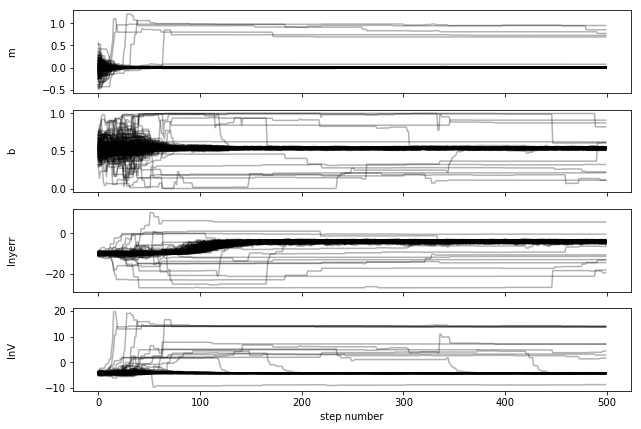

In [234]:
plt.figure(1)
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.chain
labels = ["m", "b", "lnyerr", "lnV"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i].T, "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
    #(nwalkers, nsteps, dim)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
fig.savefig("test200walkers_uncert_scatter_informpri_improvlikeli_lim.png")
# fig.savefig("testprior.png")
plt.show()

In [235]:
flat_samples = sampler.chain[:, 200:, :].reshape((-1, ndim))

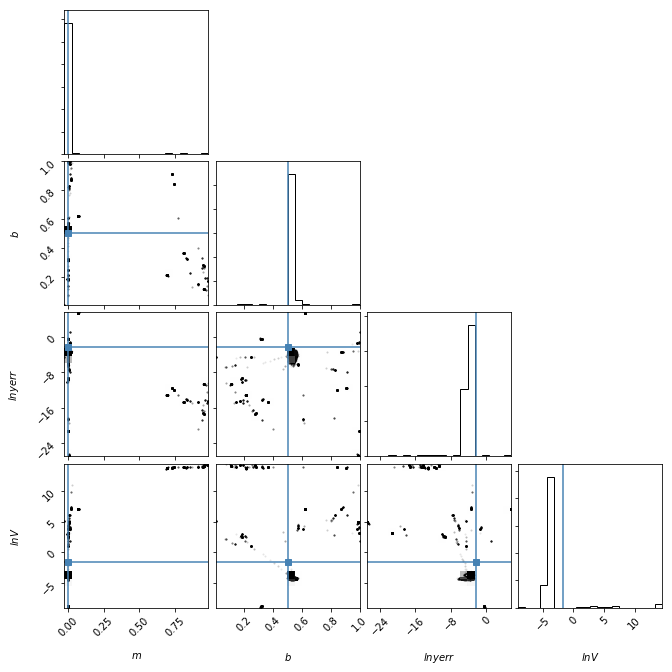

In [236]:
fig = corner.corner(flat_samples, labels=["$m$", "$b$", "$lnyerr$", "$lnV$"],
                      truths=[m_true, b_true, lnyerr_true, lnV_true])
fig.savefig("testuncert_scatter_informpri_improvlikeli+walkers_lim.png")
# fig.savefig("testprior.png")

In [237]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [229]:
print(np.exp(-1.373))
print(np.exp(-.586))
print(np.exp(-4.2))

0.253345781013
0.55654903441
0.0149955768205


In [232]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))
# print("Autocorrelation time:  ", sampler.get_autocorr_time())

Mean acceptance fraction: 0.479


<Container object of 3 artists>

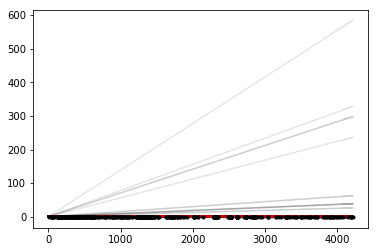

In [202]:
for m, b, lnyerr, lnV in samples[np.random.randint(len(samples), size=500)][np.random.randint(500)]:
    plt.plot(days, m*days+b, color="k", alpha=0.1)
plt.plot(days, planets_etamb, color="r", lw=2, alpha=0.8)
plt.errorbar(days, planets_etamb, yerr=np.exp(lnyerr), fmt=".k")

In [200]:
print(np.random.randint(len(samples), size=100))
print(samples.shape)
print(len(samples))
#(nwalkers, nsteps, dim)
# print(samples[np.random.randint(len(samples), size=200)][0])
print(samples[np.random.randint(len(samples), size=200)][np.random.randint(len(samples))])

[101 175 167  75  68  25 184  37 144  60 126  30 139  40  69 101 190   4
  21 171  78  51  51 114  15  86  30 111  13  11 110 151  94 186 142  47
 114  96  28   3 107 188 125 192 158  68 171  54 106  19  41 171  22 162
  21 119  72  17 135  83 150  82  38 146 100 168 157 114  81 123  40 154
 167  81 103 114  17  40 126  68 107 197  65 112  18 185 160 126 117 190
 114 184  62 120  23 118 136  67  95  80]
(200, 500, 4)
200
[[  4.47286245e-02   6.07366789e-01  -4.11622344e+00   1.74516839e+00]
 [  1.47177594e-02   6.24572178e-01  -4.13210848e+00   1.76677998e+00]
 [  1.47177594e-02   6.24572178e-01  -4.13210848e+00   1.76677998e+00]
 ..., 
 [ -2.03144965e-05   6.17863932e-01  -1.90899081e+00  -4.16234991e-01]
 [ -1.77222057e-05   6.10834448e-01  -1.93683785e+00  -3.91806971e-01]
 [ -1.77222057e-05   6.10834448e-01  -1.93683785e+00  -3.91806971e-01]]
